In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(gcookbook))

Warning message:
"package 'gcookbook' was built under R version 4.0.3"


# 使用ggplot2和RColorBrewer扩展调色板

对于颜色选择，使用 scale 函数族中的其中一种选择 `scale_fill_brewer()` 和 `scale_color_brewer()`:

参数 **palette** 控制着 `scale_fill_brewer()` 中的颜色选择

**Palettes** 在包 RColorBrewer 中 - 运行 `display.brewer.all()` 可以看到所有的选择：

In [2]:
library(RColorBrewer)

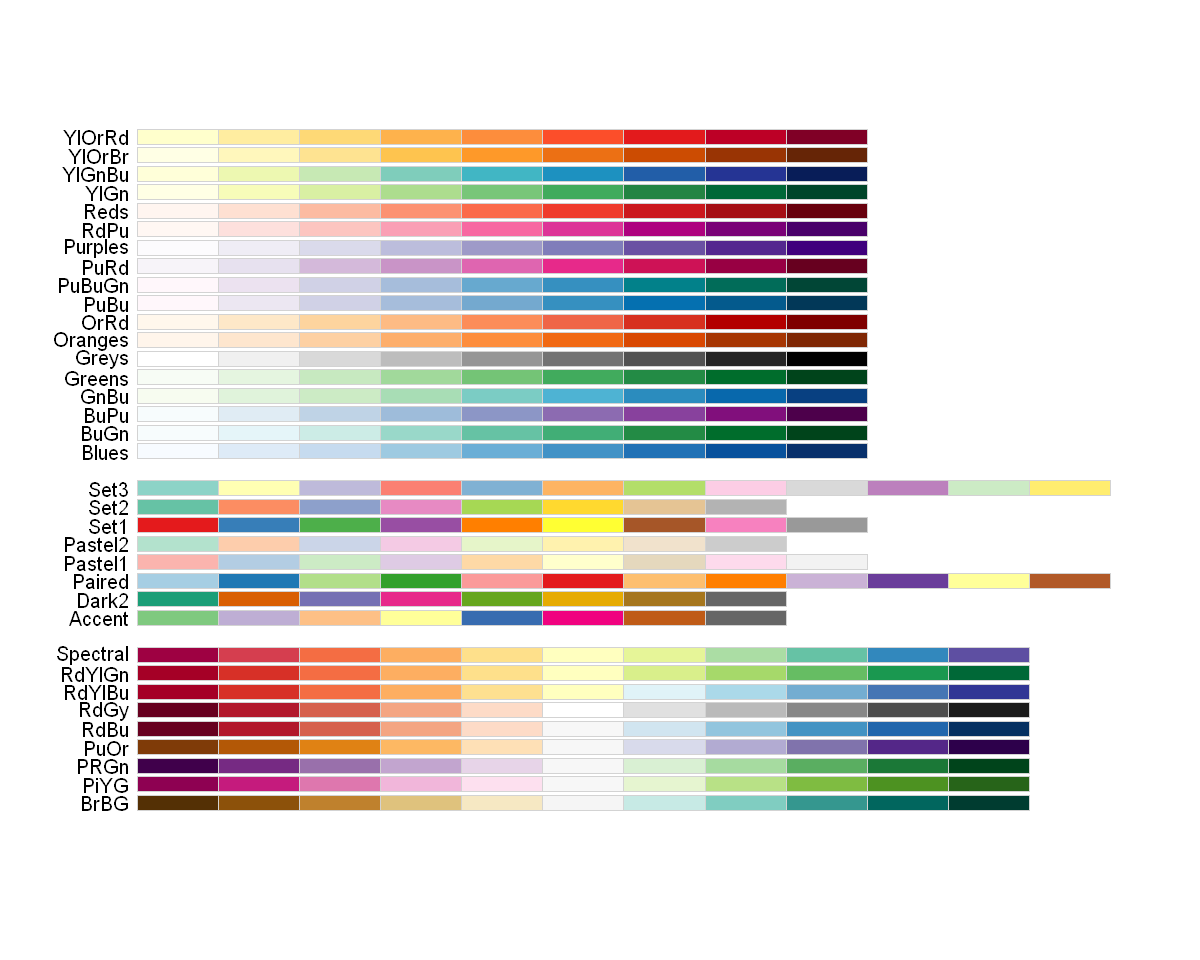

In [19]:
options(repr.plot.width=10, repr.plot.height=8)
display.brewer.all()

有 3 类调色板（palettes）- sequential，diverging，和 qualitative - 每一类调色板包含 8 到 12 种颜色（可以利用 `brewer.pal.info` 或者 `?RColorBrewer` 看到更多的细节）。

In [22]:
brewer.pal.info

,maxcolors,category,colorblind
,<dbl>,<chr>,<lgl>
BrBG,11,div,TRUE
PiYG,11,div,TRUE
PRGn,11,div,TRUE
PuOr,11,div,TRUE
RdBu,11,div,TRUE
RdGy,11,div,FALSE
RdYlBu,11,div,TRUE
RdYlGn,11,div,FALSE
Spectral,11,div,FALSE


如果分组变量的类型数量超过调色板颜色种类，就会出现麻烦

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
"


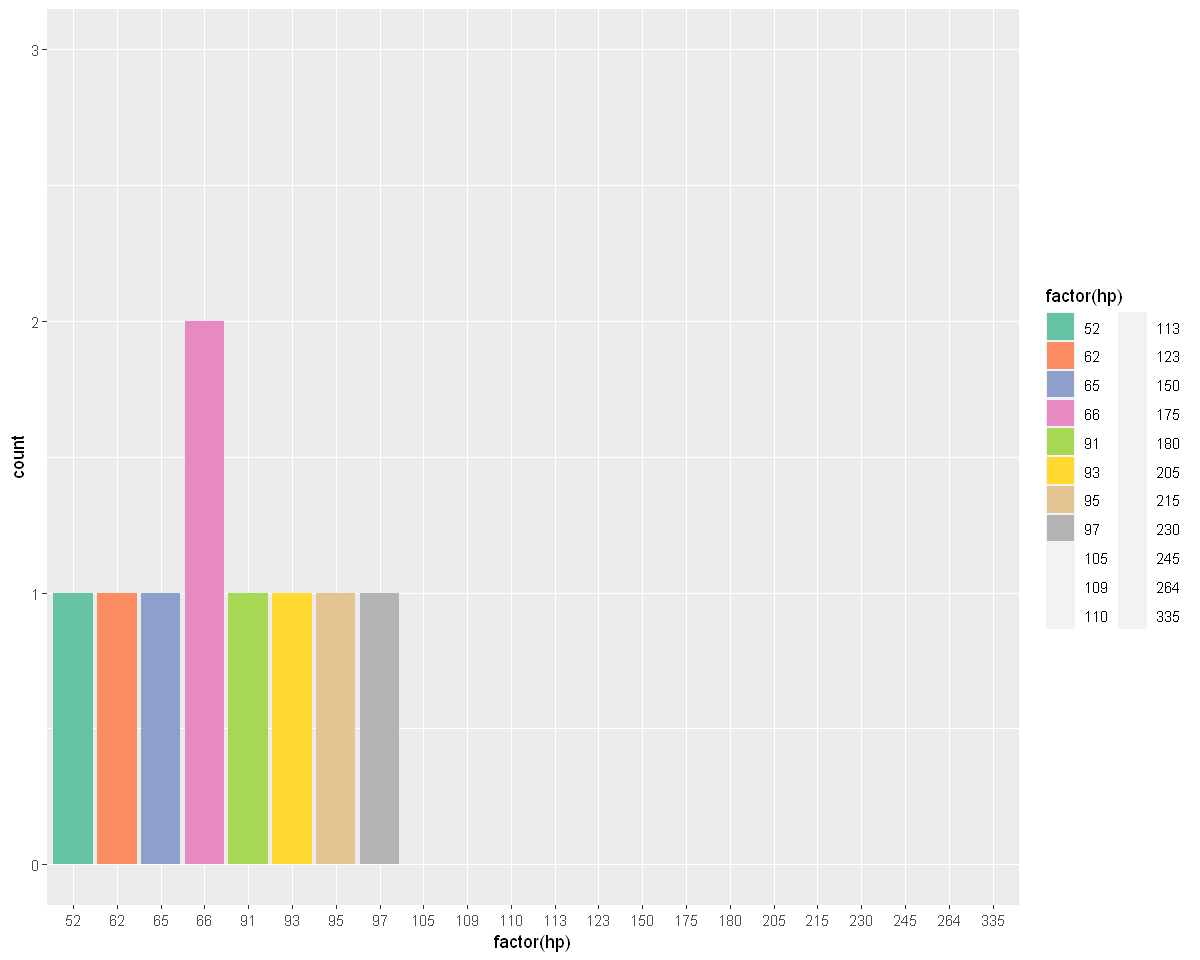

In [38]:
ggplot(mtcars, aes(x=factor(hp), fill=factor(hp))) + geom_bar() + 
 scale_fill_brewer(palette = "Set2")

RColorBrewer为我们提供了一种通过使用构造函数colorRampPalette插入现有调色板来生成更大调色板的方法。  
它生成实际工作的函数：它们通过插入现有的调色板来构建具有任意数量颜色的调色板。

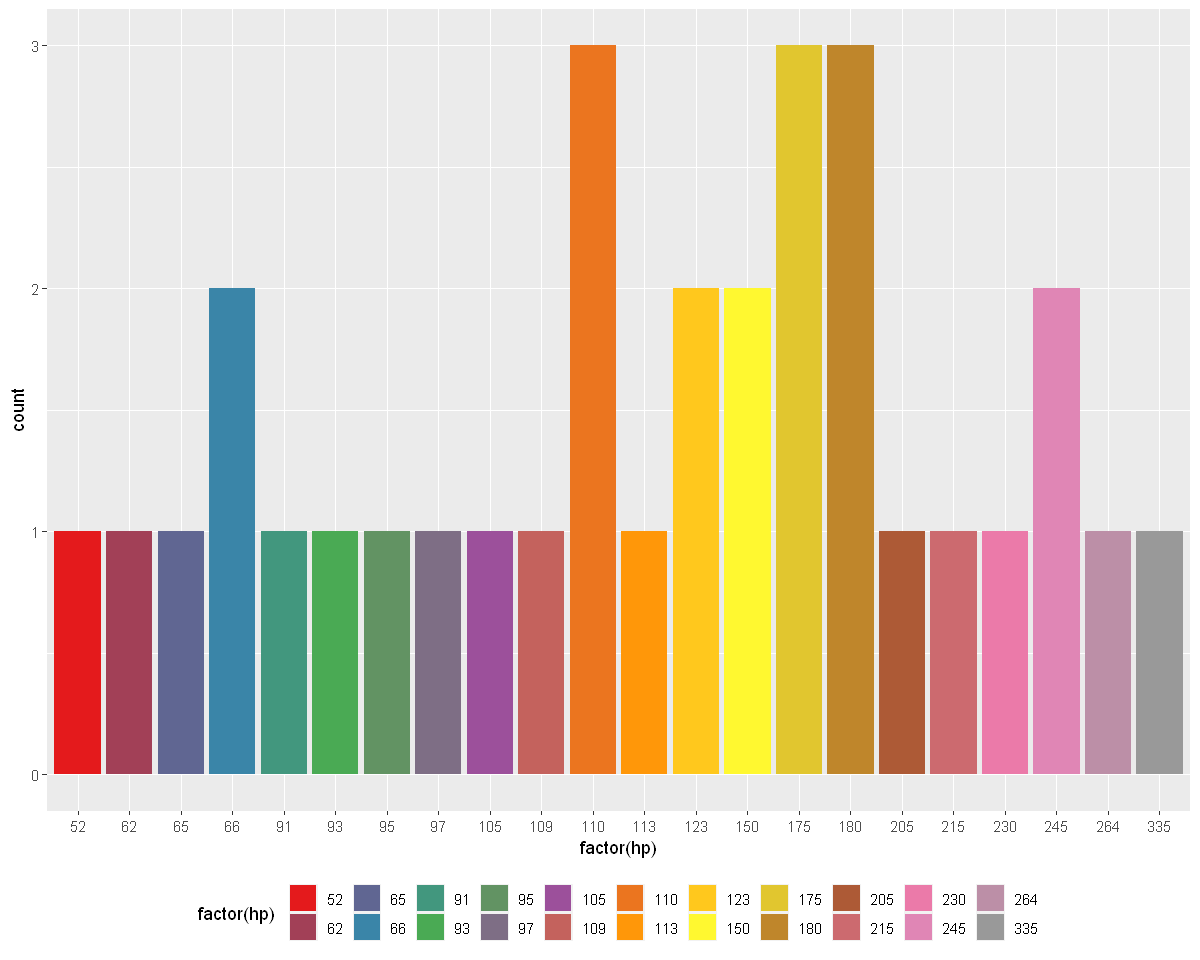

In [49]:
colorCount = length(unique(mtcars$hp))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

ggplot(mtcars, aes(x=factor(hp), fill=factor(hp))) + geom_bar() + 
 scale_fill_manual(values=getPalette(colorCount)) + 
 theme(legend.position = "bottom") +  # 修改图例位置
 guides(fill=guide_legend(nrow = 2))

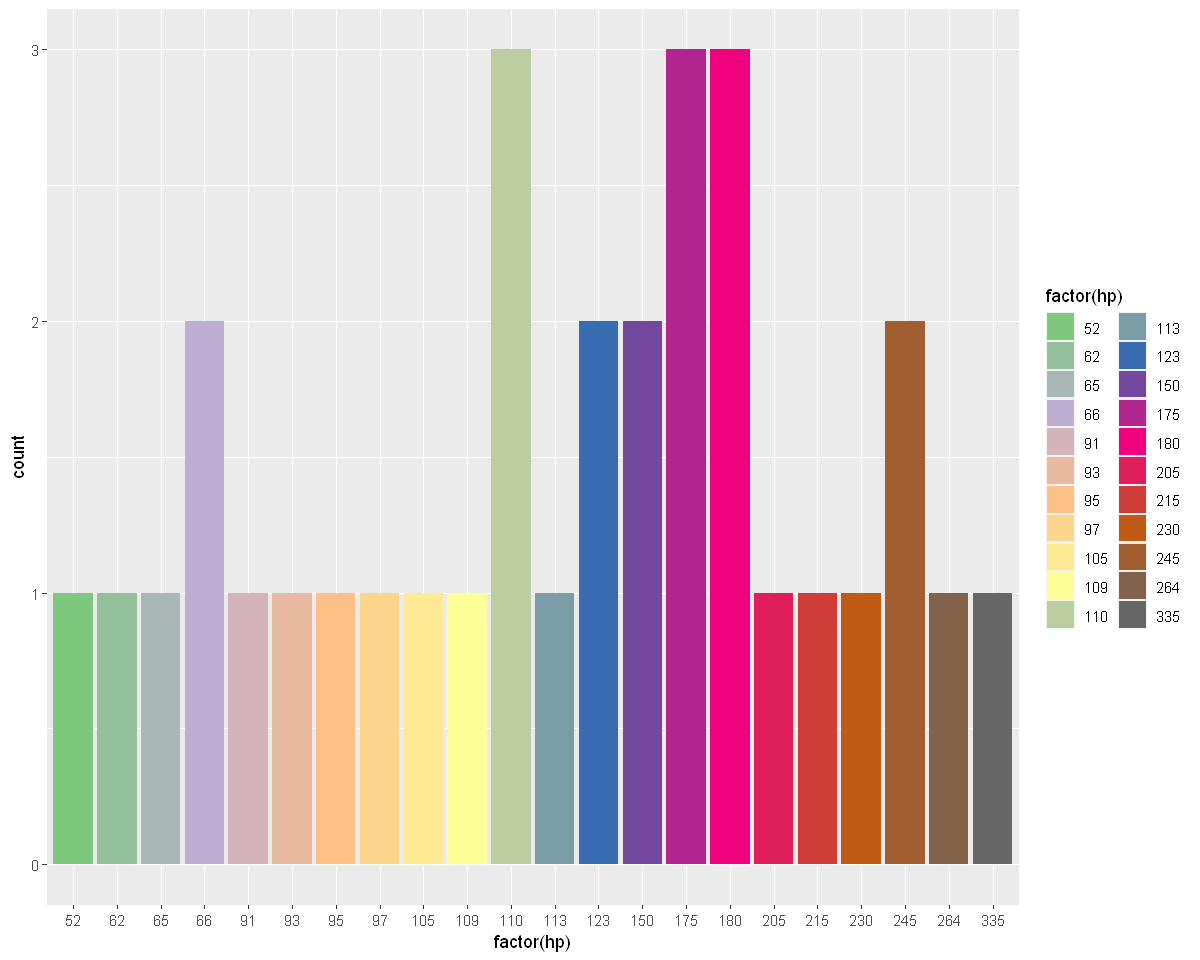

In [55]:
ggplot(mtcars, aes(x=factor(hp), fill=factor(hp))) + geom_bar() + 
 scale_fill_manual(values=colorRampPalette(brewer.pal(8, "Accent"))(colorCount))

# 第一章 R基础

# 第二章 快速探索数据

要快速探索数据，有时使用R基础包中的绘图函数会很有用，无需另行安装附加包。它们简短易输入，处理简单问题时使用方便，且运行速度极快。  
如果你想要绘制较为复杂的图形，那么，转用ggplot2包通常是更好的选择。部分原因在于ggplot2提供了一个统一的接口和若干选项来替代基础绘图系统中对图形的修修补补和各种特例。一旦掌握了ggplot2的工作机制，就可以应用这些知识来绘制从散点图、直方图到小提琴图和地图等各种统计图形了。

本章介绍的技巧演示了用基础绘图系统绘制统计图形的方法，也对如何用ggplot2中的qplot()函数绘制同样的图形做出了说明。qplot()函数的语法与基础绘图系统类似，对于每一个由qplot()函数绘制的图形，技巧中也提供了更强大的ggplot()函数来绘图的等价解决方案。

## 绘制散点图

In [3]:
head(mtcars,5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


用基础绘图系统

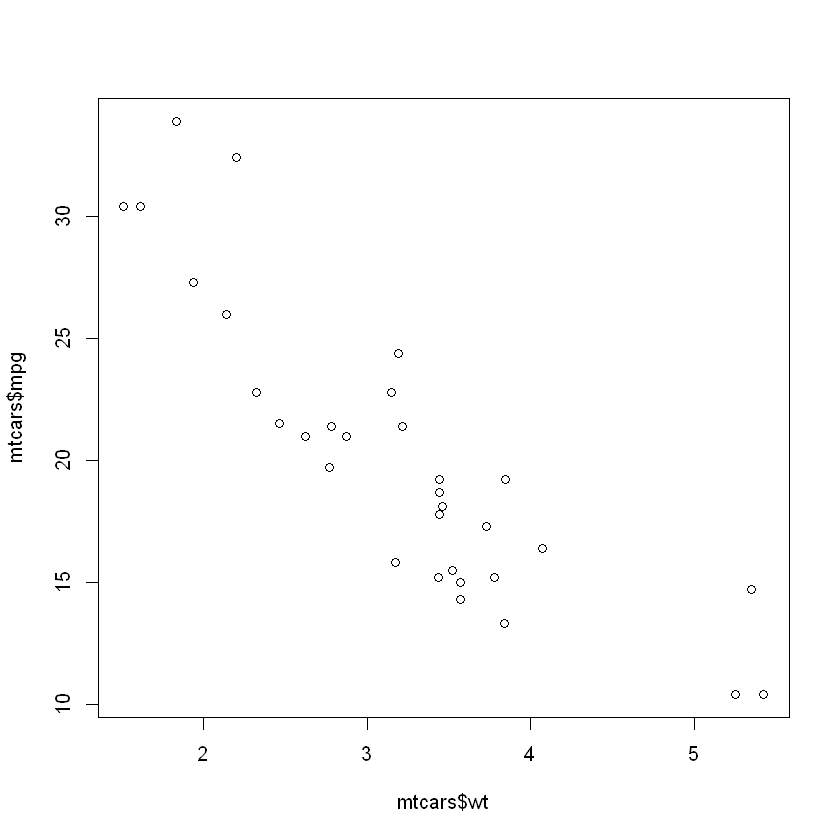

In [2]:
plot(mtcars$wt, mtcars$mpg)

ggplot2系统

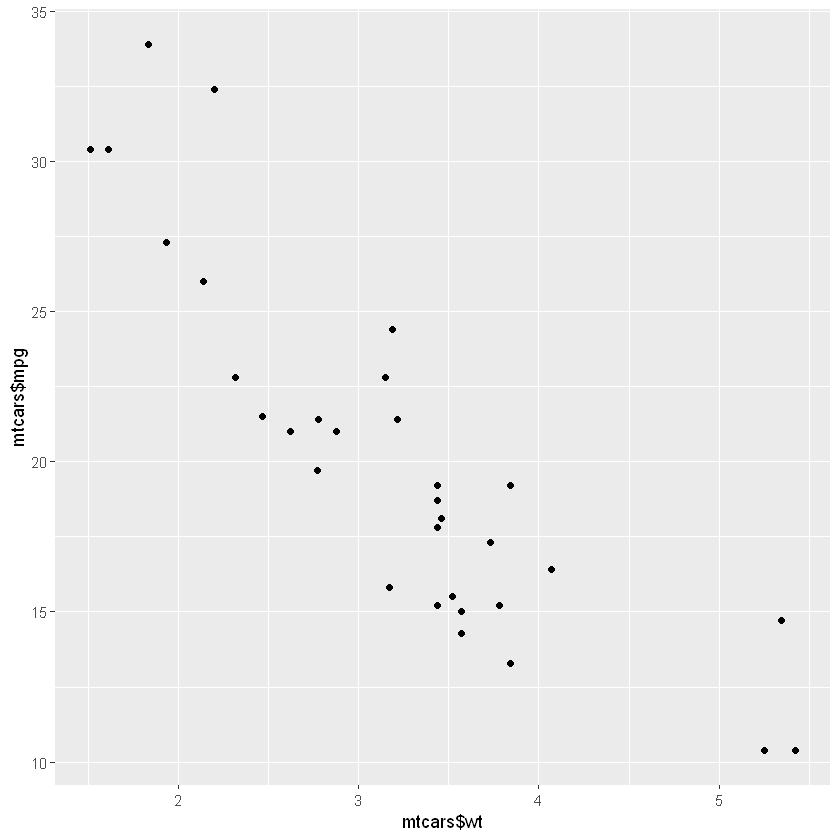

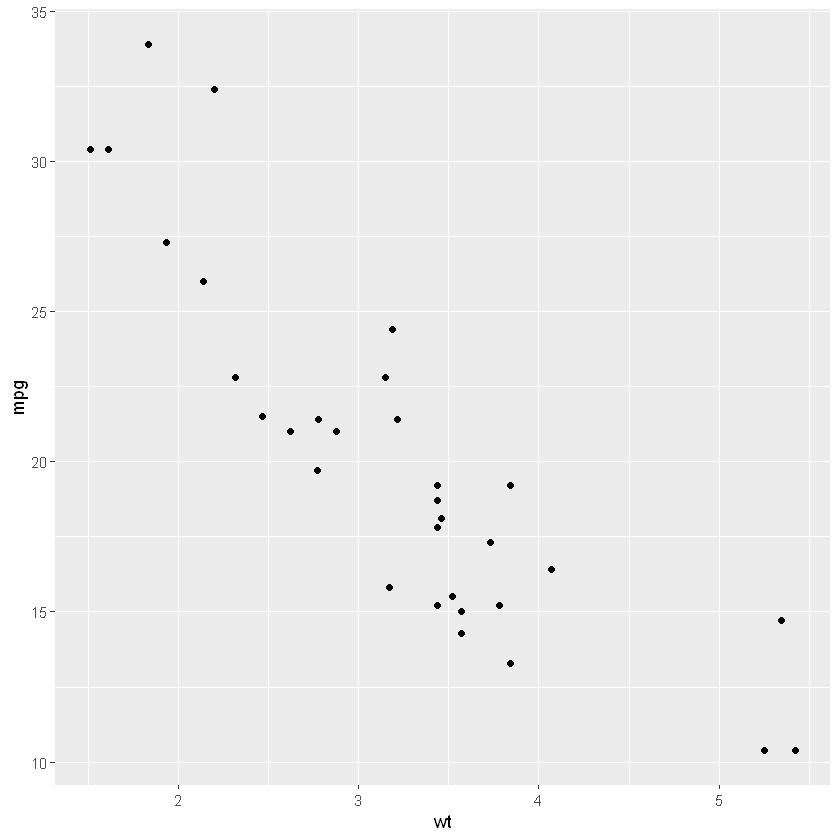

In [6]:
library(ggplot2)
qplot(mtcars$wt, mtcars$mpg)
# 等价于
qplot(wt, mpg, data = mtcars)

## 绘制折线图

使用plot()函数绘制折线图时需向其传递一个包含x值的向量和一个包含y值的向量，并使用参数`type="l"`:

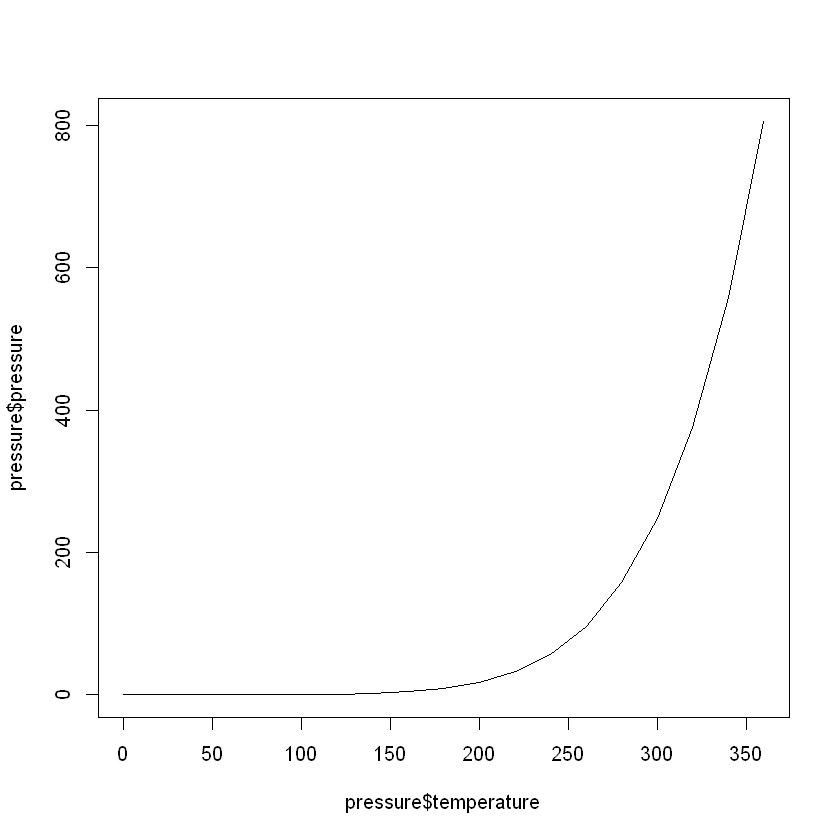

In [8]:
plot(pressure$temperature, pressure$pressure, type="l")

如果要向图形中添加数据点或者多条折线，则需先用`plot()`函数绘制第一条折线，再通过`points()`函数和`lines()`函数分别添加数据点和更多折线：

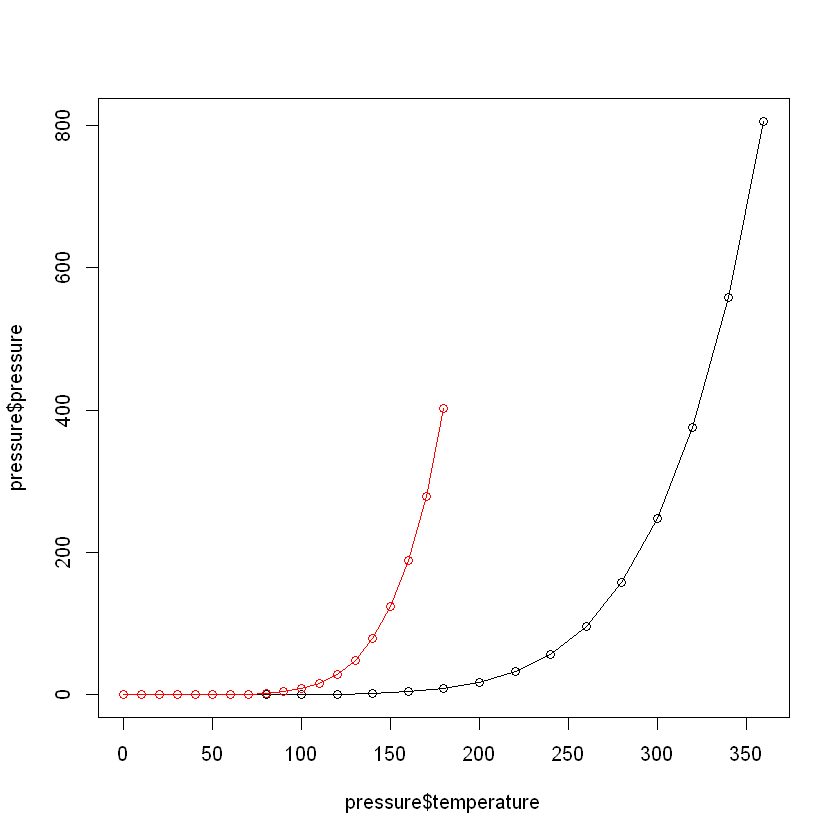

In [9]:
plot(pressure$temperature, pressure$pressure, type="l")
points(pressure$temperature, pressure$pressure)

lines(pressure$temperature/2, pressure$pressure/2, type="l",col = 'red')
points(pressure$temperature/2, pressure$pressure/2, col="red")

在ggplot2中，可以使用qplot()函数并将参数设定为`geom="line"`得到类似的绘图结果

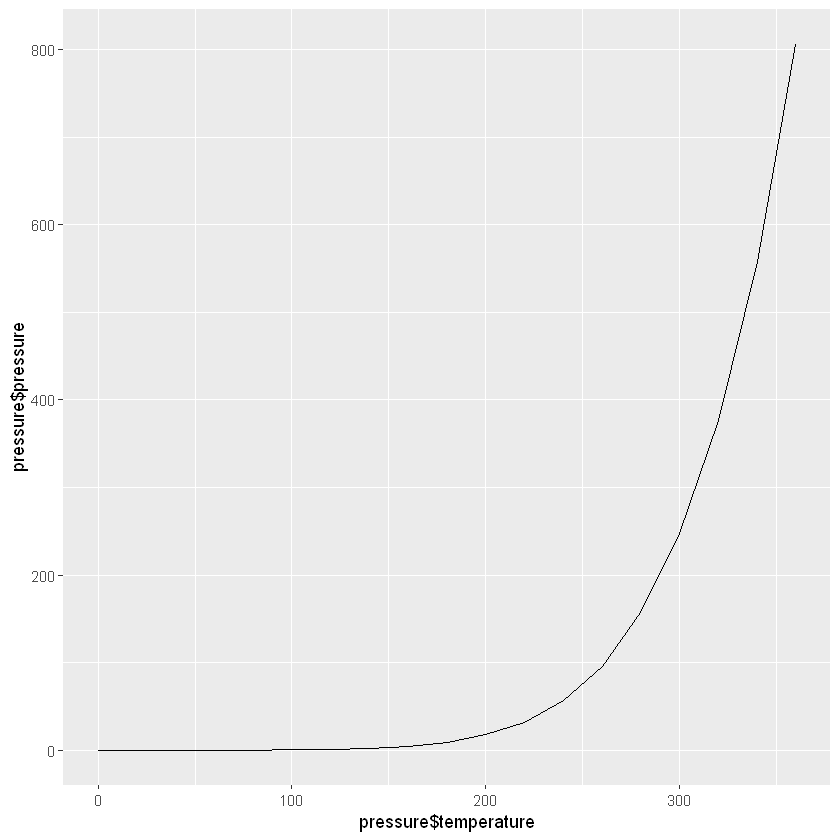

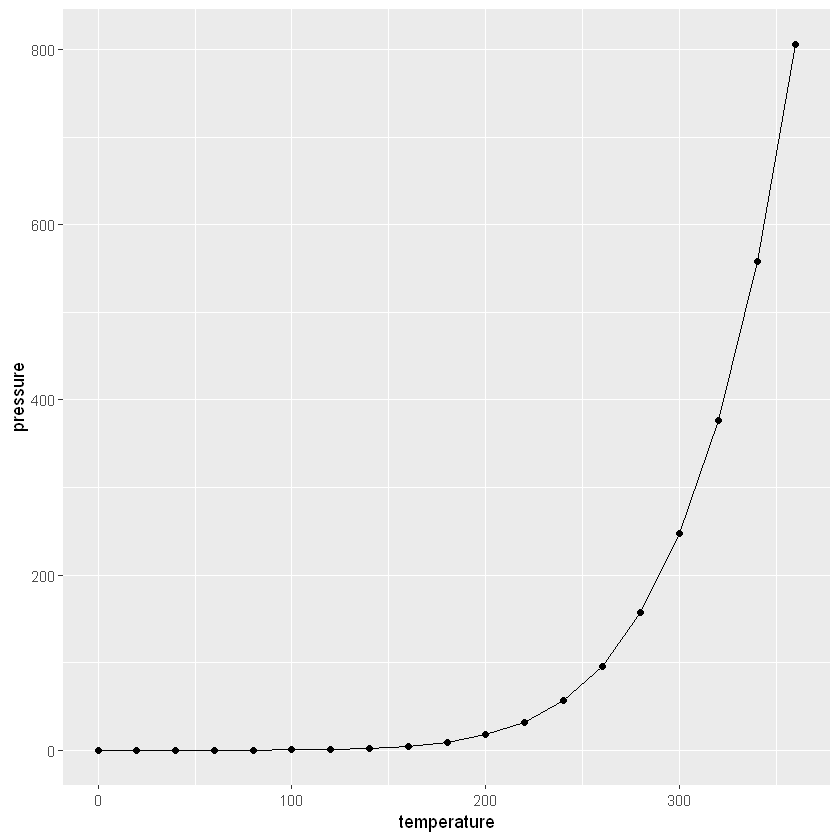

In [23]:
qplot(pressure$temperature, pressure$pressure, geom = "line")

qplot(temperature, pressure, data = pressure, geom = c("line","point"))
# 等价于
ggplot(pressure, aes(x=temperature,y=pressure)) + geom_line() + geom_point()

## 绘制条形图

对变量的值绘制条形图，可以使用`barplot()`函数，并向其传递两个向量作为参数，第一个是高度，第二个是对应的标签（可选）。  
如果向量中的元素已被命名，则系统会自动使用元素的名字作为条形标签：  

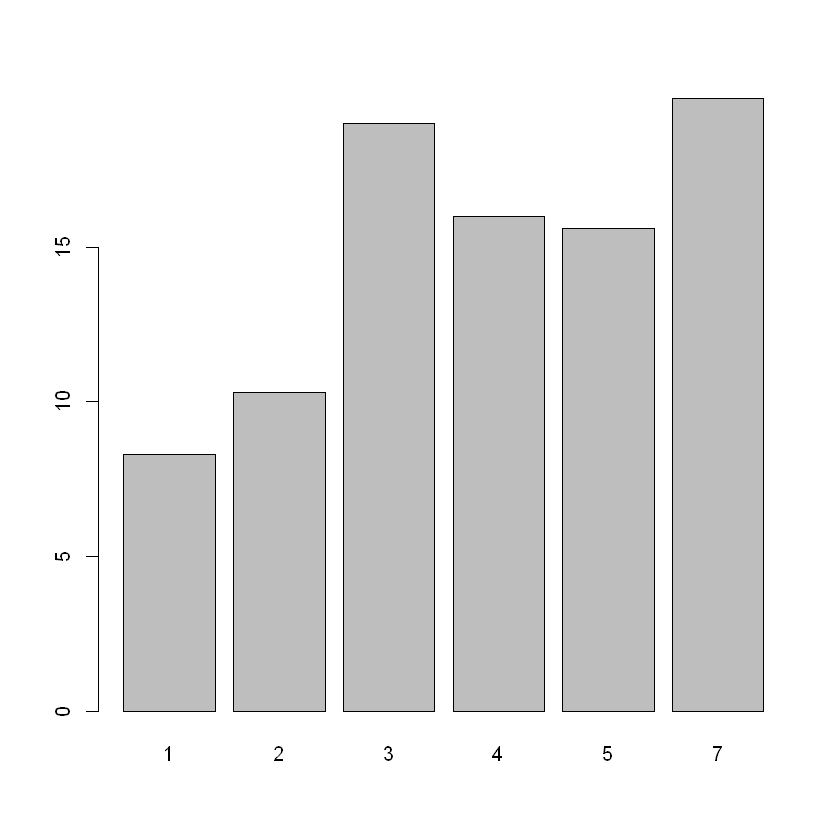

In [24]:
barplot(BOD$demand, names.arg = BOD$Time)

有时候，“条形图”表示的是分组数据中各个元素的频数。这种条形图跟直方图类型，不过，其用离散值的x轴替代了直方图中连续取值的x轴。  
要计算各个类别的频数，可以使用`table()`函数。

In [25]:
table(mtcars$cyl)


 4  6  8 
11  7 14 

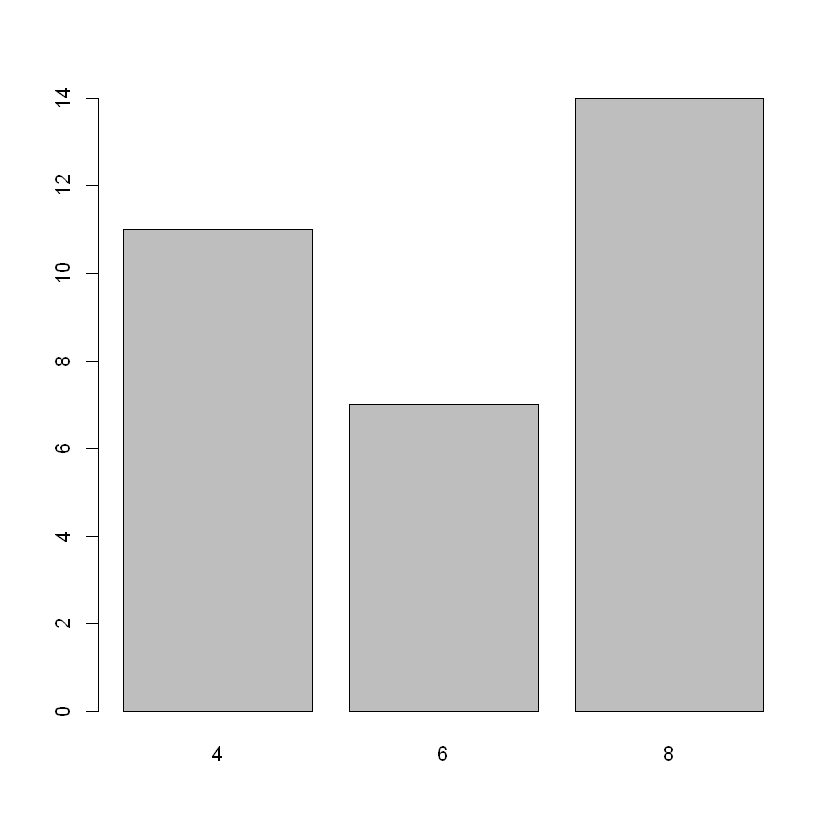

In [26]:
barplot(table(mtcars$cyl))

In [33]:
BOD

Time,demand
<dbl>,<dbl>
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


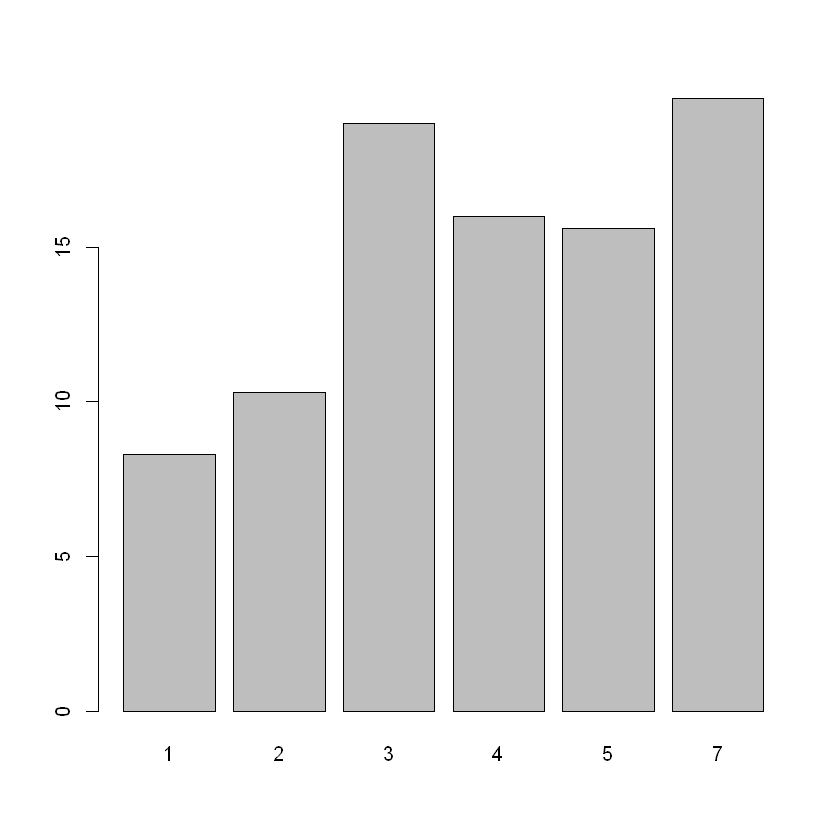

In [48]:
barplot(BOD$demand, names.arg = BOD$Time)

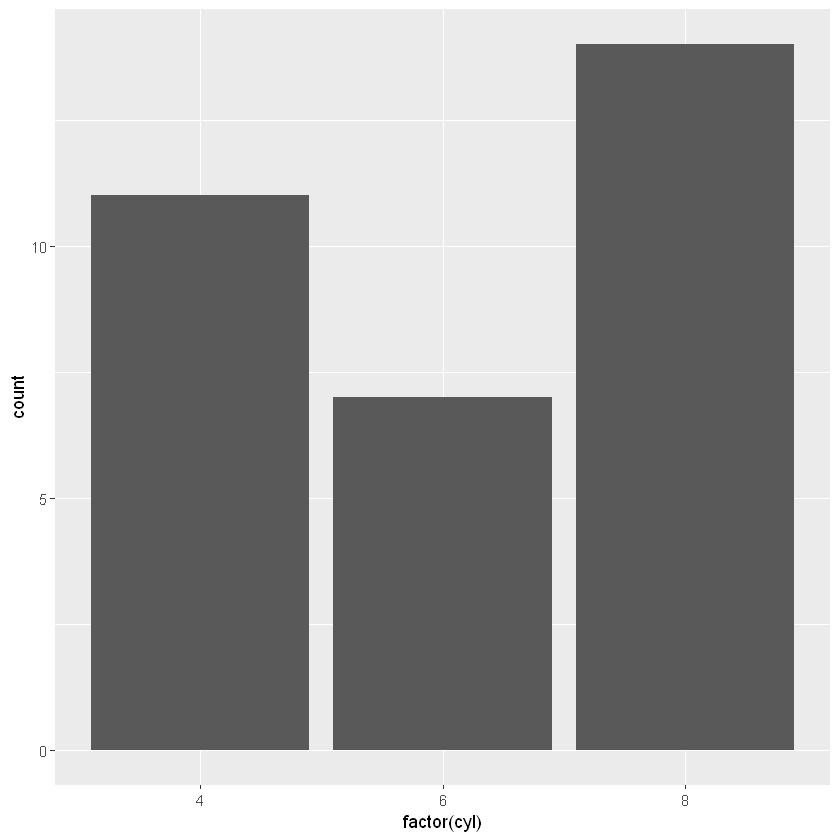

In [58]:
#qplot(BOD$Time, BOD$demand, geom = "bar", stat = "identity")

ggplot(mtcars, aes(x=factor(cyl))) +geom_bar()

## 绘制直方图

使用`hist()`绘制直方图来查看一维数据的分布特征，使用时需向其传递一个向量：

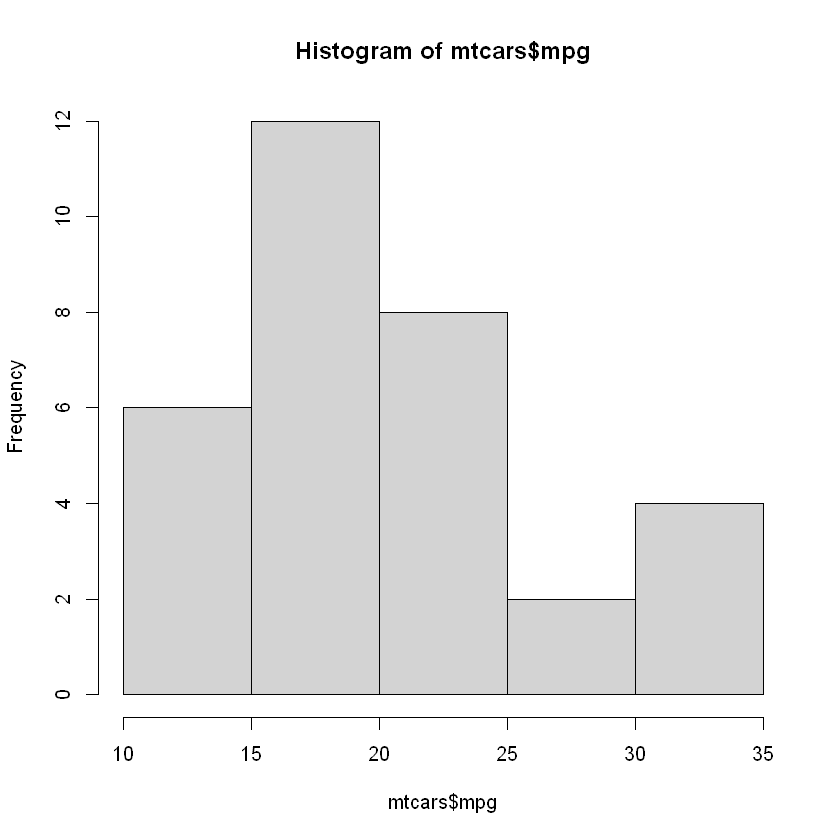

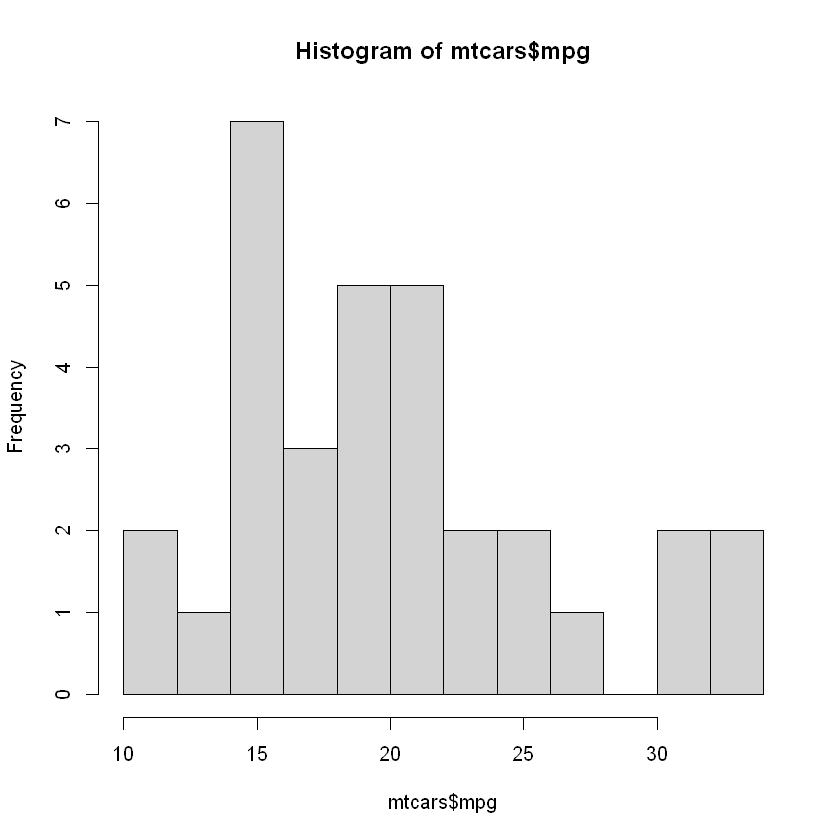

In [62]:
hist(mtcars$mpg)

# break 设置组距
hist(mtcars$mpg, breaks = 10)

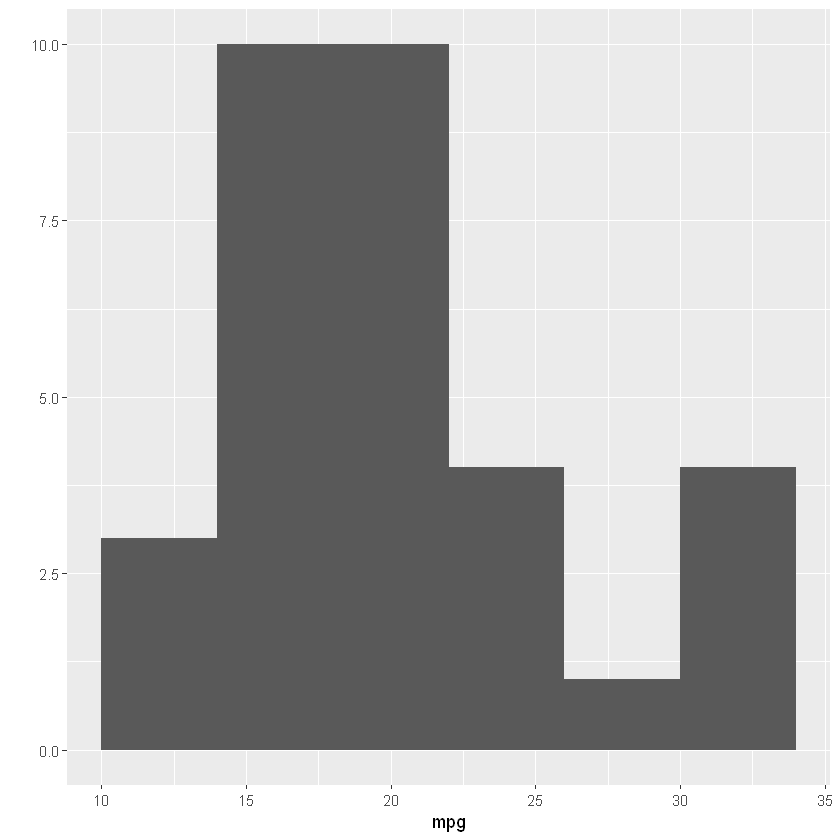

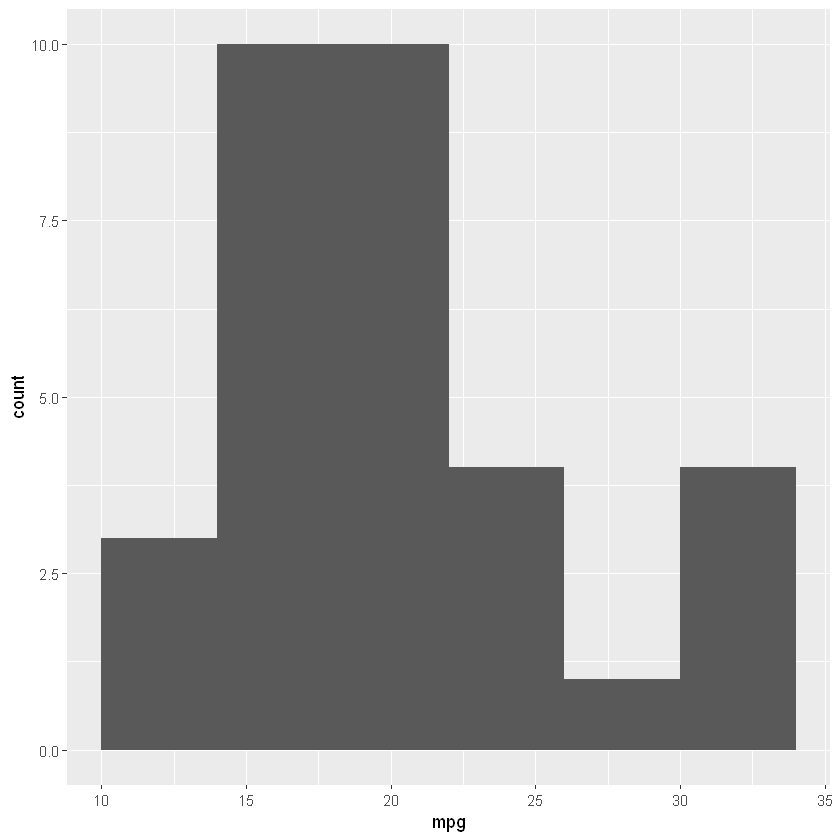

In [65]:
qplot(mpg, data = mtcars, binwidth=4)
ggplot(mtcars, aes(x=mpg)) +geom_histogram(binwidth = 4)

## 绘制箱线图

使用`plot()`函数绘制箱线图时向其传递两个向量x和y。当x为因子型变量（与数值变量对应）时，它会默认绘制箱线图

In [2]:
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


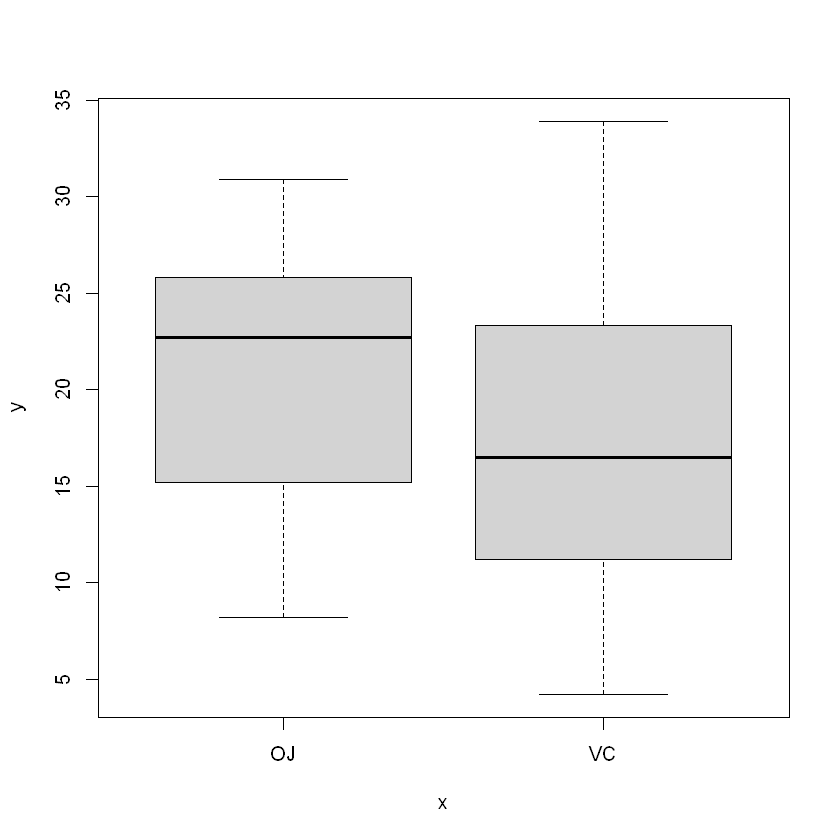

In [1]:
plot(ToothGrowth$supp, ToothGrowth$len)

当两个参数向量包含在同一个数据框中时，也可以使用公式语法。公式语法允许我们在x轴上使用变量组合。

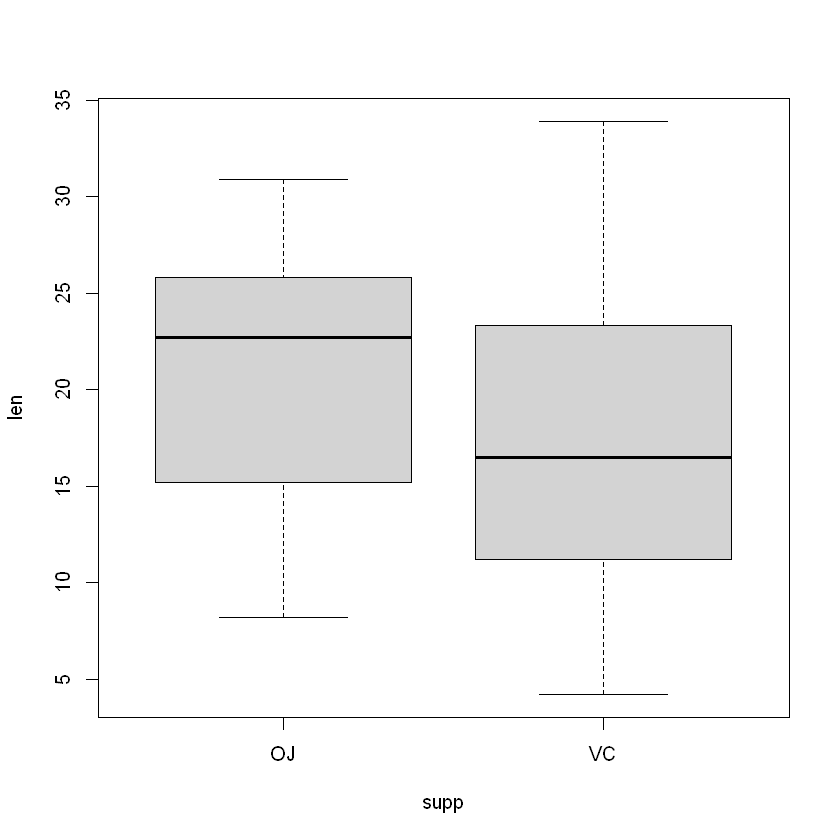

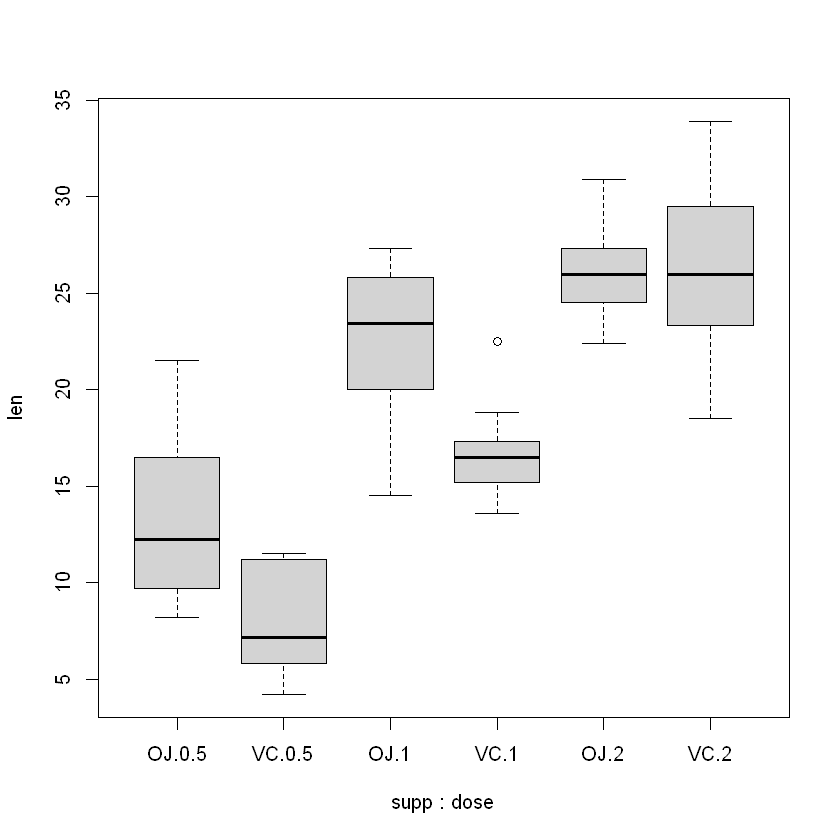

In [4]:
# 公式语法
boxplot(len~supp, data = ToothGrowth)
# 在x轴上引入两变量的交互
boxplot(len ~ supp + dose, data = ToothGrowth)

ggplot2包，使用qplot()函数绘制同样的图形，使用时将参数设定为geom="boxplot":

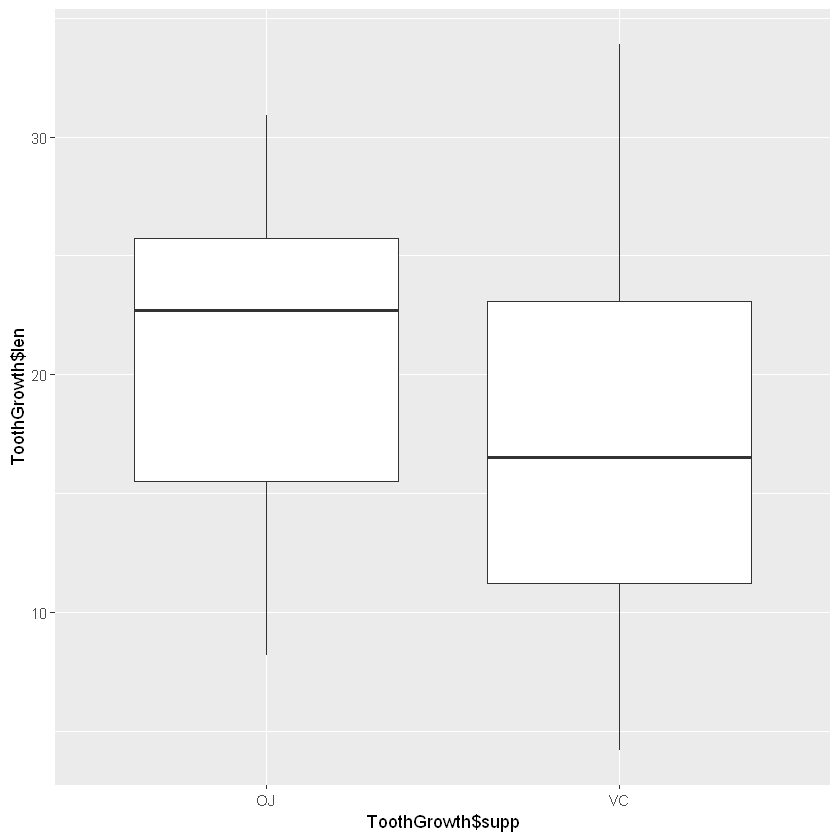

In [8]:
qplot(ToothGrowth$supp, ToothGrowth$len, geom = "boxplot")
# 等价于
qplot(supp, len, data = ToothGrowth, geom = "boxplot")
# 等价于
ggplot(ToothGrowth, aes(x=supp,y=len)) + geom_boxplot()

使用`interaction()`函数将分组变量组合在一起也可以绘制基于多分组变量的箱线图。

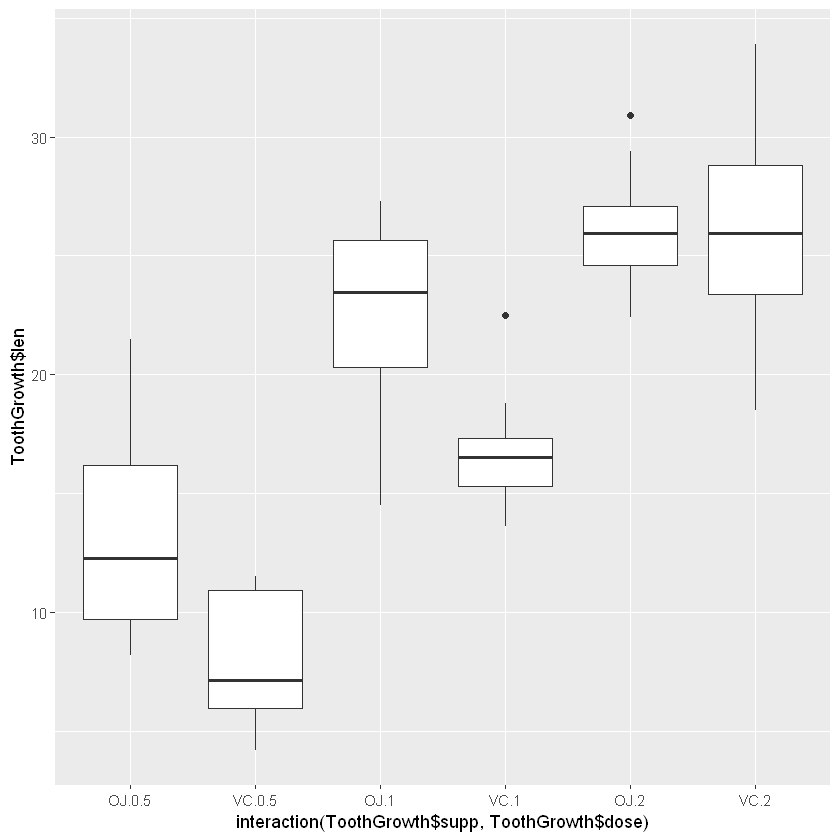

In [11]:
qplot(interaction(ToothGrowth$supp, ToothGrowth$dose), ToothGrowth$len,geom = "boxplot")
# 等价于
qplot(interaction(supp, dose), len, data = ToothGrowth, geom = "boxplot")
# 等价于
ggplot(ToothGrowth,aes(x=interaction(supp, dose),y=len)) + geom_boxplot()

## 绘制函数图像

可以使用`curve()`函数绘制函数图像。使用时需要向其传递一个关于变量x的表达式：

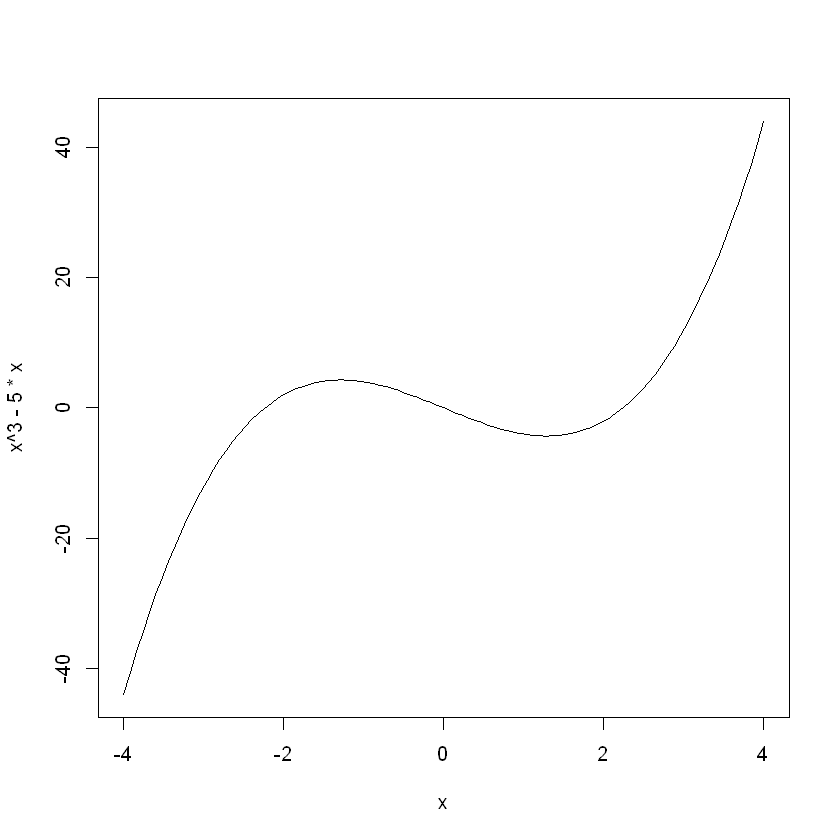

In [12]:
curve(x^3 - 5*x, from = -4, to=4)

将参数设置为`add=TRUE`可以向已有图形添加函数图像

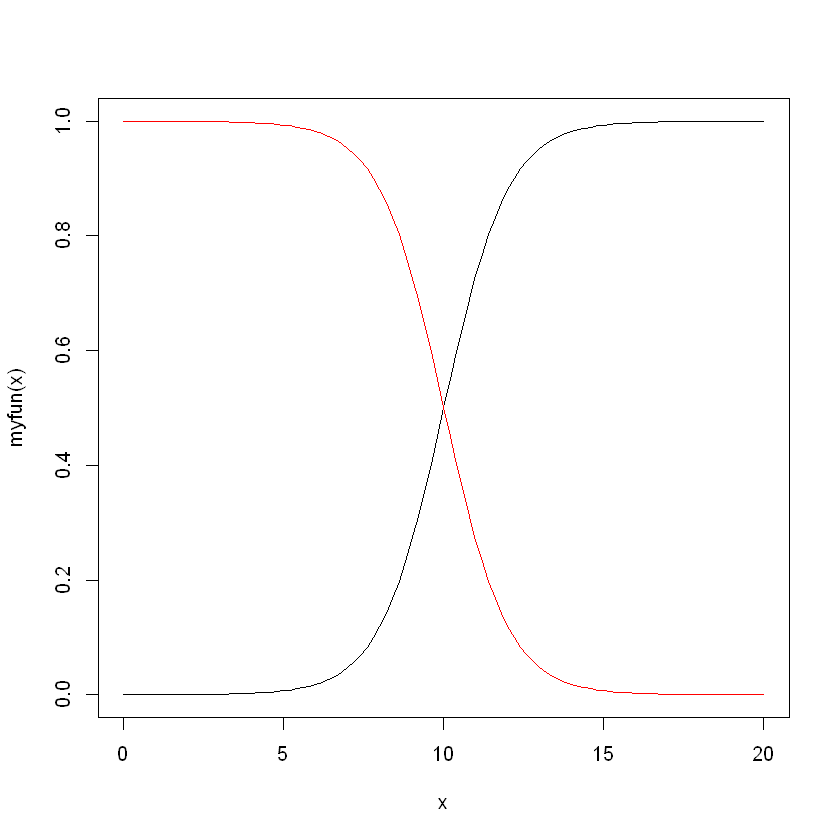

In [13]:
# 自定义函数
myfun <- function(xvar){
    1/(1 + exp(-xvar + 10))
}


curve(myfun(x), from = 0, to = 20)
curve(1-myfun(x), add = TRUE, col="red")

对于ggplot2，可以使用`qplot()`函数绘制得到同样的结果。使用时需要设定`stat="function"`和`geom="line"`,并向其传递一个输入和输出皆为数值型向量的函数：

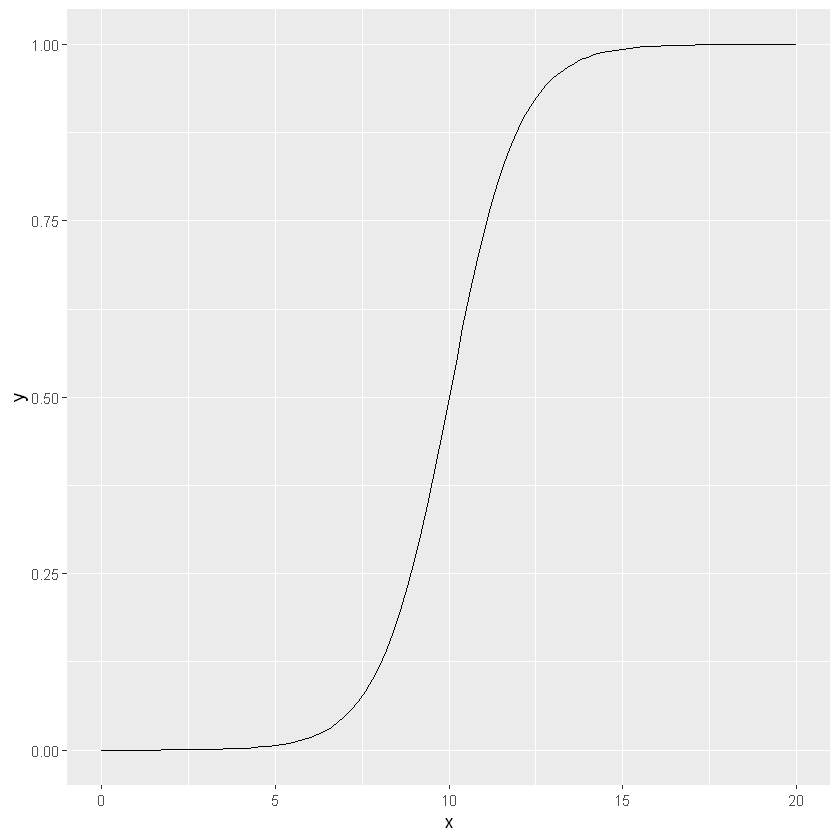

In [15]:
ggplot(data.frame(x=c(0,20)), aes(x=x)) + stat_function(fun=myfun, geom = "line")

# 第三章 条形图

绘制条形图时需要注意的一个重要星界：有时条形图的高度表示的是数据集中变量的频率，有时则表示变量取值本身。

## 绘制简单条形图

使用`ggplot()`函数和`geom_bar(stat="identity")`绘制上述条形图，并分别指定与x轴和y轴对应的变量

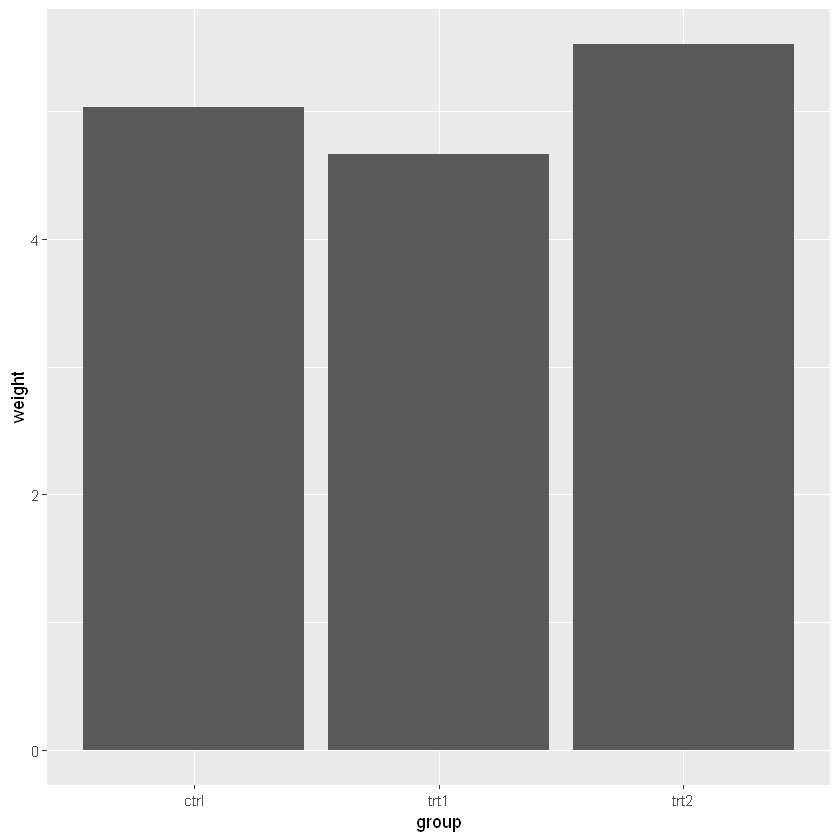

In [17]:
ggplot(pg_mean,aes(x=group, y=weight)) + geom_bar(stat="identity")

当x是连续型（数值型）变量时，条形图的结果会与上图略有不同。此时，ggplot不是只在实际取值处绘制条形，而将在x轴上介于最大值和最小值之间所有可能的取值处绘制条形。可以使用`factor()`函数将连续型变量转化为离散型变量。

In [18]:
BOD

Time,demand
<dbl>,<dbl>
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


In [19]:
str(BOD)

'data.frame':	6 obs. of  2 variables:
 $ Time  : num  1 2 3 4 5 7
 $ demand: num  8.3 10.3 19 16 15.6 19.8
 - attr(*, "reference")= chr "A1.4, p. 270"


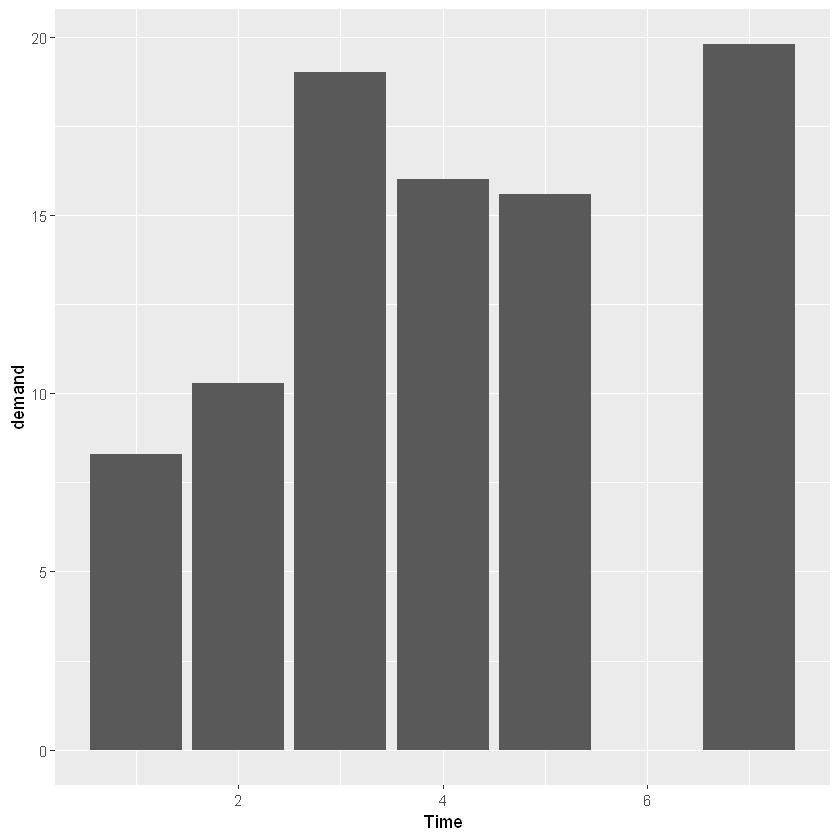

In [20]:
ggplot(BOD, aes(x=Time,y=demand)) + geom_bar(stat="identity")

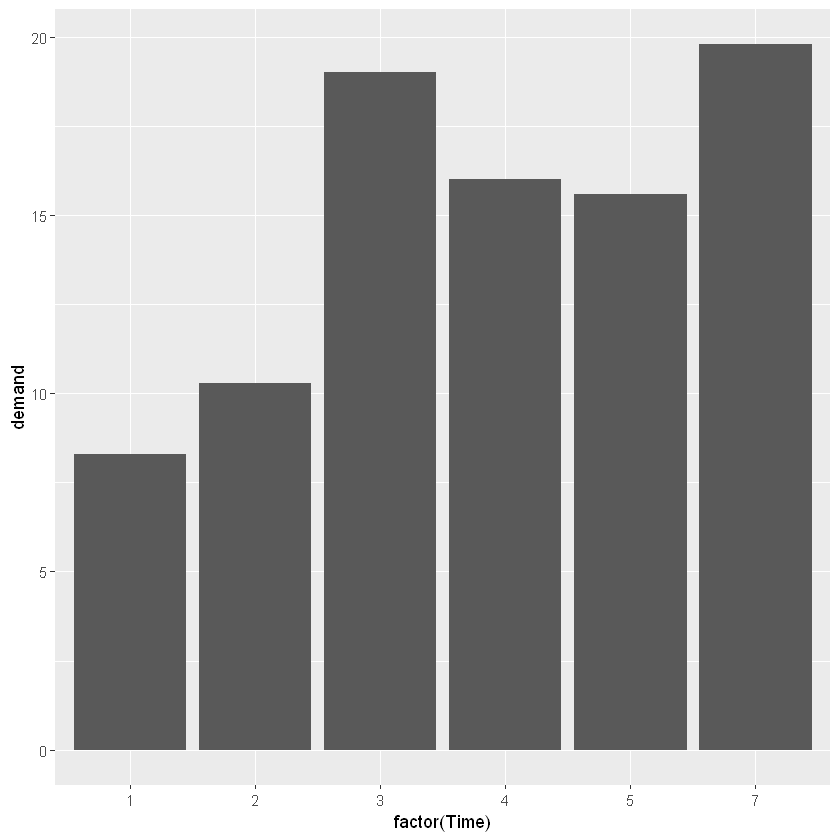

In [23]:
# 使用factor()函数将Time转化为离散型（分类）变量
ggplot(BOD, aes(x=factor(Time),y=demand)) + geom_bar(stat="identity")

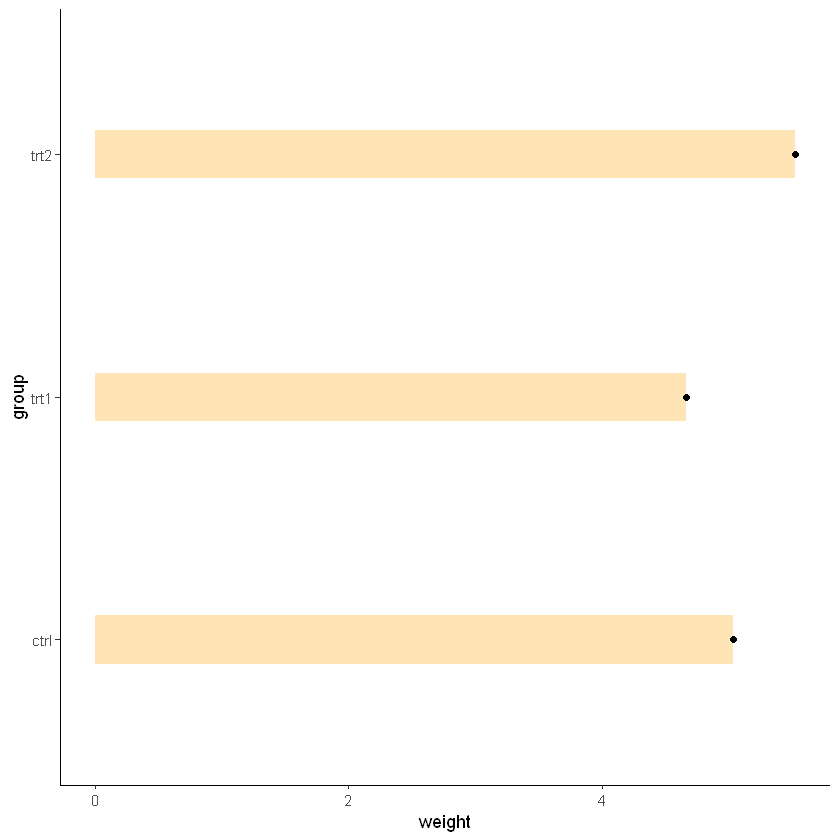

In [31]:
ggplot(pg_mean,aes(y=group, x=weight))+
 theme_classic() + 
 geom_bar(stat="identity",fill="#FFE4B5",color=NA, width = 0.2) + 
 geom_point()

## 绘制簇状条形图

将分类变量映射到fill参数，并运行命令`geom_bar(position="dodge")`.

In [26]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


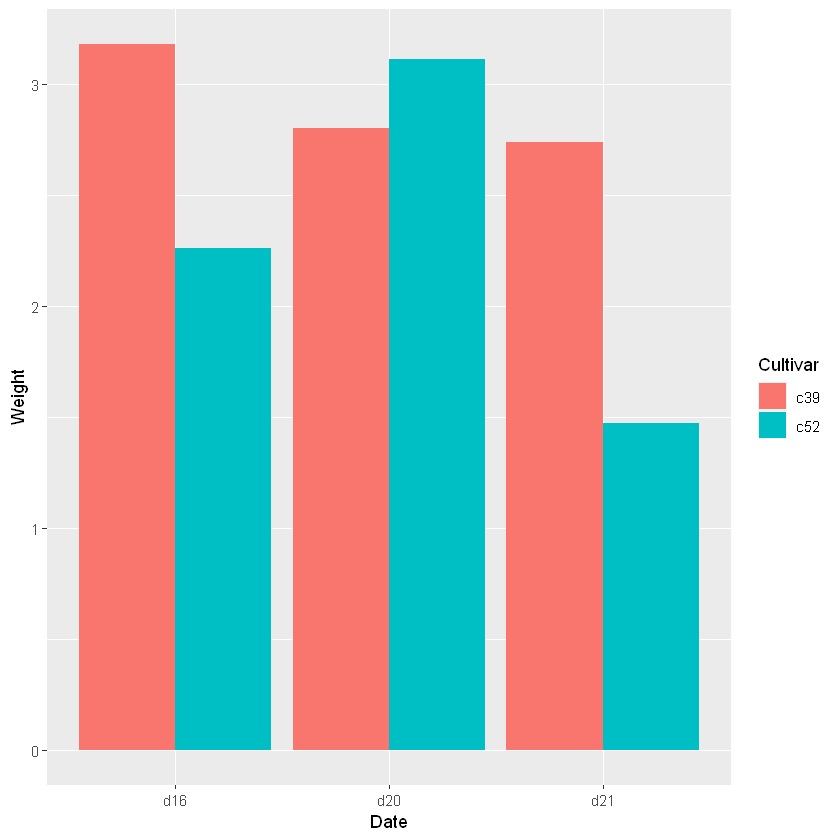

In [28]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + geom_bar(position="dodge",stat="identity")

要想额外添加一个分类变量跟x轴上的分类变量一起对数据进行分组，可通过将该分类变量映射给fill参数来绘制簇状条形图，这里的fill参数用来指定条形的填充色。  
在这一过程中必须令参数`position="dodge"`以使得两组条形在水平方向上错开排列，否则，系统会输出堆积条形图。

与映射给条形图x轴的变量类似，映射给条形填充色参数的变量应该是分类变量而不是连续型变量。

通过`scale_fill_brewer()`或者`scale_fill_manual()`函数对图形颜色进行设置。这里使用RColorBrewer包中的Pastel1调色盘对图形进行调色。

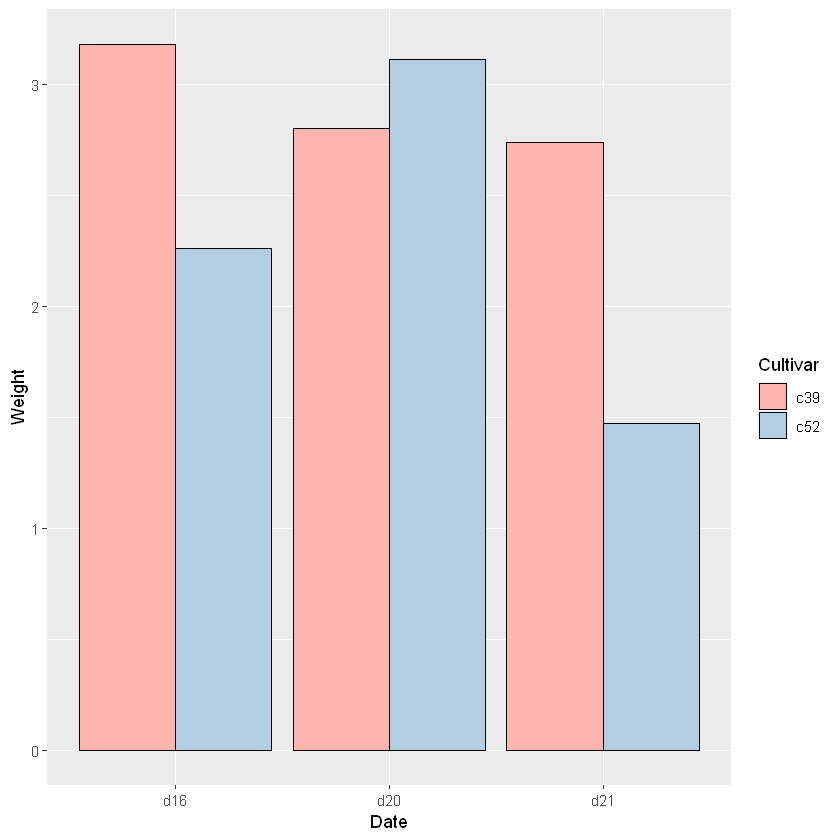

In [29]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
geom_bar(position = "dodge", stat="identity", colour="black") +
scale_fill_brewer(palette="Pastel1")

## 绘制频数条形图

如果数据集中每行数据对应于一个样本，使用`geom_bar()`函数，同时不要映射到任何变量到y参数

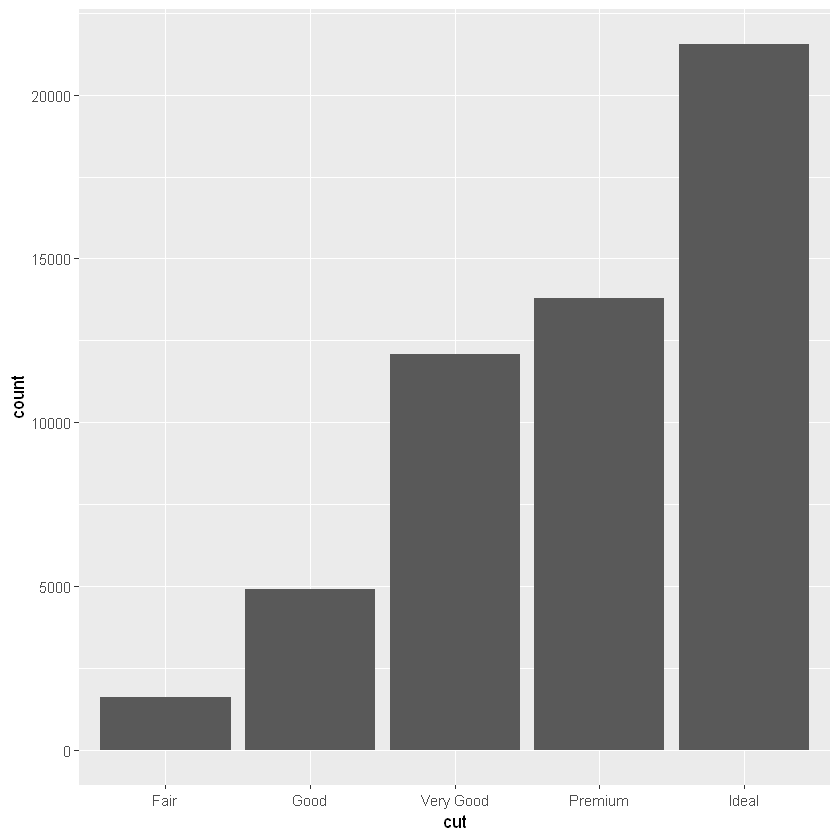

In [30]:
ggplot(diamonds, aes(x=cut)) + geom_bar()

`geom_bar()`函数在默认情况下将参数设定为`stat="bin"`，该操作会自动计算每组（根据x轴上面的变量进行分组）变量对应的观测数。从图中可以看到，切工精美的钻石大概有23000颗。

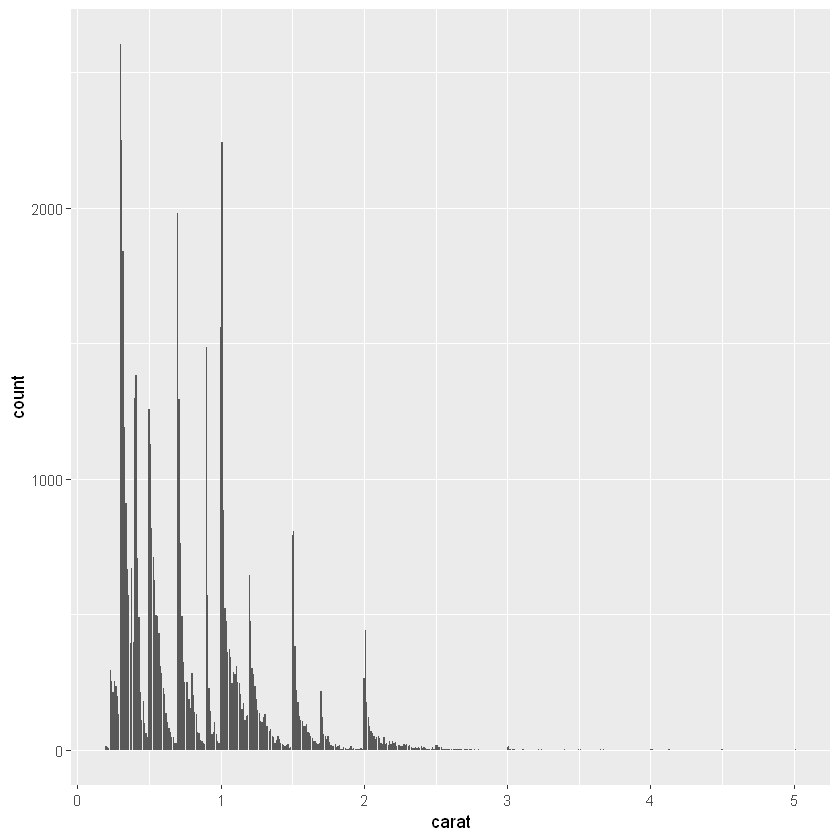

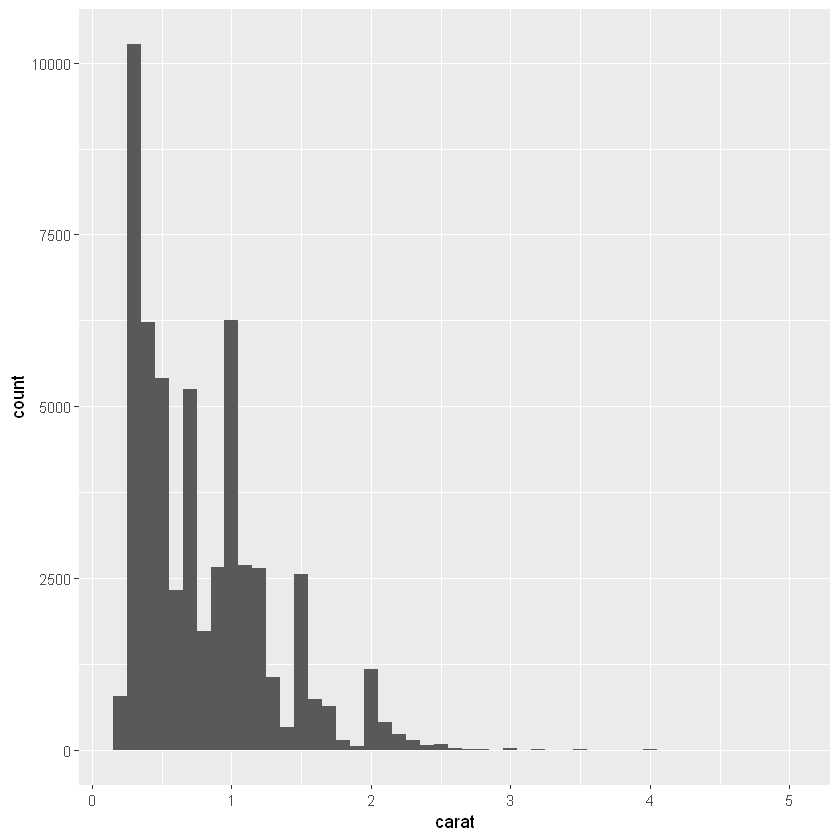

In [9]:
ggplot(diamonds,aes(x=carat)) + geom_bar()
ggplot(diamonds,aes(x=carat)) + geom_histogram(binwidth = 0.1)

## 条形图着色

将合适的变量映射到填充色（fill）即可。

In [23]:
upc <- subset(uspopchange, rank(Change) > 40)
upc

,State,Abb,Region,Change
,<chr>,<chr>,<fct>,<dbl>
3,Arizona,AZ,West,24.6
6,Colorado,CO,West,16.9
10,Florida,FL,South,17.6
11,Georgia,GA,South,18.3
13,Idaho,ID,West,21.1
29,Nevada,NV,West,35.1
34,North Carolina,NC,South,18.5
41,South Carolina,SC,South,15.3
44,Texas,TX,South,20.6


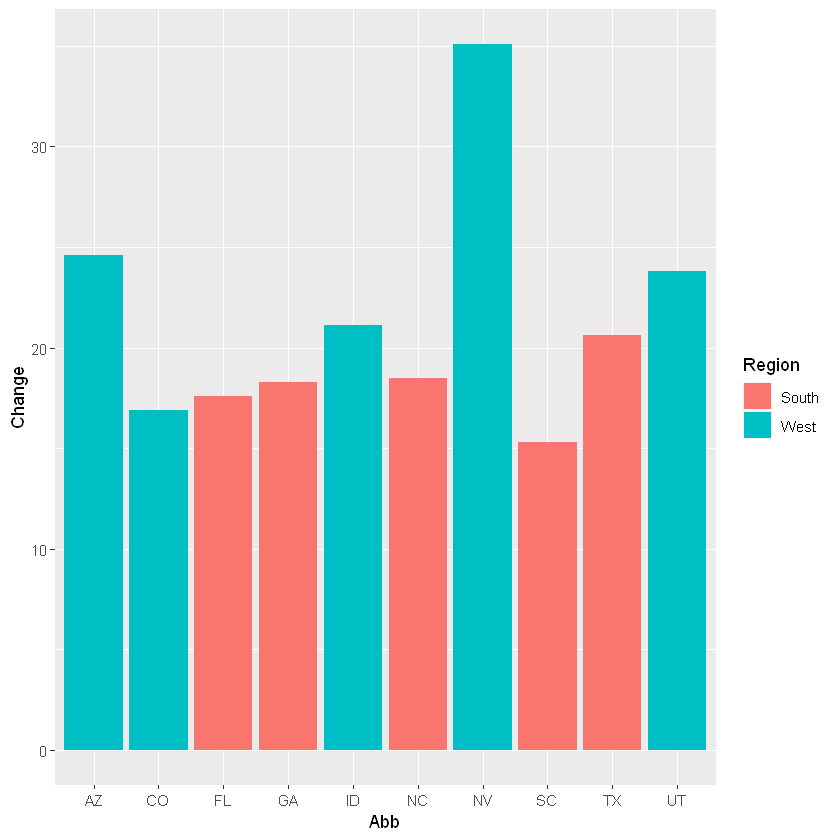

In [15]:
ggplot(upc, aes(x=Abb, y=Change, fill=Region)) + geom_bar(stat="identity")

条形图的默认颜色不太吸引眼球，因此，可能需要借助函数`scale_fill_brewer()`或`scale_fill_manual()`重新设定图形颜色。这里使用后者，通过参数指定`color="black"`将条形的边框线设定为黑色。  
注意：颜色的映射设定是在`aes()`内部完成的，而颜色的重新设定是在`aes()`外部完成的：

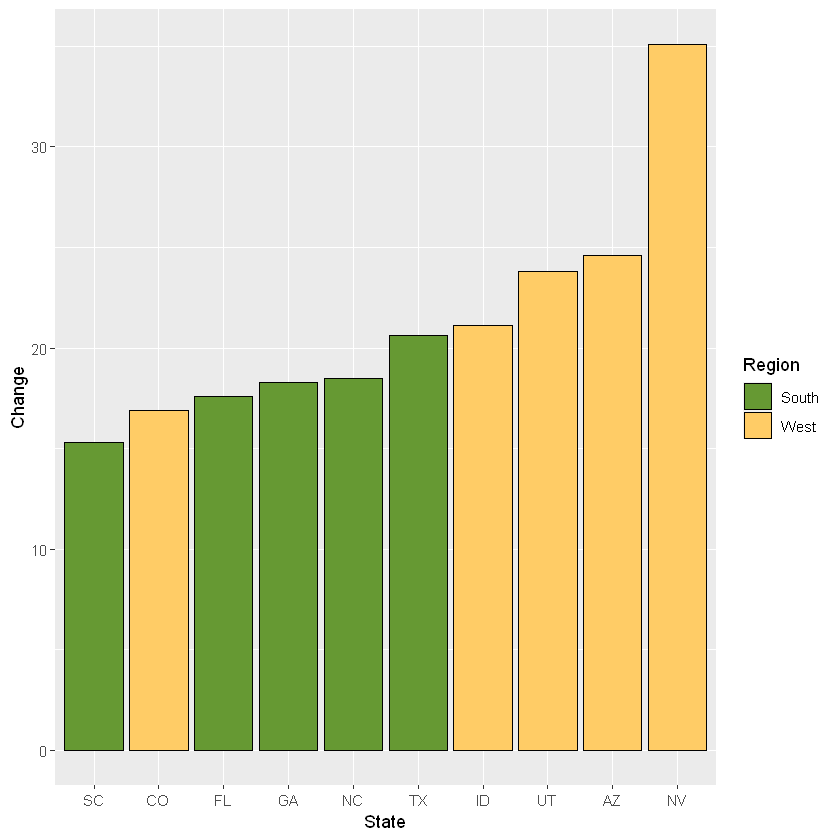

In [19]:
ggplot(upc, aes(x=reorder(Abb, Change), y=Change, fill=Region)) + geom_bar(stat = "identity", color="black") + scale_fill_manual(values = c("#669933", "#FFCC66")) +
xlab("State")

使用`reorder()`函数，在本例中，根据条形图的高度进行排序。

## 对正负条形图分别着色

In [21]:
head(climate)

,Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Berkeley,1800,NA,NA,-0.435,0.505
2,Berkeley,1801,NA,NA,-0.453,0.493
3,Berkeley,1802,NA,NA,-0.460,0.486
4,Berkeley,1803,NA,NA,-0.493,0.489
5,Berkeley,1804,NA,NA,-0.536,0.483
6,Berkeley,1805,NA,NA,-0.541,0.475


In [35]:
csub <- subset(climate, Source=="Berkeley" & Year >= 1900)
csub$pos <- csub$Anomaly10y >= 0
head(csub,4)

,Source,Year,Anomaly1y,Anomaly5y,Anomaly10y,Unc10y,pos
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
101,Berkeley,1900,NA,NA,-0.171,0.108,FALSE
102,Berkeley,1901,NA,NA,-0.162,0.109,FALSE
103,Berkeley,1902,NA,NA,-0.177,0.108,FALSE
104,Berkeley,1903,NA,NA,-0.199,0.104,FALSE


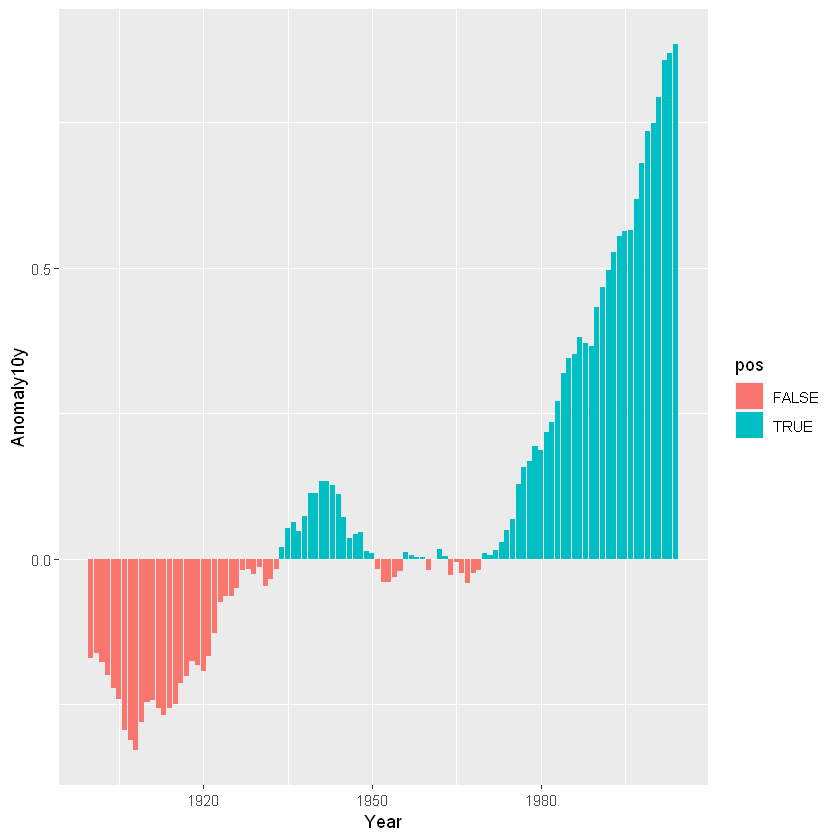

In [36]:
ggplot(csub, aes(x=Year, y=Anomaly10y, fill=pos)) + 
geom_bar(stat="identity", position = "identity")

可以通过`scale_fill_manual()`参数对图形颜色进行调整.同时，通过设定边框颜色（color）和边框线宽度（size）为图形添加一个系黑色边框。其中，边框线（size）宽度参数，单位mm。用`guide="none"`移除图例

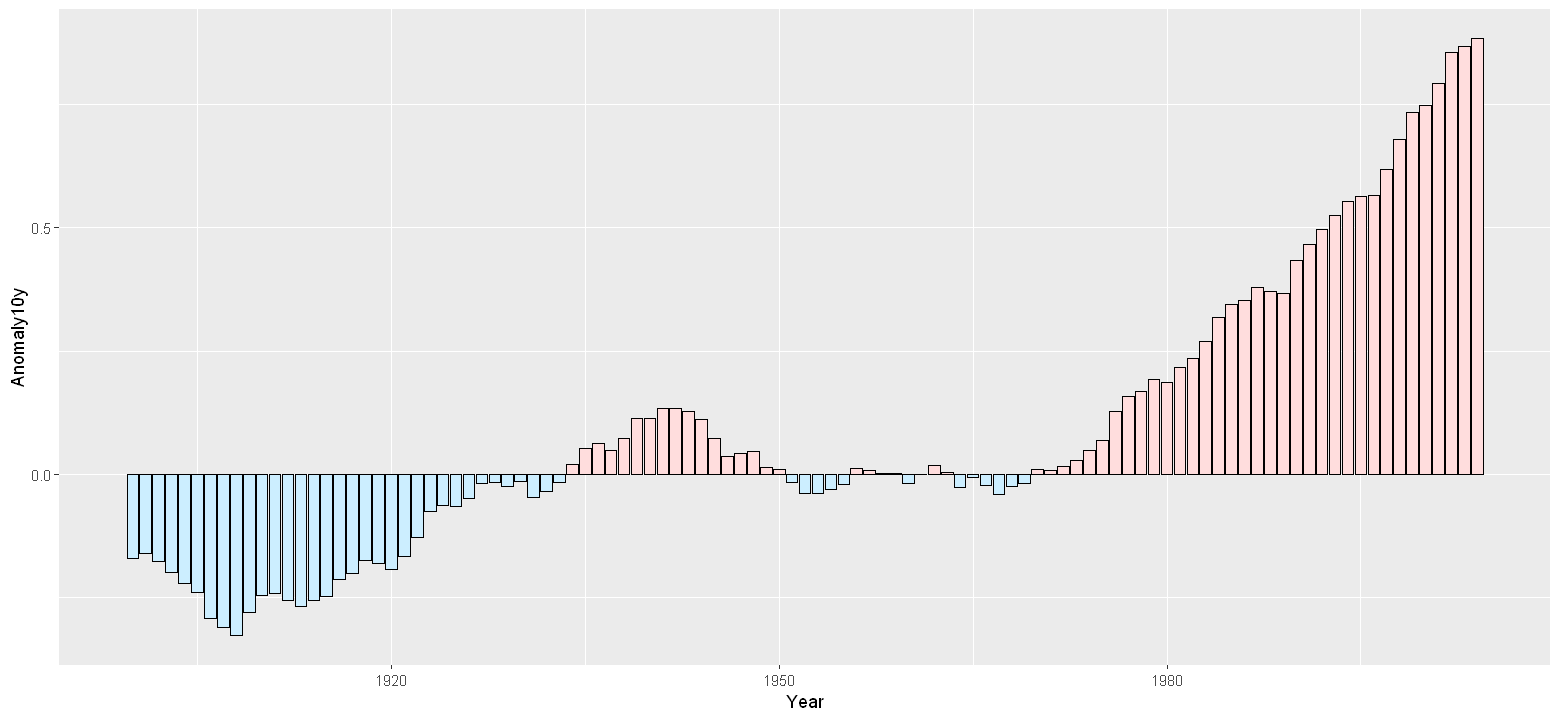

In [48]:
options(repr.plot.width=13, repr.plot.height=6)

ggplot(csub, aes(x=Year, y=Anomaly10y, fill=pos)) + 
geom_bar(stat="identity", position = "identity", color="black",size=0.25) +
scale_fill_manual(values = c("#CCEEFF", "#FFDDDD"), guide = "none" )

## 调整条形宽度和条形间距

通过设定`geom_bar()`函数的参数width。默认值：0.9.

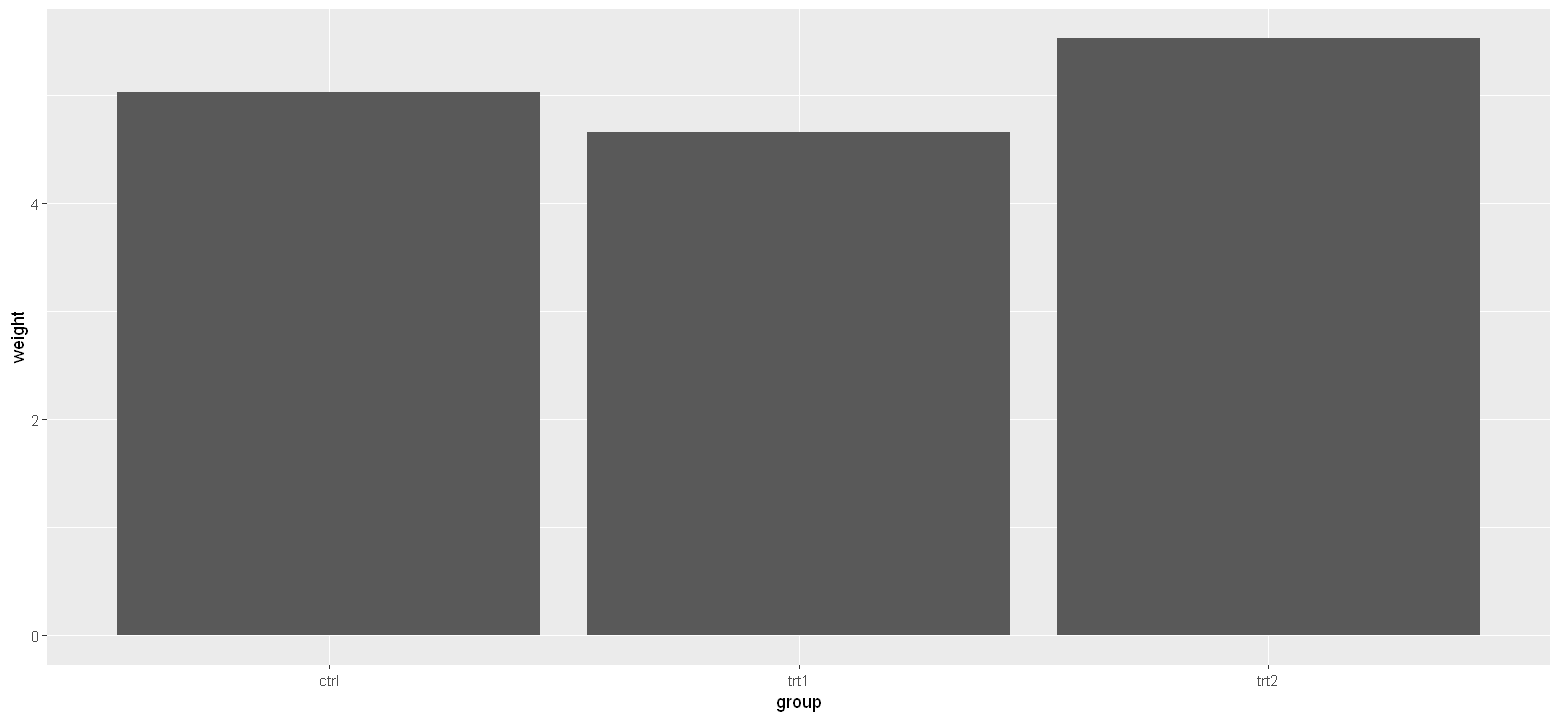

In [49]:
ggplot(pg_mean, aes(x=group, y=weight)) + geom_bar(stat="identity")

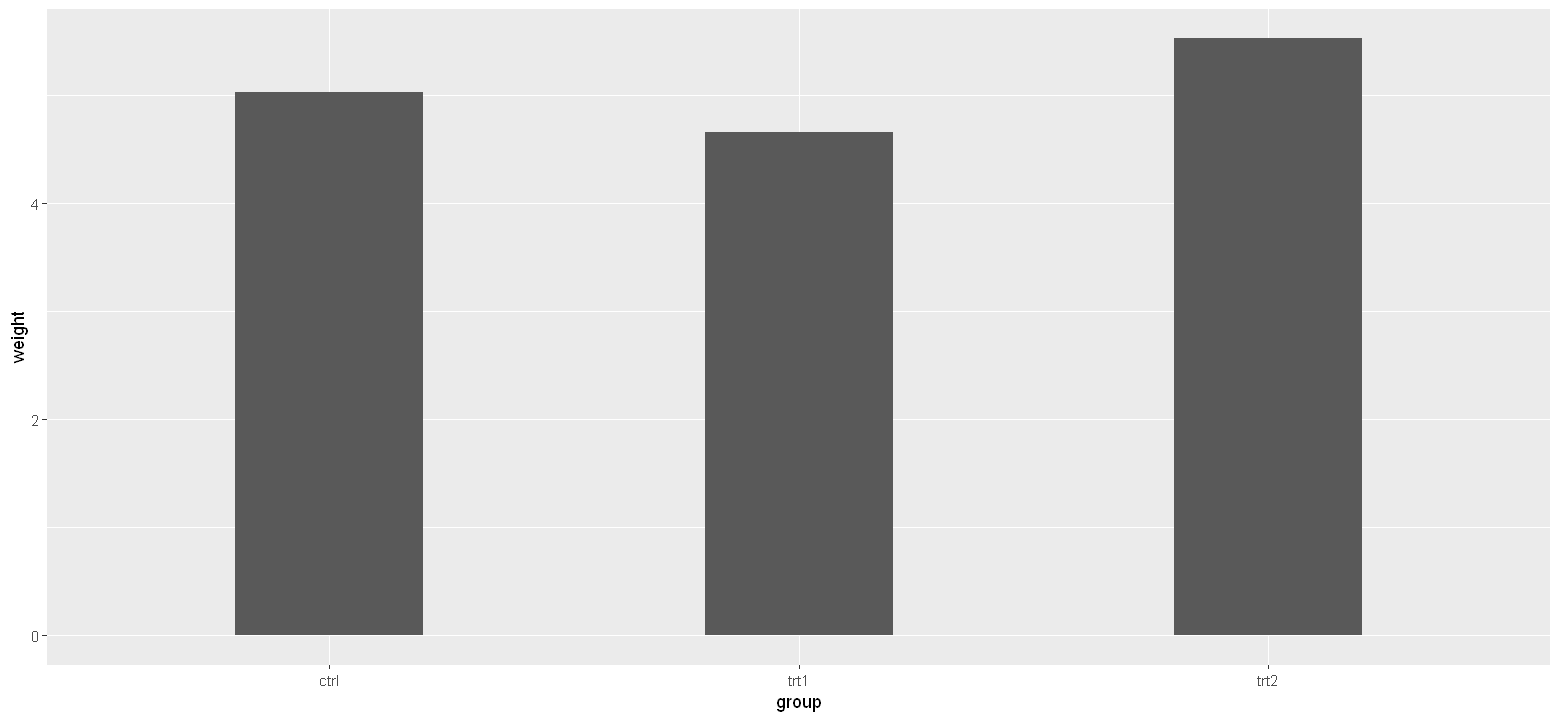

In [50]:
ggplot(pg_mean, aes(x=group, y=weight)) + geom_bar(stat="identity", width = 0.4)

簇状条形图默认组内的条形间距为0.如果希望增加组内条形的间距，则可以通过`position_dodge()`,默认值也是0.9

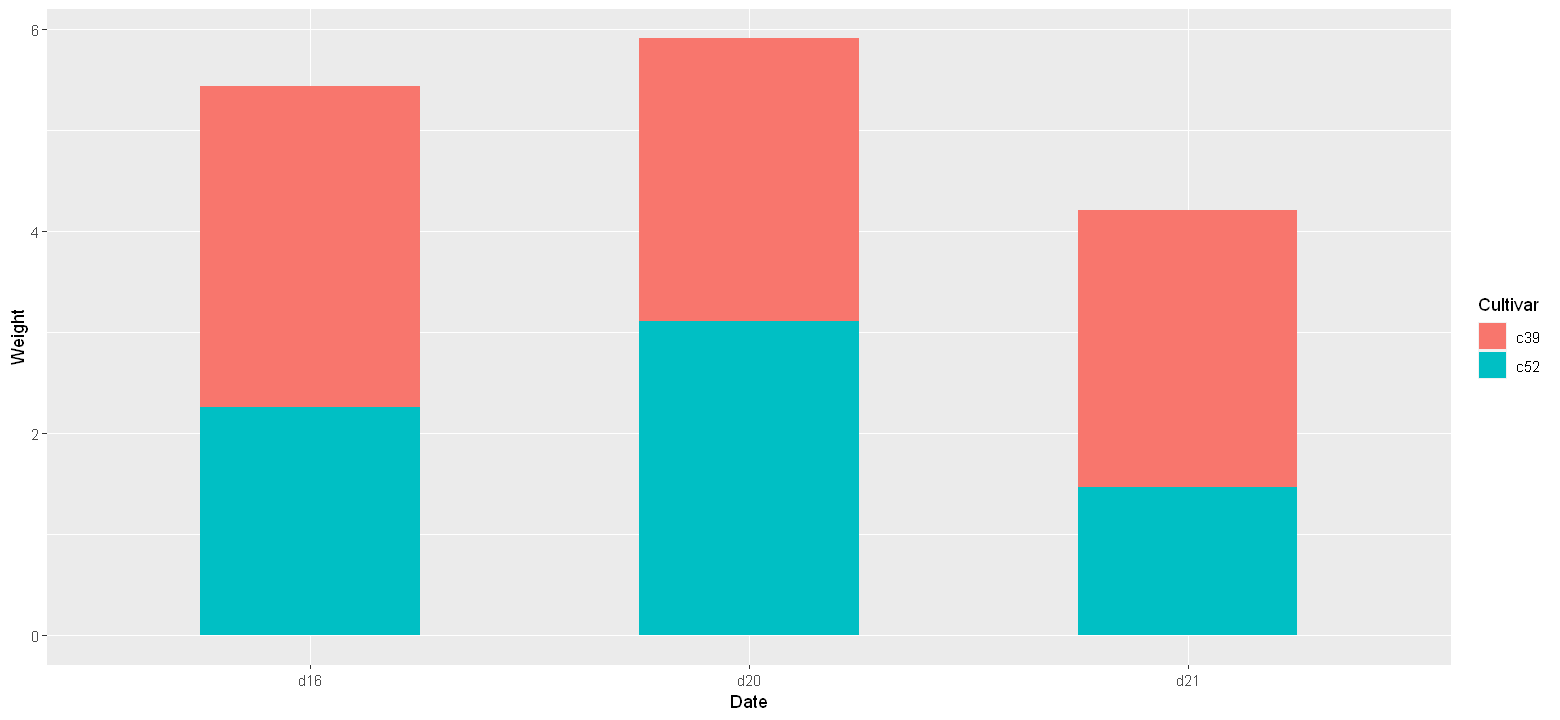

In [55]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
geom_bar(stat="identity", width = 0.5)

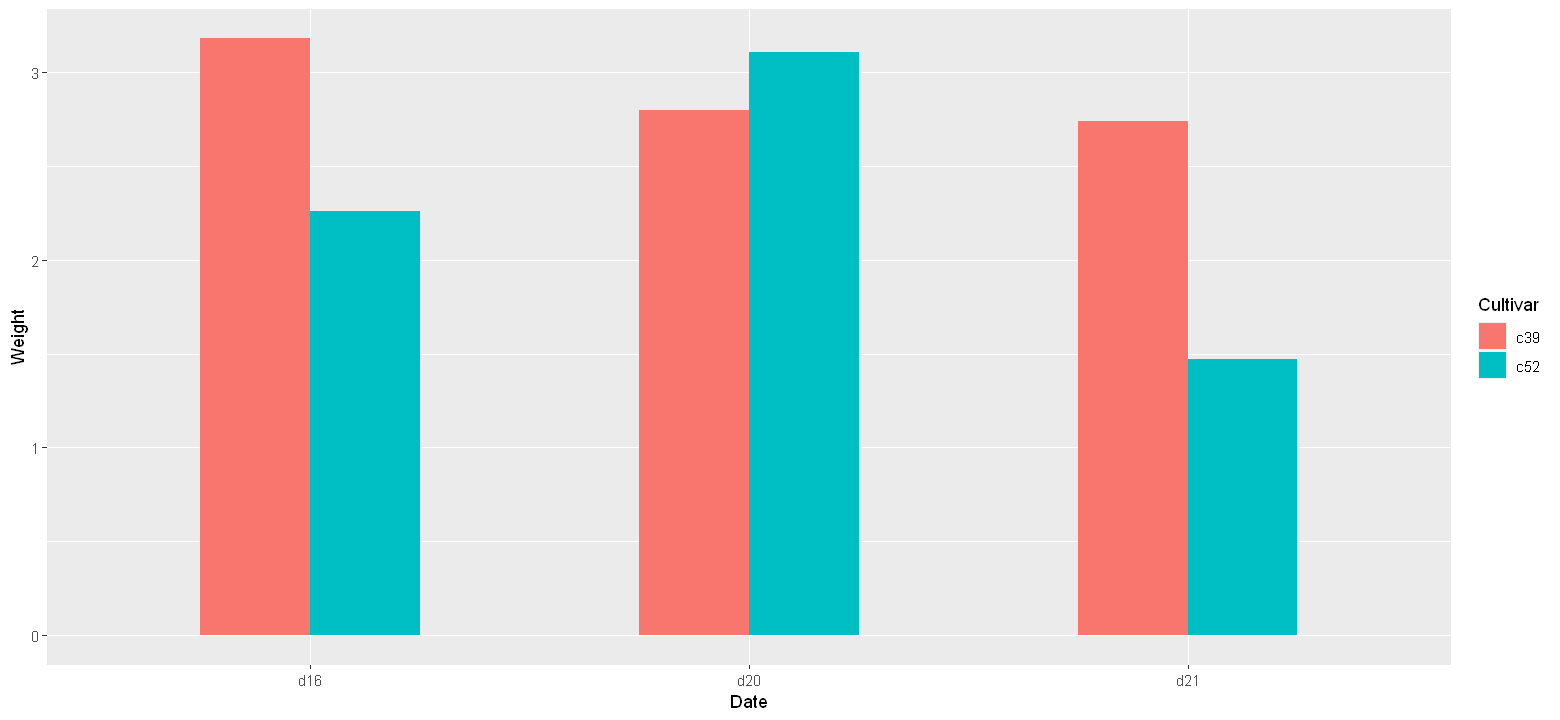

In [56]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
geom_bar(stat="identity", width = 0.5, position = "dodge")

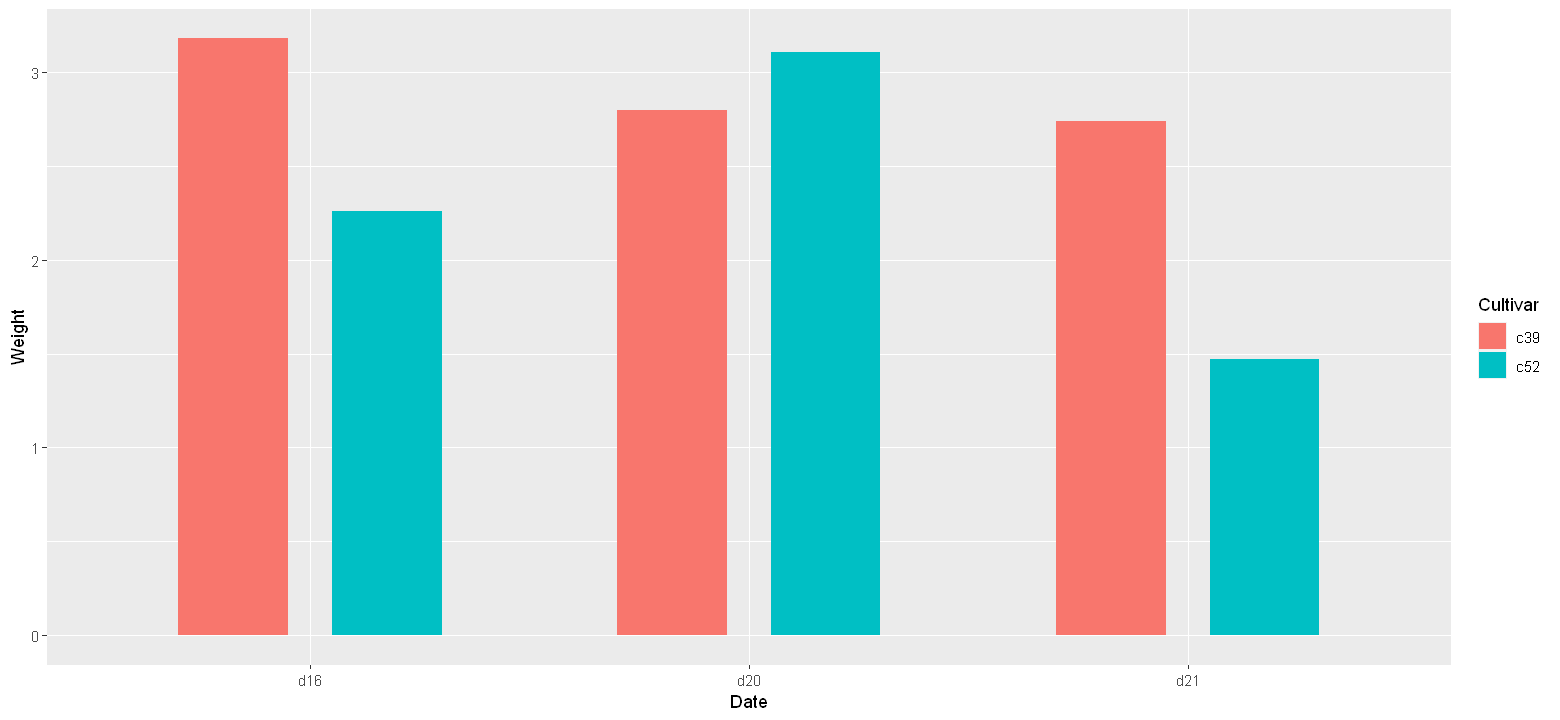

In [57]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
geom_bar(stat="identity", width = 0.5, position = position_dodge(0.7) )

## 绘制堆积条形图

使用`geom_bar()`函数，并映射一个变量给填充色参数(fill)即可。

In [35]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


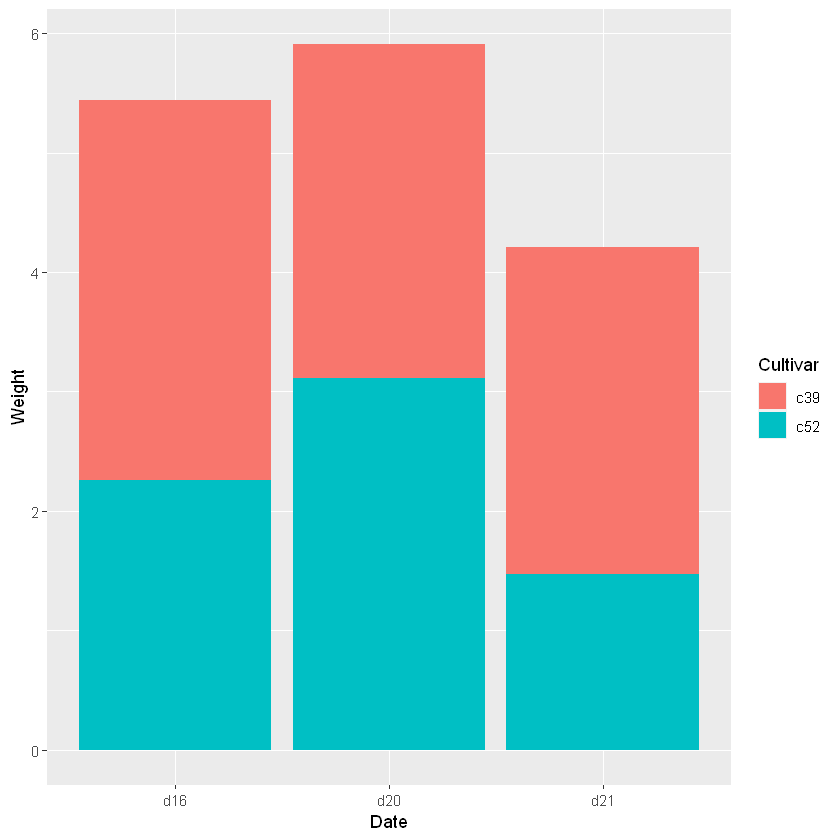

In [2]:
ggplot(cabbage_exp,aes(x=Date, y=Weight, fill=Cultivar)) + 
geom_bar(stat="identity")

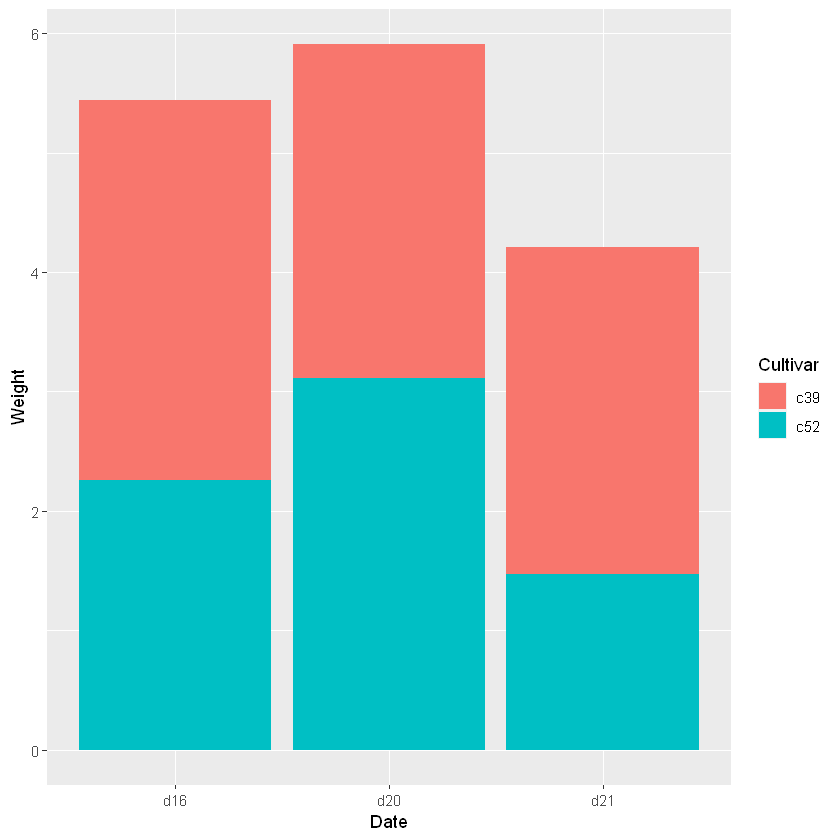

In [6]:
ggplot(cabbage_exp,aes(x=Date, y=Weight, fill=Cultivar)) +
geom_bar(stat="identity") + 
guides(fill=guide_legend(reverse = F)) # 可以更改图例顺序，在这里，图例顺序没有改变

可通过指定图形映射中的参数`order=desc()`来实现条形的堆叠顺序. `desc()`函数存在于`plyr`包中

为了获得更好效果的条形图，我们保持逆序的图例顺序不变，同时，使用`scale_fill_brewer()`函数得到一个新的调色板，最后设定`color="black"`为条形添加一个黑色边框线

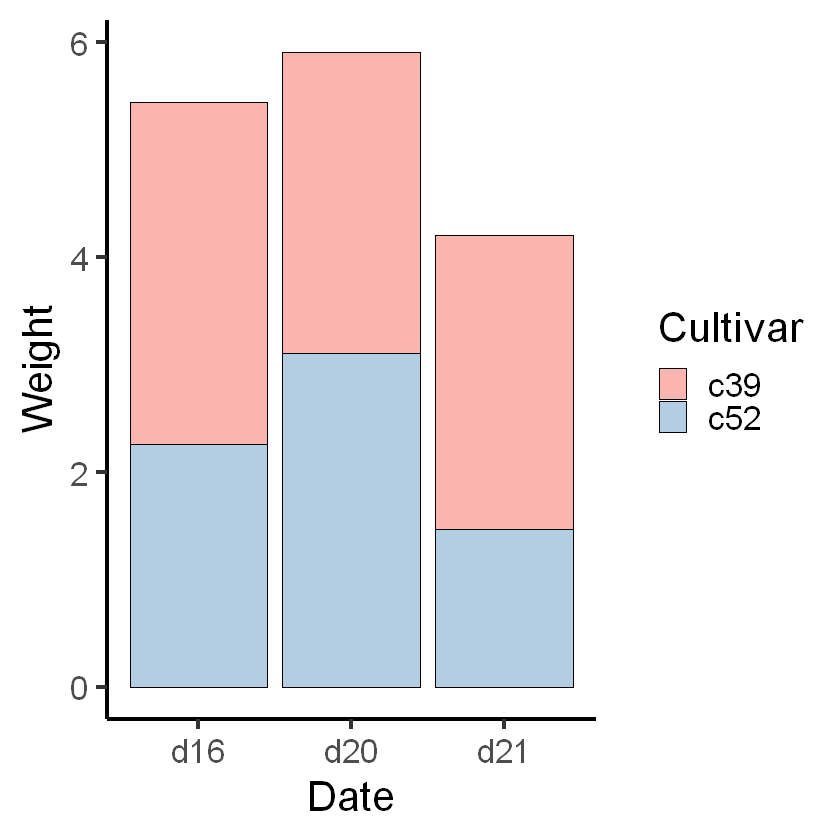

In [5]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) + 
 geom_bar(stat="identity", color="black") + 
 scale_fill_brewer(palette = "Pastel1") + 
 theme_classic(base_size = 25)

## 绘制百分比堆积条形图

首先，通过plyr包中的`ddply()`函数和`transform()`函数将每组条形对应的数据标准化为100%格式，之后，针对计算得到的结果绘制堆积条形图。

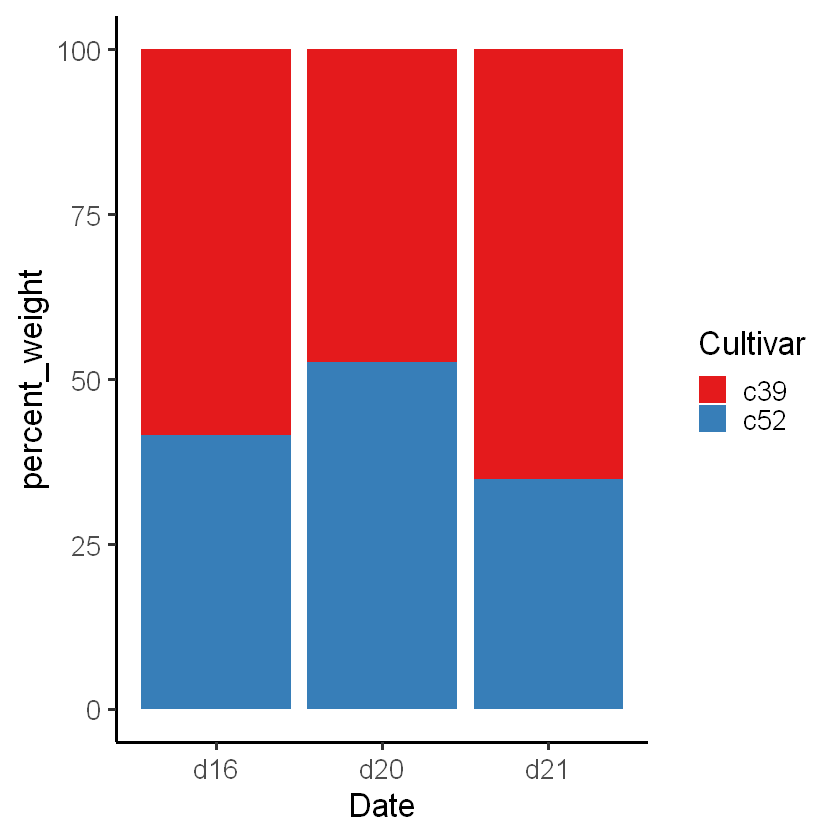

In [4]:
library(plyr)
# 以Date为切割变量 对每组数据进行transform()
ce <- ddply(cabbage_exp, "Date", transform,
           percent_weight = Weight / sum(Weight) * 100 )

ggplot(ce, aes(x=Date, y=percent_weight, fill=Cultivar)) + 
 geom_bar(stat="identity") + 
 scale_fill_brewer(palette = 'Set1') + 
 theme_classic(base_size = 20) + 
 scale_x_continuous

**讨论**  
用`ddply()`函数计算每组Date变量对应的百分比。ddply()函数根据指定的变量Date对数据框cabbage_exp进行分组，并对各组数据执行`transform()`函数(ddply()函数中设定的其他参数也会传递给该函数)。

In [13]:
head(cabbage_exp,3)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171
3,c39,d21,2.74,0.9834181,10,0.31098410


In [14]:
ddply(cabbage_exp, "Date", transform,
      percent_weight = Weight / sum(Weight) * 100 )

Cultivar,Date,Weight,sd,n,se,percent_weight
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803,58.45588
c52,d16,2.26,0.4452215,10,0.14079141,41.54412
c39,d20,2.80,0.2788867,10,0.08819171,47.37733
c52,d20,3.11,0.7908505,10,0.25008887,52.62267
c39,d21,2.74,0.9834181,10,0.31098410,65.08314
c52,d21,1.47,0.2110819,10,0.06674995,34.91686


计算出百分比之后，就可以按照绘制常规堆积条形图的方法来绘制百分比堆积条形图了

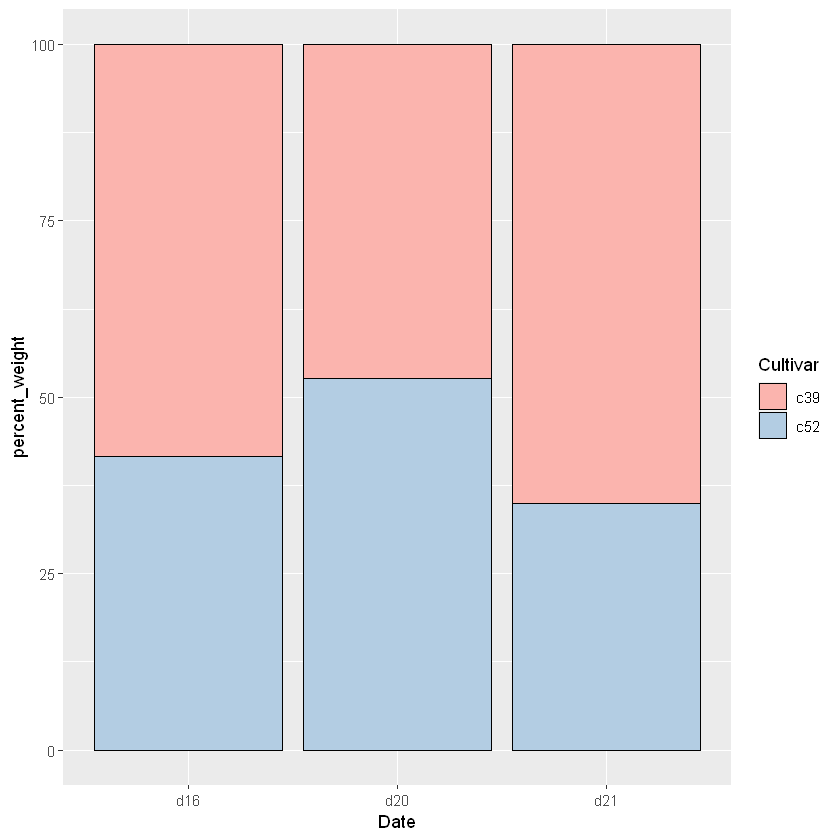

In [15]:
ggplot(ce, aes(x=Date,y=percent_weight,fill=Cultivar)) + 
geom_bar(stat="identity", color="black") + 
scale_fill_brewer(palette = "Pastel1")

## 添加数据标签

在绘图命令中加上`geom_text()`即可为条形图添加数据标签。运行命令时，需要分别指定一个变量映射给x、y和标签本身。  
通过设定vjust(竖直调整数据标签位置)可以将标签位置移动至条形图顶端的上方或下方。

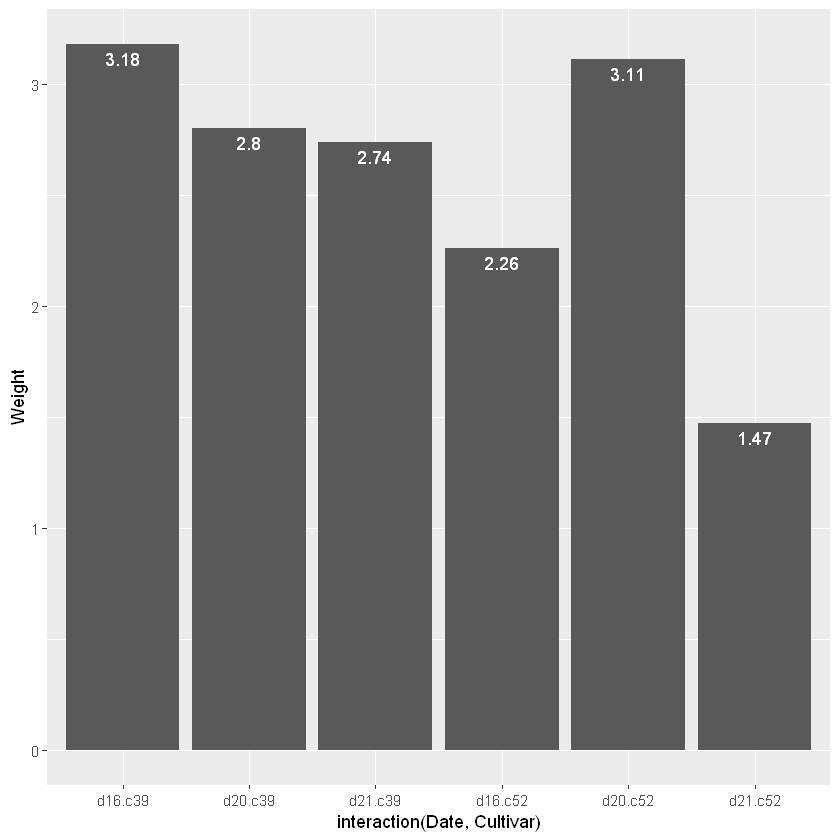

In [18]:
ggplot(cabbage_exp, aes(x=interaction(Date, Cultivar), y=Weight)) + 
 geom_bar(stat="identity") +
 geom_text(aes(label=Weight), vjust=1.5,color="white")

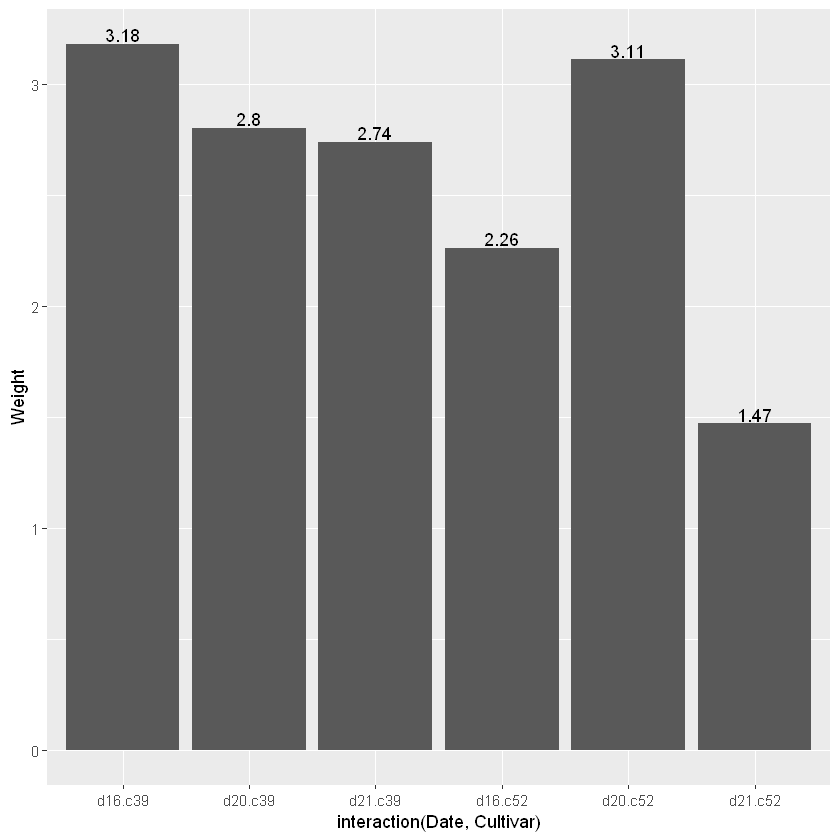

In [19]:
ggplot(cabbage_exp, aes(x=interaction(Date, Cultivar), y=Weight)) + 
 geom_bar(stat="identity") +
 geom_text(aes(label=Weight), vjust=-0.2)

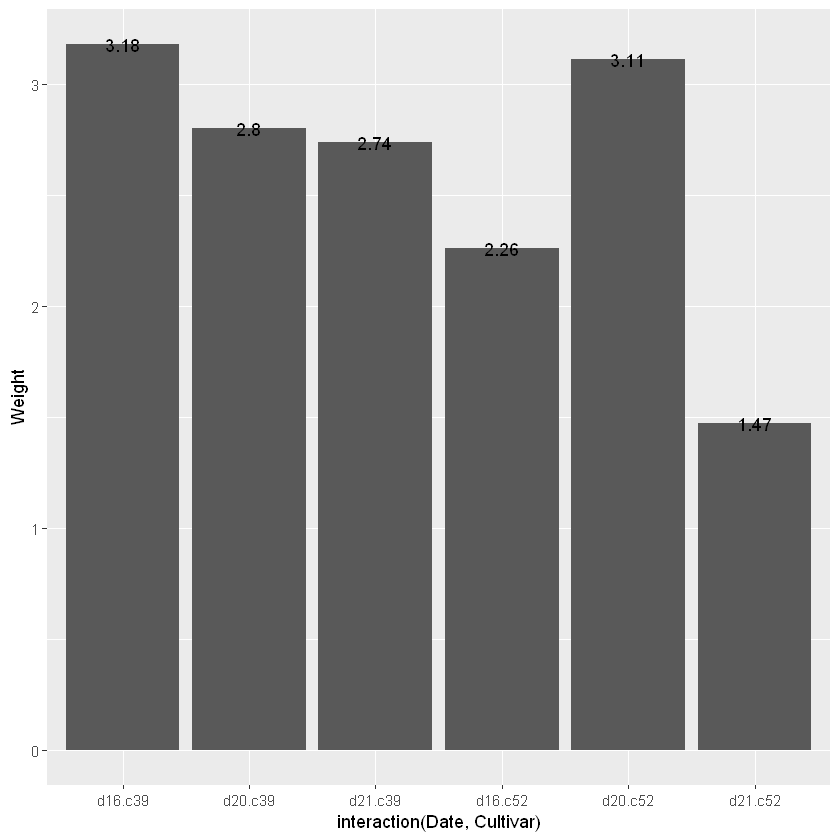

In [21]:
ggplot(cabbage_exp, aes(x=interaction(Date, Cultivar), y=Weight)) + 
 geom_bar(stat="identity") +
 geom_text(aes(label=Weight))

对于簇状条形图，需要设定position=position_dodge()并给其一个参数来设定分类间距。分类间距的默认值是0.9.  
因为簇状条形图的条形更窄，所以需要字号（size）来缩小数据标签的字体大小以匹配条形宽度.  
数据标签默认字号是5

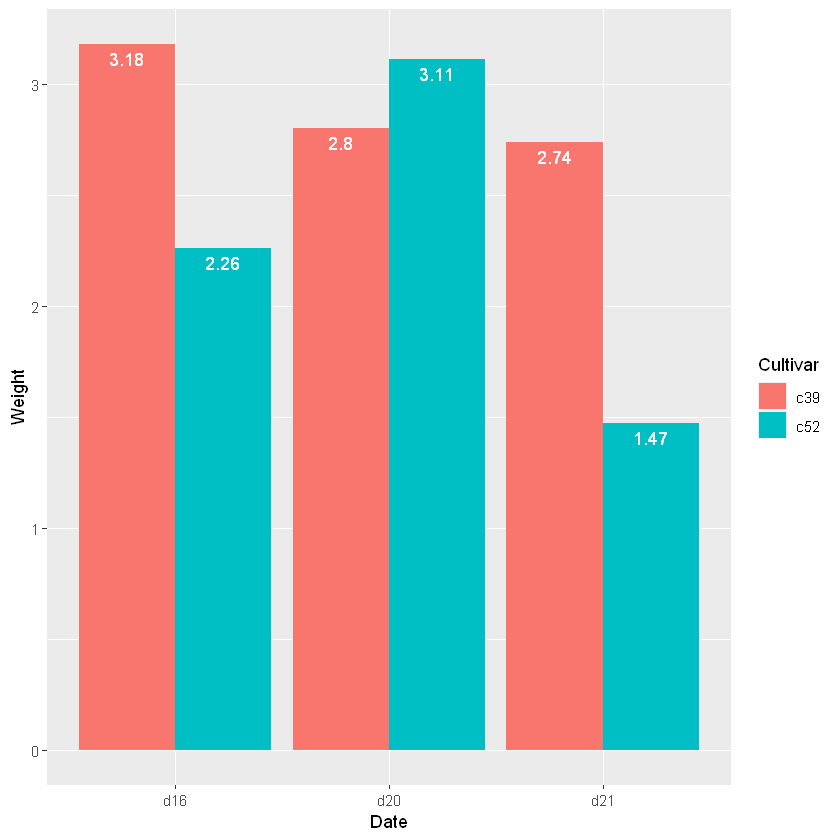

In [24]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) +
 geom_bar(stat="identity", position="dodge") +
 geom_text(aes(label=Weight), vjust=1.5, color="white",
           position = position_dodge(0.9))

向堆积条形图添加数据标签之前,要先对每组条形对应的数据进行累积求和.  在进行本操作之前,须保证数据的合理排序,否则,可能计算出错误的累积和.  
可以用plyr包中的`arrange()`函数完成上述操作,plyr包是一个随ggplot2包加载的软件包.

In [53]:
ce <- arrange(cabbage_exp, Date, desc(Cultivar))

In [51]:
cabbage_exp

Cultivar,Date,Weight,sd,n,se
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410
c52,d16,2.26,0.4452215,10,0.14079141
c52,d20,3.11,0.7908505,10,0.25008887
c52,d21,1.47,0.2110819,10,0.06674995


In [54]:
ce

Cultivar,Date,Weight,sd,n,se
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
c52,d16,2.26,0.4452215,10,0.14079141
c39,d16,3.18,0.9566144,10,0.30250803
c52,d20,3.11,0.7908505,10,0.25008887
c39,d20,2.80,0.2788867,10,0.08819171
c52,d21,1.47,0.2110819,10,0.06674995
c39,d21,2.74,0.9834181,10,0.31098410


确认数据合理排序之后,可以借助`ddply()`函数以Date为分组变量对数据进行分组,并分别计算每组数据对应的变量weight的累积和

In [55]:
ce <- ddply(ce, "Date", transform, label_y = cumsum(Weight))

In [56]:
ce

Cultivar,Date,Weight,sd,n,se,label_y
<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
c52,d16,2.26,0.4452215,10,0.14079141,2.26
c39,d16,3.18,0.9566144,10,0.30250803,5.44
c52,d20,3.11,0.7908505,10,0.25008887,3.11
c39,d20,2.80,0.2788867,10,0.08819171,5.91
c52,d21,1.47,0.2110819,10,0.06674995,1.47
c39,d21,2.74,0.9834181,10,0.31098410,4.21


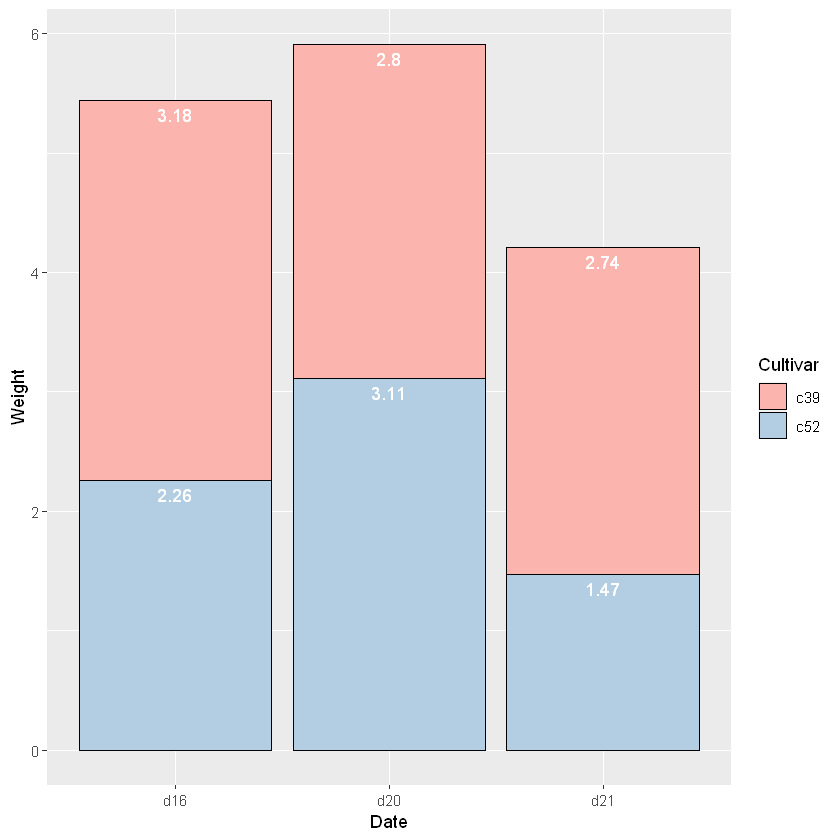

In [58]:
ggplot(ce,aes(x=Date, y=Weight, fill=Cultivar)) + geom_bar(stat="identity", color = "black") + 
geom_text(aes(y=label_y,label=Weight),vjust=1.5, color="white") +
scale_fill_brewer(palette = "Pastel1")

如果想把数据标签置于条形中部，须对累计求和的结果加以调整，并同时略去`geom_bar()`函数中对y偏移量（offset）的设置

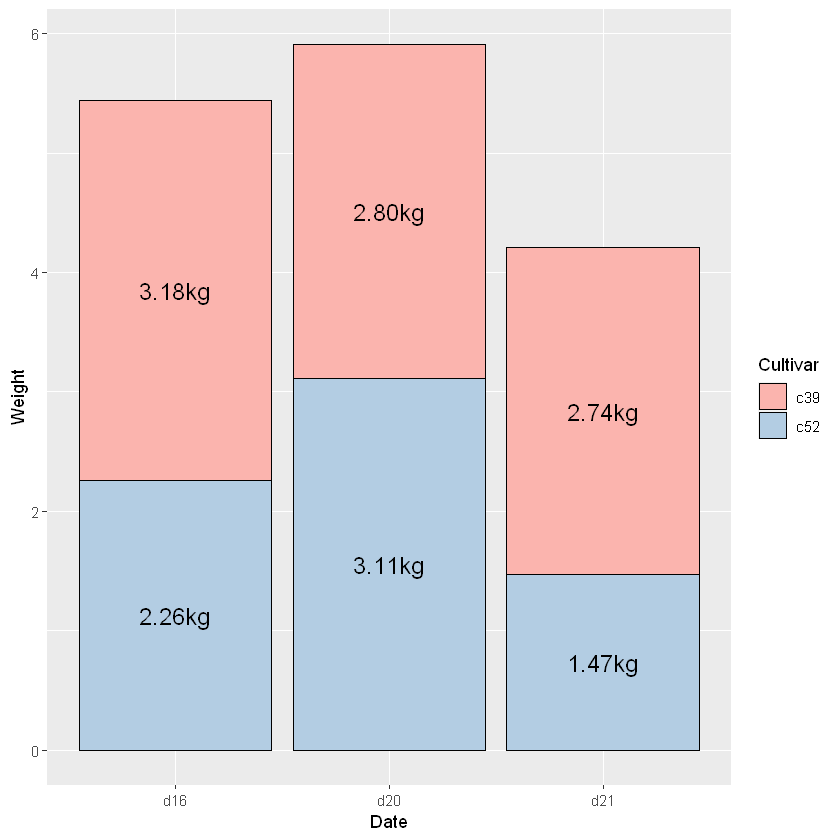

In [70]:
ce <- arrange(cabbage_exp, Date, desc(Cultivar))

# 计算y轴的位置
ce <- ddply(ce, "Date", transform, label_y = cumsum(Weight)-0.5*Weight)

ggplot(ce, aes(x=Date, y=Weight, fill=Cultivar)) + geom_bar(stat="identity", color="black") +
 geom_text(aes(y=label_y,label=paste0(format(Weight,nsmall = 2),'kg')),size=5, color="black") + 
 scale_fill_brewer(palette = "Pastel1")

为了得到效果更好的条形图，使用`format`函数保留标签的两位小数，并调用`paste0`在后面添加"kg"

## 绘制Cleveland点图

有时人们会用Cleveland点图来代替条形图以减少图形造成的视觉混乱，并使图形具有可读性

最简单的绘制Cleveland点图的方法是直接运行`geom_point()`命令

In [74]:
tophit <- tophitters2001[1:25,]
head(tophit,2)

,id,first,last,name,year,stint,team,lg,g,ab,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,avg
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,walkela01,Larry,Walker,Larry Walker,2001,1,COL,NL,142,497,...,14,5,82,103,6,14,0,8,9,0.3501
2,suzukic01,Ichiro,Suzuki,Ichiro Suzuki,2001,1,SEA,AL,157,692,...,56,14,30,53,10,8,4,4,3,0.3497


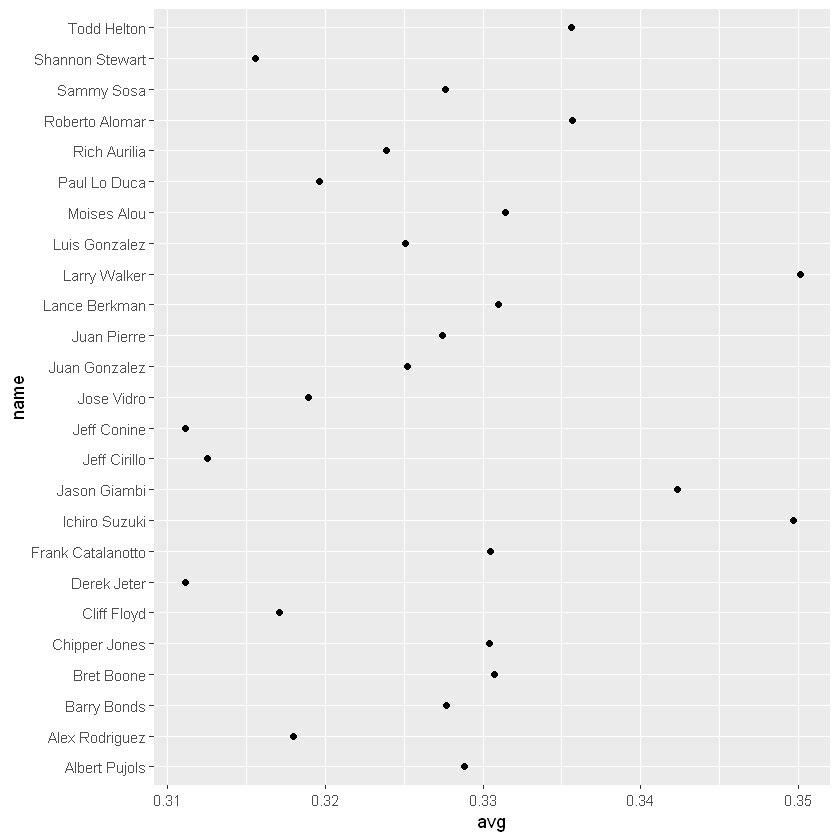

In [79]:
ggplot(tophit, aes(x=avg,y=name)) + geom_point()

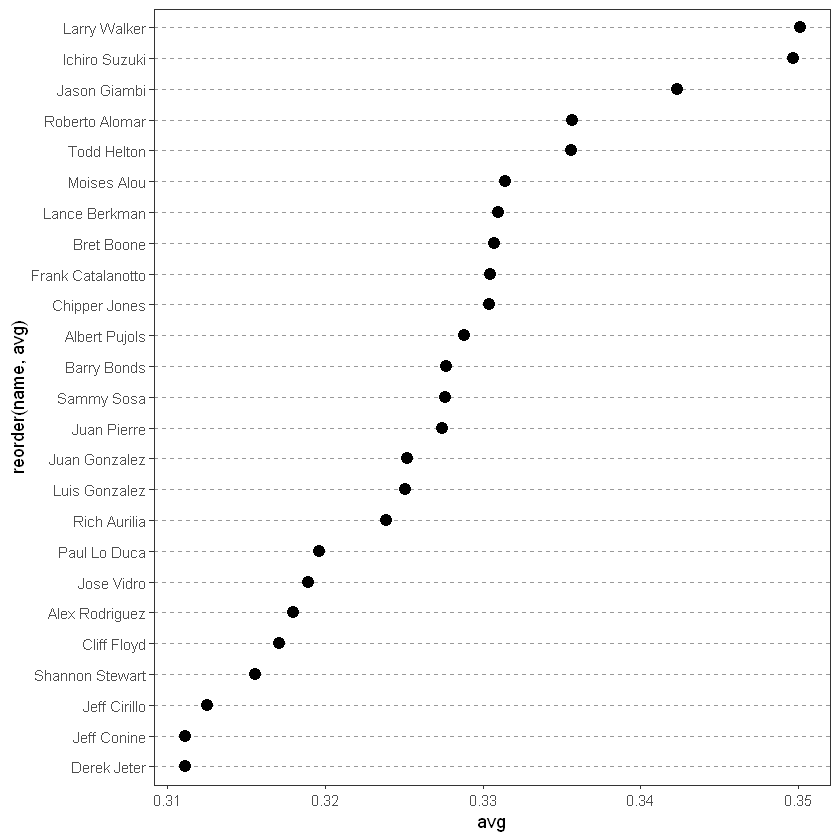

In [86]:
ggplot(tophit,aes(x=avg,y=reorder(name,avg))) + geom_point(size=3) + 
 theme_bw() + 
 theme(panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank(),
      panel.grid.major.y = element_line(color = "grey60", linetype = "dashed"))

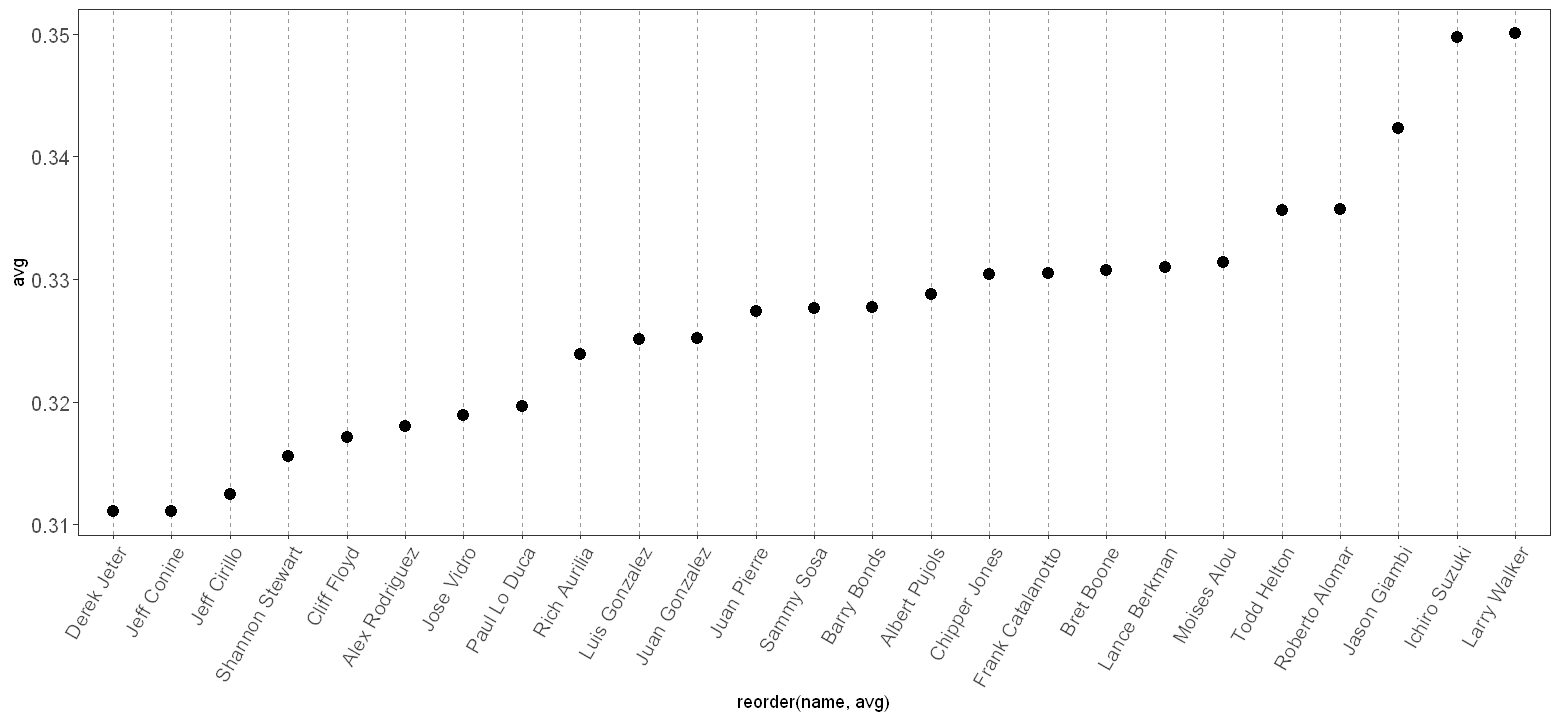

In [98]:
options(repr.plot.width=13, repr.plot.height=6)

ggplot(tophit, aes(x=reorder(name,avg),y=avg)) + 
 geom_point(size=3) +
 theme_bw() +
 theme(axis.text.x = element_text(angle = 60,hjust = 1,size = 12),
       axis.text.y = element_text(size = 12),
       panel.grid.major.y = element_blank(),
       panel.grid.minor.y = element_blank(),
       panel.grid.major.x = element_line(color = "grey60", linetype = "dashed"))

有时候，根据其他变量对样本进行分组很有用。这里我们根据因子lg对样本进行分组，因子lg有两个水平：国家队（NL）和美国队（AL）。  
依次根据lg和avg对变量进行排序。

In [129]:
tophit.reorder <- arrange(tophit, lg, avg)

nameorder <- tophit.reorder$name
tophit.reorder$name <- factor(tophit.reorder$name,levels = nameorder)

绘制点图时，我们把lg变量映射到点的颜色属性上。借助geom_segment()函数用“以数据点为端点的线段”代替贯通全图的网格线。  
`geom_segment()`函数要设定x, y, xend 和 yend四个参数。

In [121]:
nameorder <- tophit$name[order(tophit$lg, tophit$avg)]
tophit$name <- factor(tophit$name, levels = nameorder)
# tophit.reorder$name <- factor(tophit.reorder$name)

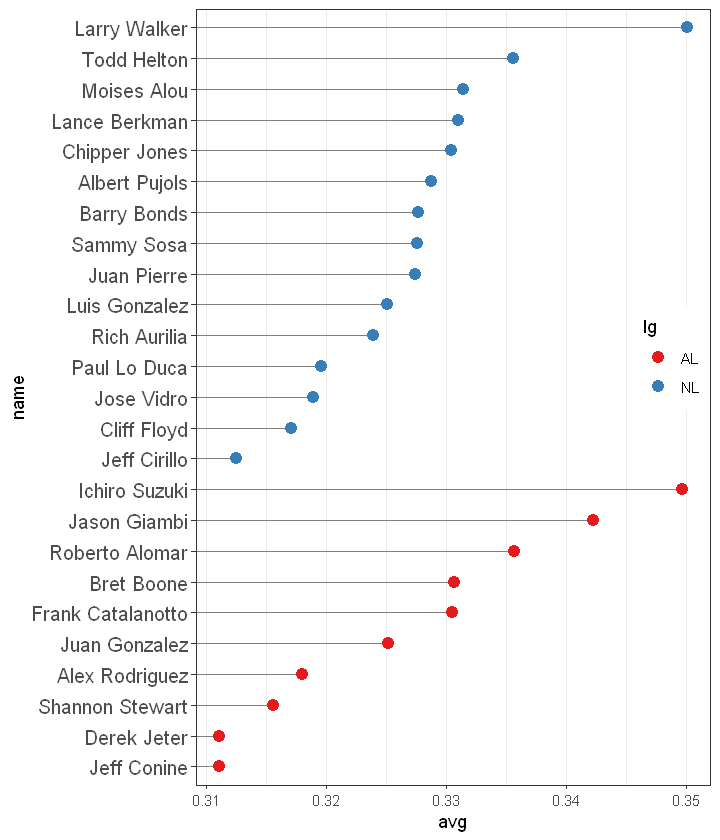

In [154]:
# 以队为分组变量的火柴杆图
options(repr.plot.width=6, repr.plot.height=7)

ggplot(tophit.reorder, aes(x=avg,y=name)) + 
 geom_segment(aes(yend=name),xend=0,color="grey50") + 
 geom_point(size=3,aes(color=lg)) + 
 scale_color_brewer(palette = "Set1") + 
 theme_bw() + 
 theme(legend.justification = c(1,0.5),
       legend.position = c(1,0.55),
       panel.grid.major.y = element_blank(),
       axis.text.y = element_text(size = 12))

另外一种分组展示数据的方式是分面。要修改分面显示的堆叠顺序只有通过调整lg变量的因子水平来实现。

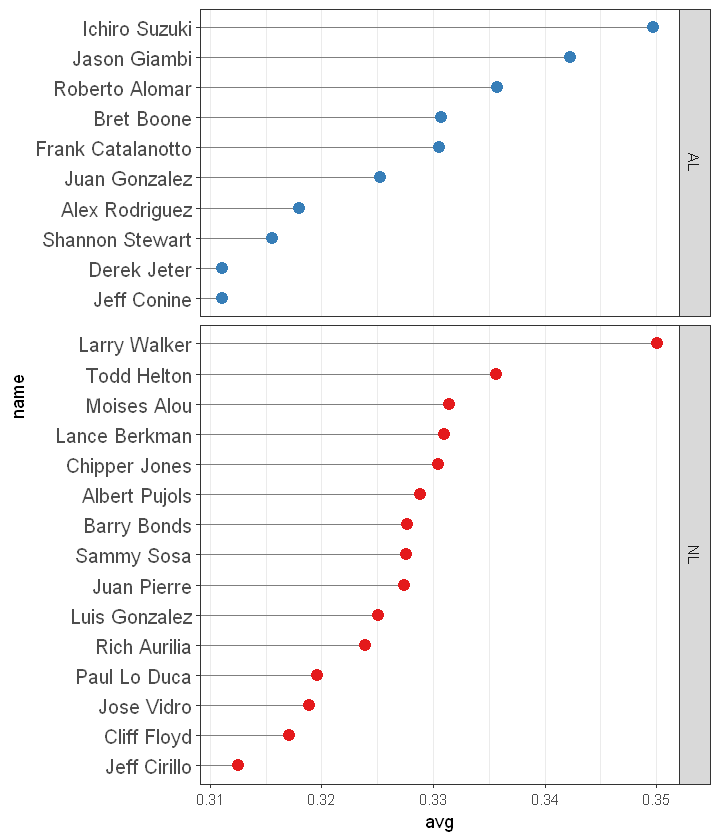

In [153]:
# 以队为分组变量分面绘图
ggplot(tophit.reorder, aes(x=avg,y=name)) + 
 geom_segment(aes(yend=name),xend=0,color="grey50") + 
 geom_point(size=3,aes(color=lg)) + 
 scale_color_brewer(palette = "Set1",limits=c('NL','AL'),guide="none") + 
 theme_bw() + 
 theme(panel.grid.major.y = element_blank(),
       axis.text.y = element_text(size = 12)) +
 facet_grid(lg ~ ., scales = "free_y", space = "free_y")

# 第四章 折线图

## 绘制简单折线图

In [3]:
BOD

Time,demand
<dbl>,<dbl>
1,8.3
2,10.3
3,19.0
4,16.0
5,15.6
7,19.8


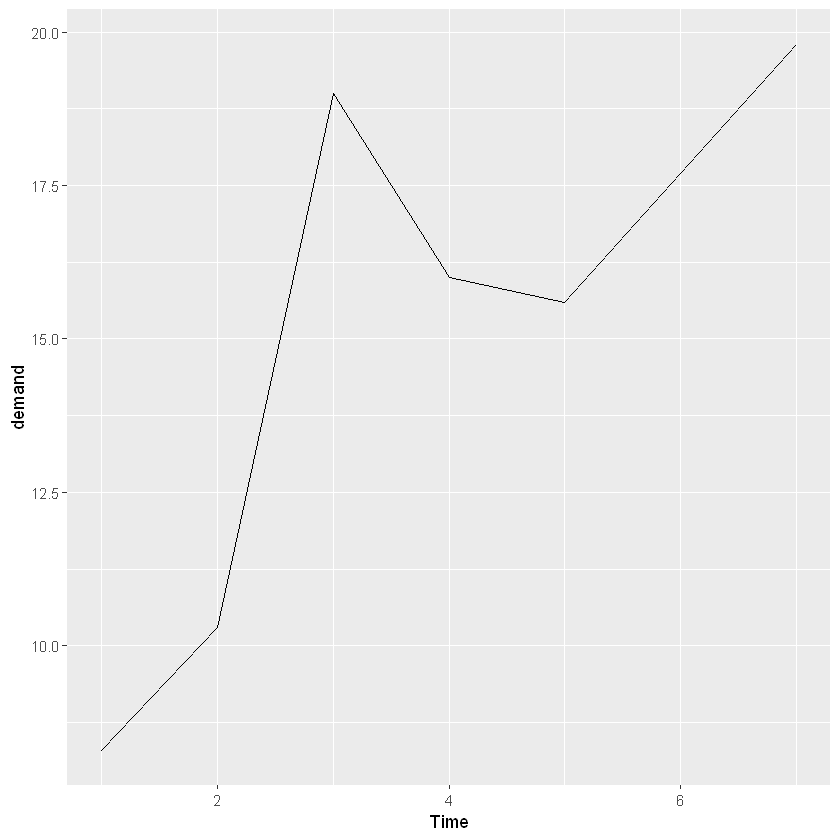

In [4]:
ggplot(BOD,aes(x=Time,y=demand)) + geom_line()

当x对应于因子型变量时，必须使用命令aes(group=1)以确保ggplot()知道这些数据点属于同一个分组，从而应该用一条折线连在一起（关于为什么因子型变量必须设定group的内容可以参见 [第四章 第三节](#绘制多重折线图) ）

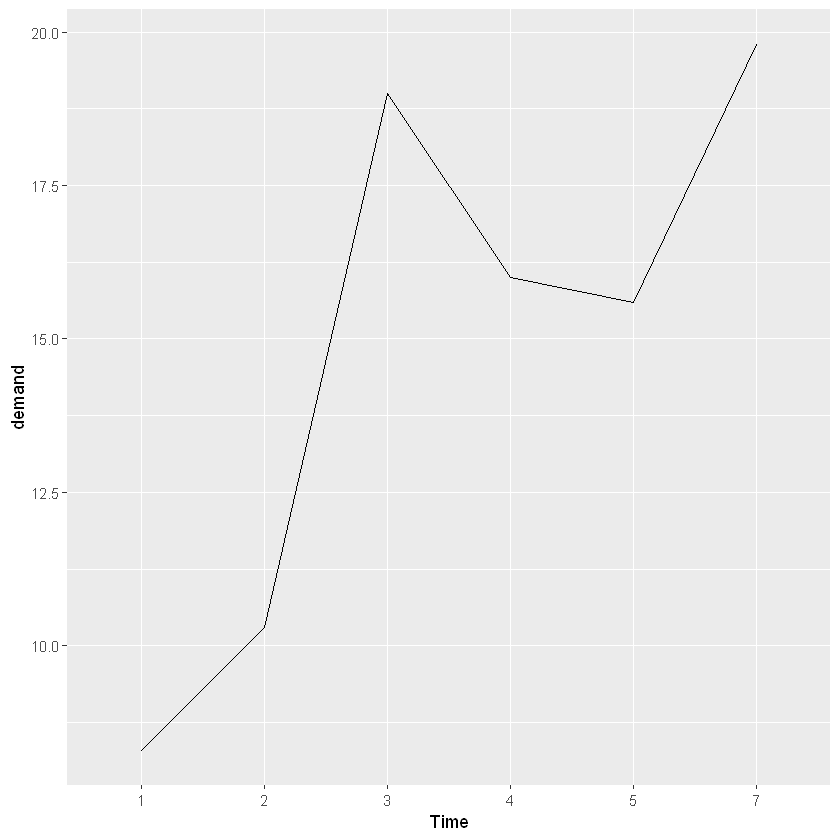

In [5]:
BOD1 <- BOD
BOD1$Time <- factor(BOD1$Time)
ggplot(BOD1, aes(x=Time, y=demand, group=1)) + geom_line()

数据集BOD中没有对应于`Time=6`的数据点，因此当Time被转化为因子型变量时，它并没有6这个水平。因子型变量对应于分类值。

可以运行`ylim()`设定y轴范围或者运行含一个参数的`expand_limit()`拓展y轴的范围。

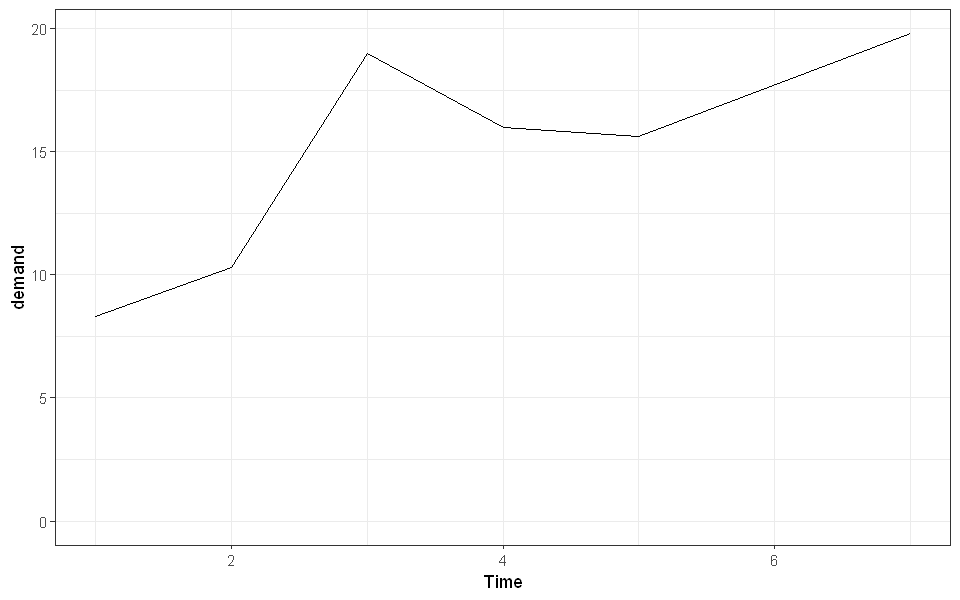

In [10]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(BOD,aes(x=Time, y=demand)) + geom_line() + ylim(0, max(BOD$demand)) + theme_bw()

## 向折线图添加数据标记

添加 `geom_point()`

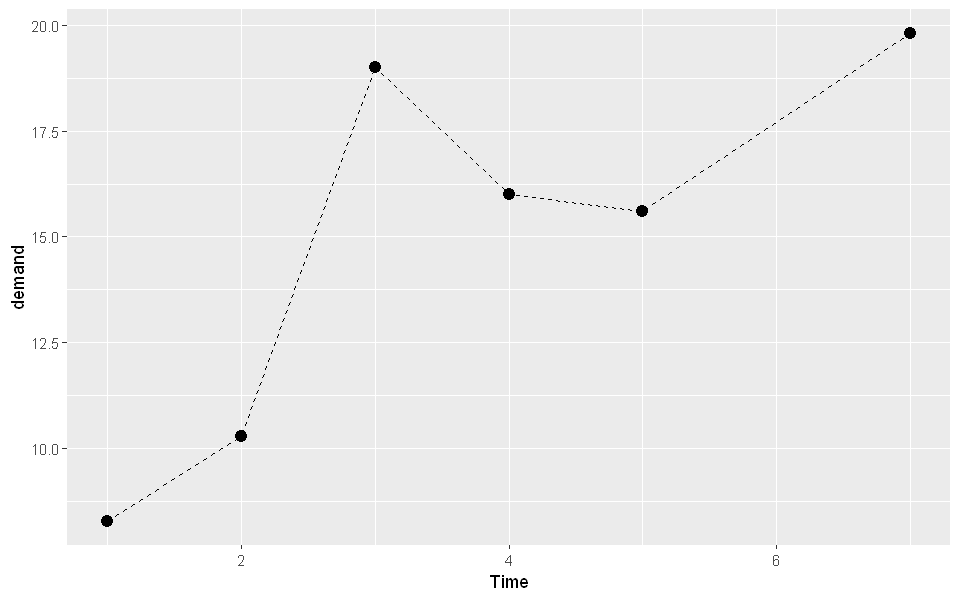

In [17]:
ggplot(BOD, aes(x=Time, y=demand)) + geom_line(linetype="dashed") + geom_point(size=3)

In [18]:
head(worldpop)

,Year,Population
,<int>,<int>
1,-10000,2431
2,-9000,3564
3,-8000,5136
4,-7000,7562
5,-6000,11461
6,-5000,17920


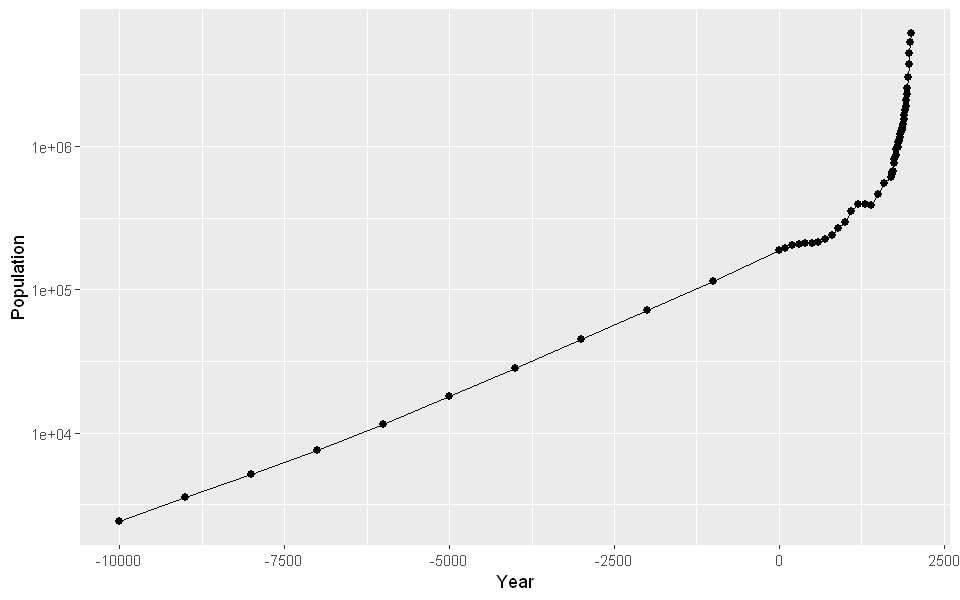

In [23]:
ggplot(worldpop, aes(x=Year,y=Population)) + geom_line() + geom_point(size=2) + scale_y_log10()

## 绘制多重折线图

在分别设定一个映射给x和y的基础上，再将另外一个（离散型）变量映射给颜色（color）或者线型（linetype）即可。

In [25]:
library(plyr)
tg <- ddply(ToothGrowth, c("supp", "dose"), summarise, length=mean(len))

In [29]:
head(ToothGrowth,2)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5


In [30]:
tg

supp,dose,length
<fct>,<dbl>,<dbl>
OJ,0.5,13.23
OJ,1.0,22.70
OJ,2.0,26.06
VC,0.5,7.98
VC,1.0,16.77
VC,2.0,26.14


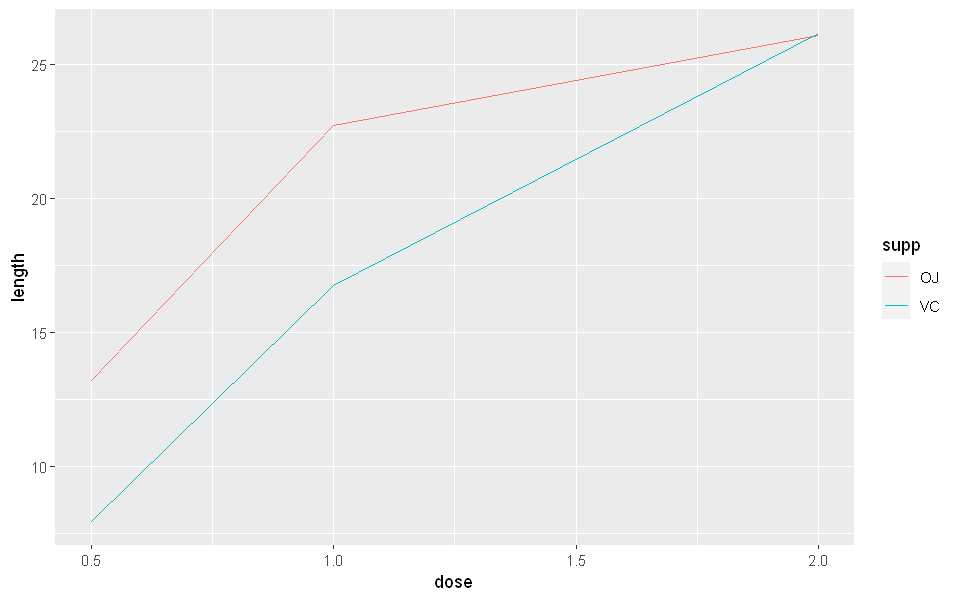

In [26]:
# 将supp映射给颜色
ggplot(tg, aes(x=dose, y=length, color=supp)) + geom_line()

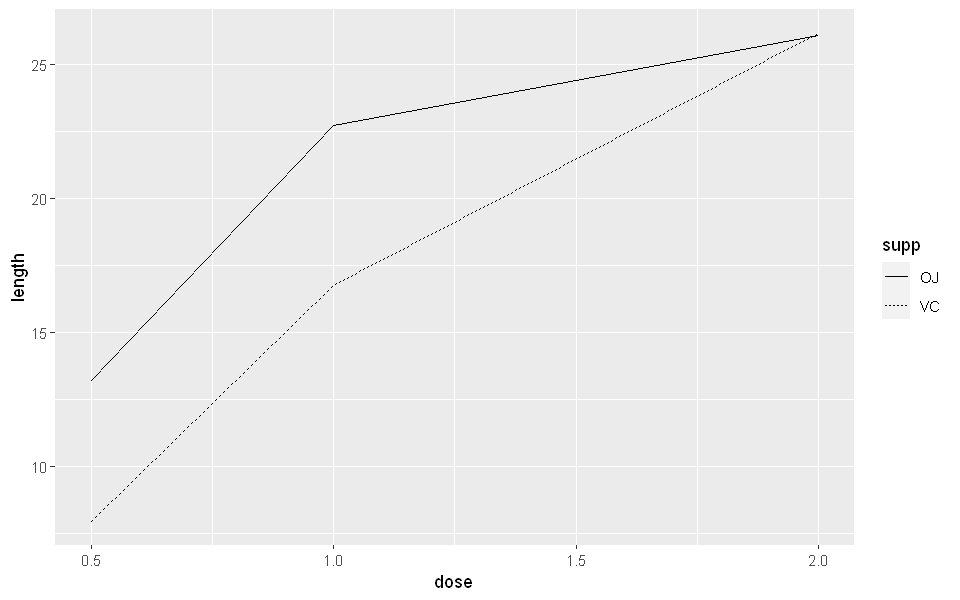

In [34]:
# 将supp映射给线型
ggplot(tg, aes(x=dose, y=length, linetype=supp)) + geom_line()

折线图的x轴既可以对应连续型变量，也可以对应离散型变量。有时候，映射给x的变量虽然是数值型变量，但被看作分类变量来处理。本例中，dose变量有三个取值：0.5、1.0、2.或许你更想将其当作分类变量而不是连续型变量来处理，那么运行`factor()`函数将其转化为因子。

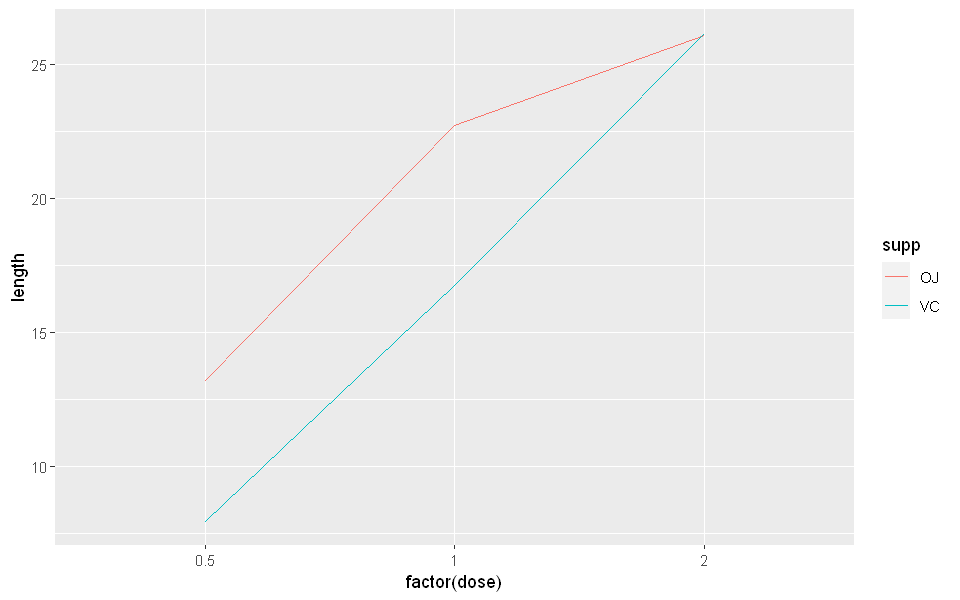

In [35]:
ggplot(tg, aes(x=factor(dose), y=length, color=supp, group=supp)) + geom_line()

**PS**:有疑问时，或者如果你的折线图看起来不太合理，可以试着用<font color='red'>**group**</font>明确指定分组变量。这种问题十分常见，因为`ggplot()`不知道如何对折线图数据进行分组。

如果折线图上有数据标记，也可以将分组变量映射给数据标记的属性，诸如*`shape`*和*`fill`*

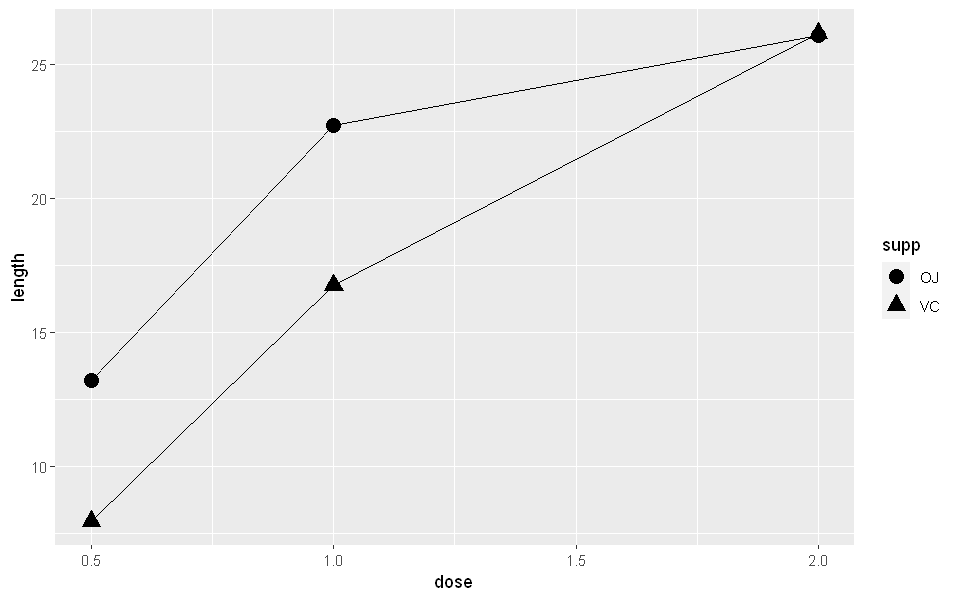

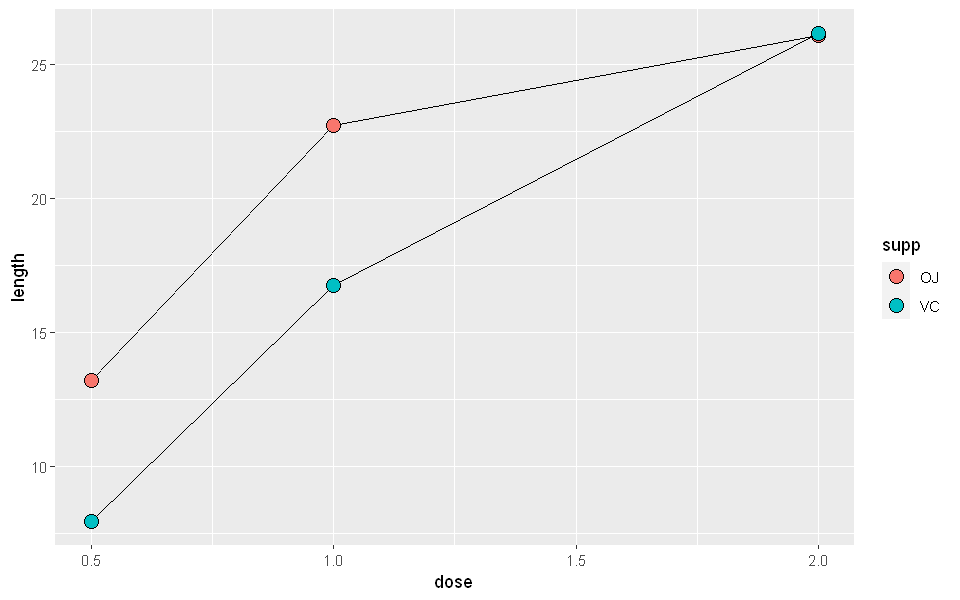

In [39]:
ggplot(tg, aes(x=dose, y=length, shape=supp)) + geom_line() + geom_point(size=4)
ggplot(tg, aes(x=dose, y=length, fill=supp)) + geom_line() + geom_point(size=4, shape=21)

**折线图的偏移**  
有时数据标记会相互重叠。我们需要令其彼此错开。这意味着要将它们的位置左移或右移。同时需要相应移动连接线以避免点线分离。

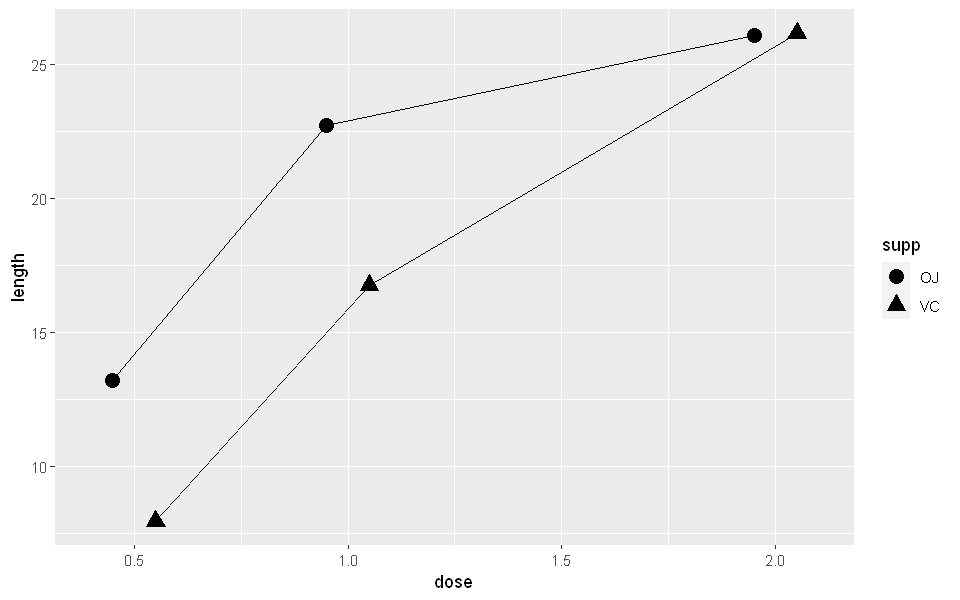

In [40]:
ggplot(tg, aes(x=dose, y=length, shape=supp)) +
 geom_line(position = position_dodge(0.2)) +
 geom_point(size=4, position = position_dodge(0.2))

## 修改线条样式

**方法**：  
通过设置线型(linetype)、线宽(size)和颜色(color)参数可以分别修改折线的线型、线宽和颜色。  
将这些参数的值传递给`geom_line()`函数可以设置折线图的对应属性。

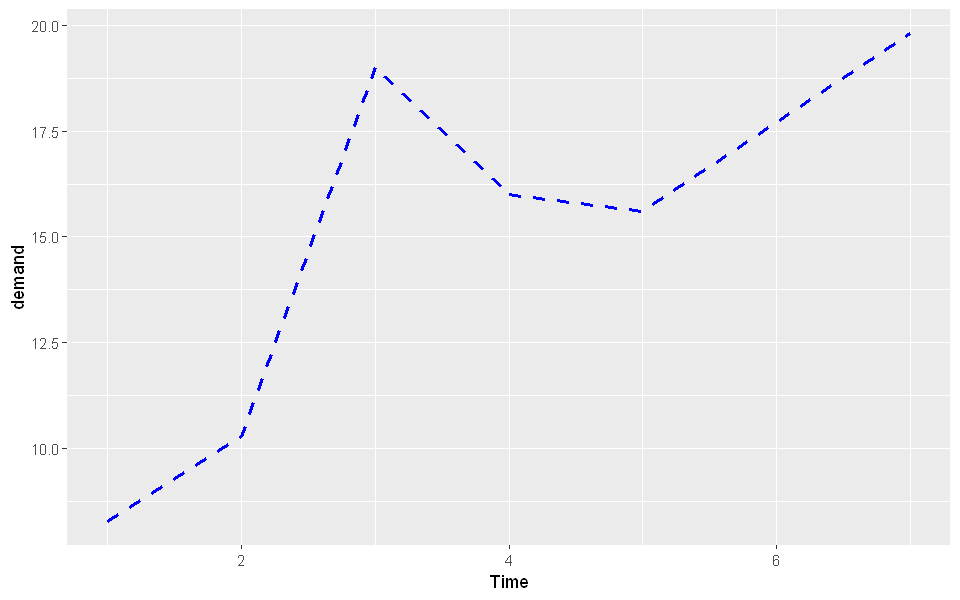

In [41]:
ggplot(BOD, aes(x=Time, y=demand)) + 
 geom_line(linetype="dashed", size=1, color="blue") 

对于多重折线图而言，设定图形属性会对图上的**所有**折线产生影响。而将<u>变量映射给图形属性</u>则会得到外观不同的折线。

默认颜色并不是很吸引眼球，所以，我们可能希望使用其他调色板为图形着色，可以调用`scale_color_brewer()`和`scale_color_manual`函数

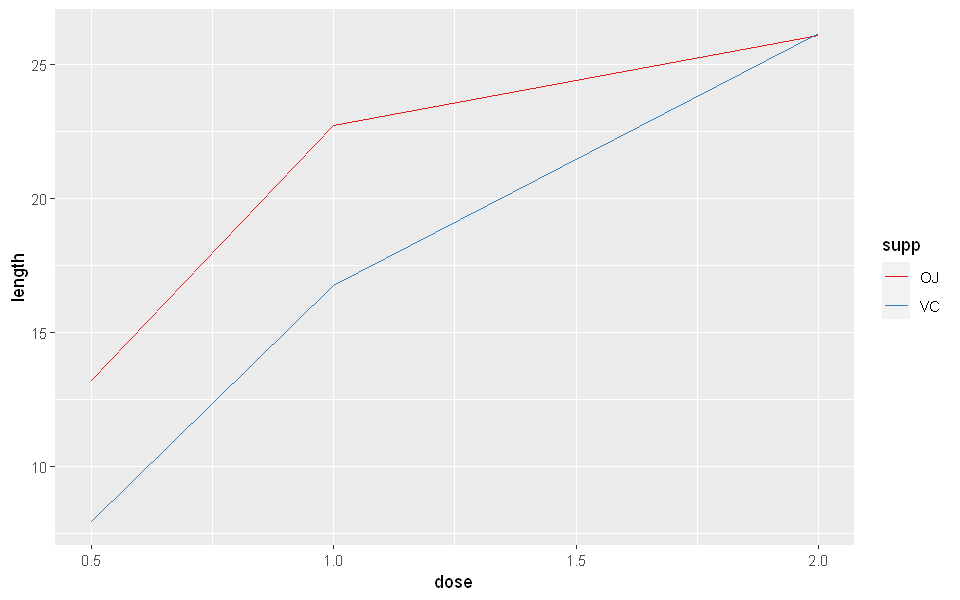

In [43]:
ggplot(tg, aes(x=dose, y=length, color=supp)) + 
 geom_line() +
 scale_color_brewer(palette = "Set1")

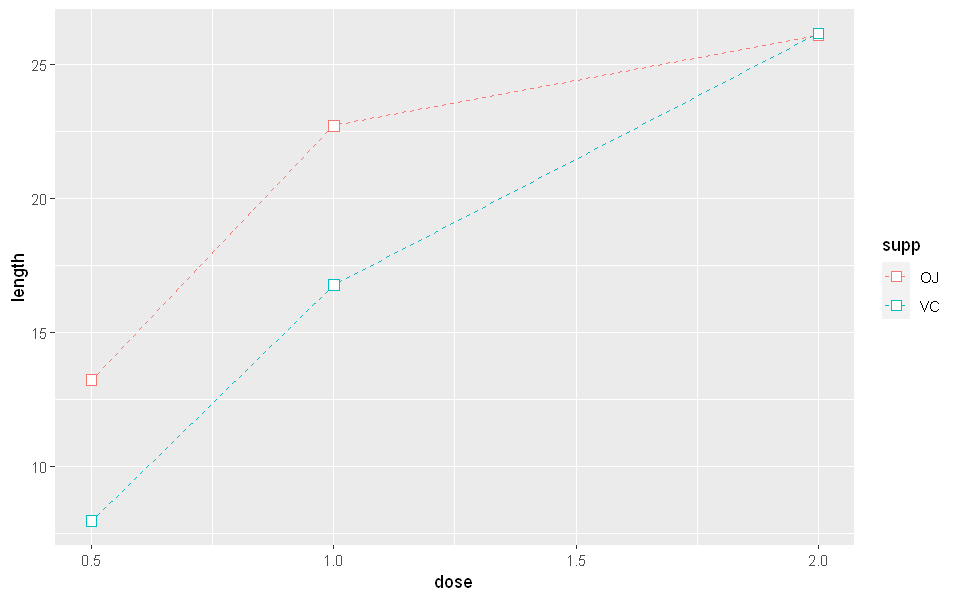

In [46]:
ggplot(tg, aes(x=dose, y=length, color=supp)) + 
 geom_line(linetype="dashed") + 
 geom_point(shape=22,size=3,fill="white")

## 修改数据标记样式

如果将数据标记和折线设定为不同的颜色，我们必须在折线绘制完毕后再行设定数据标记的颜色，此时，数据标记被绘制在更上面的层面，从而，避免被折线遮盖

In [47]:
tg <- ddply(ToothGrowth, c("supp", "dose"), summarise, length=mean(len))

In [49]:
tg

supp,dose,length
<fct>,<dbl>,<dbl>
OJ,0.5,13.23
OJ,1.0,22.70
OJ,2.0,26.06
VC,0.5,7.98
VC,1.0,16.77
VC,2.0,26.14


In [48]:
pd <- position_dodge(0.2)

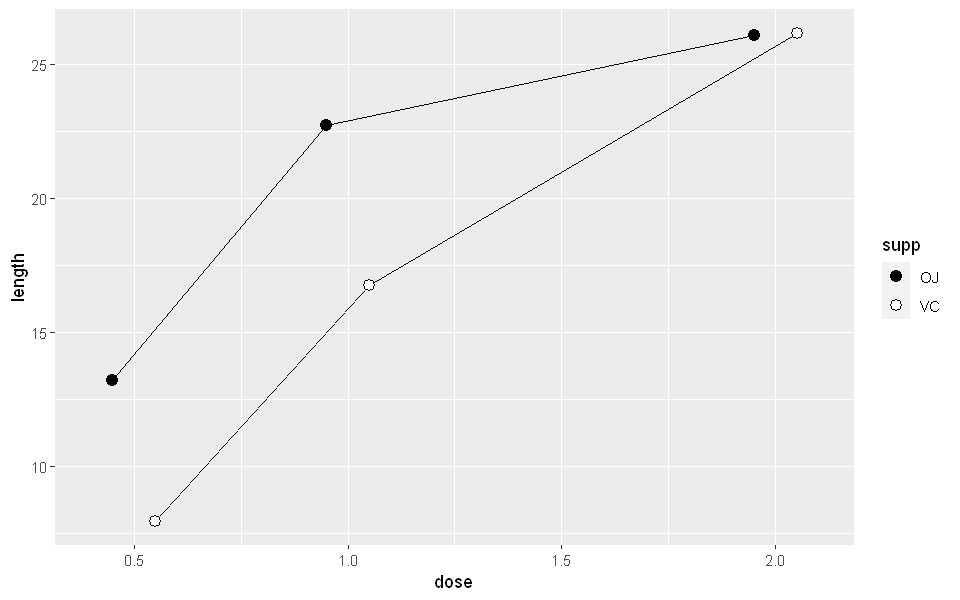

In [50]:
ggplot(tg, aes(x=dose, y=length, fill=supp)) + 
 geom_line(position = pd) + 
 geom_point(shape=21, size=3, position = pd) + 
 scale_fill_manual(values = c("black", "white"))

## 绘制面积图

运行`geom_area()`函数即可绘制面积图

In [53]:
# 将sunspot.year 数据集转化为数据框，便于本例使用
sunspotyear <- data.frame(
    Year = as.numeric(time(sunspot.year)),
    Sunspots = as.numeric(sunspot.year)
)

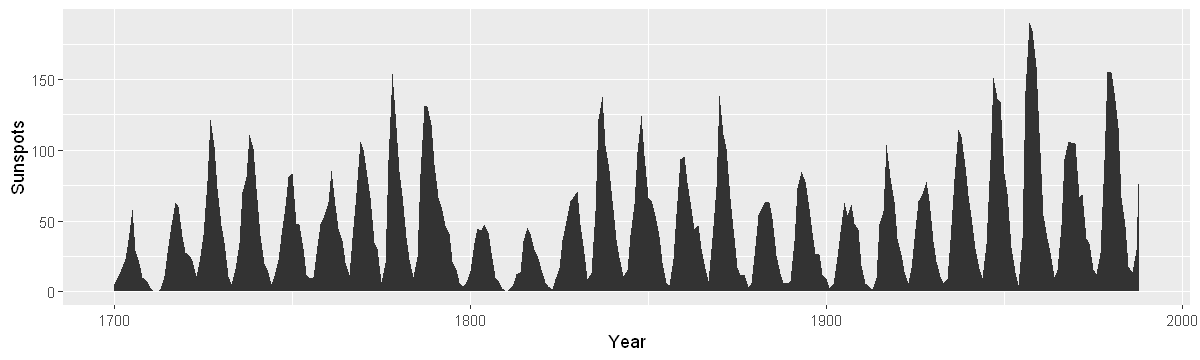

In [57]:
options(repr.plot.width=10, repr.plot.height=3)
ggplot(sunspotyear, aes(x=Year,y=Sunspots)) + geom_area()

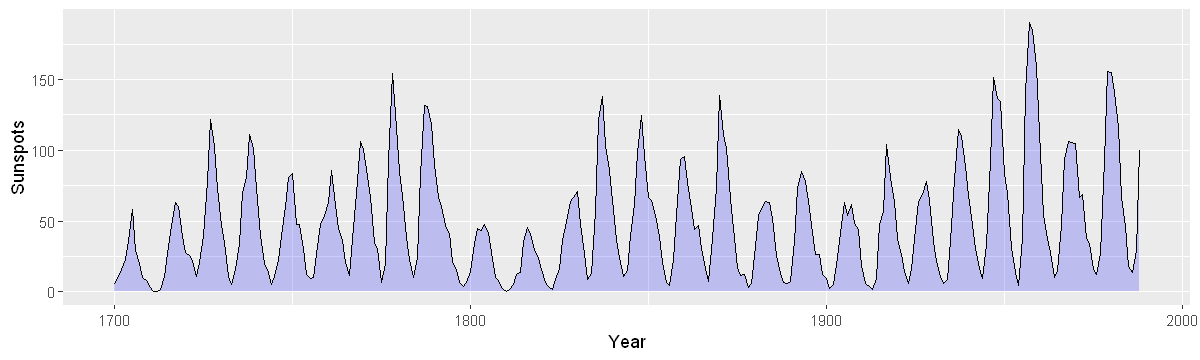

In [71]:
ggplot(sunspotyear, aes(x=Year,y=Sunspots)) + geom_area(fill='blue',alpha=.2) + geom_line()

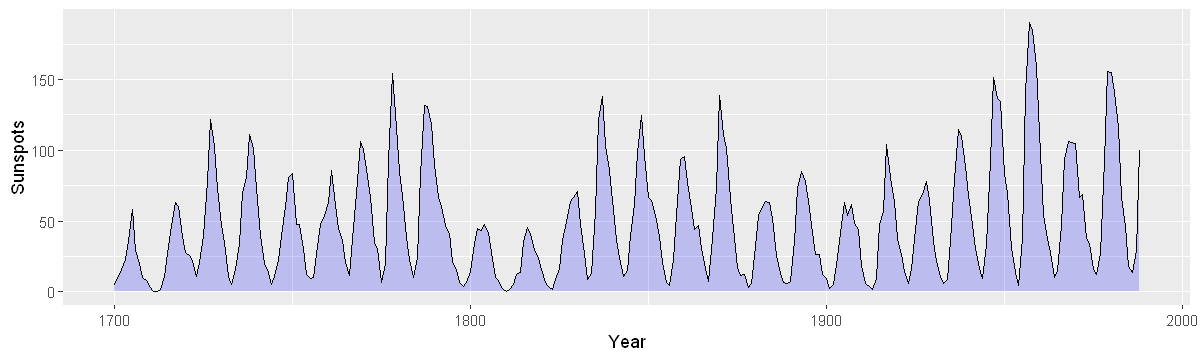

In [70]:
ggplot(sunspotyear, aes(x=Year,y=Sunspots)) + geom_area(fill='blue',color='black',alpha=.2)

## 绘制堆积面积图

**方法**：  
运行`geom_area()`函数，并映射到一个因子型变量给填充色(fill)即可

In [72]:
head(uspopage,2)

,Year,AgeGroup,Thousands
,<int>,<fct>,<int>
1,1900,<5,9181
2,1900,5-14,16966


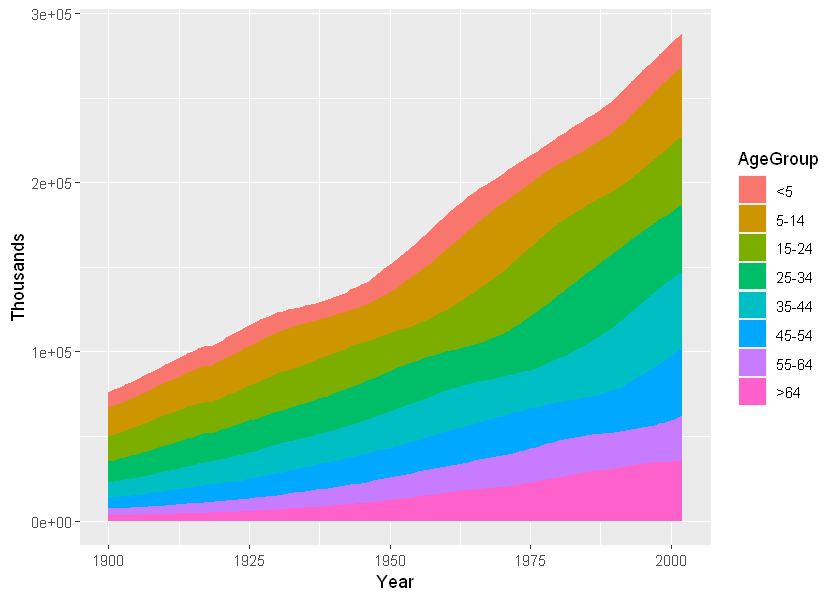

In [76]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(uspopage, aes(x=Year, y=Thousands, fill=AgeGroup)) + geom_area()

堆积面积图对应的基础数据通常为宽格式(wide format), 但ggplot2要求数据必须是长格式(long format), 在两种格式之间进行转换的内容可参见15.19节

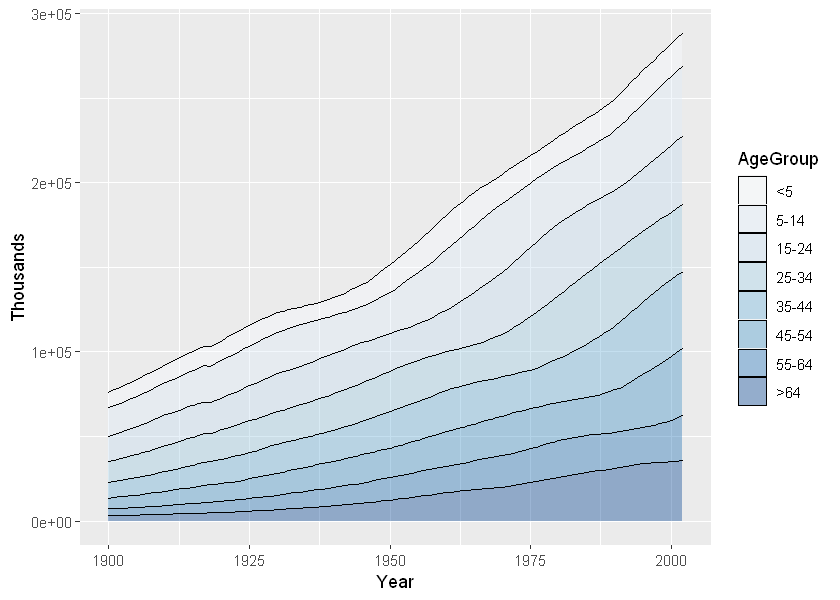

In [83]:
ggplot(uspopage,aes(x=Year, y=Thousands, fill=AgeGroup, order=desc(AgeGroup))) +
 geom_area(color="black", size=.2, alpha=.4) +
 scale_fill_brewer(palette = "Blues", breaks=levels(uspopage$AgeGroup))

因为堆积面积图中的各个部分是由多边形构成的，因此其具有边框线。这样的效果差强人意。为了对此进行修正，我们可以先绘制一个不带边框线的堆积面积图(将color设定为默认的*NA*值), 然后，在其顶部添加geom_line():

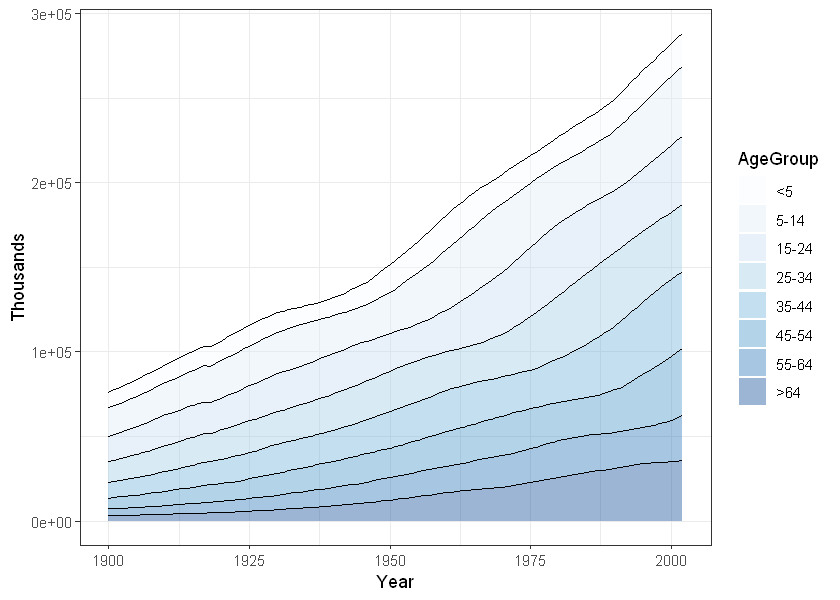

In [91]:
ggplot(uspopage,aes(x=Year, y=Thousands, fill=AgeGroup)) + # , order=desc(AgeGroup)
 geom_area(color=NA, alpha=.4) +
 theme_bw() + 
 scale_fill_brewer(palette = "Blues") + 
 geom_line(position = "stack", size=.2)

## 绘制百分比堆积面积图

In [94]:
head(uspopage,2)

,Year,AgeGroup,Thousands
,<int>,<fct>,<int>
1,1900,<5,9181
2,1900,5-14,16966


In [99]:
uspopage.prop <- ddply(uspopage, "Year", transform,percent=Thousands/cumsum(Thousands) * 100)

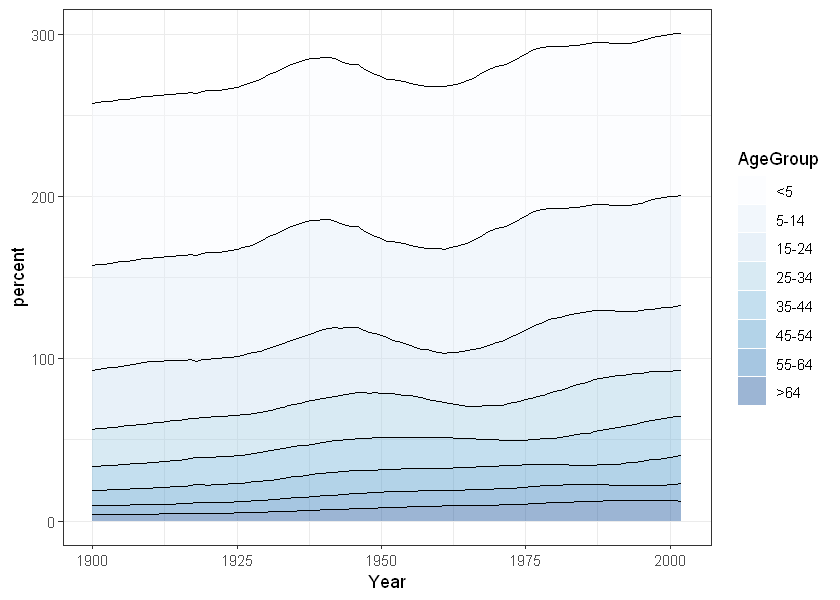

In [104]:
ggplot(uspopage.prop, aes(x=Year, y=percent, fill=AgeGroup)) +
 geom_area(color=NA, size=.2, alpha=.4) + 
 scale_fill_brewer(palette = "Blues") + 
 geom_line(position = "stack") + 
 theme_bw()

## 添加置信域

运行`geom_ribbon()`，然后分别映射一个变量给ylim和ymax

In [117]:
# 使用数据集climate
clim <- subset(climate, Source="Berkeley", Year<1850,
              select=c("Year","Anomaly10y", "Unc10y"))

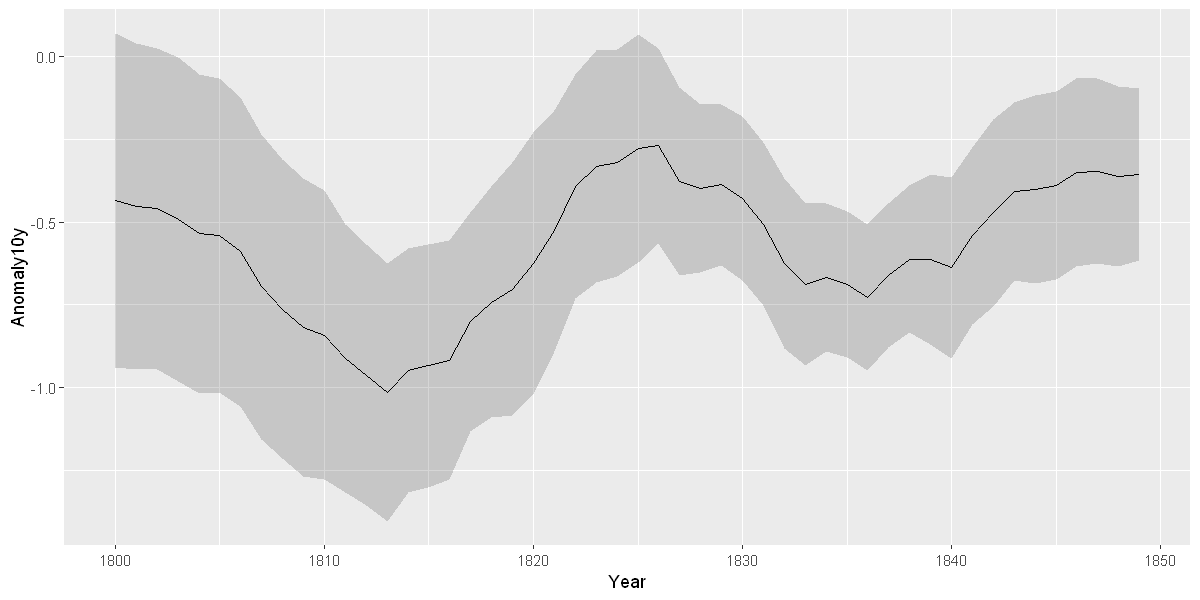

In [120]:
options(repr.plot.width = 10, repr.plot.height=5)
ggplot(clim, aes(x=Year, y=Anomaly10y)) + 
 geom_ribbon(aes(ymin=Anomaly10y-Unc10y, ymax=Anomaly10y+Unc10y), alpha=0.2) +
 geom_line()

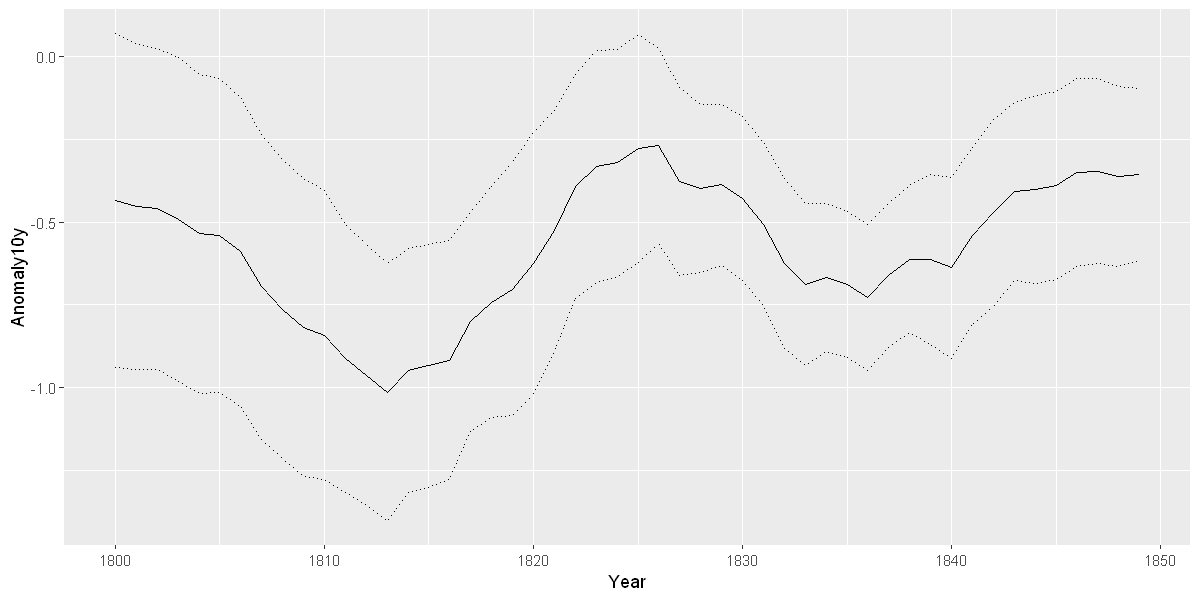

In [121]:
ggplot(clim, aes(x=Year, y=Anomaly10y)) + 
 geom_line(aes(y=Anomaly10y-Unc10y), linetype="dotted") + 
 geom_line(aes(y=Anomaly10y+Unc10y), linetype="dotted") + 
 geom_line()

除了表示置信区间外，阴影区域还可以用来表示其他内容，比如两个变量之间的差值等。  

# 第五章 散点图

散点图通常用来刻画两个连续型变量之间的关系。绘制散点图时，数据集中的每一个观测值都由散点图中的一个点来表示。  
通常，人们还会向散点图中添加一些直线，以用来表示基于某些统计模型的预测值。  
当散点图中的数据趋势难以用肉眼识别时，这些直线对于我们理解数据的特征很有帮助。

## 绘制基本散点图

In [4]:
head(heightweight[,c("ageYear", "heightIn")],2)

,ageYear,heightIn
,<dbl>,<dbl>
1,11.92,56.3
2,12.92,62.3


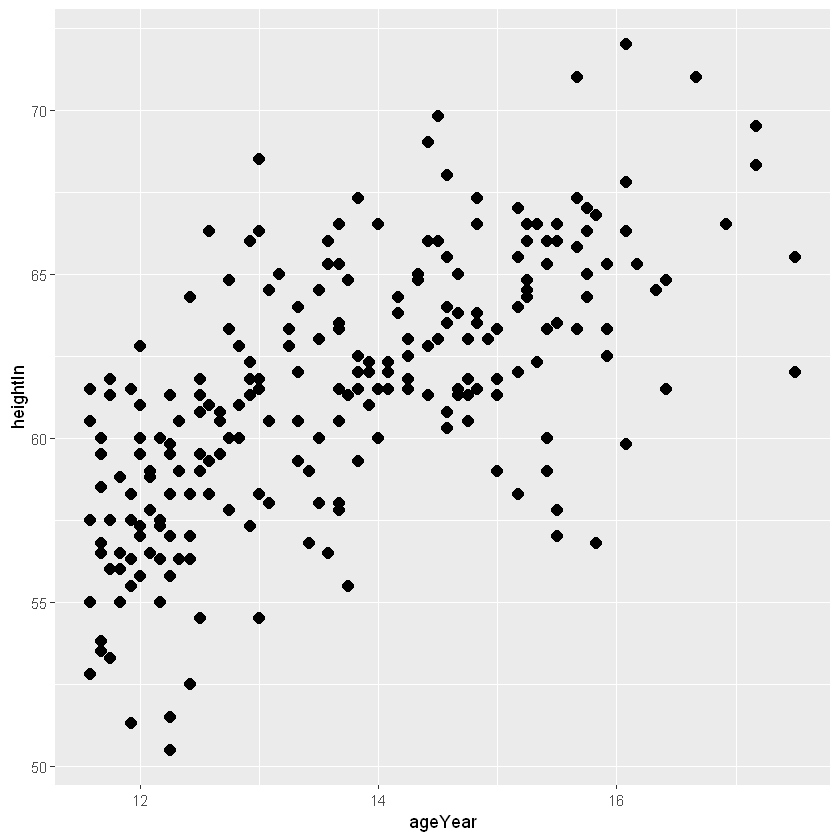

In [11]:
ggplot(heightweight, aes(x=ageYear, y=heightIn)) + geom_point(shape=16,size=3)

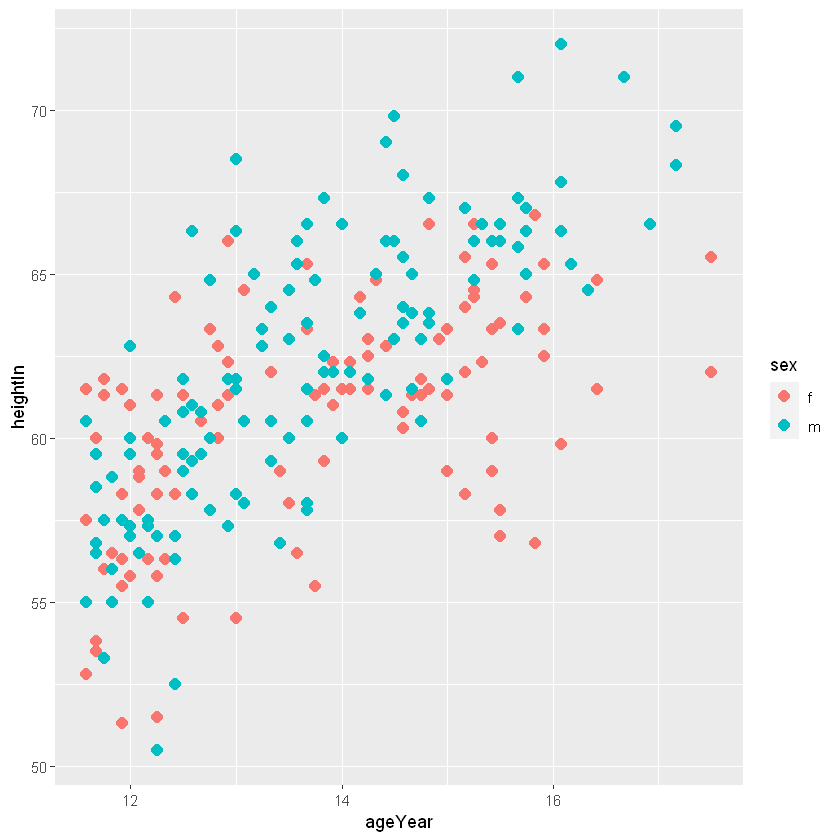

In [12]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + geom_point(shape=16,size=3)

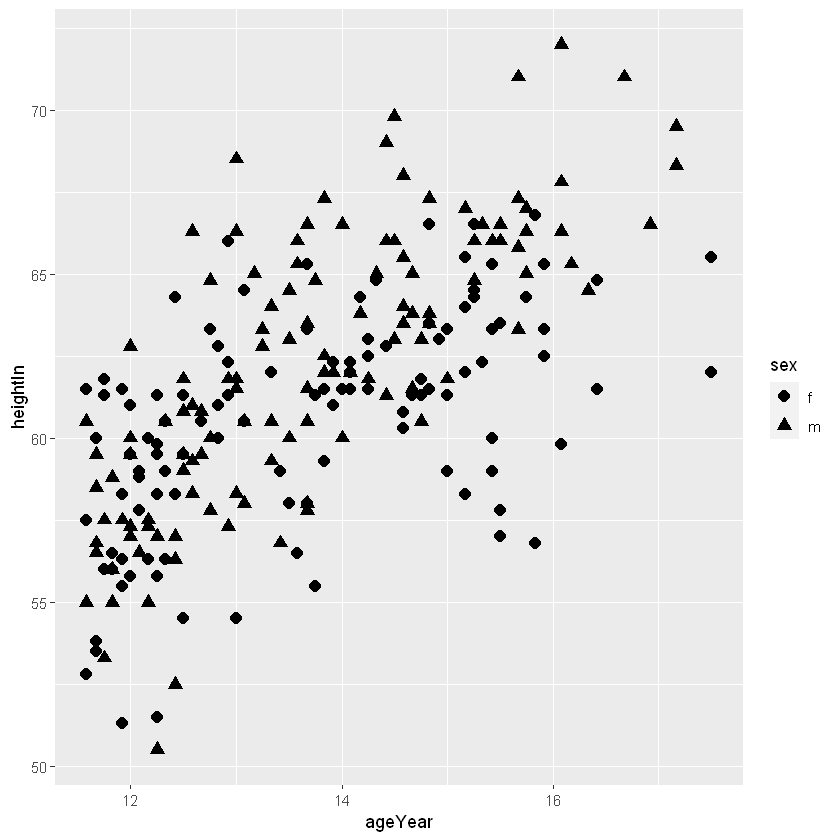

In [14]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, shape=sex)) + geom_point(size=3)

散点图默认的点形和颜色可能不是很吸引人，通过调用`scale_shape_manual()`函数可以使用其他点形；调用`scale_color_brewer()`或者`scale_color_manual()`函数可以使用其他调色板

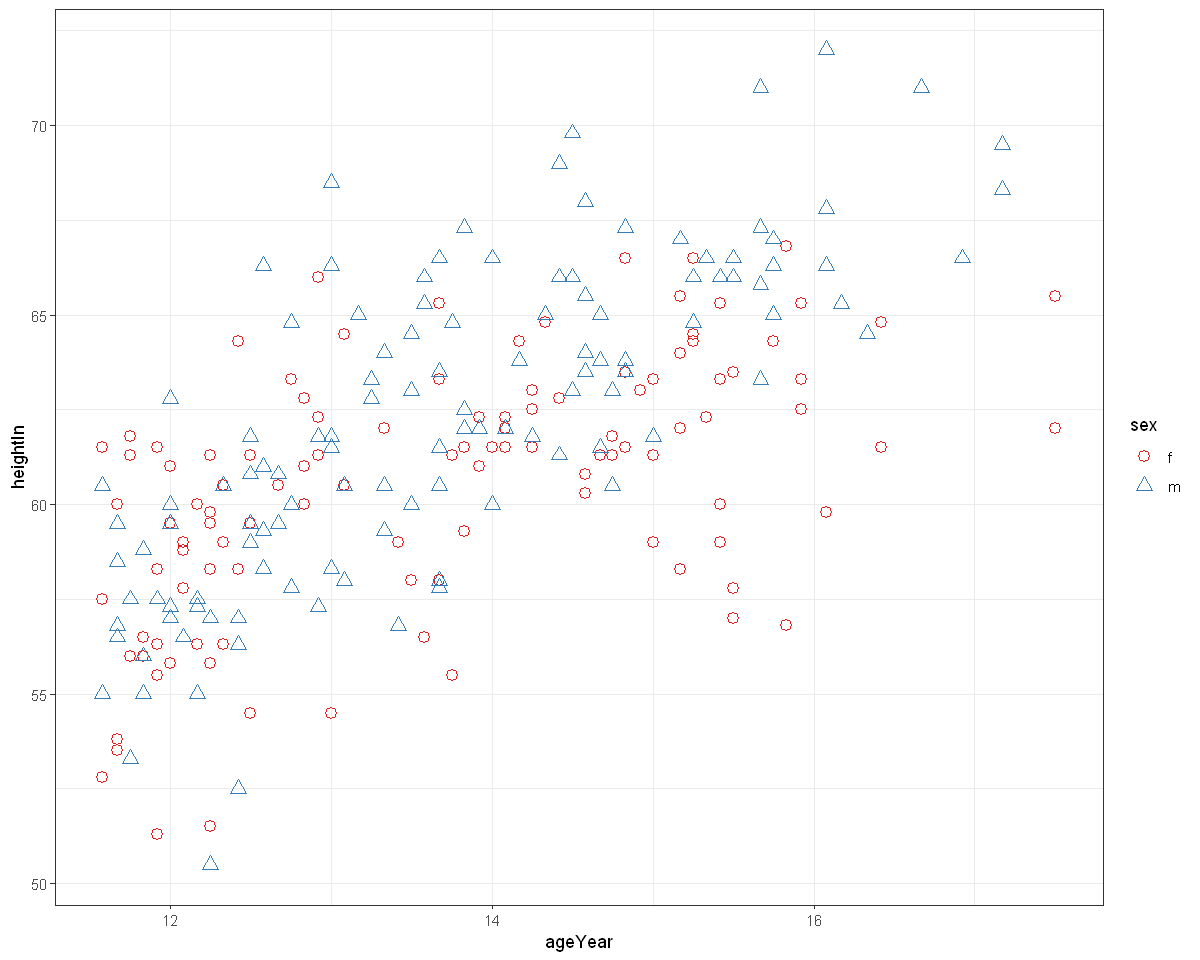

In [69]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, shape=sex, color=sex)) +
 geom_point(size=3) + 
 scale_shape_manual(values = c(1,2)) +  # 修改点形
 scale_color_brewer(palette = "Set1") + 
 theme_bw()

## 使用不同于默认设置的点形

通过指定`geom_point()`函数中的点形(shape)参数可以设定散点图中所有数据点的点形

如果已经将分组变量映射给shape，则可以调用`scale_shape_manual()`函数修改点形

![R绘图系统可以调用的点形](https://plobimage.scicdn.com/wp-content/uploads/2011/04/1.png)

点形 1-20 的点的颜色包括实心区域的颜色都可以由color参数控制。对于点形 21-25 而言，边框线和实心区域的颜色则分别由color和fill参数控制。

我们可以用点形和填充色（空心或实心）属性分别表示两个不同的变量

In [61]:
hw <- heightweight
head(hw,2)

,sex,ageYear,ageMonth,heightIn,weightLb
,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,f,11.92,143,56.3,85
2,f,12.92,155,62.3,105


In [65]:
# 在数据集中增加一列标记体重是否超过100磅
hw$weightGroup <- cut(hw$weightLb, breaks = c(-Inf, 100, Inf),   
                      labels = c("<100", ">100"))

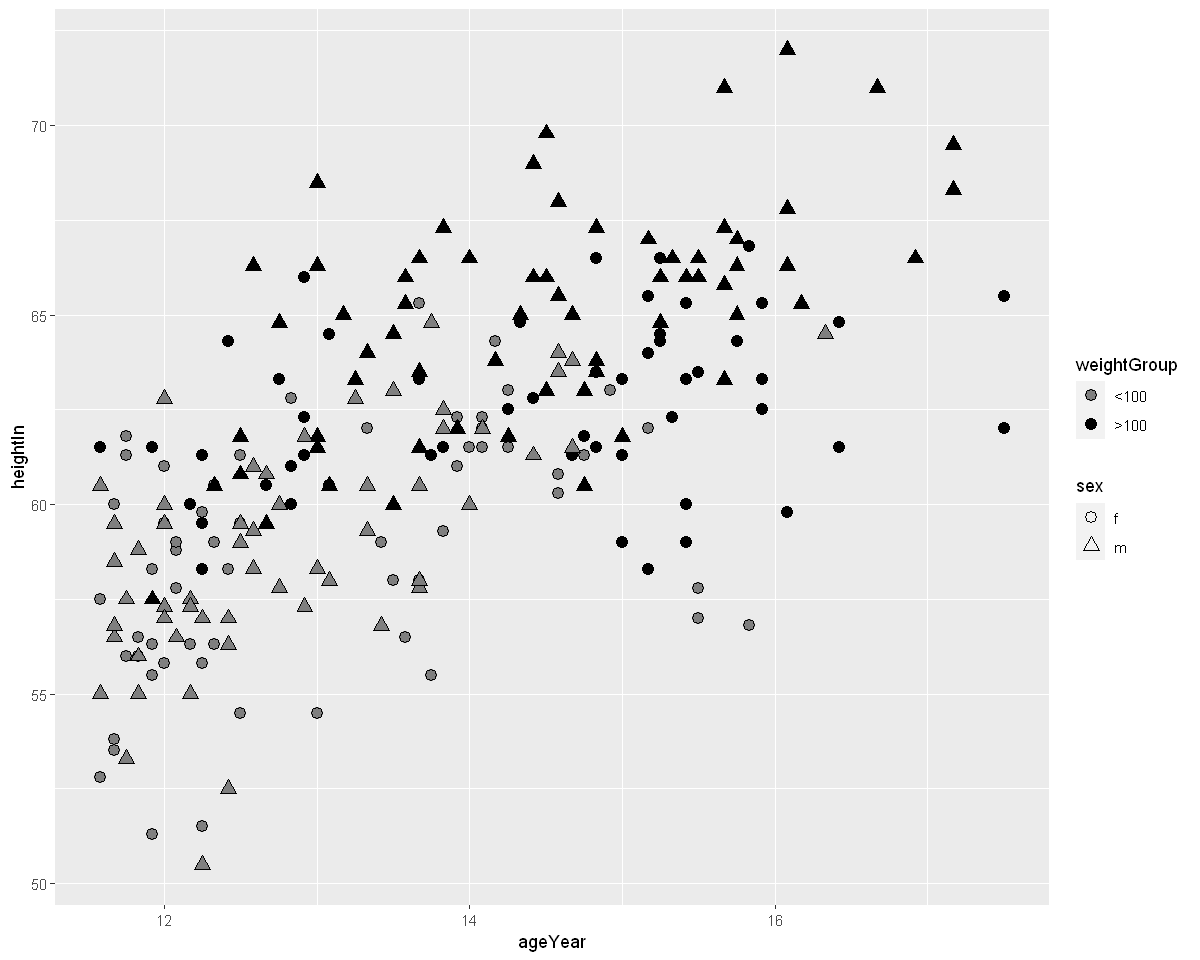

In [68]:
ggplot(hw, aes(x=ageYear, y=heightIn, shape=sex, fill=weightGroup)) + 
 geom_point(size=3) + 
 scale_shape_manual(values = c(21,24)) + 
 scale_fill_manual(values = c(NA, "black"),
                  guide=guide_legend(override.aes = list(shape=21)))

## 将连续型变量映射到点的颜色或大小属性上

**方法**：  
将连续型变量映射到size或color属性上即可。

In [73]:
head(heightweight[,c("sex","ageYear","heightIn","weightLb")],2)

,sex,ageYear,heightIn,weightLb
,<fct>,<dbl>,<dbl>,<dbl>
1,f,11.92,56.3,85
2,f,12.92,62.3,105


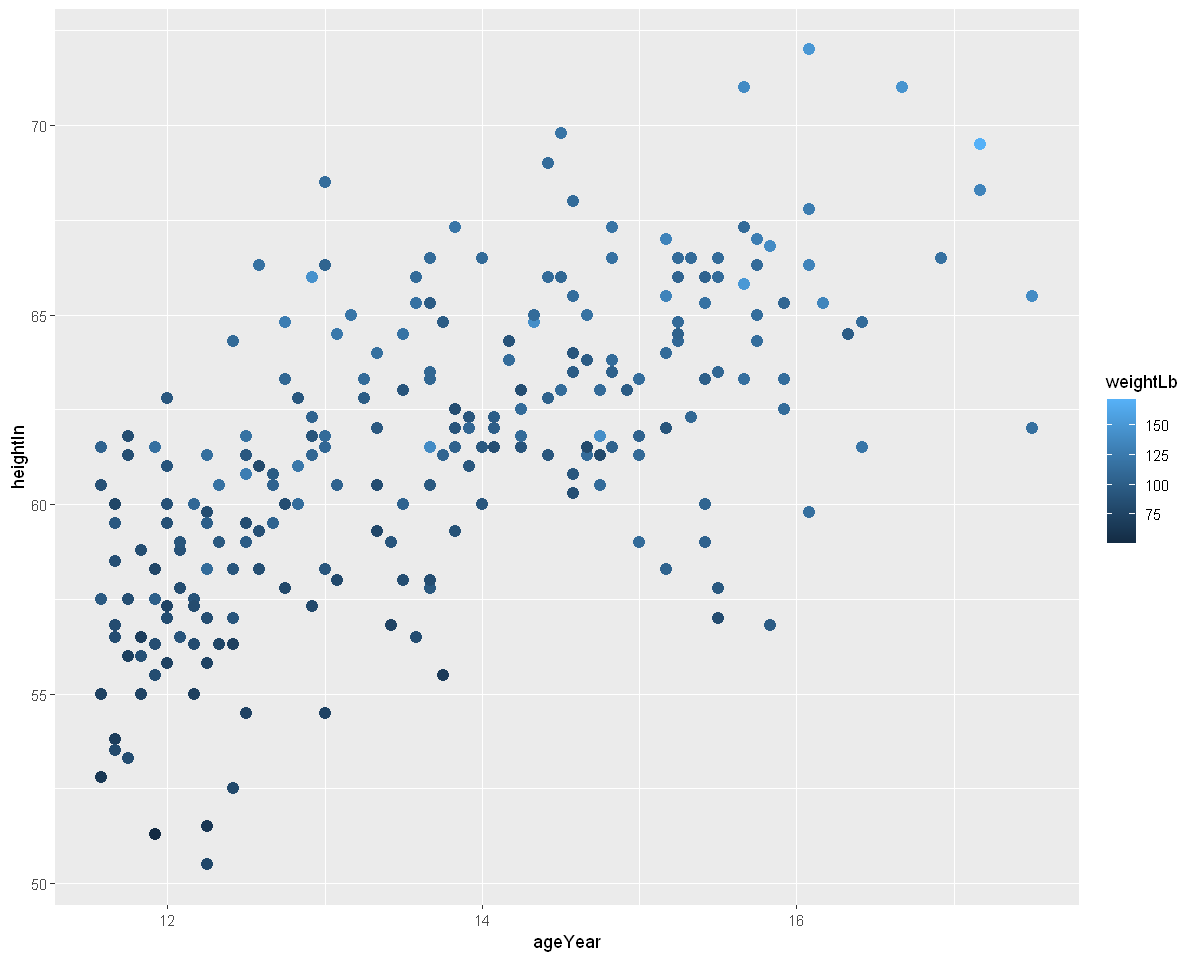

In [79]:
options(expr.plot.width=5, expr.plot.height=5)
ggplot(heightweight, aes(x=ageYear, y=heightIn, color=weightLb)) + 
 geom_point(size=3)

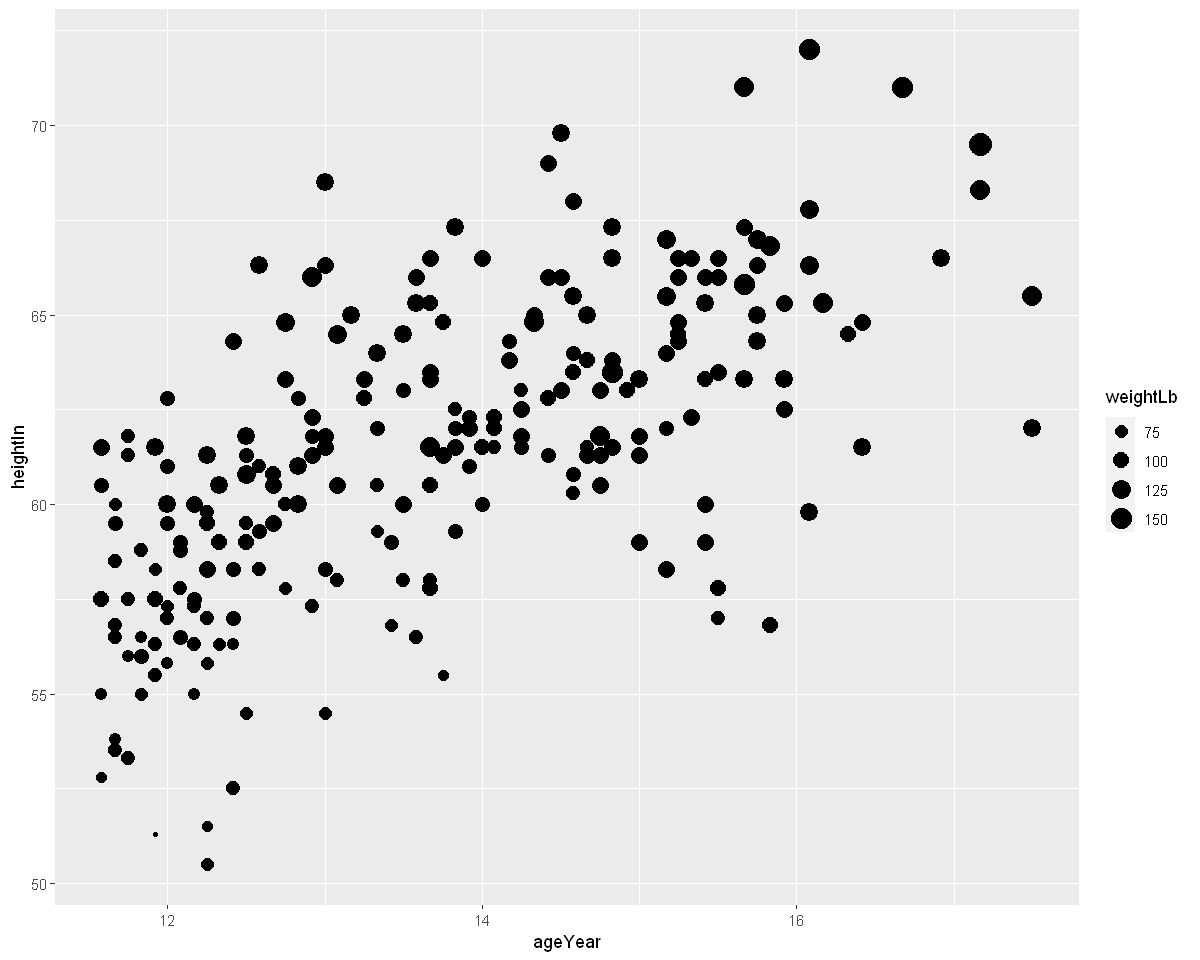

In [80]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, size=weightLb)) + 
 geom_point()

人类对于感知空间位置的微笑变化很擅长，因此，我们可以以较高的精度解释被映射到x轴和y轴上的变量。  
但我们对图形的颜色和大小变化不太敏锐。所以，我们只能以较低的精度对映射到这些属性上的变量进行解释。  
因此，只有当一个变量不需要高精度的解释时，它才适合被映射给图形的大小和颜色属性。

对于颜色，实际上有fill和color两个属性使用。当数据点颜色较浅时，带边框线的点形就显得非常有用，以将数据点和背景色区分开。

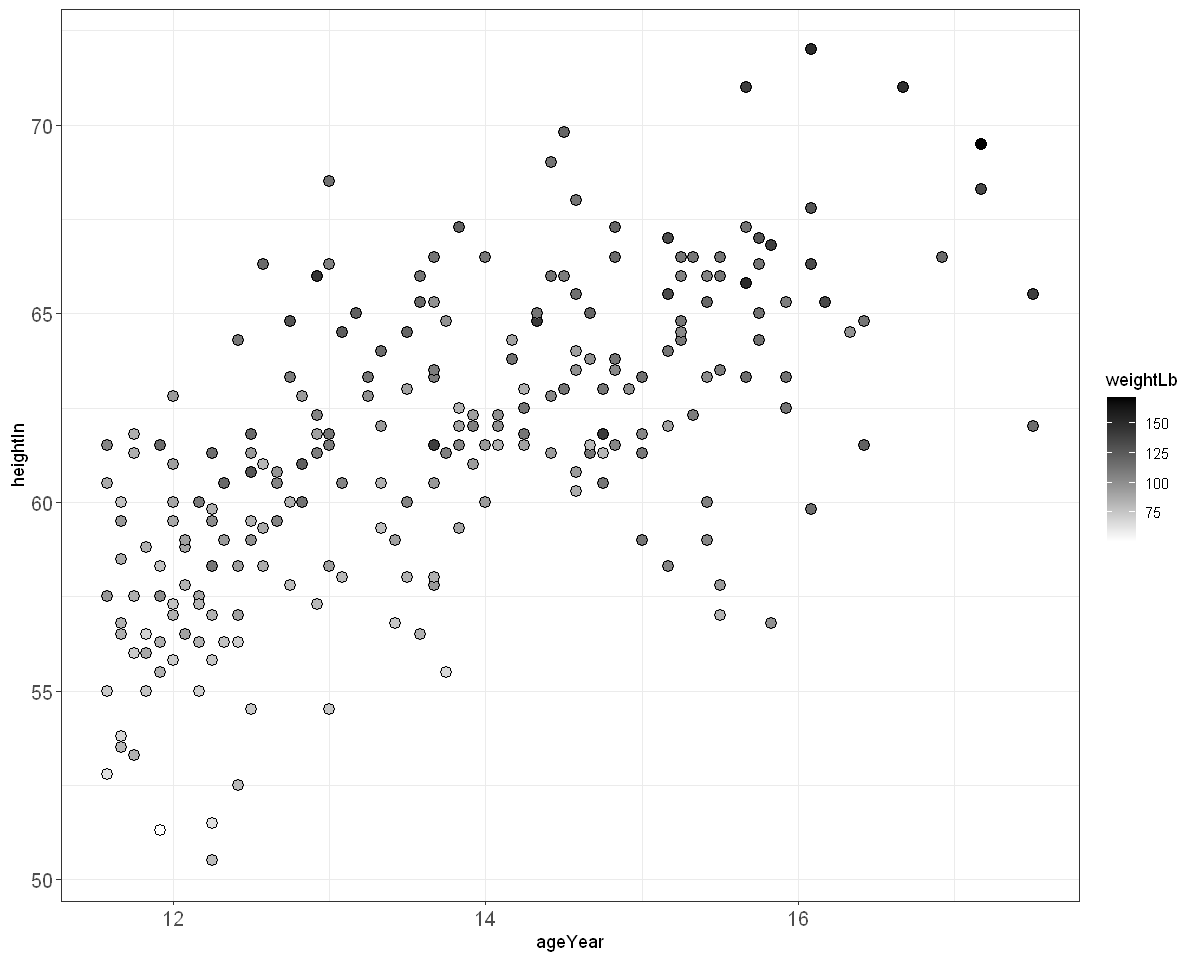

In [104]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, fill=weightLb)) + 
 geom_point(size=3,shape=21) + 
 scale_fill_gradient(low = "white", high = "black") + 
 theme_bw() + 
 theme(axis.text.y = element_text(size=12),
       axis.text.x = element_text(size=12),
       axis.line.y = element_blank(),
       axis.line.x = element_blank())

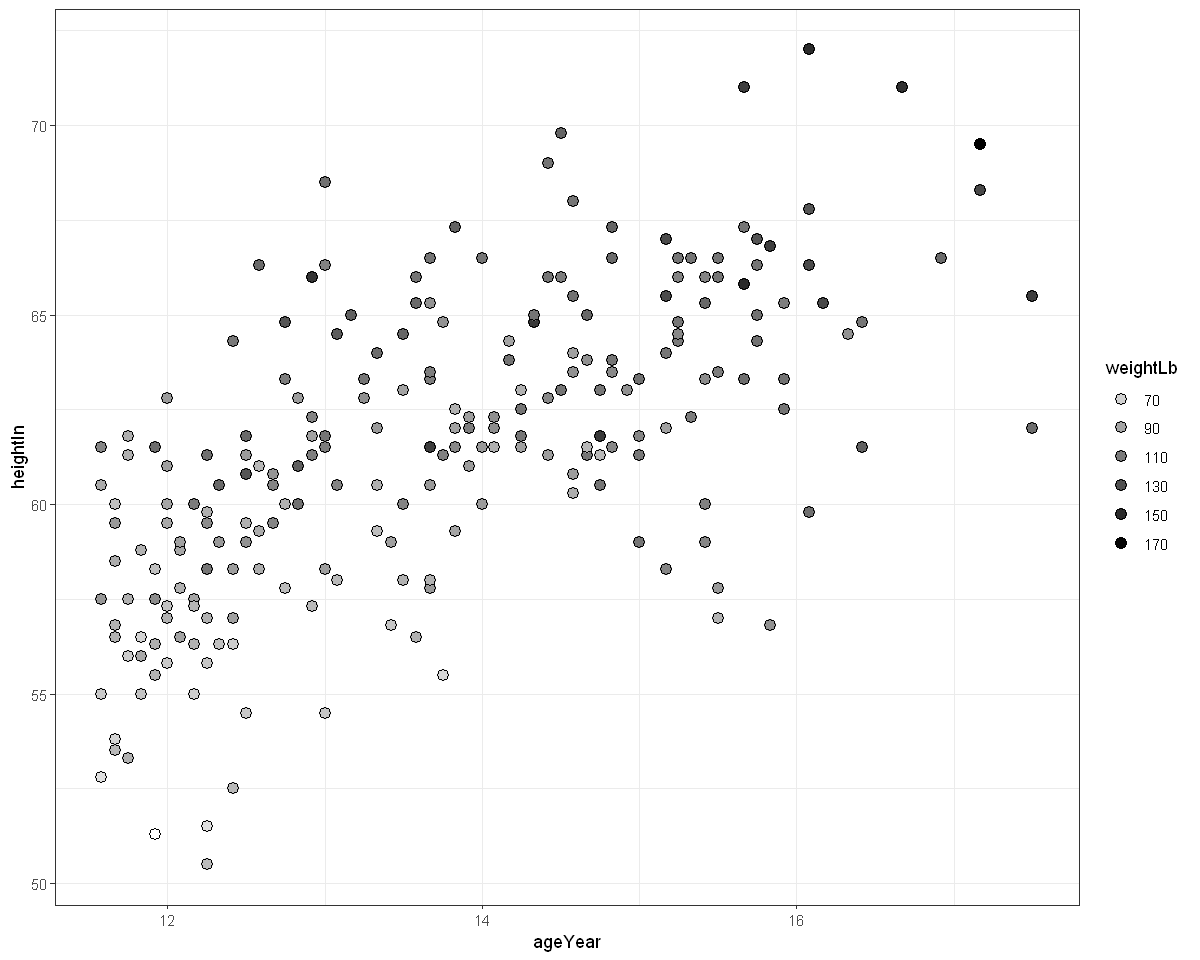

In [108]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, fill=weightLb)) + 
 geom_point(size=3,shape=21) + 
 scale_fill_gradient(low = "white", high = "black", breaks = seq(70,170,by = 20), guide = guide_legend()) +
 theme_bw()

In [109]:
head(heightweight,2)

,sex,ageYear,ageMonth,heightIn,weightLb
,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,f,11.92,143,56.3,85
2,f,12.92,155,62.3,105


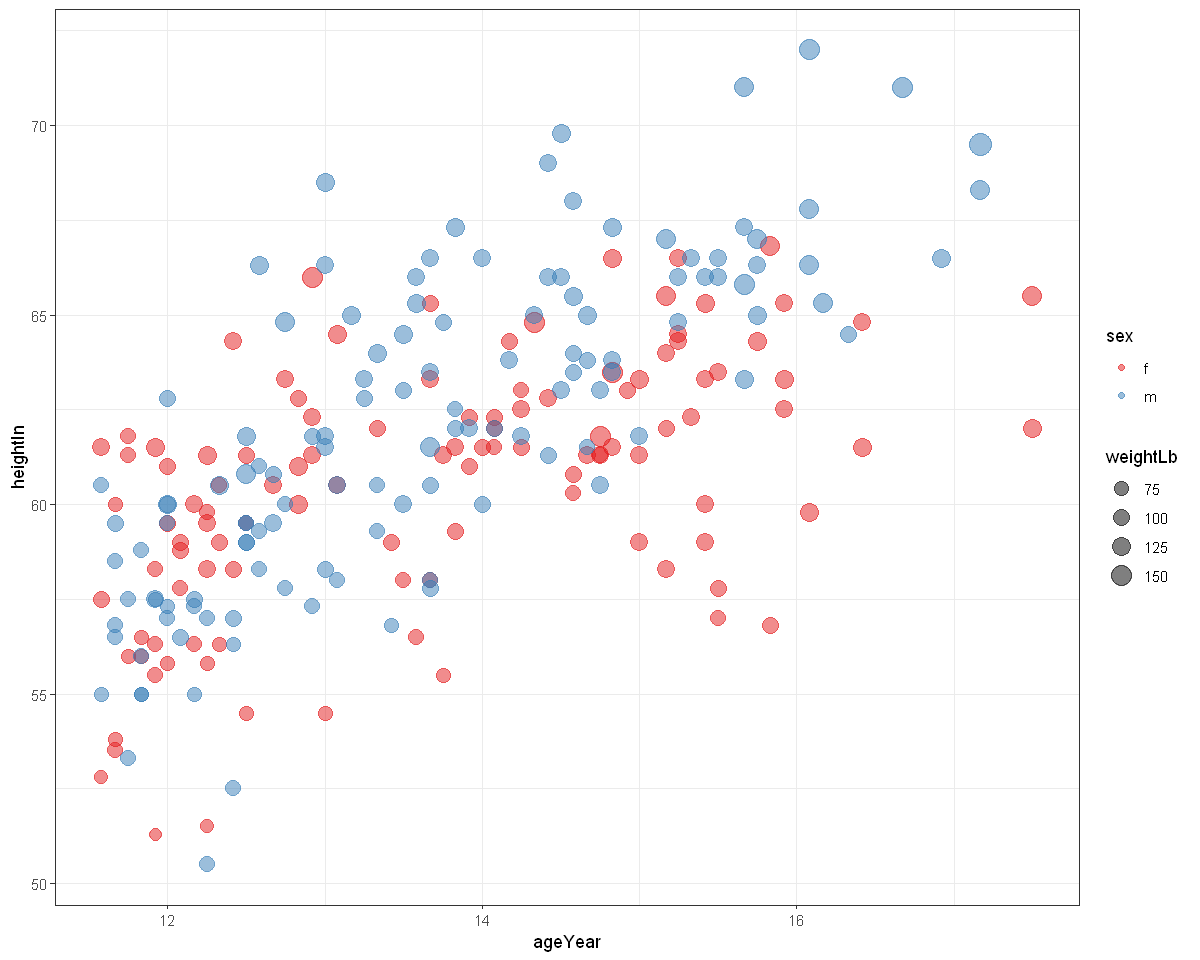

In [118]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, size=weightLb, color=sex)) + 
 theme_bw() +
 geom_point(alpha = .5) + 
 scale_size_area() + 
 scale_color_brewer(palette = "Set1")

## 处理图形重叠

如果图形的重叠程度较低，可以通过使用较小的数据点或者使用不会遮盖其他数据点的点形（如空心圆）来避免数据重叠。

如果图形的重叠程度较高，可：
- 使用半透明的点
- 将数据分箱，并用矩形表示（适用于量化分析）
- 将数据分箱，并用六边形表示
- 使用箱线图

示例：  
下图包含54000个数据点，数据点重叠严重，很难看清楚图中点的密度

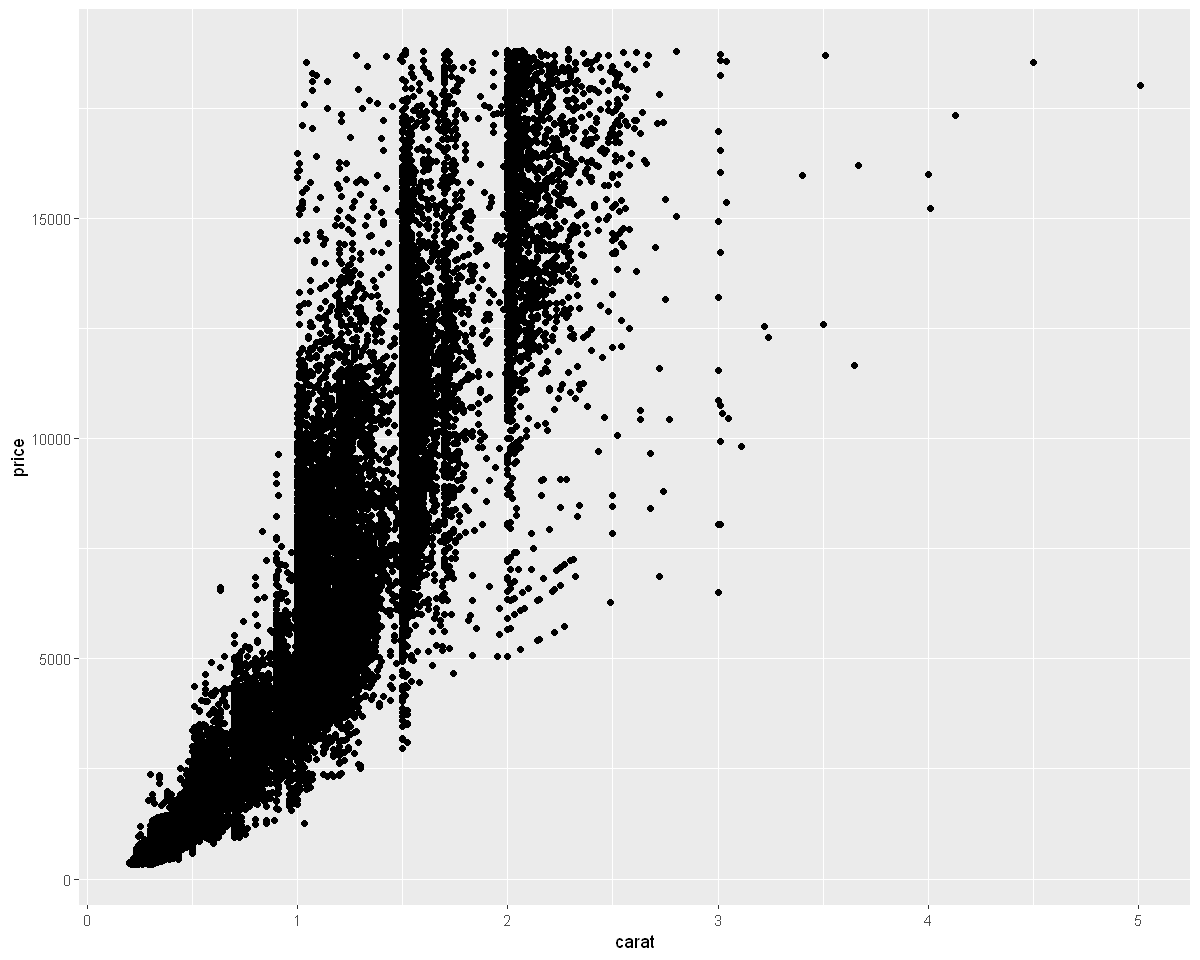

In [119]:
p <- ggplot(diamonds, aes(x=carat, y=price))
p + geom_point()

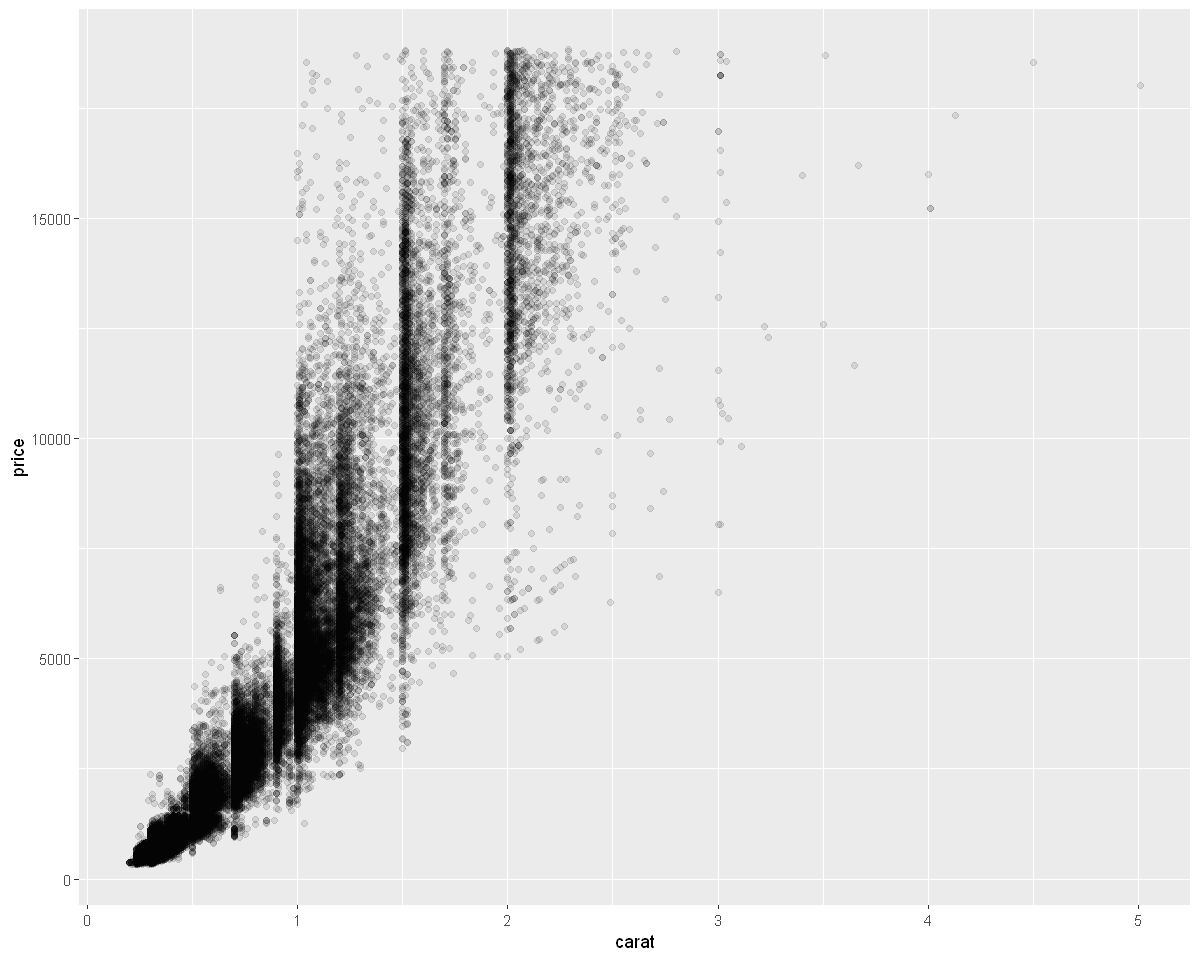

In [123]:
p + geom_point(alpha=.1)

另外一个解决方案就是将数据点分箱(bin)并以矩阵来表示，同时将数据点的密度映射为矩形的填充色。调用`stat_bin2d()`函数对数据进行分箱

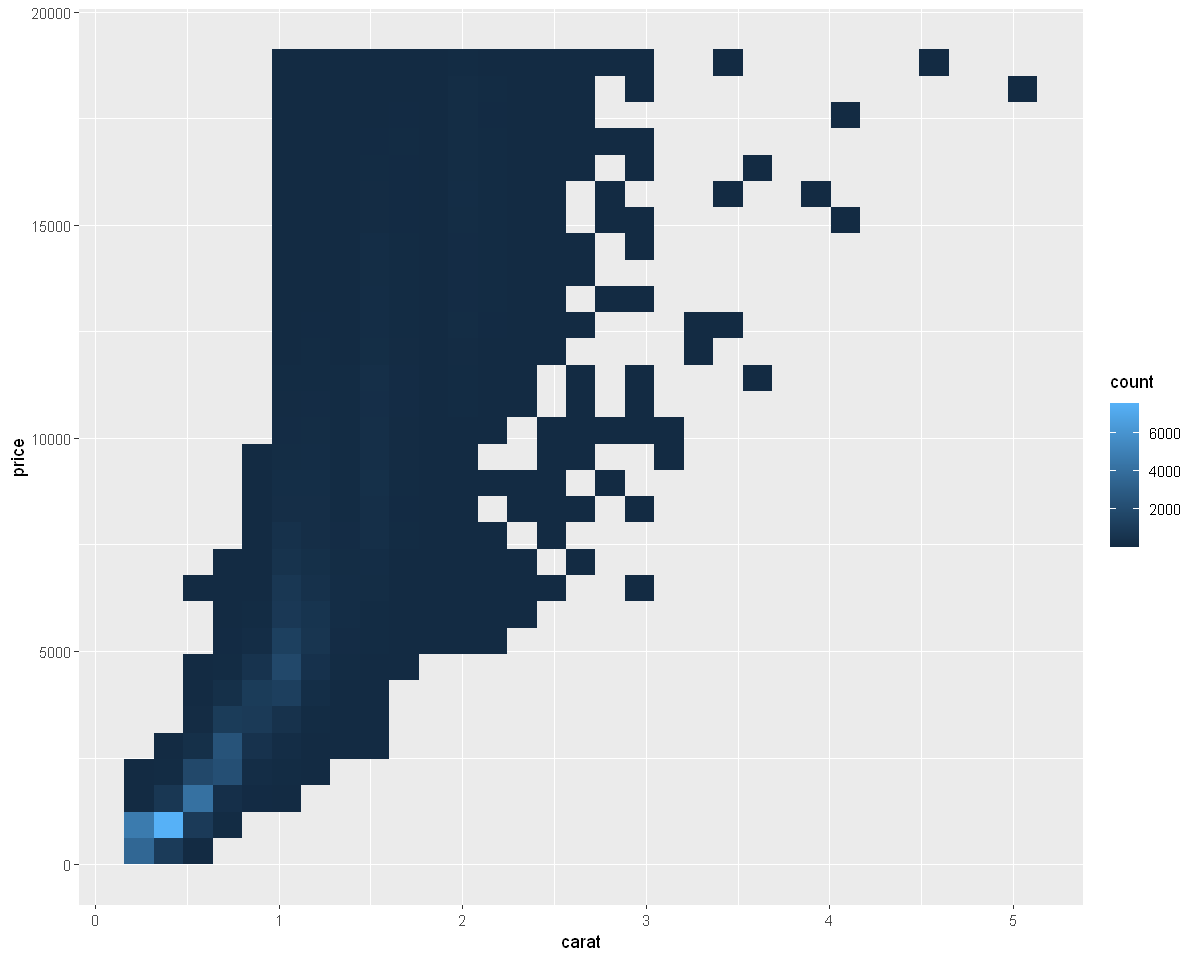

In [125]:
p +stat_bin2d() # 默认横纵30个分箱

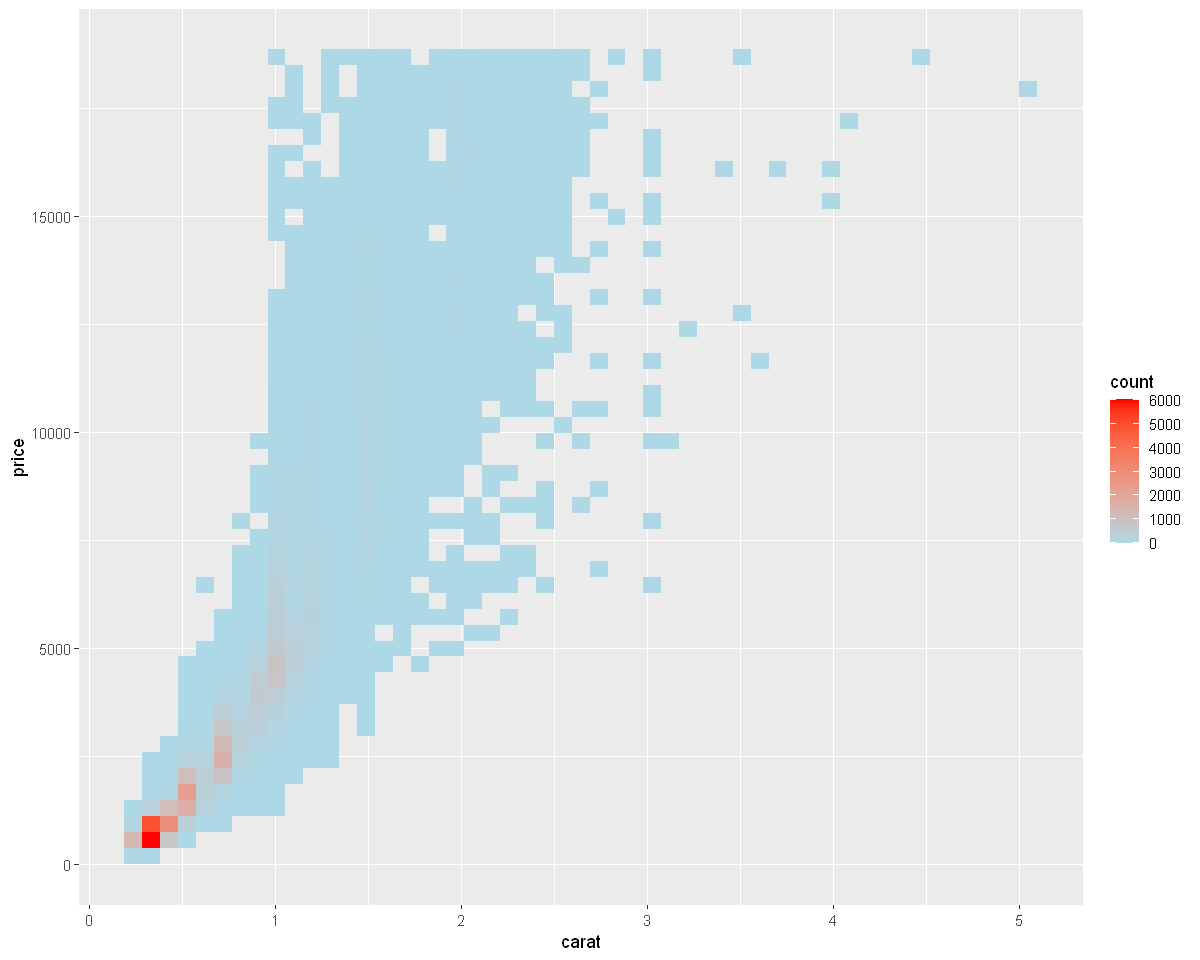

In [128]:
p +stat_bin2d(bins = 50) + 
 scale_fill_gradient(low = "lightblue", high = "red", limits=c(0,6000))

如果不想数据分箱并以矩形表示的话，可以调用`stat_binhex()`函数使用六边形代替。该函数的工作机制与`stat_bin2d()`类似。

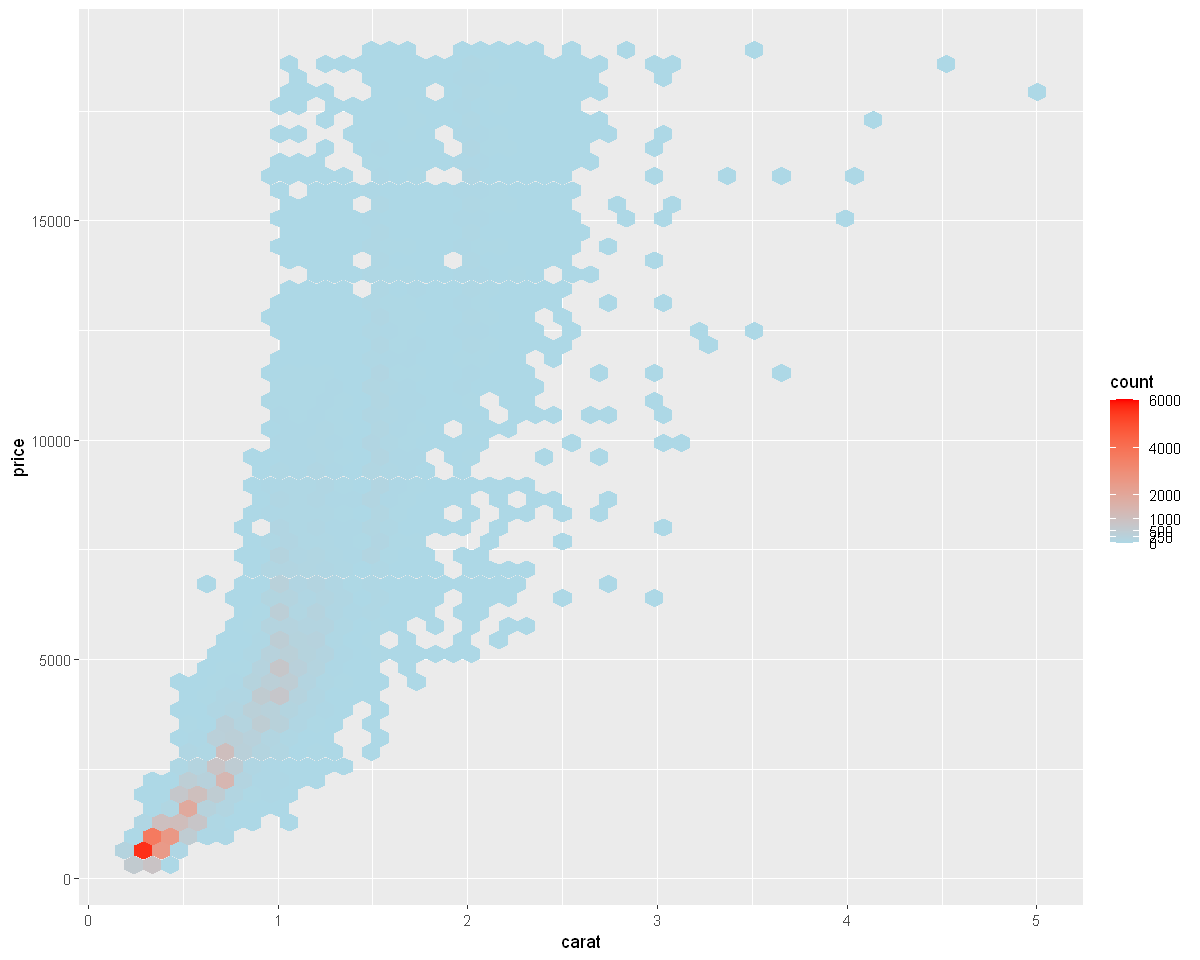

In [136]:
p + stat_binhex(bins = 50) + 
 scale_fill_gradient(low = "lightblue", high = "red",
                     breaks = c(0,250,500,1000,2000,4000,6000),
                     limits=c(0,6000))

当散点图的其中一个数据轴或者两个数据轴都对应于离散型数据时，也会出现图形重叠的情况，这时候，可以调用`position_jitter()`函数给数据点增加随机扰动。  
默认情况，该函数在每个方向上添加的扰动值为数据点最小精度的40%，不过也可以通过width和height参数对该值进行调整。

In [3]:
head(ChickWeight,2)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1


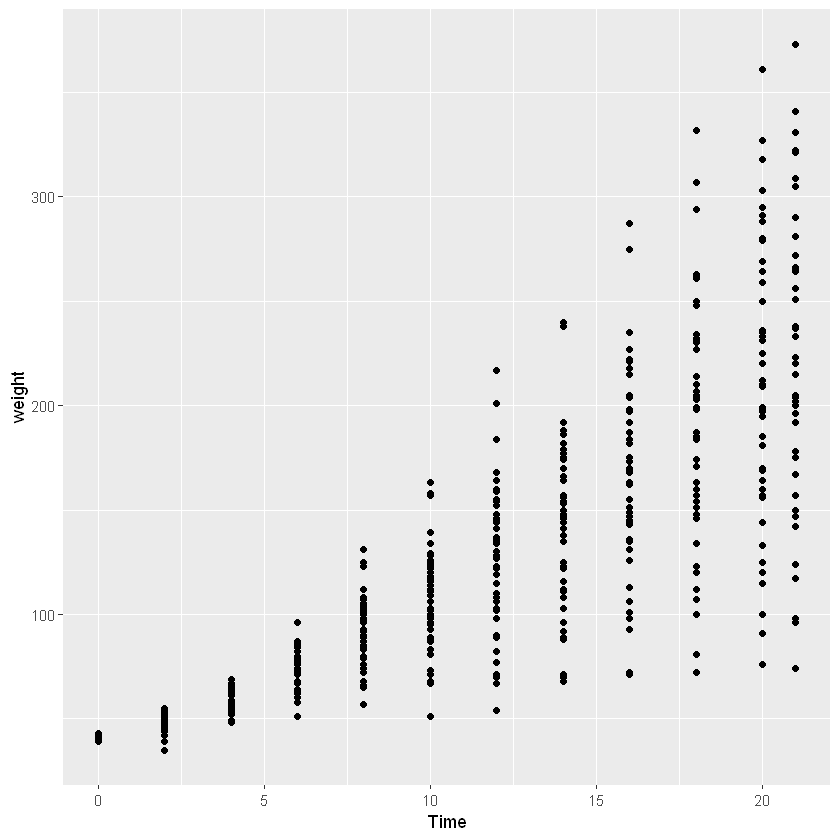

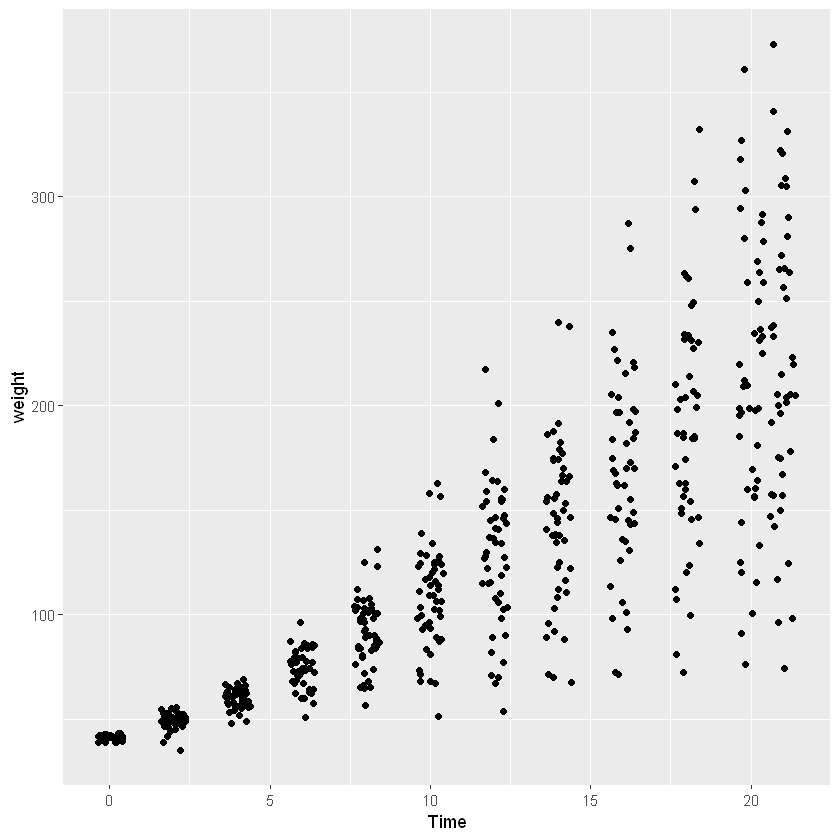

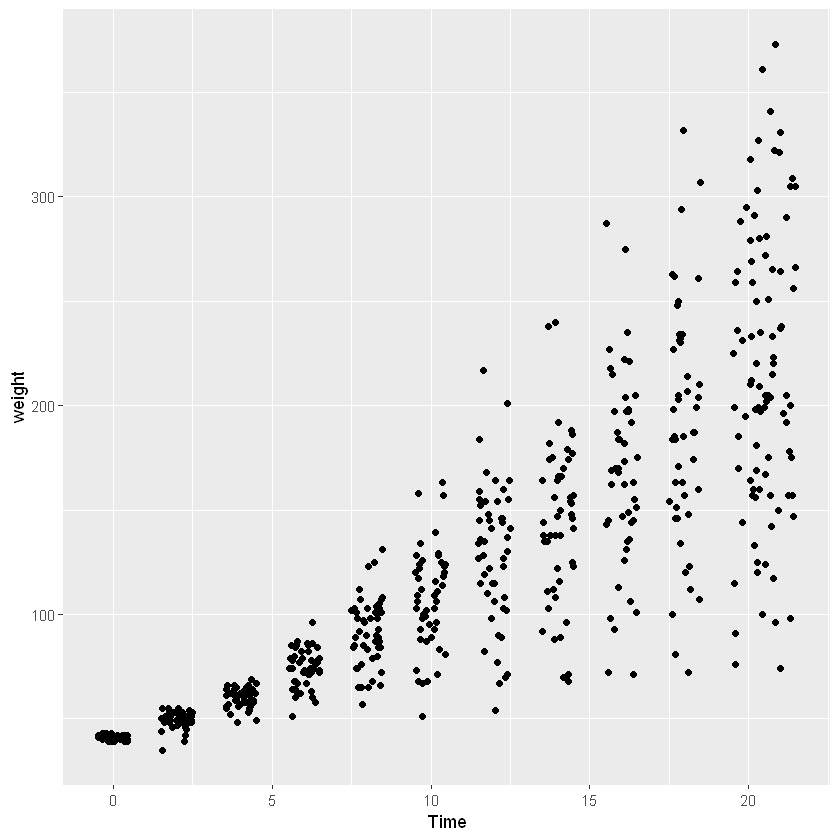

In [13]:
sp1 <- ggplot(ChickWeight, aes(x=Time, y=weight))

sp1 + geom_point()

sp1 + geom_point(position = position_jitter())

sp1 + geom_point(position = position_jitter(width=.5, height=0))

**箱线图**  
对于ChickWeight 数据集，其对应的x轴本质上是离散的，但其被存储为数值型向量，因此，ggplot()函数不知如何对该数据集分组(如下图一)。  
调用aes(group=...)可以告诉ggplot如何对数据进行分组。下面，按Time变量的取值对数据进行分组：

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"


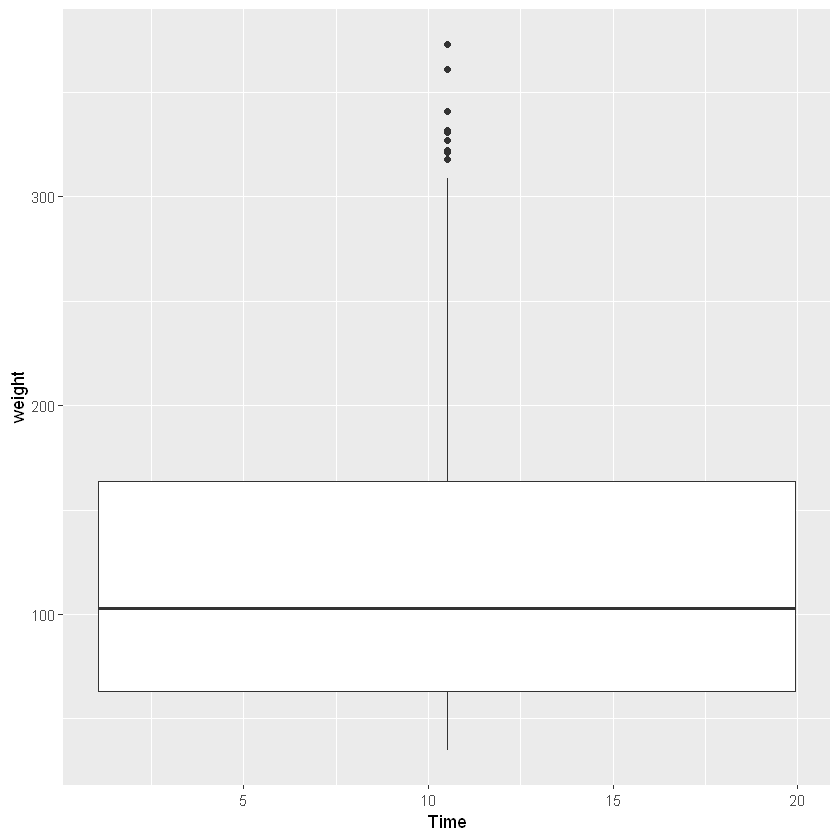

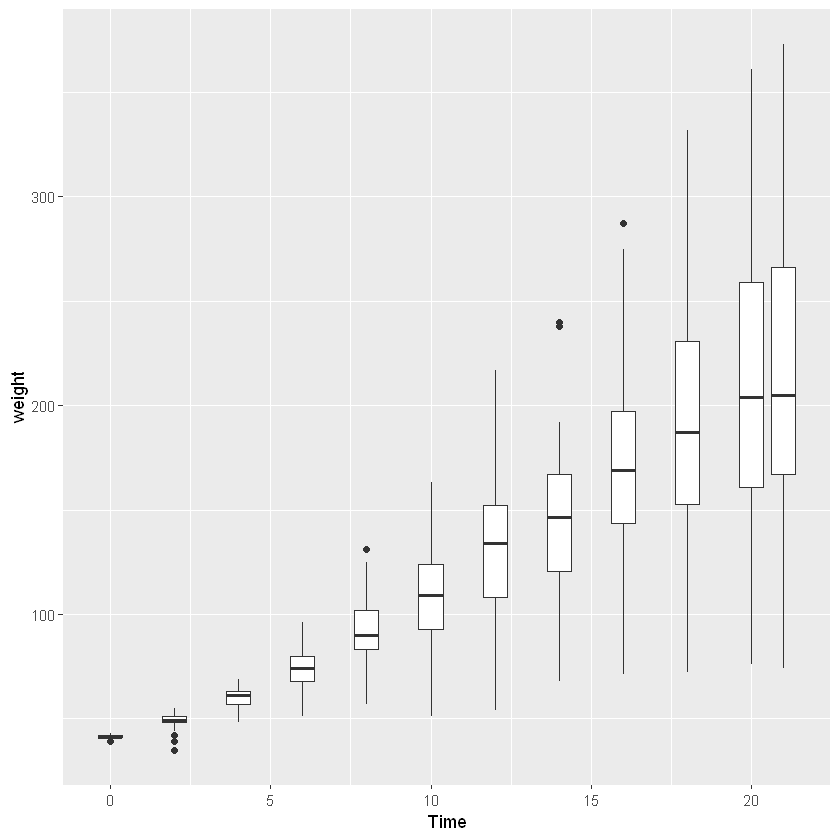

In [16]:
sp1 + geom_boxplot()

sp1 + geom_boxplot(aes(group=Time))

## 添加回归模型拟合线

运行`stat_smooth()`函数并设定 <u>method=lm</u> 即可向散点图中添加线性回归拟合线,这将调用lm()函数对数据拟合线性模型。

`geom_smooth()` using formula 'y ~ x'



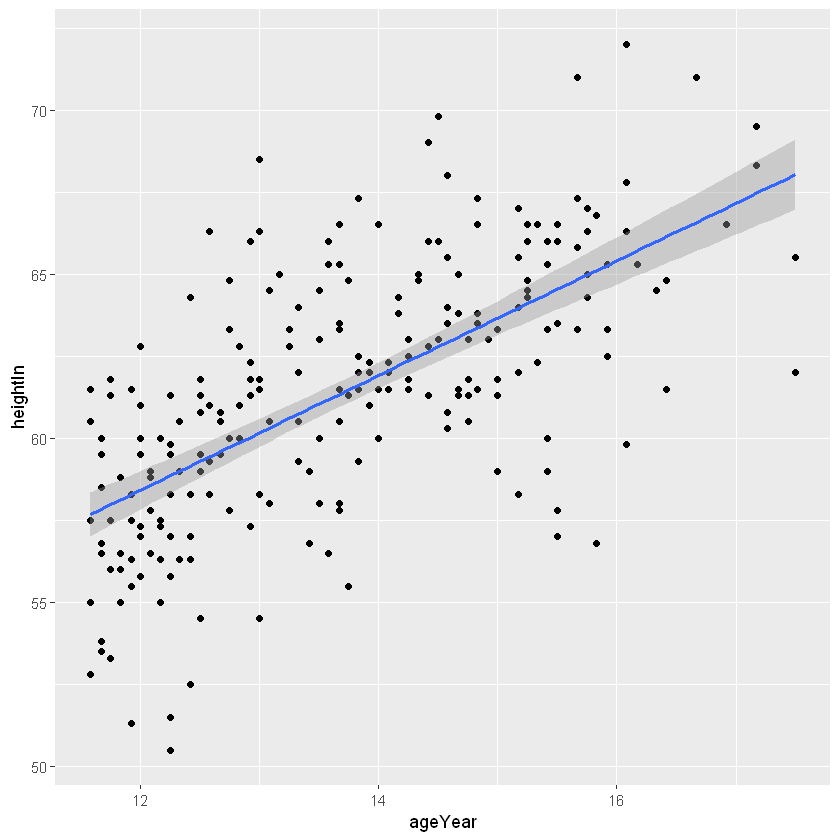

In [17]:
sp <- ggplot(heightweight, aes(x=ageYear, y=heightIn))

sp + geom_point() + stat_smooth(method = lm)

默认情况下，`stat_smooth()`函数会为回归拟合线添加 <u>95%</u> 的置信域, 置信域对应的置信水平可通过设置 <u>level</u>参数来进行调整。设定参数se=FALSE时，系统将不会对回归拟合线添加置信域。

`geom_smooth()` using formula 'y ~ x'



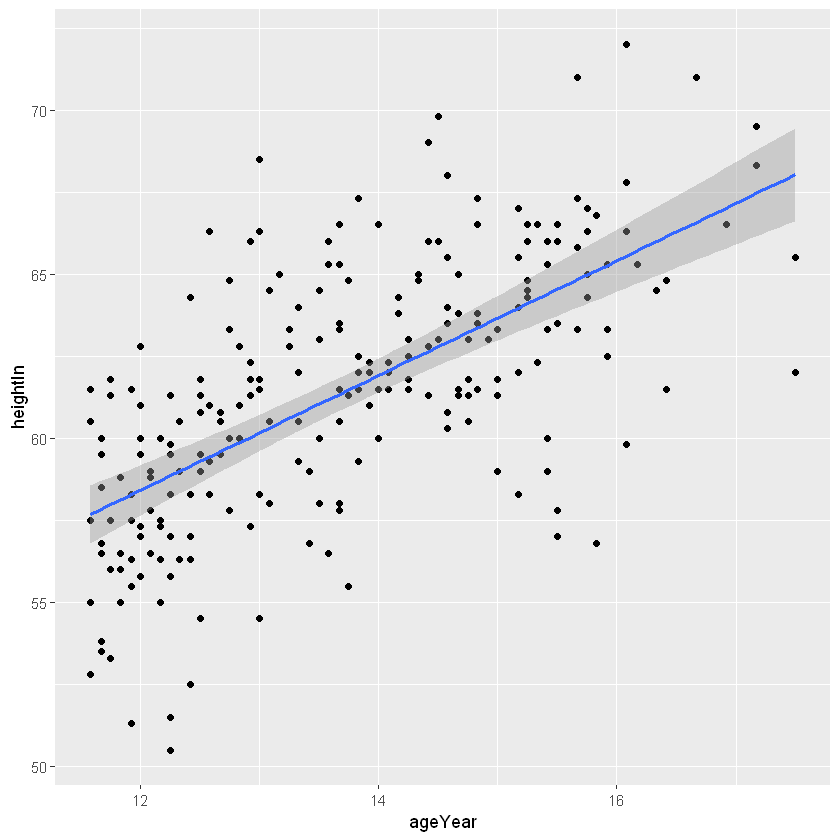

In [18]:
sp + geom_point() + stat_smooth(method = lm, level = 0.99)

`geom_smooth()` using formula 'y ~ x'



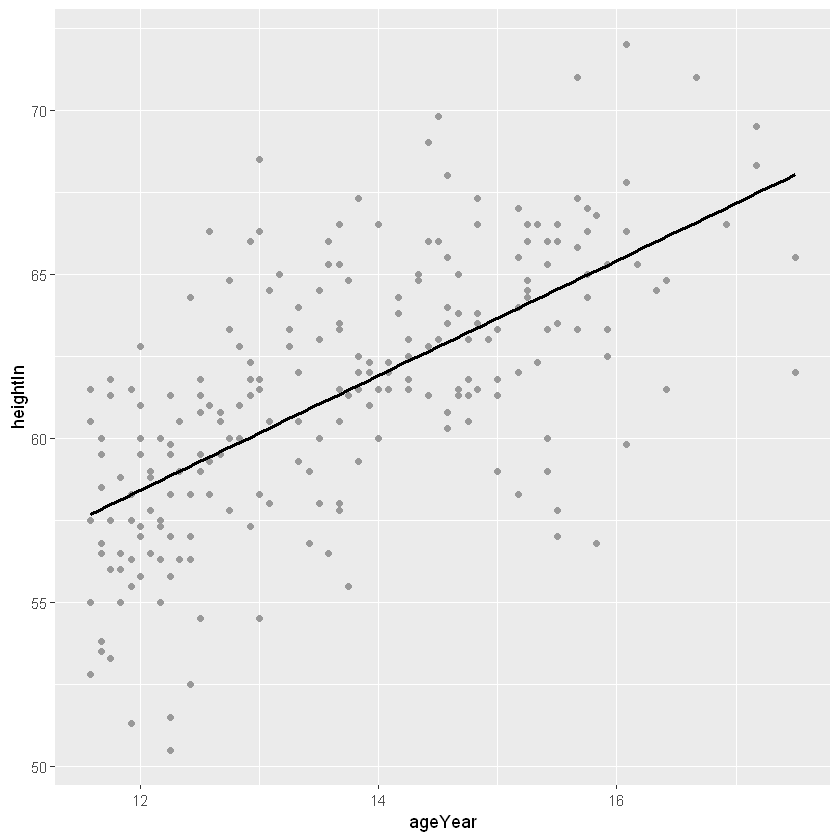

In [20]:
sp + geom_point(color='grey60') + stat_smooth(method = lm, se=FALSE, color='black')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



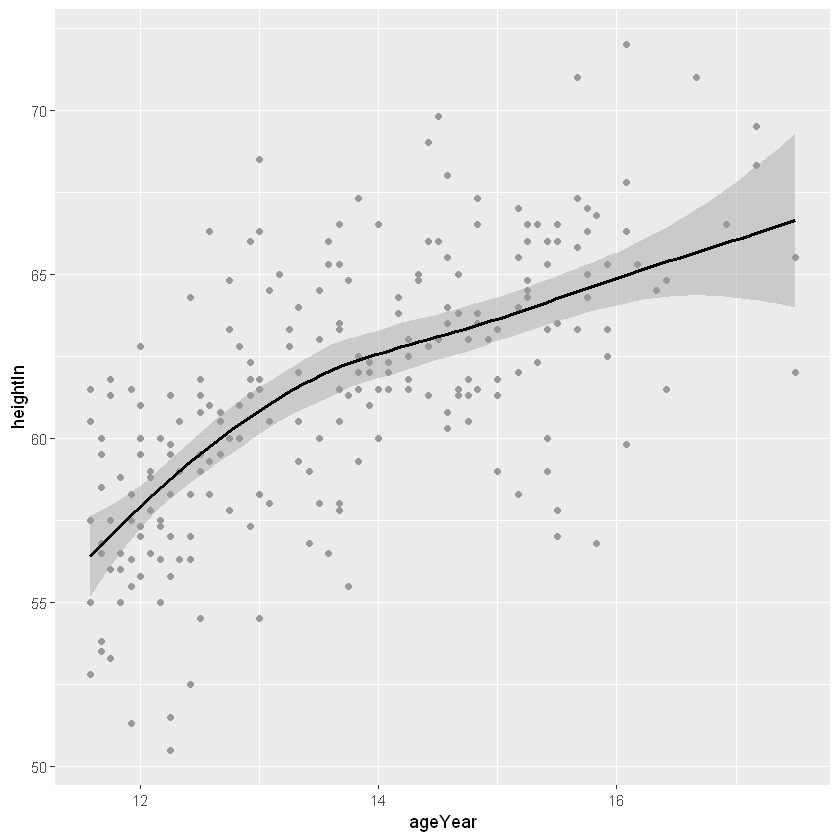

In [21]:
# stat_smooth()默认使用 loess（局部加权多项式拟合线）
sp + geom_point(color='grey60') + stat_smooth(color='black')

另一种常用的模型是Logistic回归。Logistic回归对heightweight数据集不适用，但对MASS包中的biopsy数据集拟合效果良好。

MASS包中的biopsy数据集拟合效果良好。该数据集包含9个与乳腺癌活检组织相关的指标以及肿瘤的分类，包括良性(benign)和恶性(malignant)两种。  
在预处理Logistic回归的数值时，必须将含有两个水平benign和malignant的因子型变量转化为具有0和1取值的向量。

In [27]:
library(MASS)

b <- biopsy

b$classn[b$class=="benign"] <- 0
b$classn[b$class=="malignant"] <- 1
head(b,2)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,classn
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>
1,1000025,5,1,1,1,2,1,3,1,1,benign,0
2,1002945,5,4,4,5,7,10,3,2,1,benign,0


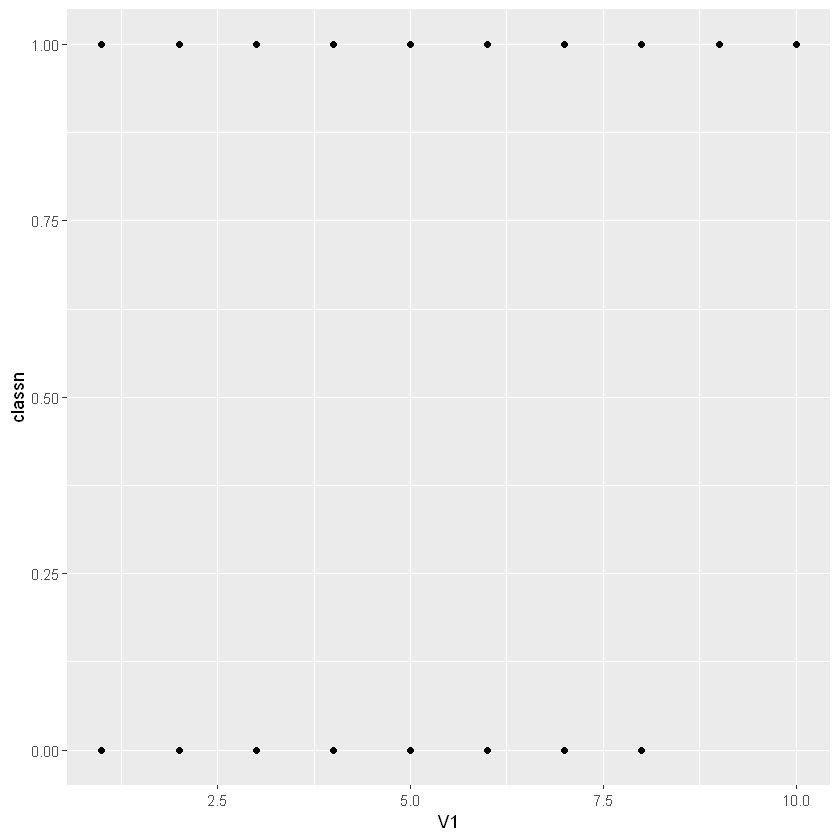

In [29]:
p <- ggplot(b, aes(x=V1, y=classn))
p + geom_point()

图中数据点重叠程度严重，因此需要添加扰动,设置点为半透明、点形设置为空心圆，并使用略小的数据点。令stat_smooth()函数使用选项为family=binormal的gln()函数向散点图添加logistic回归拟合线。

`geom_smooth()` using formula 'y ~ x'



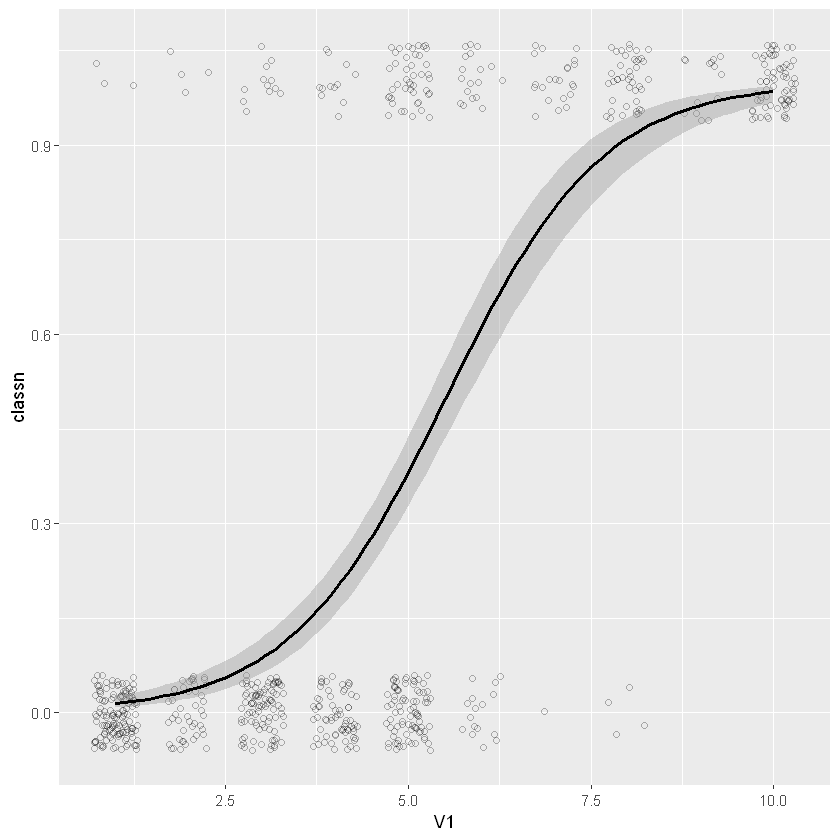

In [39]:
p + geom_point(position = position_jitter(width = 0.3, height = 0.06), 
               alpha = 0.3, shape=21, size=1.5) + 
 stat_smooth(method = glm, method.args = list(family="binomial"), color='black')

男性分组的蓝色拟合线并没有绘制到图形的右边界。其中有两个原因：  
第一：默认情况下stat_smooth函数将预测值的范围限定在预测数据对应的范围内  
第二：即使对模型进行外推，loess()函数也只能根据整组数据对应的x轴的范围进行预测

如果想基于数据集对拟合线进行外推，必须保证绘图过程中能够调用的是支持外推的模型，比如lm()，并将选项 <u>fullrange=TRUE</u> 传递给`stat_smooth()`函数

## 根据已有模型向散点图添加拟合线

本例中，使用`lm()`函数建立一个以 <u>ageYear</u> 为预测变量对 <u>heightIn</u> 进行预测的模型。  
然后，调用predict()函数计算预测模型 <u>ageYear</u> 各取值所对应的 <u>heightIn</u> 变量的预测值：

In [40]:
model <- lm(heightIn ~ ageYear + I(ageYear^2), heightweight)
model


Call:
lm(formula = heightIn ~ ageYear + I(ageYear^2), data = heightweight)

Coefficients:
 (Intercept)       ageYear  I(ageYear^2)  
    -10.3136        8.6673       -0.2478  


In [43]:
# 创建一个包含变量ageYear的列，并对其进行插值
xmin <- min(heightweight$ageYear)
xmax <- max(heightweight$ageYear)

predicted <- data.frame(ageYear=seq(xmin, xmax, length.out = 100))

In [45]:
# 计算变量heightIn的预测值
predicted$heightIn <- predict(model, predicted)
head(predicted,2)

,ageYear,heightIn
,<dbl>,<dbl>
1,11.5800,56.82624
2,11.6398,57.00047


现在，我们可以将数据点和模型预测值一起绘制在图形上

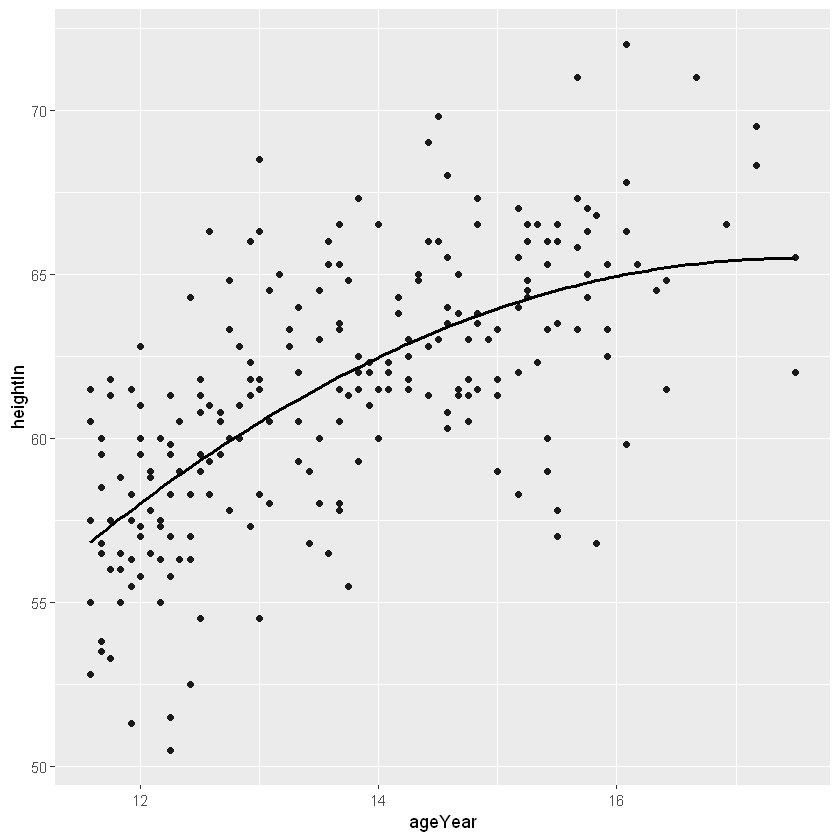

In [47]:
sp <- ggplot(heightweight, aes(x=ageYear, y=heightIn)) + 
       geom_point(color='grey10')

sp + geom_line(data = predicted, size = 1)

无论哪种模型，只要有对应的predict()方法，则其都可用来绘制拟合线。  
例如：`lm()`和`loess()`对应的predict()方法分别是predict.lm()和predict.loess()等，因此，这两个模型都可以用来绘制模型拟合线。

In [33]:
predictvals <- function(model, xvar, yvar, xrange=NULL, samples=100, ...){
    if (is.null(xrange)) {
        if (any(class(model) %in% c('lm', 'glm')))
            xrange <- range(model$model[[xvar]])
        else if (any(class(model) %in% 'loess'))
            xrange <- range(model$x)
    }
    
    newdata <- data.frame(x = seq(xrange[1], xrange[2], length.out = samples))
    names(newdata) <- xvar
    newdata[[yvar]] <- predict(model, newdata = newdata, ...)
    newdata
}

调用`lm()`函数和`loess()`函数对数据集建立线性模型和loess模型

In [49]:
modlinear <- lm(heightIn ~ ageYear, heightweight)
modloess <- loess(heightIn ~ ageYear, heightweight)

针对两个模型分别调用`predictvals()`函数，并将得到的结果（数据框）传递给geom_line():

In [50]:
lm_predicted <- predictvals(modlinear, "ageYear", "heightIn")
loess_predicted <- predictvals(modloess, "ageYear", "heightIn")

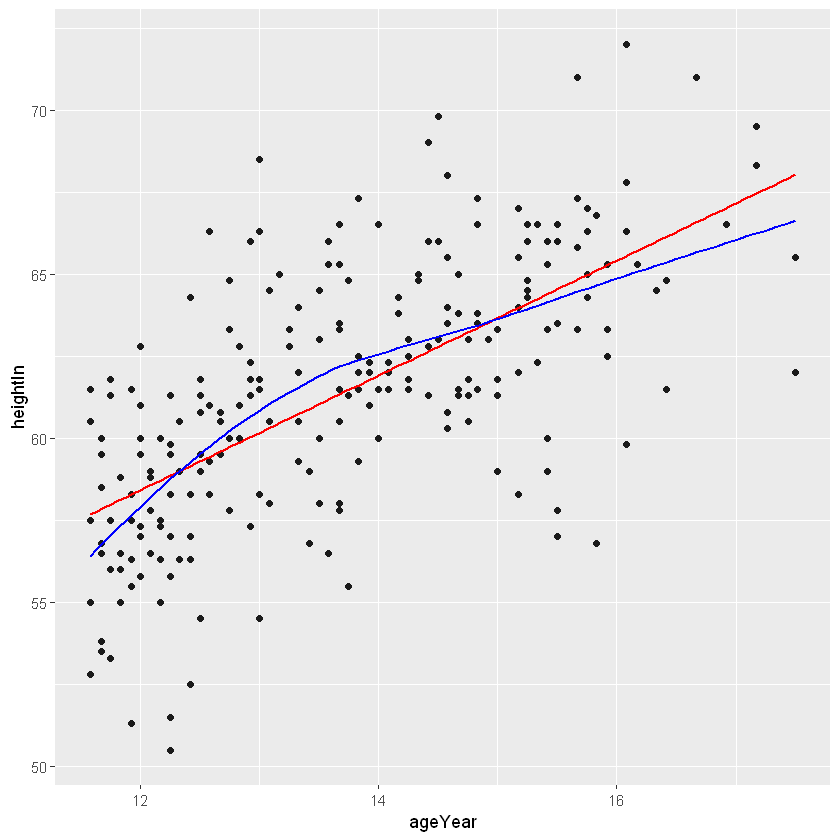

In [51]:
sp + geom_line(data = lm_predicted, color='red', size=.8) + 
 geom_line(data = loess_predicted, color = 'blue', size=.8)

对于具有非线性连接函数的glm模型，需要将predictvals()函数的参数设定为`type="response"`。这样做的原因在于，默认情况下该函数返回的预测结果是基于线性项的，而不是基于响应变量(y)的。

以MASS包中的biopsy数据为例演示一下上述过程。  
用变量V1来预测变量class。logistic模型对应的值须是介于0到1之间的数值，这里变量class是因子型变量，因此，要先将变量class的取值转化为0和1。

In [2]:
library(MASS)
b <- biopsy

Warning message:
"package 'MASS' was built under R version 4.0.5"


In [4]:
head(b,2)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign


In [5]:
b$classn[b$class=="benign"] <- 0
b$classn[b$class=="malignant"] <- 1

In [7]:
# 建立logistic回归模型
fitlogistic <- glm(classn ~ V1, b, family = binomial)

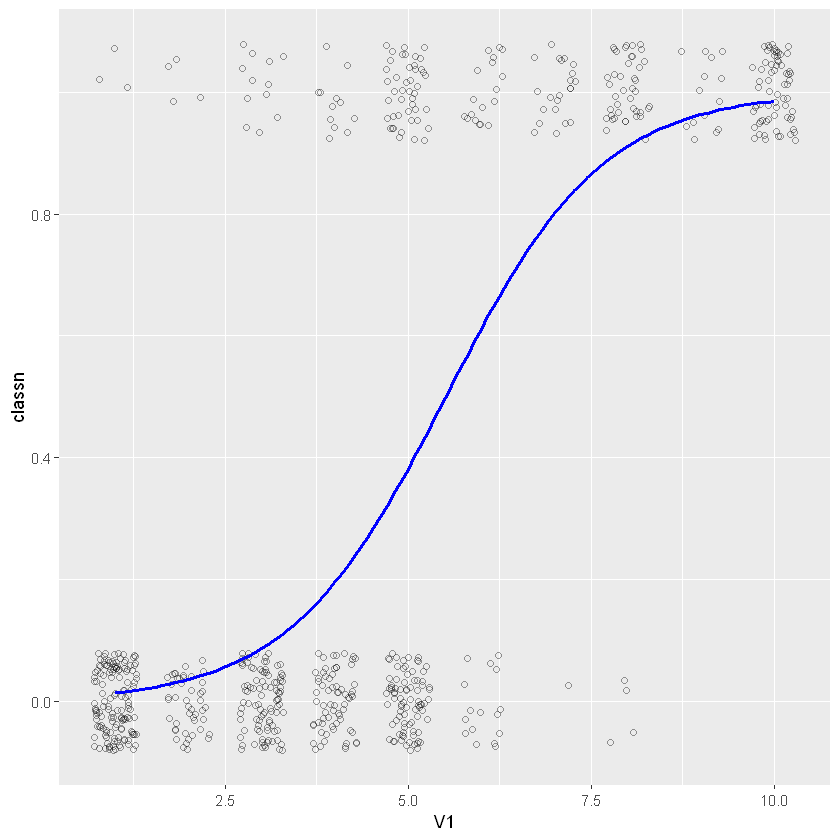

In [13]:
# 获取预测值
glm_predicted <- predictvals(fitlogistic, "V1", "classn", type="response")

ggplot(b, aes(x=V1, y=classn)) + 
 geom_point(position = position_jitter(width = .3, height = .08), alpha = .4,
           shape=21, size=1.5) + 
 geom_line(data=glm_predicted, color='blue', size=1)

## 添加来自多个模型的拟合线

**问题：**  
对数据集建立了回归模型之后，如何绘制模型对应的拟合线？  
**方法：**  
使用上文提到的predictvals()函数和来自plyr包的`dlply()`及`ldply()`函数即可。

根据变量sex的水平对heightweight数据集进行分组，调用`lm()`函数对每组数据分别建立线性模型，并将模型结果存放在一个列表内。随后，通过下面定义的make_model()函数建立模型。调用该函数时，向其输入一个数据框作为参数，该函数会返回一个lm对象。也可以根据数据集自定义模型：

In [34]:
make_model <- function(data){
    lm(heightIn ~ ageYear, data)
}

有了上面的函数之后，可以调用`dlply()`函数分别针对数据集的各个子集建立模型。  
在执行过程中，函数会根据分组变量sex将数据集切分为不同的子集，并对各个子集执行`make_model()`函数。  
本例中，heightweight数据集被切分为男性组和女性组，make_model()函数分别对两个组的数据建立模型。调用`dlply()`函数将模型结果输出到列表中，并返回列表：

In [35]:
library(plyr)

models <- dlply(heightweight, 'sex', .fun = make_model)

In [36]:
models

$f

Call:
lm(formula = heightIn ~ ageYear, data = data)

Coefficients:
(Intercept)      ageYear  
     43.963        1.209  


$m

Call:
lm(formula = heightIn ~ ageYear, data = data)

Coefficients:
(Intercept)      ageYear  
     30.658        2.301  


attr(,"split_type")
[1] "data.frame"
attr(,"split_labels")
  sex
1   f
2   m

得到模型对象之后，配合使用`ldply()`函数和`predictvals()`函数即可获取两个模型对应的预测值。

In [37]:
predvals <- ldply(models, .fun = predictvals, xvar='ageYear', yvar='heightIn')

最后绘制带预测值的散点图

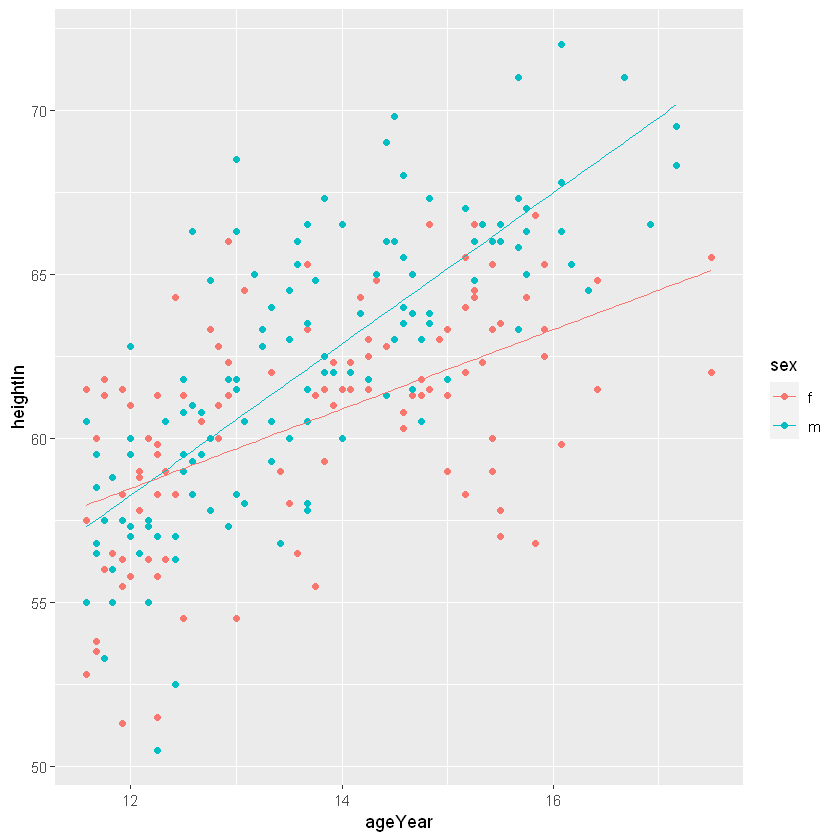

In [38]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + 
 geom_point() + 
 geom_line(data = predvals)

**讨论：**  
`dlply()`和`ldply()`函数的作用是切分数据，对各个部分执行某一函数，并对执行结果进行重组。  
上面两个模型预测变量均在各自的ageYear变量范围内，没有进行延申。  
为了使两组数据预测先对应的x轴范围与整个数据集对应的x范围相同，可以像下面这样向其传递一个xrange参数：

In [39]:
predvals <- ldply(models, .fun = predictvals, xvar='ageYear', yvar='heightIn', xrange=range(heightweight$ageYear))

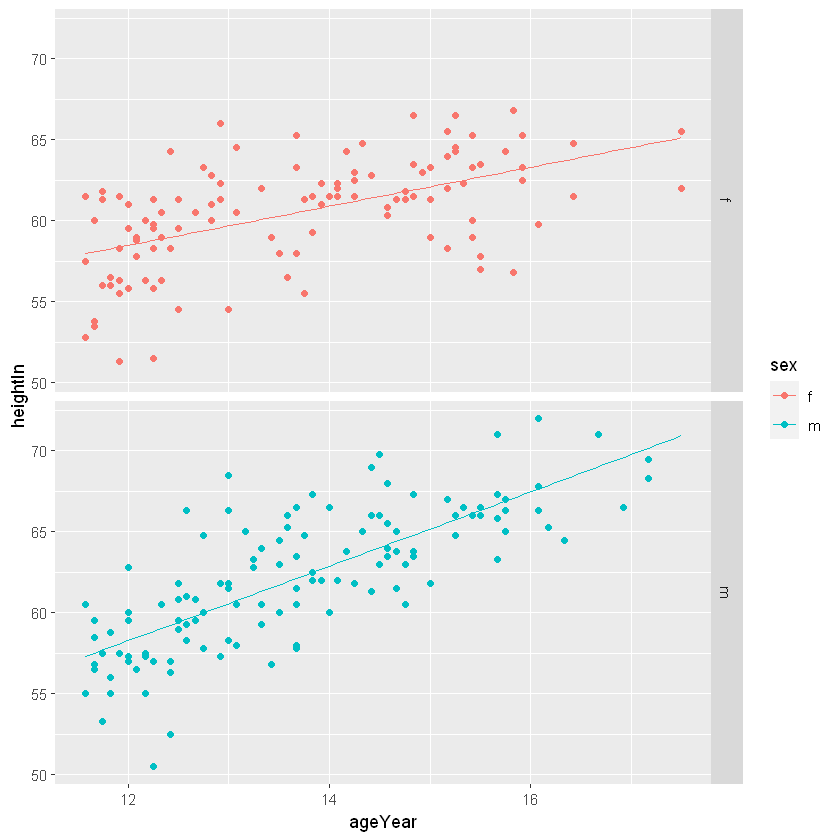

In [40]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + 
 geom_point() + 
 geom_line(data = predvals) + 
 facet_grid(sex ~ .)

<font color='red'>warning</font>**谨记一点：**外推的拟合线并非总适用的，其适用与否要视数据特性及模型假设而定

👀 🆘 ❀ 五星红旗🚫🔞🚳🚯🚷❗❕红旗o(*￣︶￣*)o(●'◡'●)👏💏

## 向散点图添加模型系数

简单的文本以注释形式添加到图形上面即可。

In [30]:
model <- lm(heightIn ~ ageYear, heightweight)
summary(model)


Call:
lm(formula = heightIn ~ ageYear, data = heightweight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3517 -1.9006  0.1378  1.9071  8.3371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.4356     1.8281   20.48   <2e-16 ***
ageYear       1.7483     0.1329   13.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.989 on 234 degrees of freedom
Multiple R-squared:  0.4249,	Adjusted R-squared:  0.4225 
F-statistic: 172.9 on 1 and 234 DF,  p-value: < 2.2e-16


上面的结果表明模型的 r<sup>2</sup>=0.4249. 我们创建一个图形，并调用`annotate()`函数向其手动添加文本：  

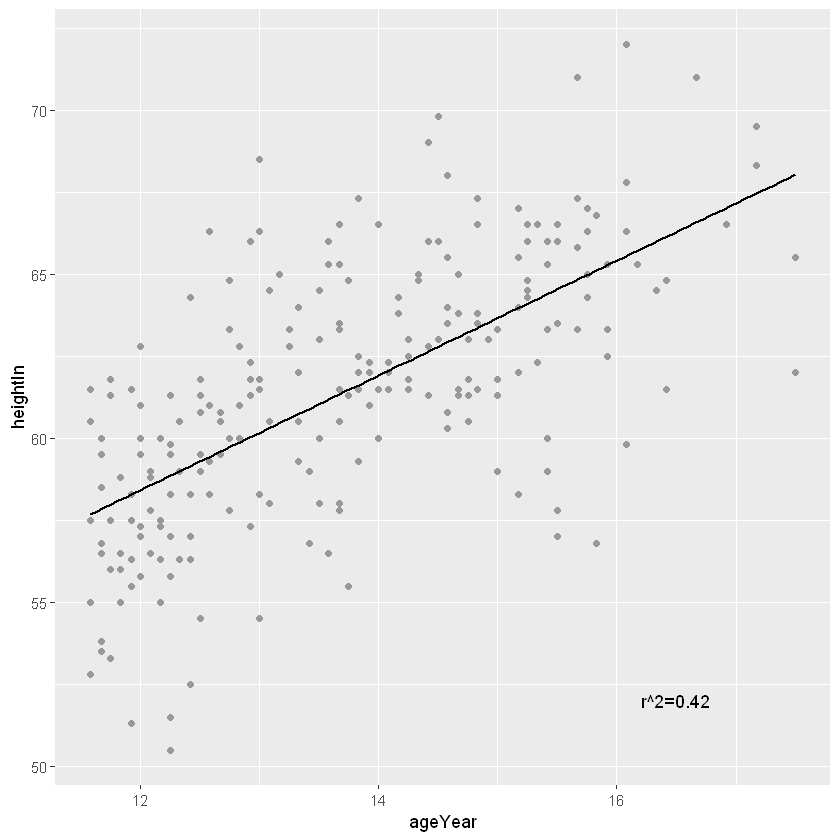

In [45]:
# 首先生成预测值
pred <- predictvals(model, 'ageYear', 'heightIn')
sp <- ggplot(heightweight, aes(x=ageYear, y=heightIn)) + 
       geom_point(color = 'grey60') + 
       geom_line(data = pred, size=0.6) 

sp + annotate('text', label='r^2=0.42', x=16.5, y=52)

如果不想使用纯文本字符串当注释的话，可以通过设置`parse=TRUE`调用R的数学表达式语法来输入公式

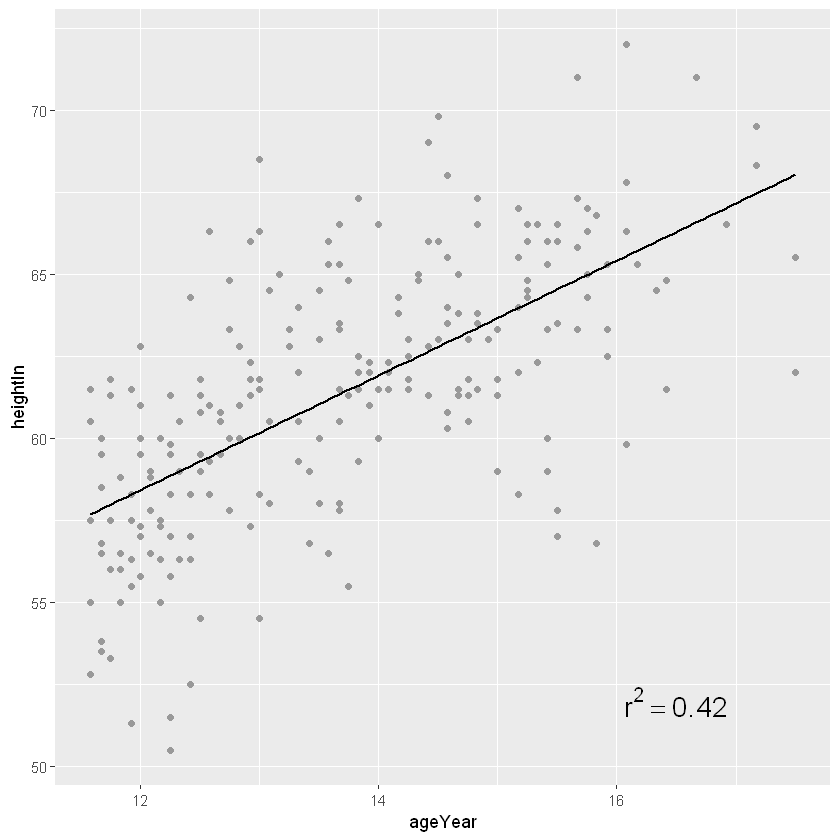

In [46]:
sp + annotate('text', label = 'r^2 == 0.42', size=6,parse = TRUE, x=16.5, y=52)

💬**讨论：**  
ggplot2中的文本对象不能直接以表达式对象作为输入，其参数通常是一个字符串，接受字符串后，通过`parse(text="a" + "b")`函数将其转化为公式。  
使用数学公式作为注释时，必须使用正确的语法才能保证系统输出一个合法的R表达式对象。把公式封装在`expression()`内部，检验其输出结果可以辅助判断R表达式的有效性(确保公式两边没有引号)。  
== 是公式中等号的合法字符，而 = 则是非法字符。

In [49]:
expression(r^2 == 0.42)

expression(r^2 == 0.42)

In [48]:
expression(r^2 = 0.42)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: 意外的'='
1: expression(r^2 =
                   ^


还可以自动提取模型对象的值并创建一个引用这些值的公式。在接下来的例子中，我们创建一个字符串。对其进行解析后，会返回一个合法的公式：

In [55]:
eqn <- as.character(as.expression(
         substitute(italic(y) == a + b * italic(x) * "," ~~ italic(r)^2 ~ "=" ~ r2,
                   list(a = format(coef(model)[1], digits = 3),
                        b = format(coef(model)[2], digits = 3),
                        r2 = format(summary(model)$r.squared, digits=2))))
                   )

parse(text = eqn)

expression(italic(y) == c(`(Intercept)` = "37.4") + c(ageYear = "1.75") * 
    italic(x) * "," ~ ~italic(r)^2 ~ "=" ~ "0.42")

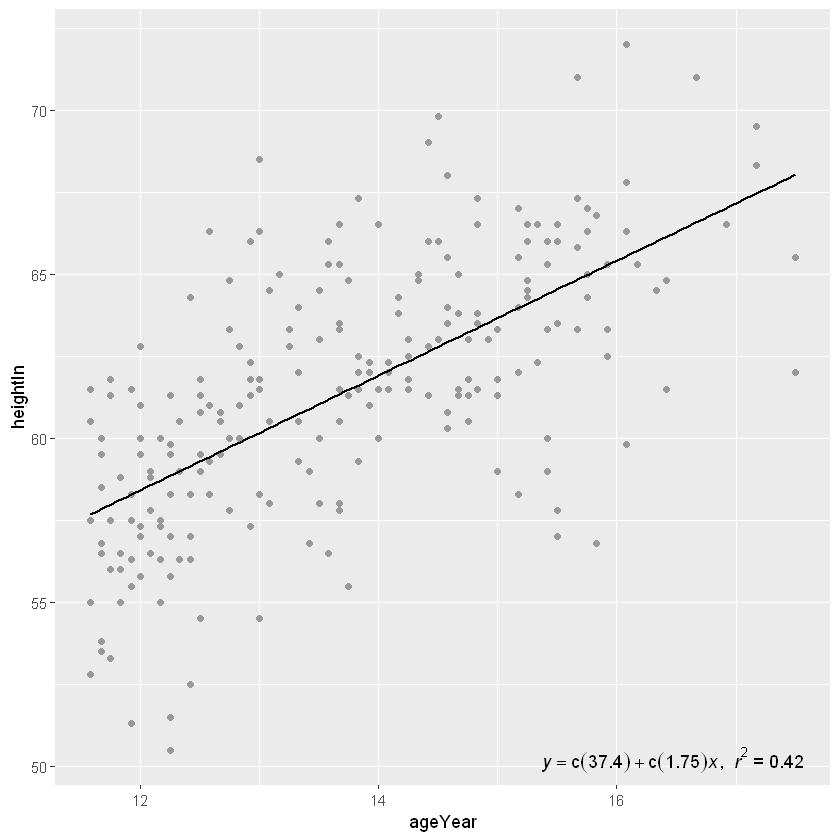

In [56]:
sp + annotate("text", label=eqn, parse=TRUE, x=Inf, y=-Inf, hjust=1.1,vjust=-.5)

## 向散点图添加边际地毯

**添加marginal rugs**  
调用geom_rug()函数即可。 下面以faithful数据集为例，该数据集包含两列关于“老忠实喷泉”的信息：  
其中，一列是变量eruptions，记录的是喷泉每次喷发的时长：另一列是waiting，记录的是喷泉在两次喷发之间的时间间隔：

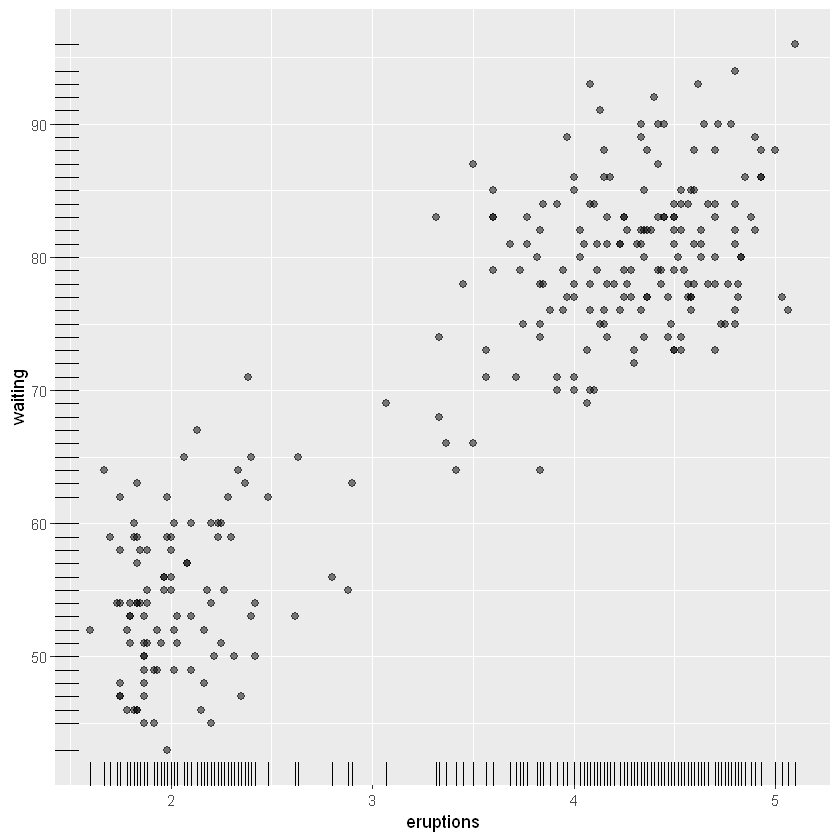

In [62]:
ggplot(faithful, aes(x=eruptions, y=waiting)) + 
 geom_point(size=3, alpha=.5, shape = 20) + 
 geom_rug()

边际地毯图本质上是一个一维的散点图，它可被用于展示每个坐标轴上数据的公布情况。  
对于本例中的数据集，边际地毯传递的信息量十分有限。因为变量waiting的最小刻度是分钟，因此，图中相应的边际地毯线重叠严重。通过向边际地毯线的位置坐标添加扰动并设定size减小线宽可以减轻边际地毯线的重叠程度。上述操作有助于看清数据的分布情况。

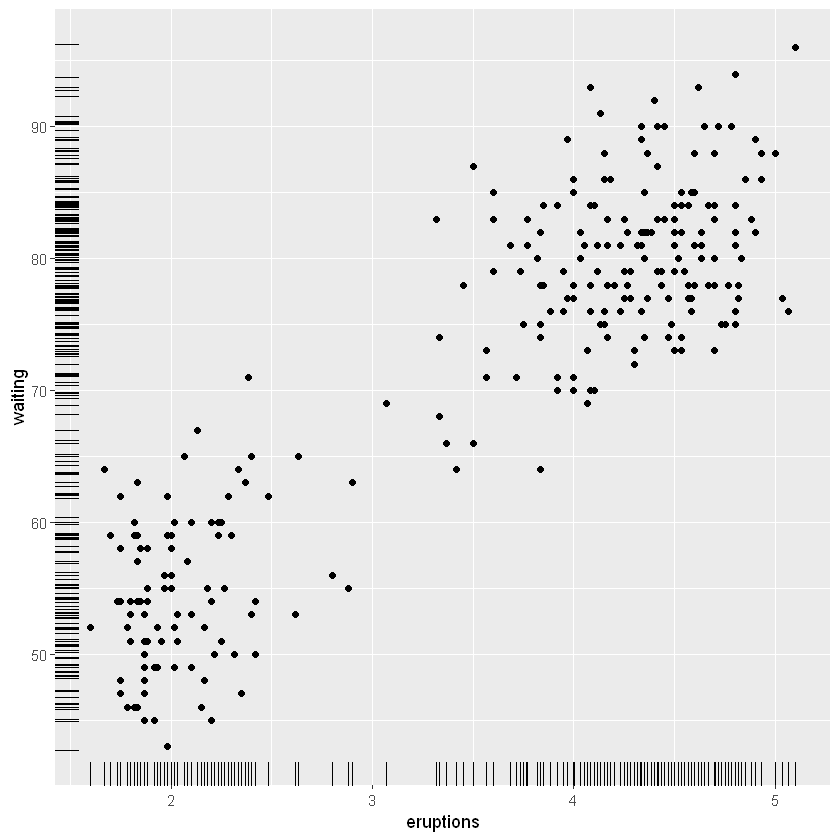

In [65]:
ggplot(faithful, aes(x=eruptions, y=waiting)) + 
 geom_point() + 
 geom_rug(position = position_jitter(), size=.2)

## 向散点图添加标签

调用`annotate()`函数或者`geom_text()`函数可以为一个或几个数据点添加标签。  
下面以countries数据集为例，对各国医疗保健支出 与 婴儿死亡率之间的关系进行可视化。为了便于操作，选取人均支出大于2000美元的国家的数据子集进行分析：

In [67]:
top.entries <- subset(countries, Year==2009 & healthexp>2000)

In [68]:
head(top.entries,2)

,Name,Code,Year,GDP,laborrate,healthexp,infmortality
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
254,Andorra,AND,2009,NA,NA,3089.636,3.1
560,Australia,AUS,2009,42130.82,65.2,3867.429,4.2


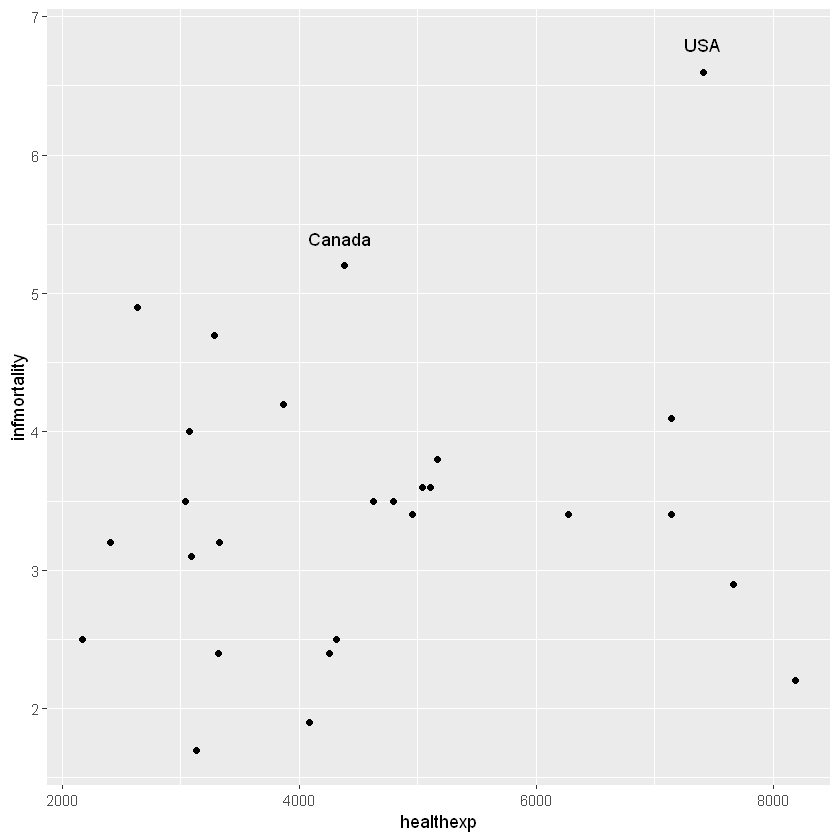

In [83]:
sp <- ggplot(top.entries, aes(x=healthexp, y=infmortality)) + geom_point()

sp + annotate("text", x=4350, y=5.4, label="Canada") + 
 annotate("text", x=7400, y=6.8, label="USA")

要根据数据集自动向散点图添加数据标签，可以使用geom_text()函数，此时，只需映射一个因子型或者字符串型的向量给标签(label)属性。同时为了避免数据点过于拥挤，我们使用略小一点的字号。默认标签 size=5 

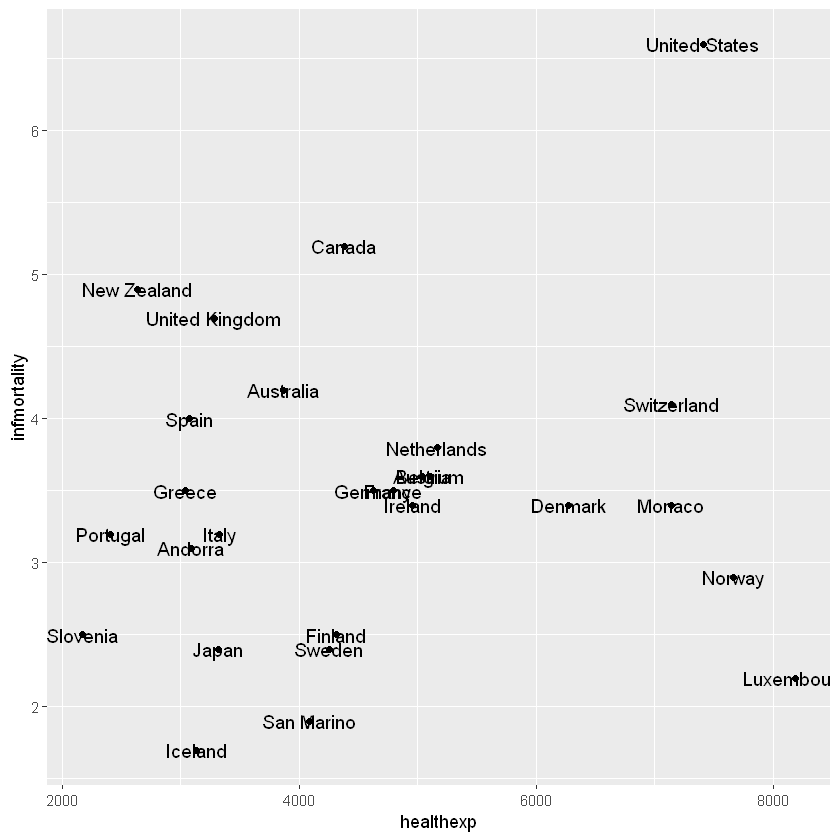

In [87]:
sp + geom_text(aes(label=Name), size=4)

💬**讨论：**  
系统自动放置注释时，会将其中心置于x坐标和y坐标的位置。 

**上下对齐**  
设定vjust=0时，标签文本的基线会与数据点对齐；设定vjust=1时，标签文本的顶部会与数据点对齐，但有时这样还不够，可以通过增加或者减少vjust参数的值来调高或调低文本标签的位置；也可以通过对y的映射增加或者减少一个值得到相同的效果

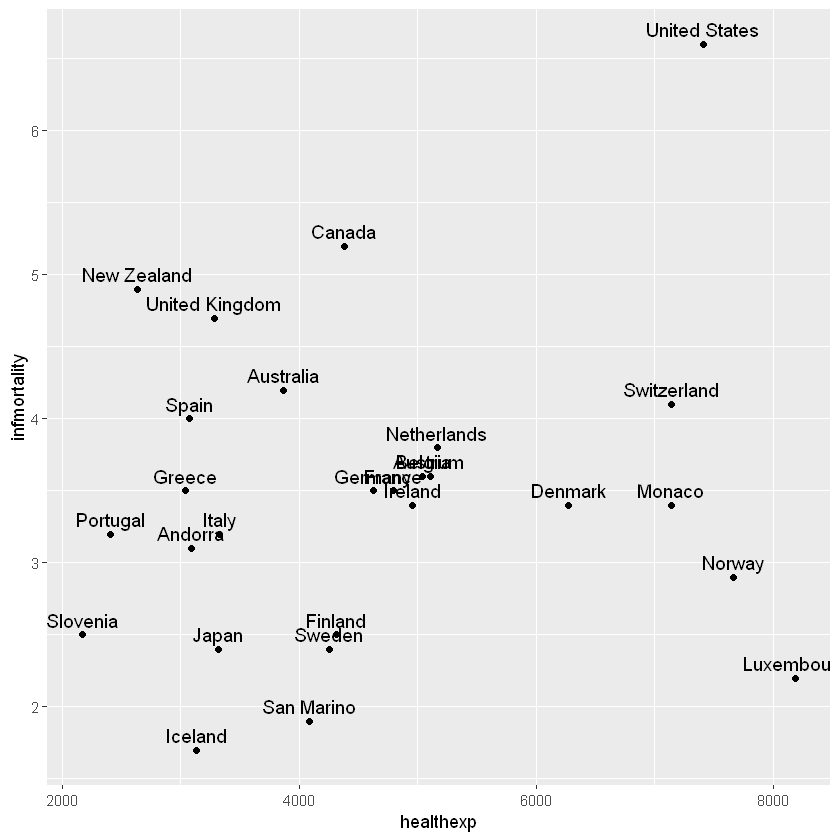

In [91]:
sp + geom_text(aes(label=Name), size=4, vjust=-0.5)

sp + geom_text(aes(y=infmortality, label=Name))

**左右对齐**  
有时候，有必要根据数据点的位置令注释左对齐，或右对齐。
- hjust=0 左对齐
- hjust=1 右对齐

然而最好不要通过增加或者减少hjust的值对此进行修正，因为调整hjust的值时，系统会按照文本标签长度的一定比例来移动文本标签的位置。这时候，较长的文本标签会比端文本标签移动的位置更大。  
此时，最好将hjust设定为0或1，然后，通过对x增加或者减去一个值来调整文本标签的位置：  

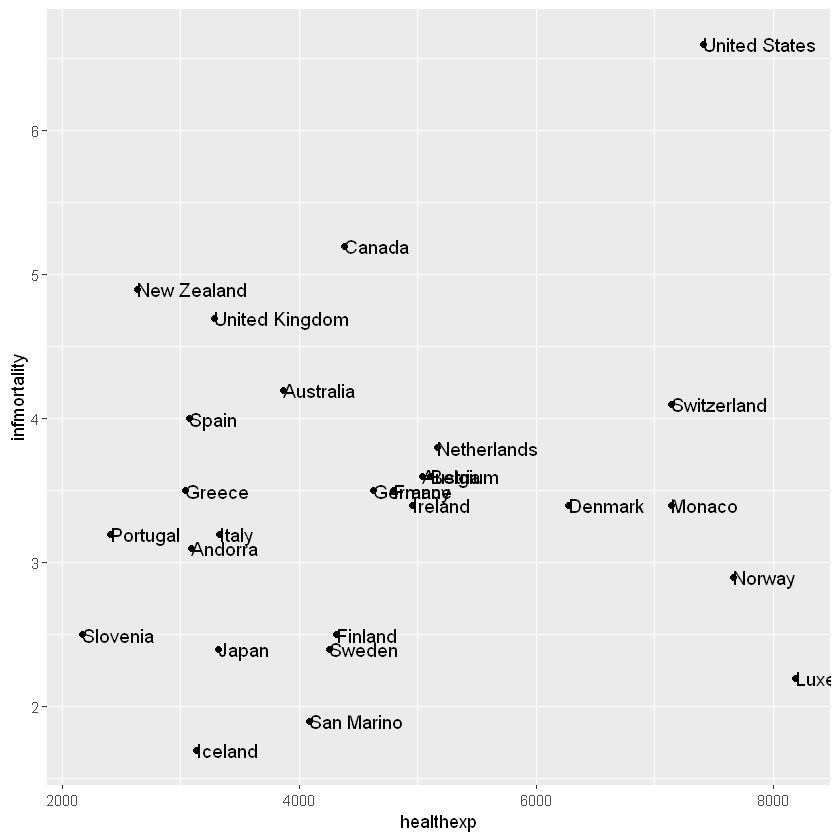

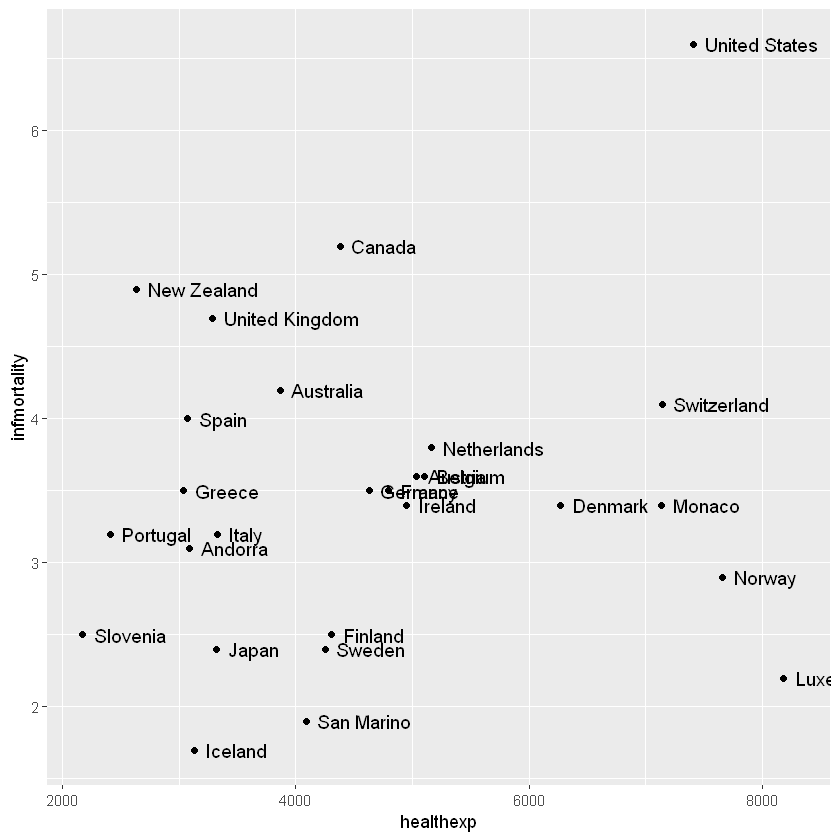

In [93]:
sp + geom_text(aes(label=Name), size=4, hjust=0)
sp + geom_text(aes(x=healthexp + 100, label=Name), size=4, hjust=0)

❗ps:  
如果绘图时用的是对数坐标，要想将文本标签移动同样的位置，就不能通过增加 x 或 y 的数值来实现了，此时需要令 x 或者 y 乘以一个数值才行  
因为对数运算：  <font color='red'>log(x*n) = logx + logn</font>

**部分数据点自动添加标签**  
如果只想给为数不多的几个点添加标签，但希望R自动设定标签位置的话，可以给数据框增加一个只包含拟使用的标签的新列。  
一个可行方案是：首先，将所有数据复制一个副本，并将列Name复制为Name1：

In [96]:
cdat <- subset(countries, Year==2009 & healthexp > 2000)

cdat$Name1 <- cdat$Name

接下来。用 %in% 运算符找出绘图时希望保有的标签所处的位置。本操作将返回一个逻辑向量，该向量标识了cdat\$Name1中哪些元素出现在第二个向量中，其中第二个向量指定的是我们希望标示出来的国家的名字：

In [98]:
idx <- cdat$Name1 %in% c('Canada', 'Ireland', 'United Kingdom', 'United States',
                        'New Zealand', 'Iceland', 'Japan', 'Luxembourg')
idx

[1] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[13] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE  TRUE  TRUE

In [99]:
# 重写不在第二个向量中的取值
cdat$Name1[!idx] <- NA

Warning message:
"Removed 19 rows containing missing values (geom_text)."


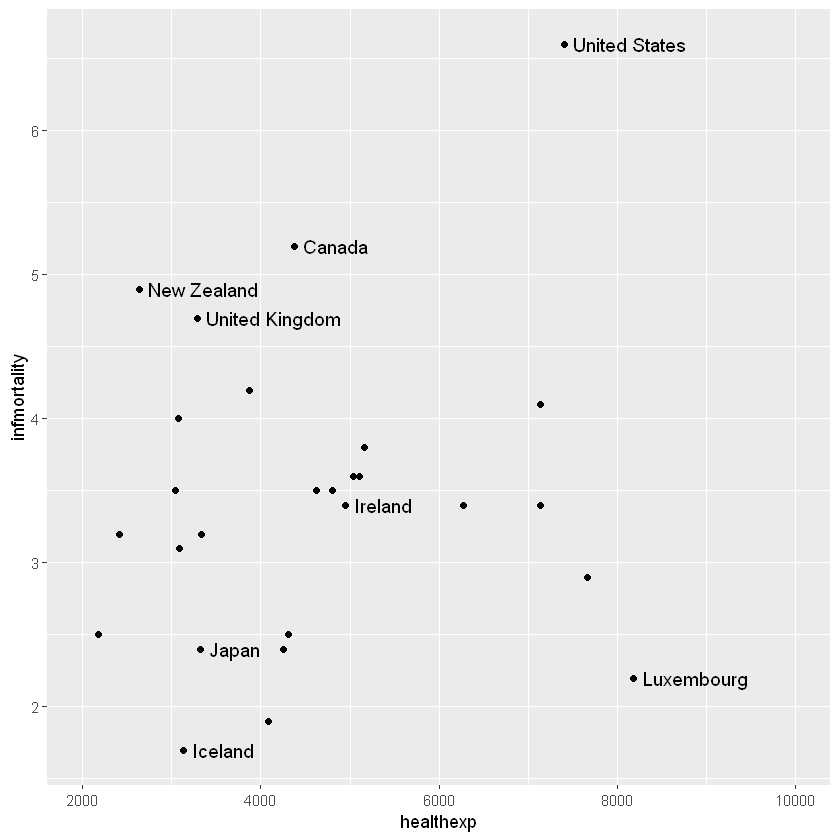

In [100]:
ggplot(cdat, aes(x=healthexp, y=infmortality)) +
 geom_point() +
 geom_text(aes(x=healthexp + 100, label=Name1), size=4, hjust=0) + 
 xlim(2000, 10000)

如果还有个别点要调整，就保存为pdf用 Illustrator 软件编辑吧

## 绘制气泡图

❓**问题**  
如何绘制气泡图，并令点的面积正比于变量值？  
💡**方法**  
调用`geom_point()`和`scale_size_area()`函数即可绘制气泡图。

In [102]:
cdat <- subset(countries, Year==2009 & Name %in% c('Canada', 'Ireland', 'United Kingdom', 'United States', 'New Zealand', 'Iceland', 'Japan', 'Netherlands', 'Switzerland'))
head(cdat,2)

,Name,Code,Year,GDP,laborrate,healthexp,infmortality
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1733,Canada,CAN,2009,39599.04,67.8,4379.761,5.2
4436,Iceland,ISL,2009,37972.24,77.5,3130.391,1.7


如果只是将 GDP 映射给size属性，则GDP的值被映射给了点的半径。若想将GDP映射给点的面积，可以调用 `scale_size_area()` 来完成这一操作

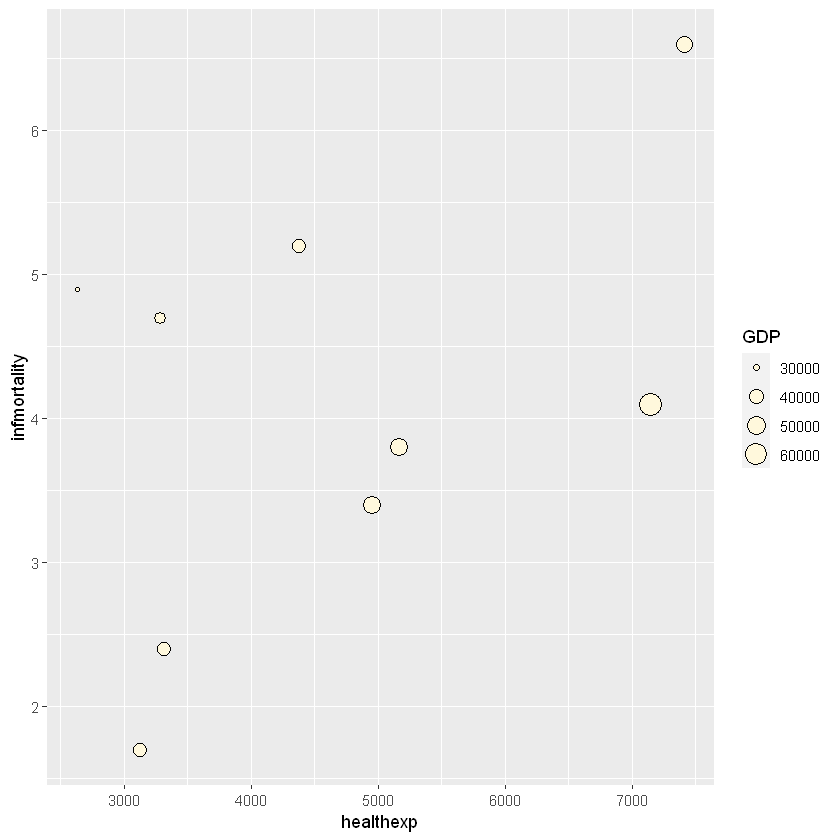

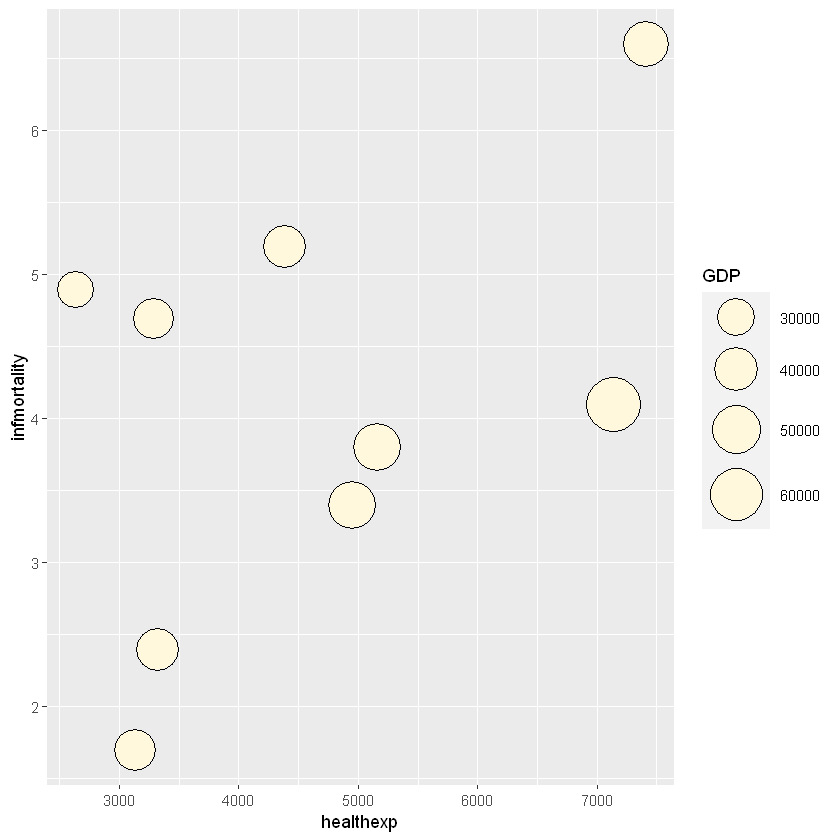

In [105]:
p <- ggplot(cdat, aes(x=healthexp, y=infmortality, size=GDP)) + 
      geom_point(shape=21, color='black', fill='cornsilk')

p 

p + scale_size_area(max_size = 15) + theme_bw()

本例中的气泡图实际上还是散点图， 但气泡图也有其他用法。比如，当x轴和y轴皆为分类变量时，气泡图可以用来表示网格点上的变量值

In [119]:
hec <- HairEyeColor[,,'Male'] + HairEyeColor[,,'Female']
hec

       Eye
Hair    Brown Blue Hazel Green
  Black    68   20    15     5
  Brown   119   84    54    29
  Red      26   17    14    14
  Blond     7   94    10    16

In [121]:
library(reshape2)

hec <- melt(hec, value.name='count')

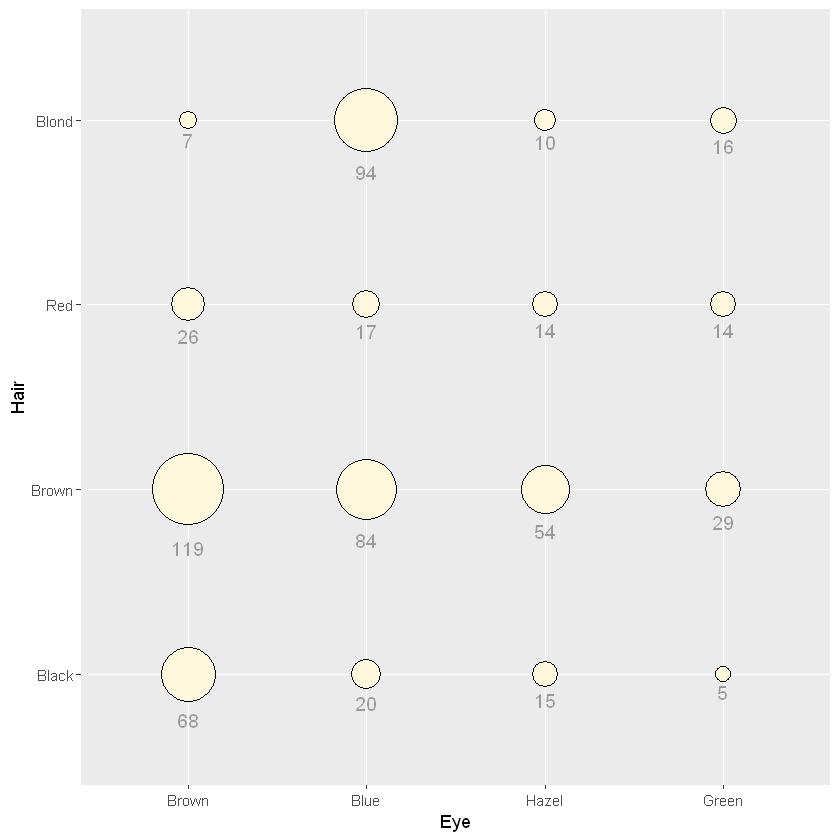

In [130]:
ggplot(hec, aes(x=Eye, y=Hair)) + 
 geom_point(aes(size=count), shape=21, color='black', fill='cornsilk') + 
 scale_size_area(max_size = 20, guide='none') +
 geom_text(aes(y=as.numeric(Hair)-sqrt(count)/40, label=count), vjust=1, color='grey60', size=4)

## 绘制散点图矩阵

💡**方法**  
调用R基础绘图系统中的`pairs()`函数可以绘制散点图矩阵。

In [4]:
c2009 <- subset(countries, Year==2009, select=c(Name, GDP, laborrate, healthexp, infmortality))
head(c2009,2)

,Name,GDP,laborrate,healthexp,infmortality
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
50,Afghanistan,NA,59.8,50.88597,103.2
101,Albania,3772.605,59.5,264.60406,17.2


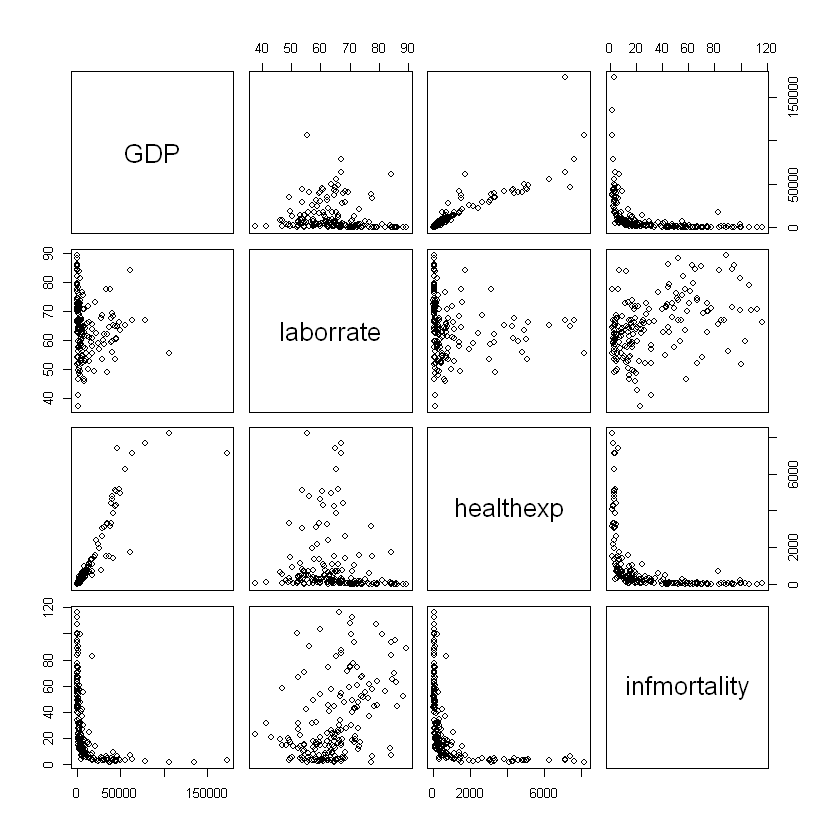

In [5]:
pairs(c2009[,2:5])

**讨论**  
此处，我们没有使用ggplot2是因为它不能绘制散点图矩阵(至少绘制的效果不佳)。

我们定义一个panel.cor函数来展示变量两两之间的相关系数以代替默认的散点图。

In [9]:
panel.cor <- function(x, y, digits=2, prefix='', cex.cor, ...){
    usr = par('usr')
    on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x,y, use='complete.obs'))
    txt <- format(c(r, 0.123456789),digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * (1+r)/2 )
}

为了在面板的对角线上展示各个变量的直方图，我们定义`panel.hist`函数:

In [7]:
panel.hist <- function(x, ...){
    usr <- par('usr')
    on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks
    nB <- length(breaks)
    y <- h$counts
    y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col='white', ...)
}

上面的函数都取自于`pairs()`函数的相关帮助。  
定义了这些函数之后，我们可以调用它们来绘制散点图矩阵。令`pairs()`函数在面板上三角执行`panel.cor`函数;在面板的对角线执行`panel.hist()`函数。  

绘图时也增加了一点东西：在面板的下三角执行panel.smooth()函数。该函数将在散点图矩阵的下三角绘制散点图，并添加一个LOWESS平滑曲线。

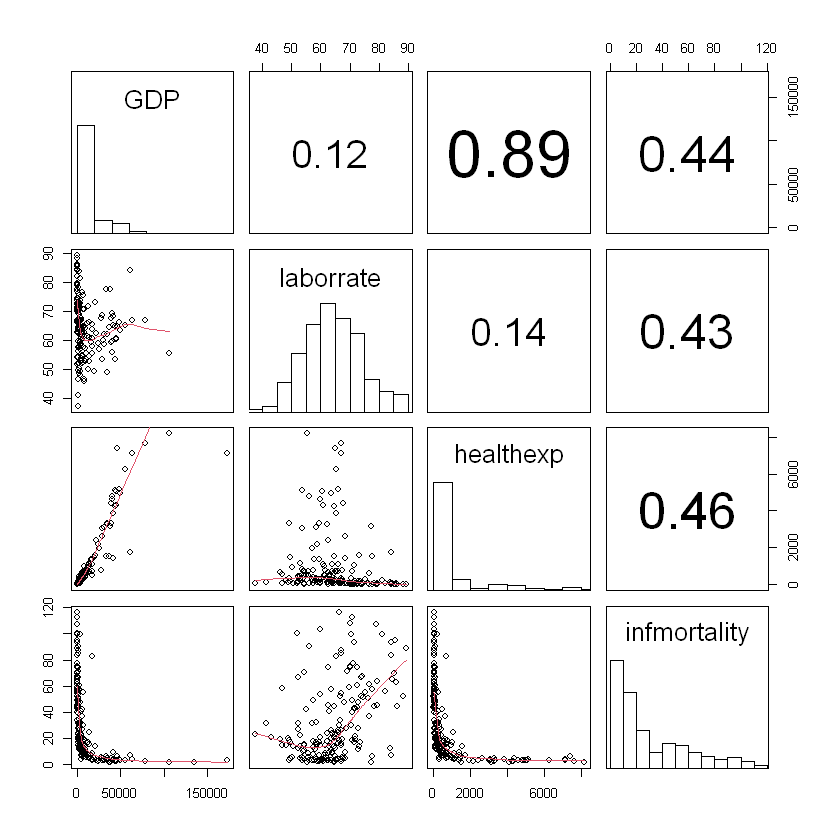

In [10]:
pairs(c2009[,2:5], upper.panel = panel.cor,
     diag.panel = panel.hist,
     lower.panel = panel.smooth)

也许，我们会希望用线性模型代替LOWESS模型，panel.lm函数可以完成该操作（与前面的面板函数不同，这里的函数不在pairs函数的帮助页面中）：

In [11]:
panel.lm <- function(x, y, col = par('col'), bg=NA, pch = par('pch'),
                    cex = 1, col.smooth = 'black', ...){
    points(x, y, pch=pch, col=col, bg=bg, cex=cex)
    abline(stats::lm(y~x), col=col.smooth, ...)
}

这次， 系统默认的线条颜色不再是红色，而是黑色。调用参数pairs()时（与函数panel.smooth配合使用）设定col.smooth参数可以对线条颜色进行修改。

为了便于辨认数据点，我们在图中使用更小一些的点。该操作可以通过设定pch="."来完成：

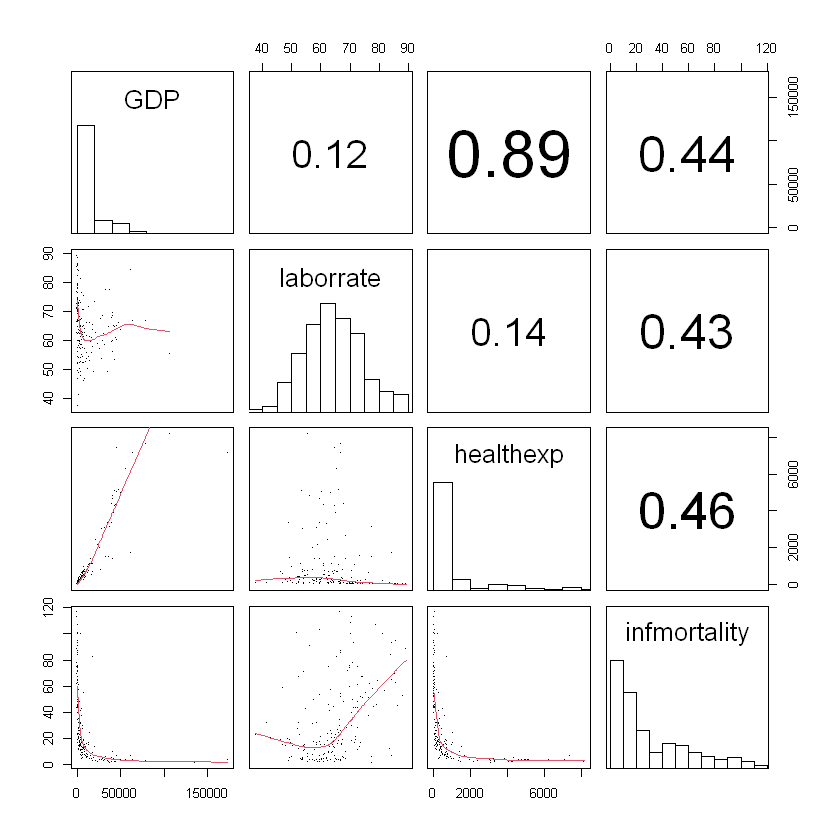

In [13]:
pairs(c2009[,2:5], pch='.',
      upper.panel = panel.cor,
      diag.panel = panel.hist,
      lower.panel = panel.smooth)

🧠**更多**  
关于创建相关系数矩阵的内容，可参见"其他图形"章第一节。  
GGally包中的`ggpairs()`函数也可以绘制散点图矩阵。

# 第六章 描述数据分布

## 绘制简单直方图

运行`geom_histogram()`函数并映射一个连续型变量到参数x

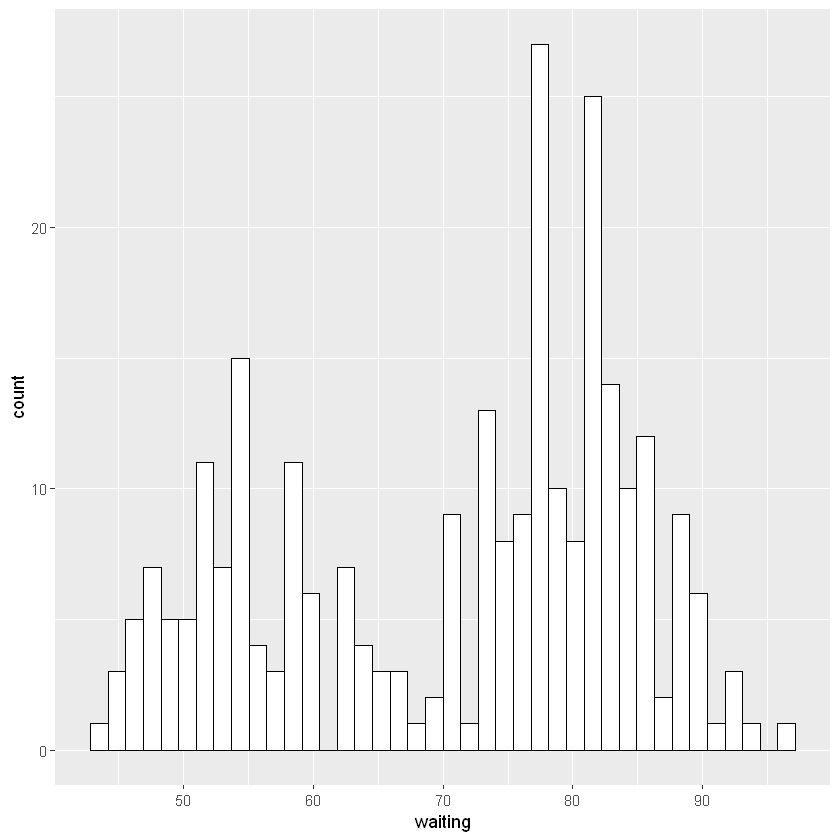

In [19]:
ggplot(faithful, aes(x=waiting)) + geom_histogram(bins = 40, fill='white', color='black')

如果想快速看一下未包含在数据框中的数据的直方图，可以在运行上述命令时，将数据框参数设定为NULL，同时，向ggplot()函数传递一个向量作为参数。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



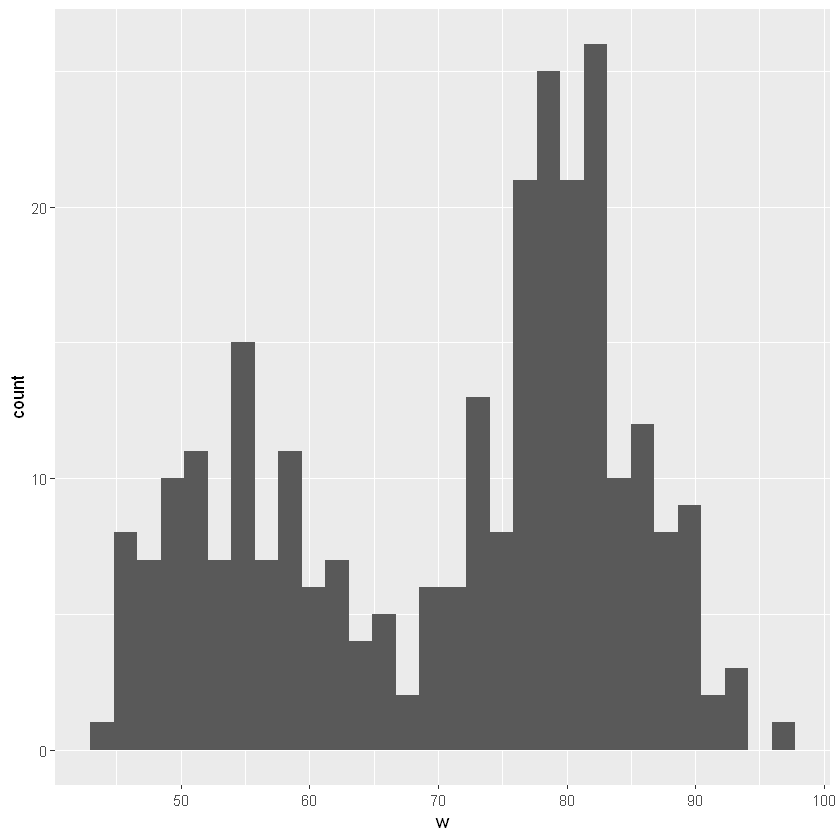

In [20]:
w <- faithful$waiting

ggplot(NULL, aes(x=w)) + geom_histogram()

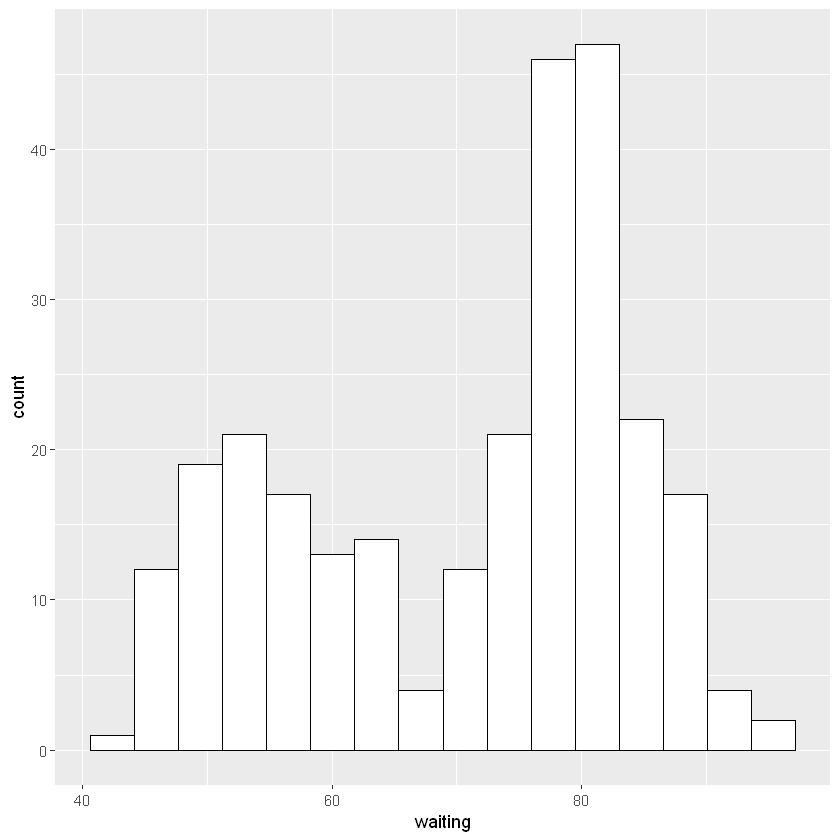

In [24]:
binsize <- diff(range(faithful$waiting))/15

ggplot(faithful, aes(x=waiting)) + 
 geom_histogram(binwidth = binsize, fill='white', color='black')

有时，直方图的外观会非常依赖于组距及组边界。我们将组距设定为8.同时设定分组原点(origin)参数令左图的组边界分别位于31、39、47等；右图中，对origin参数增加4，令组边界分别位于35、43、51等

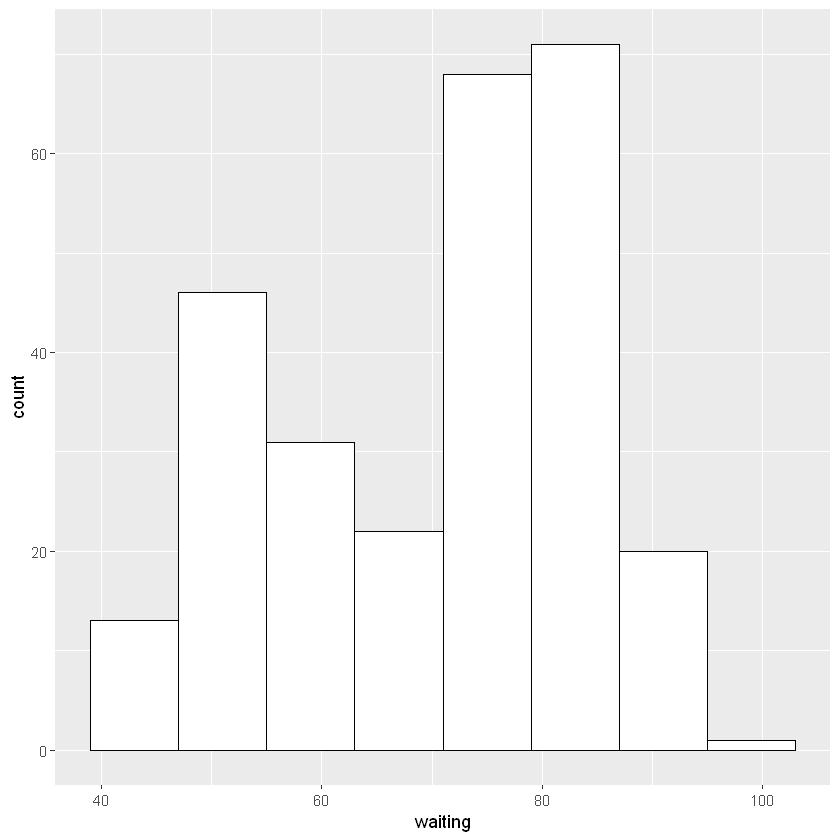

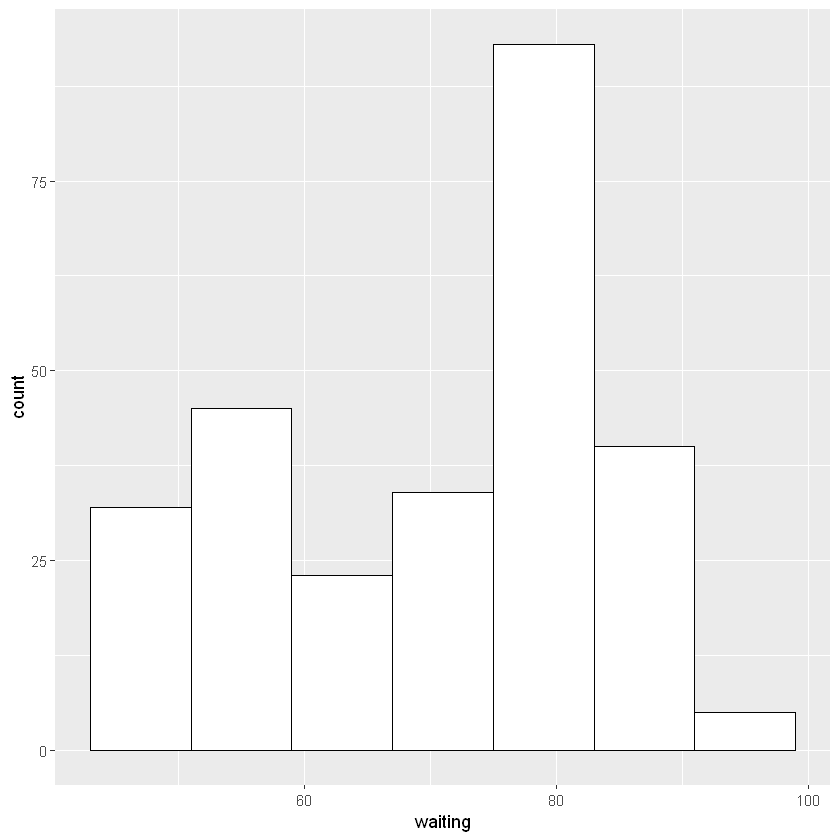

In [26]:
h <- ggplot(faithful, aes(x=waiting))

h + geom_histogram(binwidth = 8, fill = 'white', color = 'black', boundary=31)
h + geom_histogram(binwidth = 8, fill = 'white', color = 'black', boundary=35)

两图对应的分组数目相同，但绘图结果差异很大。因此，绘制图形时，最好尝试一下不同的分组数目和分组边界。

当数据集包含离散型数据时，直方图的非对称性不可忽略。数据分组时，各分组区间左闭右开。

**另见**  
绘制多个数据对应的分布时，频数多边形(frequency)是一个更佳的方案，因为，它避免了多个条形之间的相互干扰。

## 基于分组数据绘制分组直方图

💡**方法**  
运行`geom_histogram()`函数并使用分面绘图即可  

In [28]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.0.5"


In [29]:
head(birthwt, 2)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551


In [30]:
unique(birthwt$smoke)

[1] 0 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



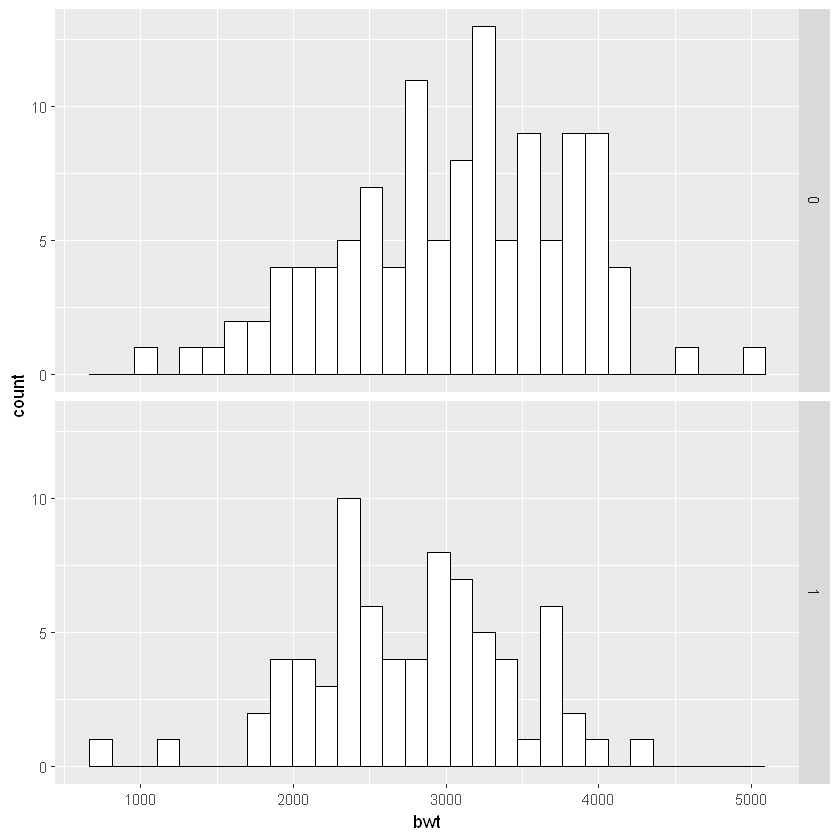

In [31]:
ggplot(birthwt, aes(x=bwt)) + geom_histogram(fill='white', color='black') + 
 facet_grid(smoke ~ .)

绘制上图时，要求所有用到的数据都包含在一个数据框里，且数据框其中一列是可用于分组的分类变量。

分面绘图有一个问题，即分面标签只有 0 和 1 ，且没有指明这个标签是变量smoke的取值。想要修改标签，需要修改因子水平的名称。依照相同的顺序向它们赋予新的名字：

In [41]:
birthwt$smoke <- factor(birthwt$smoke)

levels(birthwt$smoke)

[1] "0" "1"

In [42]:
library(plyr)
birthwt$smoke <- revalue(birthwt$smoke, c('0'='No Smoke', '1'='Smoke'))

重新绘图，图形中为新的分面标签。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



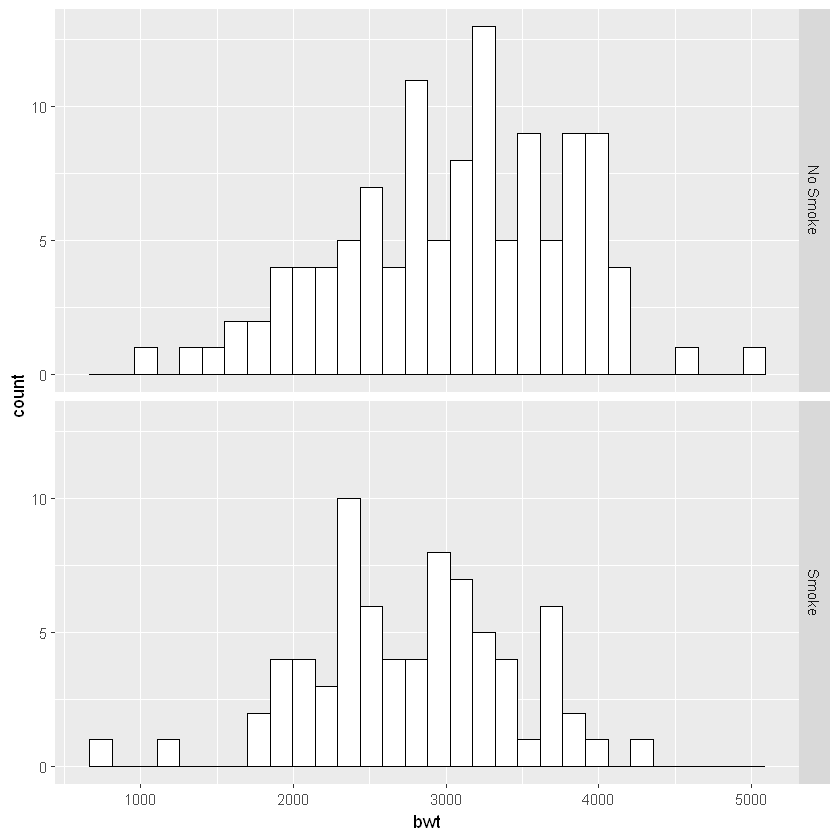

In [43]:
ggplot(birthwt, aes(x=bwt)) + geom_histogram(fill='white', color='black') + facet_grid(smoke ~ .)

分面绘图时，各分面对应的y轴标度是相同的，当各组数据包含的样本数目不同时，可能会难以比较各组数据的分布形状。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



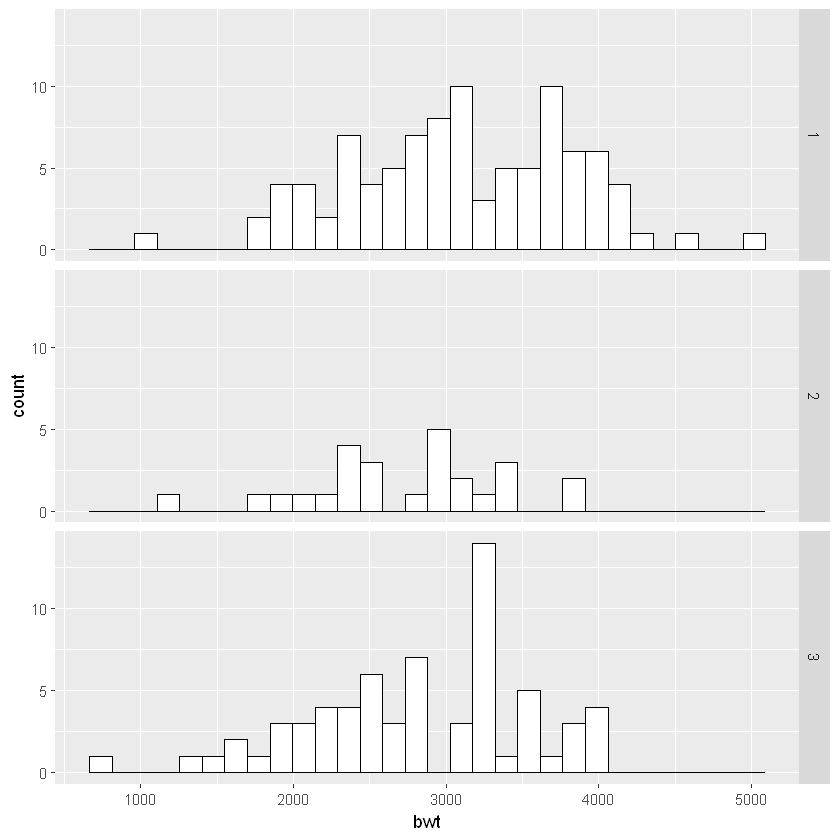

In [44]:
ggplot(birthwt, aes(x=bwt)) + geom_histogram(fill='white', color='black') + facet_grid(race ~ .)

设置`scales='free'`可以单独设定各个分面的y轴标度

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



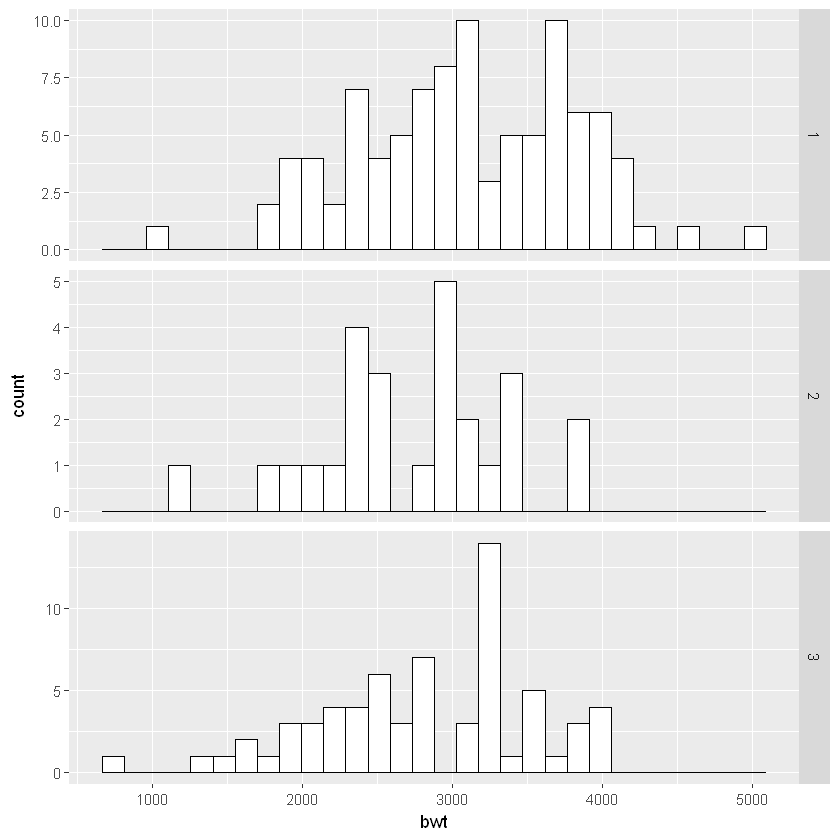

In [45]:
ggplot(birthwt, aes(x=bwt)) + geom_histogram(fill='white', color='black') + facet_grid(race ~ ., scales = 'free')

分组绘图的另一种做法是把分组变量映射给fill。此处的分组变量必须是因子型或者字符型的向量。对于birthwt 数据集，变量smoke是合适的分组变量，由于其被存储为数值型，所以，我们使用前面创建的birthwt数据集，该数据集中的smoke变量是因子型变量：

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



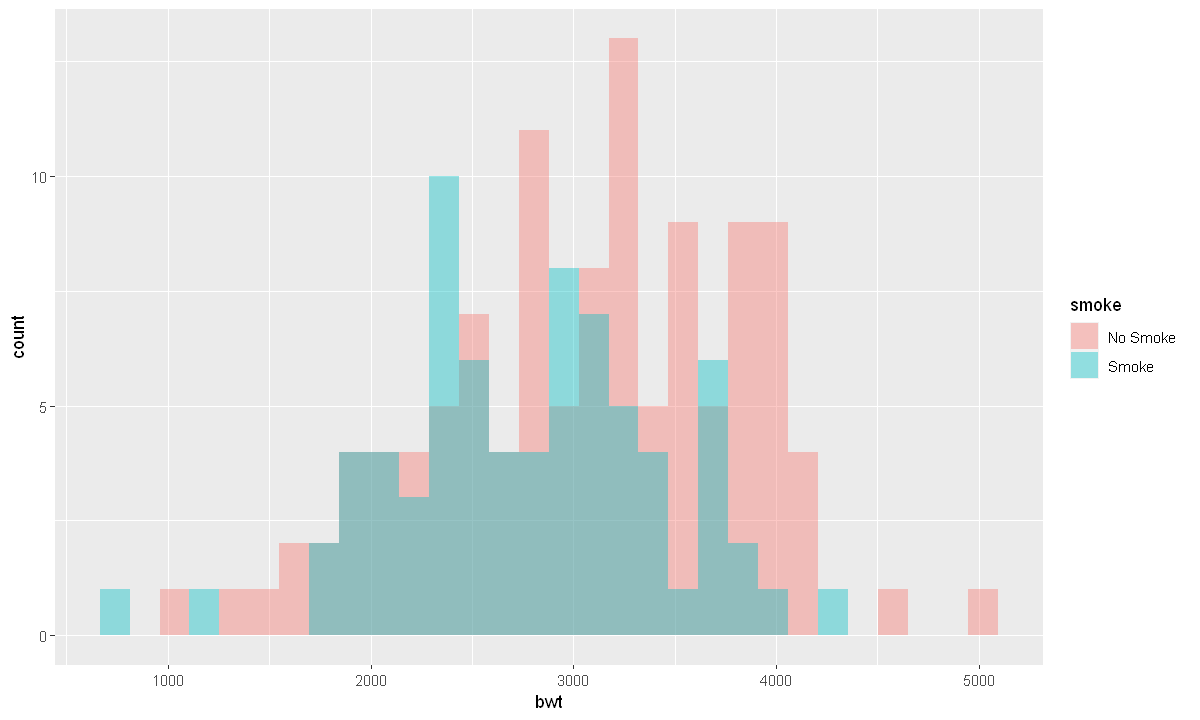

In [50]:
# 把smoke转化为因子
birthwt$smoke <- factor(birthwt$smoke)

options(repr.plot.width=10, repr.plot.height=6)
# 把smoke映射给fill，取消条形堆叠，并使图形半透明
ggplot(birthwt, aes(x=bwt, fill=smoke)) + 
 geom_histogram(position = 'identity', alpha = 0.4)

语句position = 'identity' 很重要。没有它，ggplot()函数会将直方图的条形进行垂直堆积，这样的话更难以看清每组数据的分布信息.

## 绘制密度曲线

💡**方法**  
运行 geom_density()函数，并映射一个连续型变量到x

In [51]:
head(faithful,2)

,eruptions,waiting
,<dbl>,<dbl>
1,3.6,79
2,1.8,54


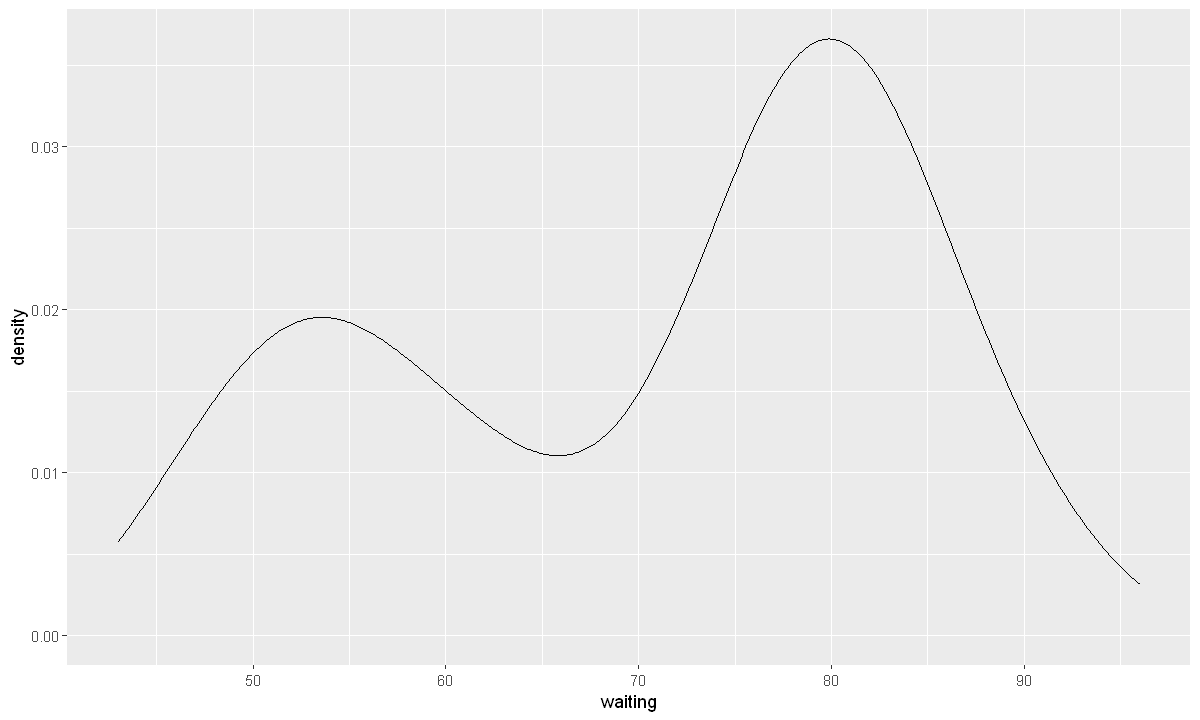

In [52]:
ggplot(faithful, aes(x=waiting)) + geom_density()

与`geom_histogram()`函数类似，geom_density()函数只需要数据框中的一列作为参数。

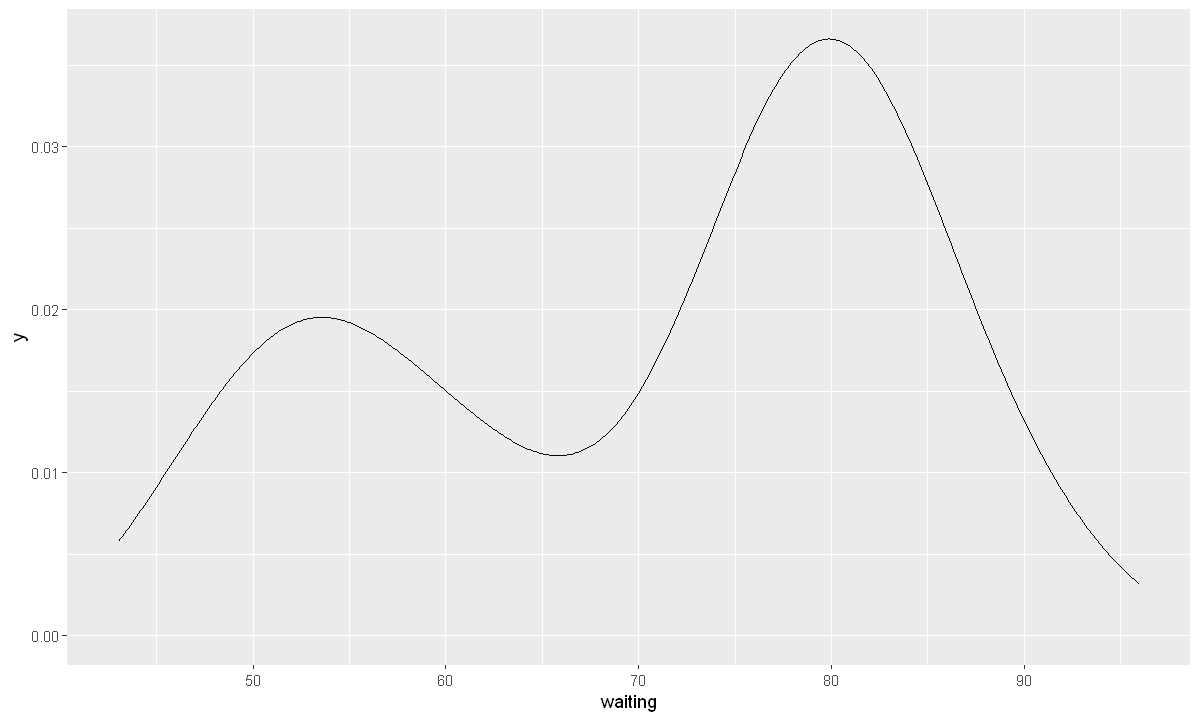

In [53]:
ggplot(faithful, aes(x=waiting)) + geom_line(stat='density') + 
 expand_limits(y=0)

上面提到的第二种方法是使用`geom_line()`函数，并告诉其使用`density()`统计变换.这种方法与第一种使用`geom_density()`函数的方法在本质上是相同的


与使用`geom_histogram()`函数类似,如果想快速地绘制未在数据框中地数据地直方图，可以在运行上述命令时，将数据框设定为NULL，同时向ggplot()函数传递一个包含所需数据地向量作为参数。

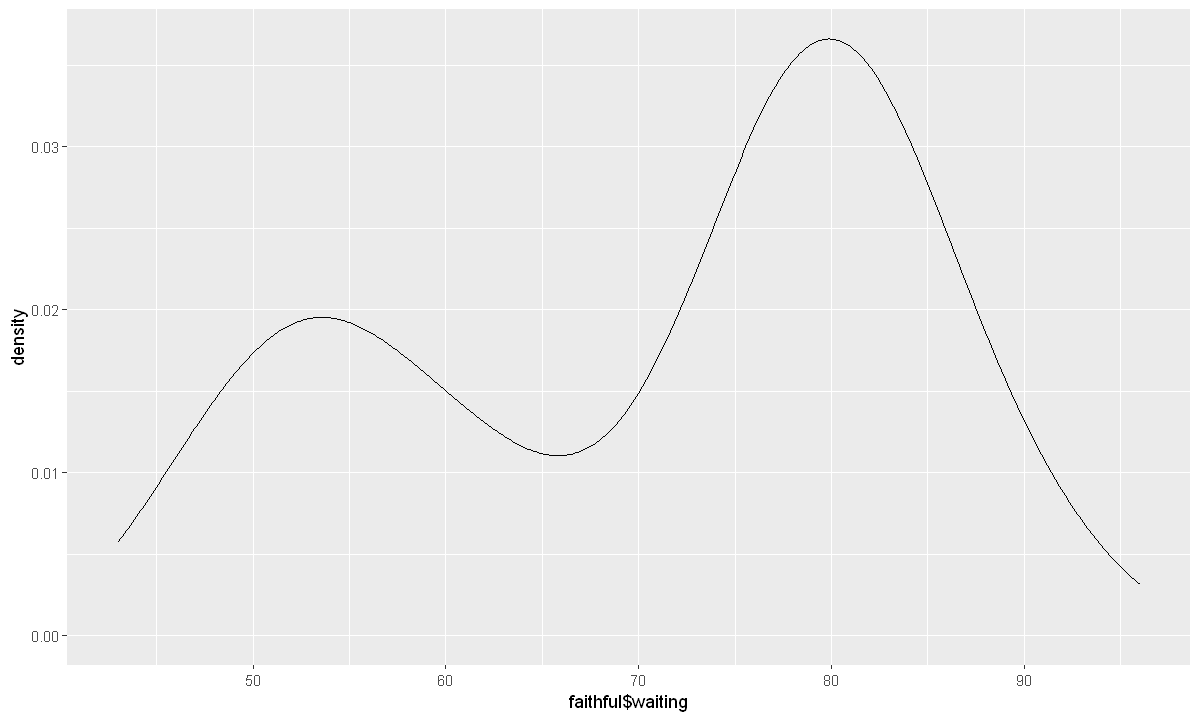

In [54]:
ggplot(NULL, aes(x=faithful$waiting)) + geom_density()

核密度曲线是基于样本数据对总体分布做出的一个估计，曲线的光滑程度取决于核函数地带宽，带宽越大，曲线越光滑。带宽可以通过adjust参数进行设置，其默认值为1.

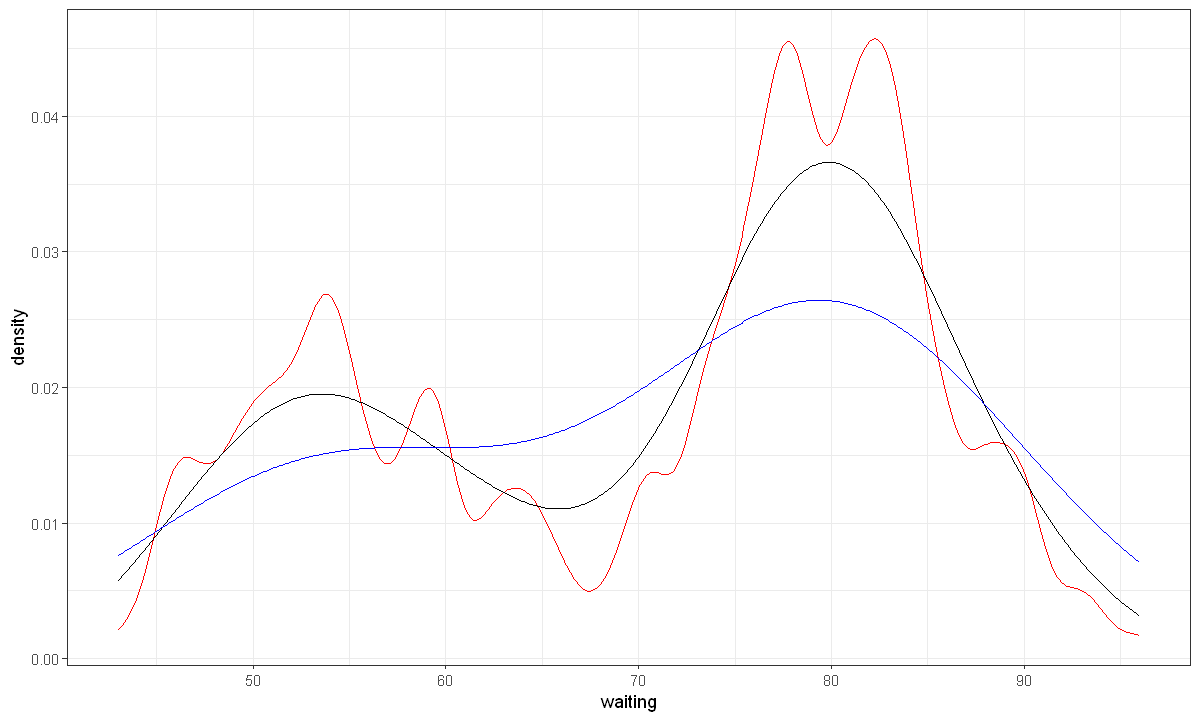

In [57]:
ggplot(faithful, aes(waiting)) + 
 theme_bw() +
 geom_line(stat='density', adjust=.25, color='red') + 
 geom_line(stat='density') + 
 geom_line(stat='density', adjust=2, color='blue')

本例中，x轴地坐标范围是自动设定的，以使其能包含相应的数据，但这会导致曲线的边缘被剪裁。想要展示曲线的更多部分，可以手动设定x轴的范围。同时，设置alpha=.2 使填充色的透明度为80%

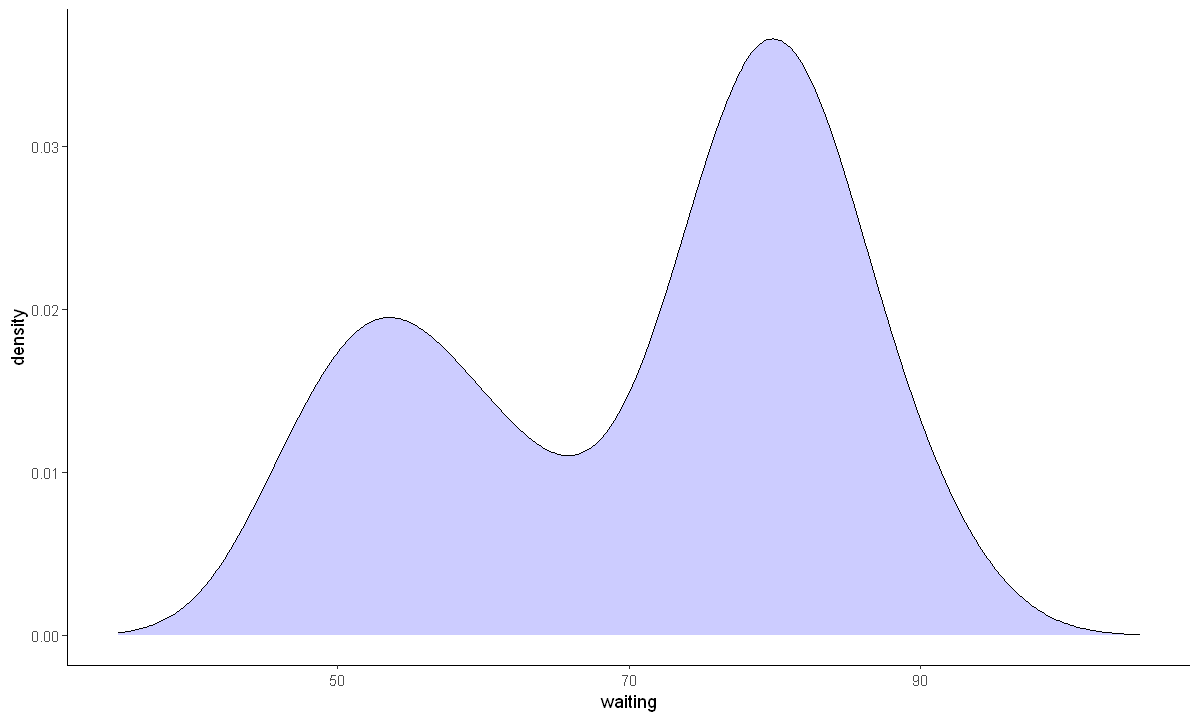

In [61]:
ggplot(faithful, aes(x=waiting)) + geom_density(fill='blue', alpha=.2) + xlim(35, 105) + theme_classic()

将密度曲线叠加到直方图上，可以对观测值的理论分布和实际分布进行比较。由于密度曲线对应的y轴坐标较小，如果将其叠加到未做任何变换的直方图上，曲线可能会很难看清楚。通过设置y=..density..可以减少直方图的标度以使其与密度曲线的标度相匹配。这里，我们先运行geom_histogram()函数绘制直方图之后，运行geom_density()函数将密度曲线绘制到更上一层的图层上

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing missing values (geom_bar)."


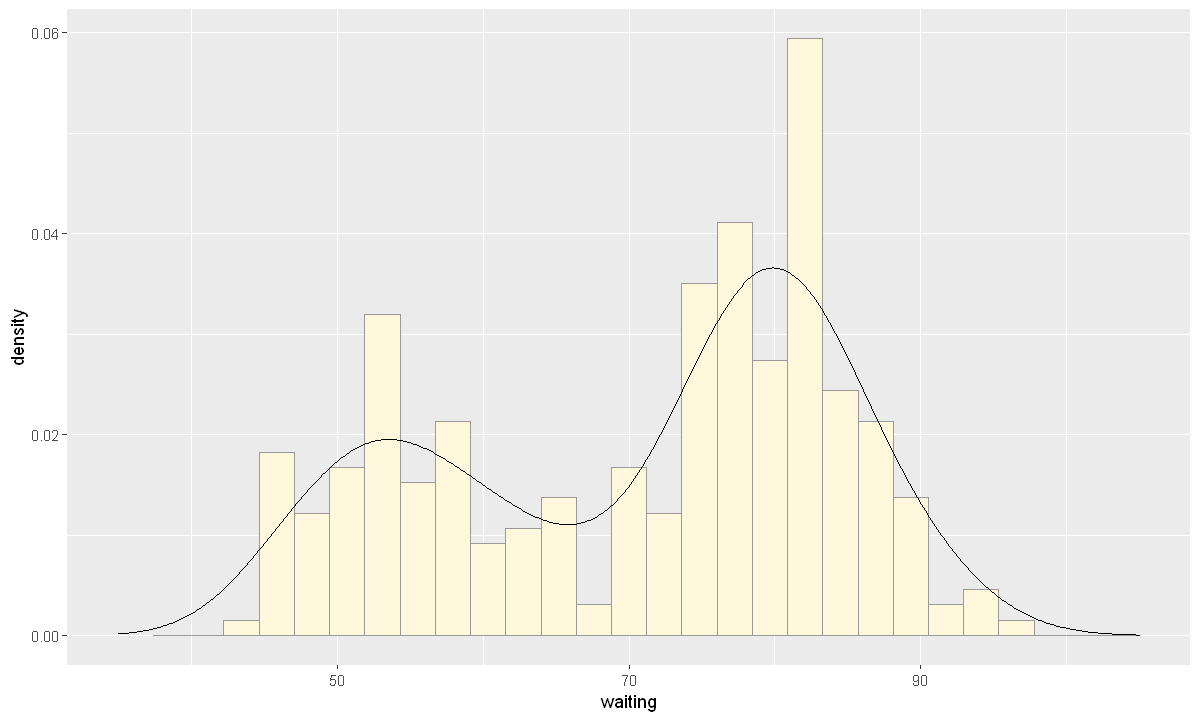

In [62]:
ggplot(faithful, aes(x=waiting, y=..density..)) + 
 geom_histogram(fill='cornsilk', color='grey60', size=.2) + 
 geom_density() + 
 xlim(35,105)

## 基于分组数据绘制分组密度曲线

使用`geom_density()`函数，将分组变量映射给color或fill等图形属性即可。分组变量必须是因子型或者字符串向量。数据集birthwt对应的最佳分组变量smoke被存储为数值型，所以，我们必须先将其转化为因子：

In [2]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.0.5"


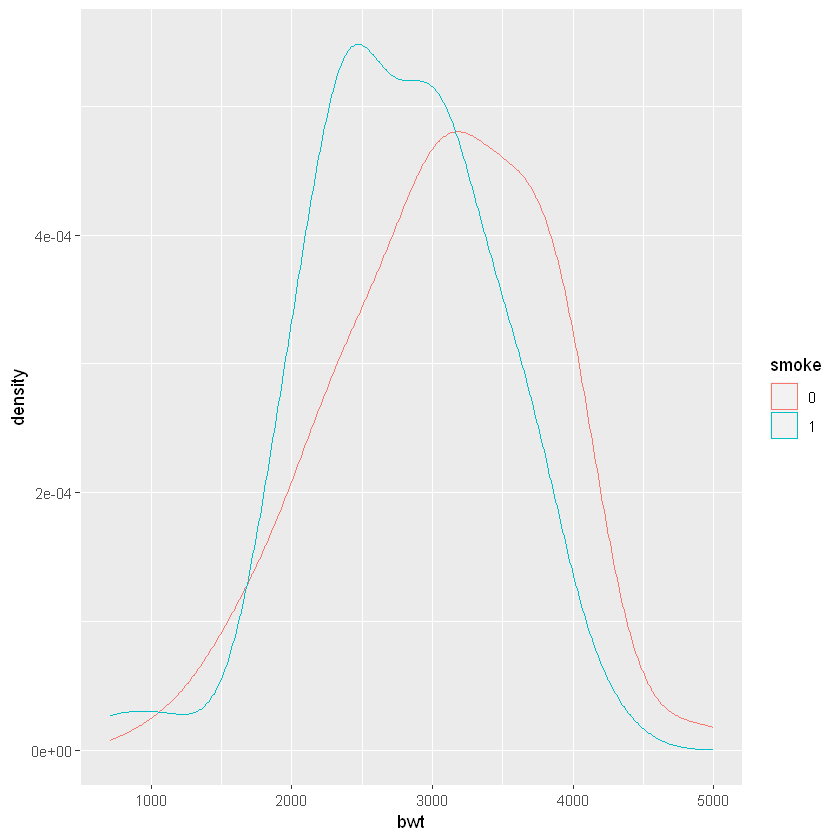

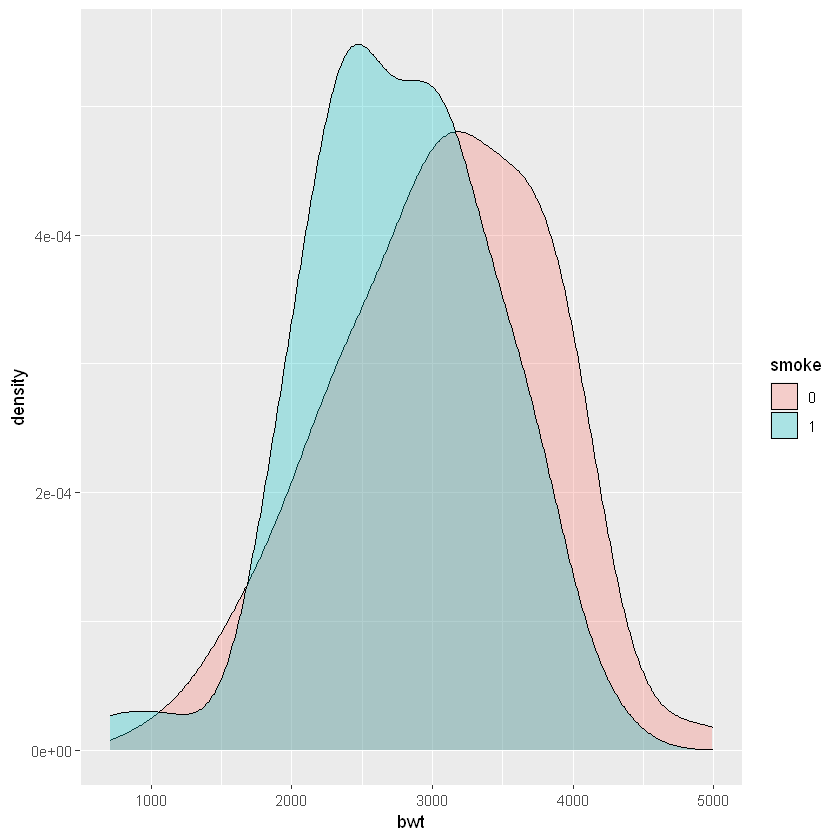

In [5]:
birthwt1 <- birthwt

# 把变量smoke转化为因子
birthwt1$smoke <- factor(birthwt1$smoke)

# 把变量smoke映射给color
ggplot(birthwt1, aes(x=bwt, color=smoke)) + geom_density()

# 把变量smoke映射给fill, 设置alpha使填充色半透明
ggplot(birthwt1, aes(x=bwt, fill=smoke)) + geom_density(alpha=.3)

💬**讨论**  
绘制上图时，要求所用到的数据都包含在一个数据框里，且数据框的其中一列是可用于分组的分类变量。

In [7]:
print(head(birthwt,1))

   low age lwt race smoke ptl ht ui ftv  bwt
85   0  19 182    2     0   0  0  1   0 2523


观察一下变量smoke（抽烟与否）与变量bwt（出生体重，单位是克）的关系。变量smoke对应的取值是0和1，但由于其被存储为数值型向量，因而ggplot()函数不知道应当将其作为分类变量来处理。这时有两种方法可以选择，一是将数据框中相应的列转化为因子，而是通过在`aes()`函数内部使用命令factor(smoke)，来告诉ggplot函数把smoke当作因子来处理。

另一种对分组数据分布进行可视化的方法是使用分面(facet)。

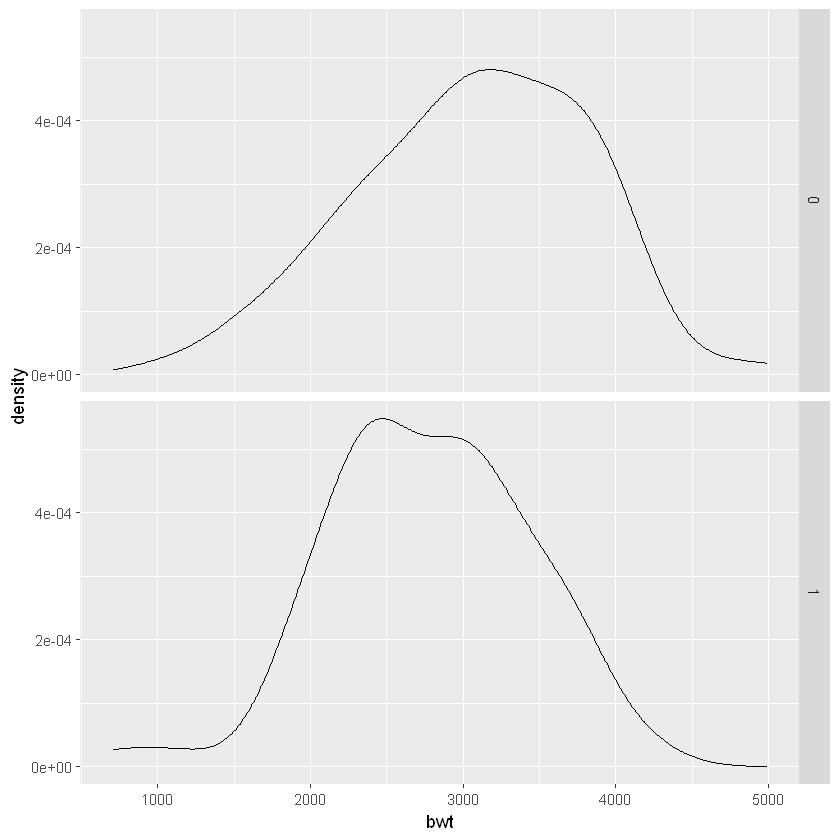

In [8]:
ggplot(birthwt1, aes(x=bwt)) + geom_density() + facet_grid(smoke ~ .)

修改分面标签

In [9]:
levels(birthwt1$smoke)

[1] "0" "1"

In [10]:
library(plyr)

In [11]:
birthwt1$smoke <- revalue(birthwt1$smoke, c('0'='No Smoke', '1'='Smoke'))

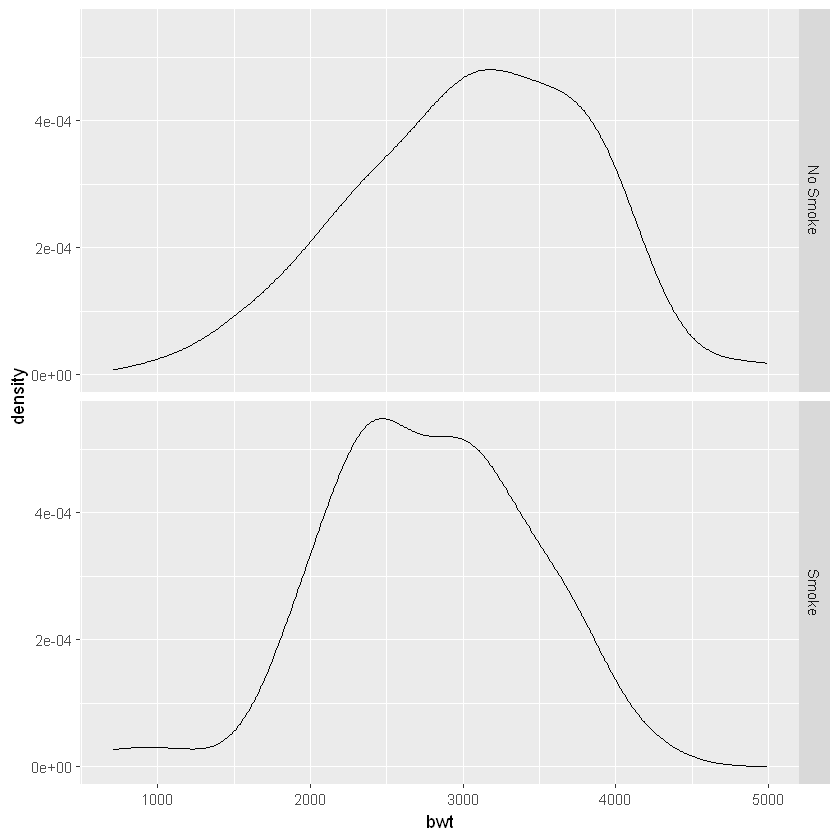

In [12]:
ggplot(birthwt1, aes(x=bwt)) + geom_density() + facet_grid(smoke ~ .)

如果要将直方图和密度曲线绘制在一张图上，最佳方案是利用分面，这是因为将两个直方图绘制在同一张图上的其他方法都不易于解释。  
操作时，需设定y=..density..,这样系统会将直方图的y轴标度降到跟密度曲线相同。

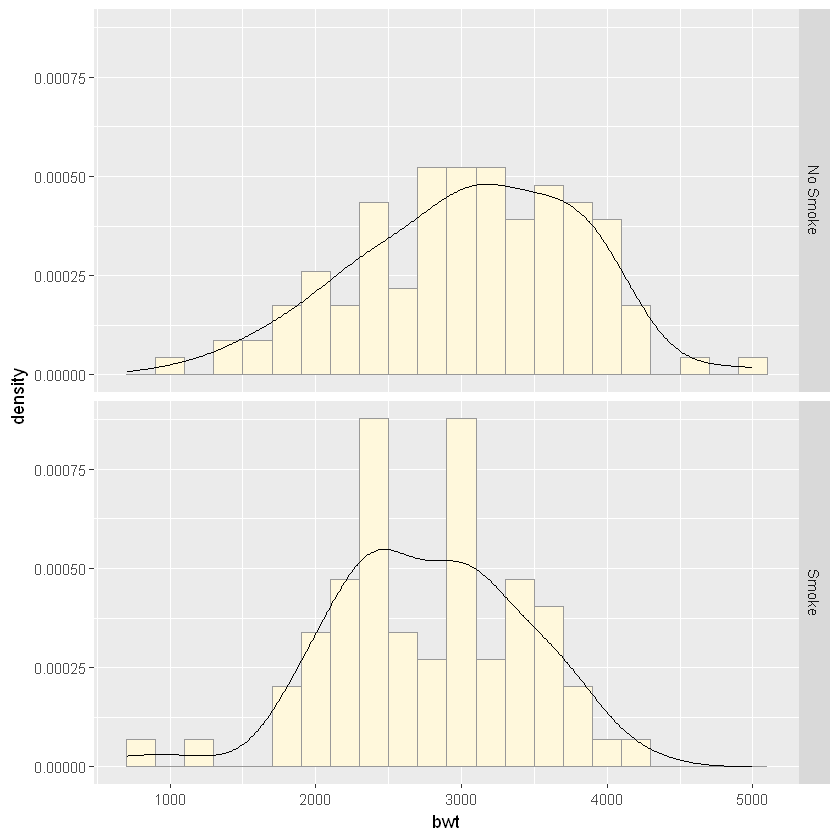

In [15]:
ggplot(birthwt1, aes(x=bwt, y=..density..)) + 
 geom_histogram(binwidth = 200, fill='cornsilk', color='grey60', size=.2) + # 累计图
 geom_density() + # 密度图
 facet_grid(smoke ~ .) # 分面

## 绘制频数多边形

💡**方法**  
使用geom_freqpoly()函数即可  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



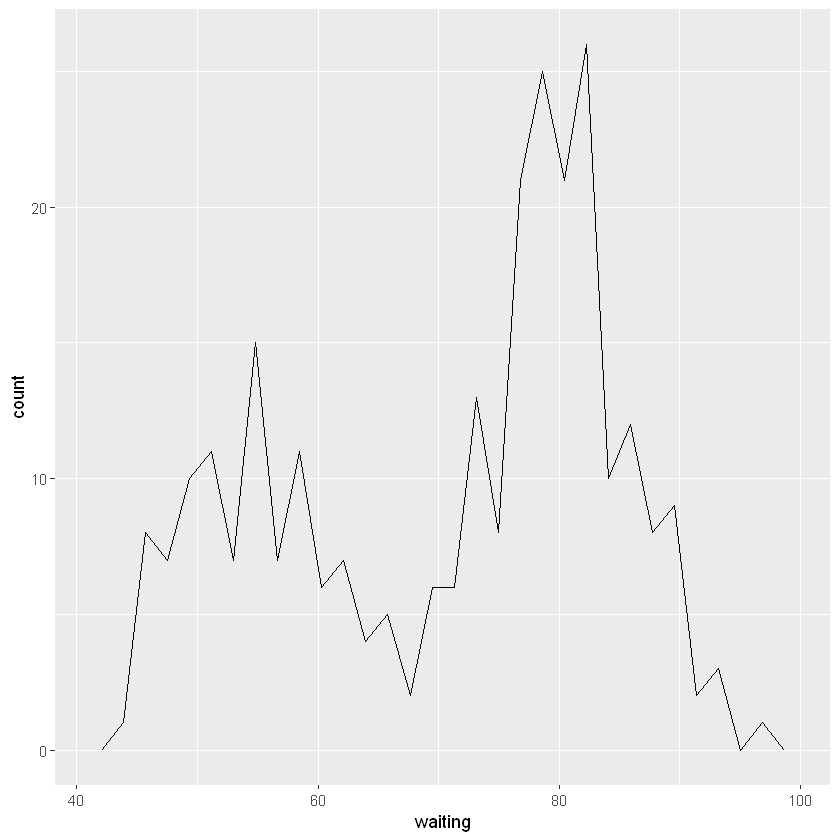

In [16]:
ggplot(faithful, aes(x=waiting)) + geom_freqpoly()

💬**讨论**  
频数多边形看起来跟核密度曲线相似，但其传递的信息类似于直方图。它跟直方图都描述了数据本身的信息，而核密度曲线只是一个估计，且需要人为输入带宽参数。

与直方图类似，可用 binwidth 参数控制频数duo'bian'xing

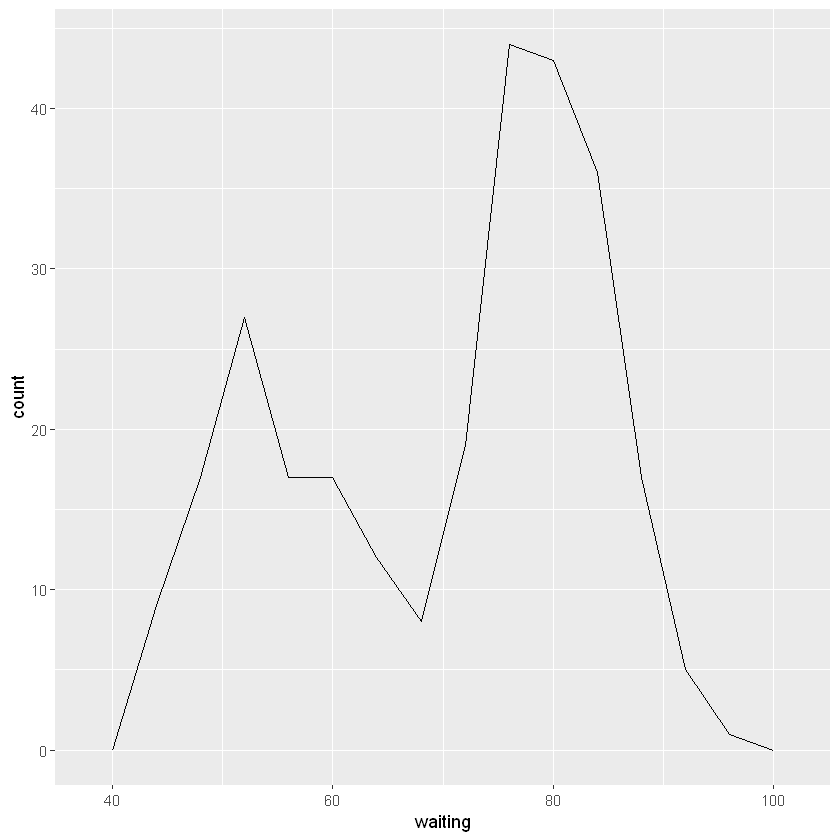

In [2]:
ggplot(faithful, aes(x=waiting)) + geom_freqpoly(binwidth=4)

## 绘制基本箱线图

使用`geom_boxplot()`函数，分别映射一个连续型变量和一个离散型变量到y和x即可

In [2]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 4.0.5"


In [3]:
head(birthwt,2)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551


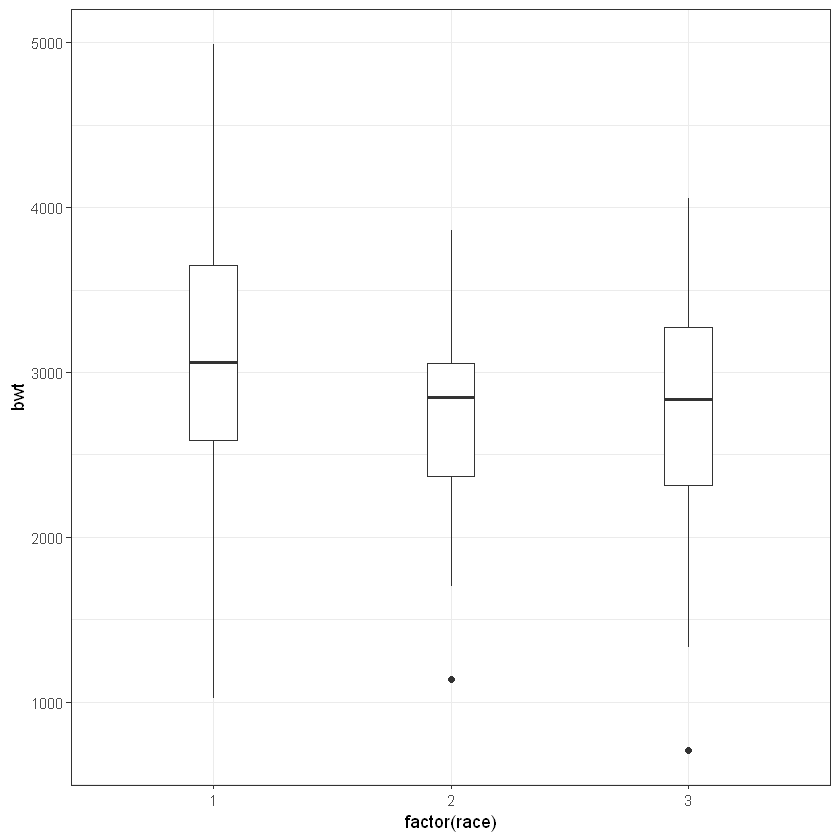

In [7]:
ggplot(birthwt, aes(x=factor(race), y=bwt)) +
 theme_bw() + 
 geom_boxplot(width=0.2) # 修改箱的宽度

系统按变量race将数据分为三组。变量race对应的值为1、2、3，然而，由于其被存储为数值型向量，ggplot()不知道如何将其当作分组变量来处理。为了使ggplot()能将其作为分组变量处理，我们可以调整数据框把变量race转化为因子，或者通过在aes()语句内部使用factor(race)告诉ggplot()函数把race当作因子处理。

箱线由 箱 和 "须"(whisker)两部分组成。  
箱的范围是从数据的下四分位数到上四分位数，也就是常说的四分位距（IQR）。箱的中间有一条表示中位数的线。  
须则是从箱的边缘出发延伸至1.5倍四分位距内的最远的点。如果图中有超过须的数据点，则其被视为异常值，并以点来表示。  

![Boxplot on a normal distribution](https://pic3.zhimg.com/80/v2-2c3a44229a91ba47590c2c1735de45b6_1440w.png)

💡 如果图中异常值较多且图形有重叠的话，可以通过设置 `outlier.size` 和 `outlier.shape` 参数修改异常点的大小和点形。异常点默认的大小是2，点形是16（实心圆）。

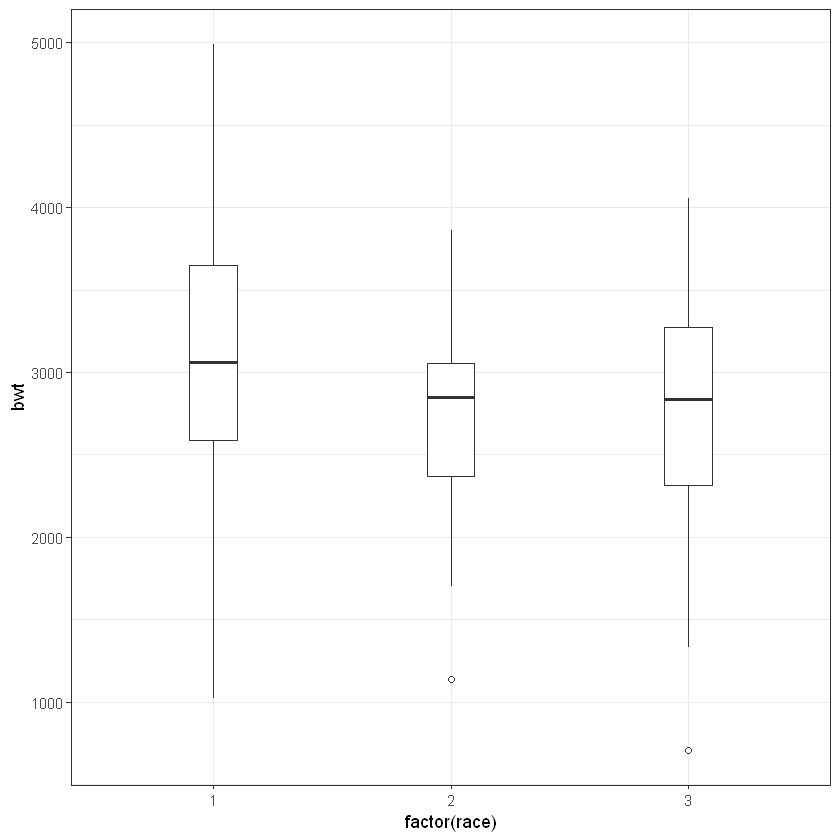

In [8]:
ggplot(birthwt, aes(x=factor(race), y=bwt)) +
 theme_bw() + 
 geom_boxplot(width=0.2, outlier.size = 1.5, outlier.shape = 21)

⚠单组数据绘制箱线图  
必须给x参数映射一个特定值。

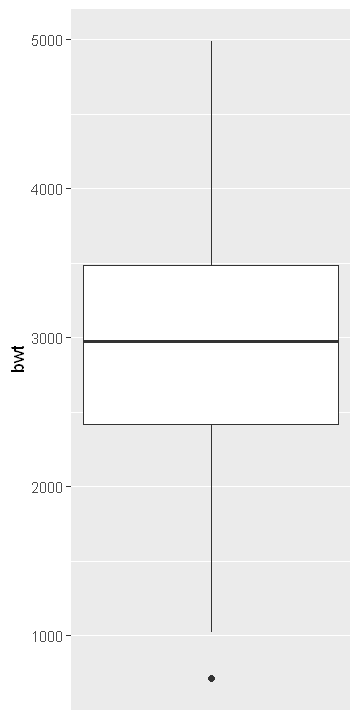

In [11]:
options(repr.plot.width = 3, repr.plot.height = 6)
ggplot(birthwt, aes(x=1, y=bwt)) + geom_boxplot() + 
 scale_x_continuous(breaks = NULL) + 
 theme(axis.title.x = element_blank())

🧠 ：这里计算分位数的方法与 R base 包中 `boxplot()` 函数所使用的计算方法略有不同。当样本量较小时，这个差异会很明显。

## 向箱线图添加槽口  

❓ 如何向箱线图添加槽口（notch）以比较各组数据的中位数是否有差异？  
💡 在`geom_boxplot()`函数设定notch=TRUE

notch went outside hinges. Try setting notch=FALSE.



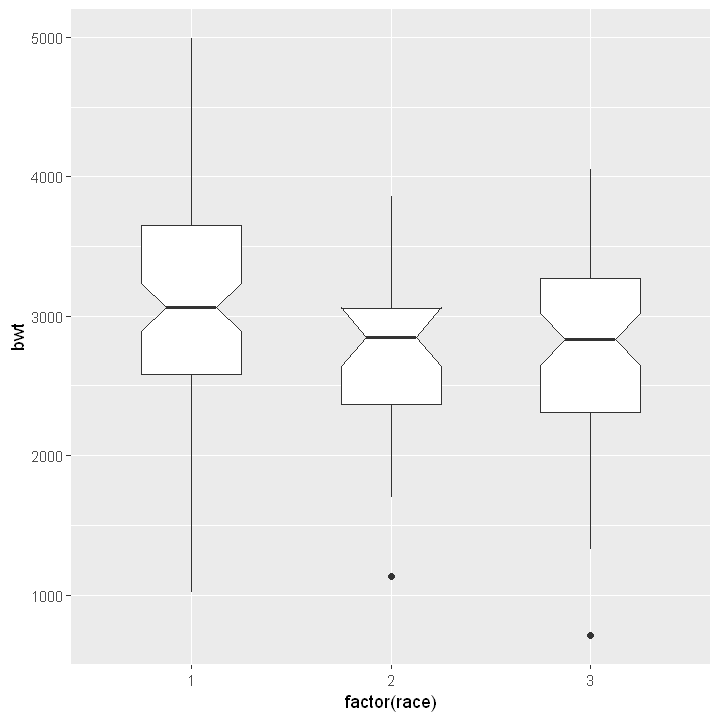

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot(width=0.5, notch = TRUE)

以上信息表明：置信域（槽口）超过了某个箱子的边界。本例中，中间箱子对应的槽口的上边界溢出箱体，但由于溢出的距离较小，因此，在最终的绘图输出中几乎看不到。槽口溢出到箱体的边界并没有什么实质错误，只是在一些极端案例中会看起来很奇怪。

💬箱线图中的槽口用来帮助查看不同分布的中位数是否有差异。如果各箱线图的槽口互不重合，说明各中位数有差异。  


## 向箱线图添加均值

💡 用`stat_summary()`函数。箱线图中的均值常以钻石形状来表示。

Warning message:
"Removed 3 rows containing missing values (geom_segment)."


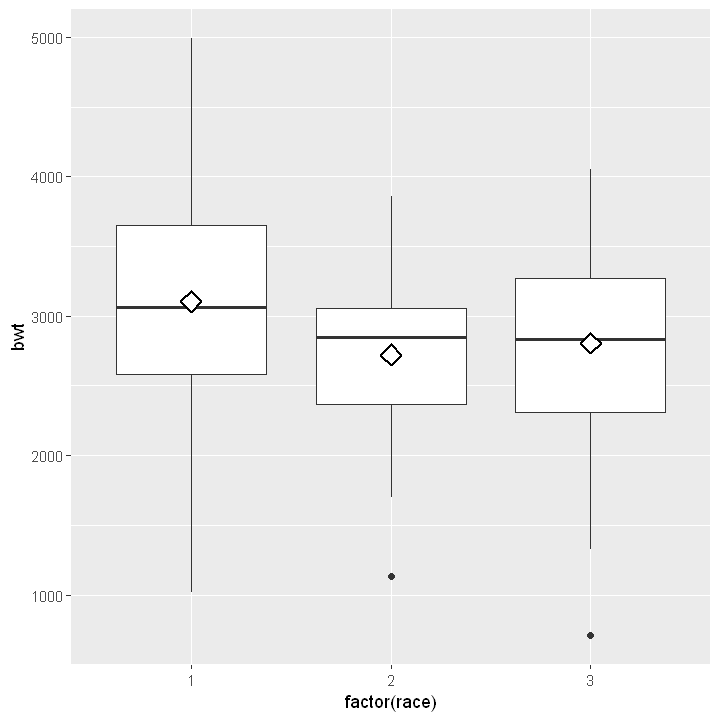

In [22]:
ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot() +
 stat_summary(fun = "mean", size = 1, shape = 23, fill = 'white')

💬 箱线图中间的水平线表示的是 <font color='blue'>中位数</font> , 而不是 <font color='red'>均值</font> .

## 绘制小提琴图

💡 使用`geom_violin()`函数即可

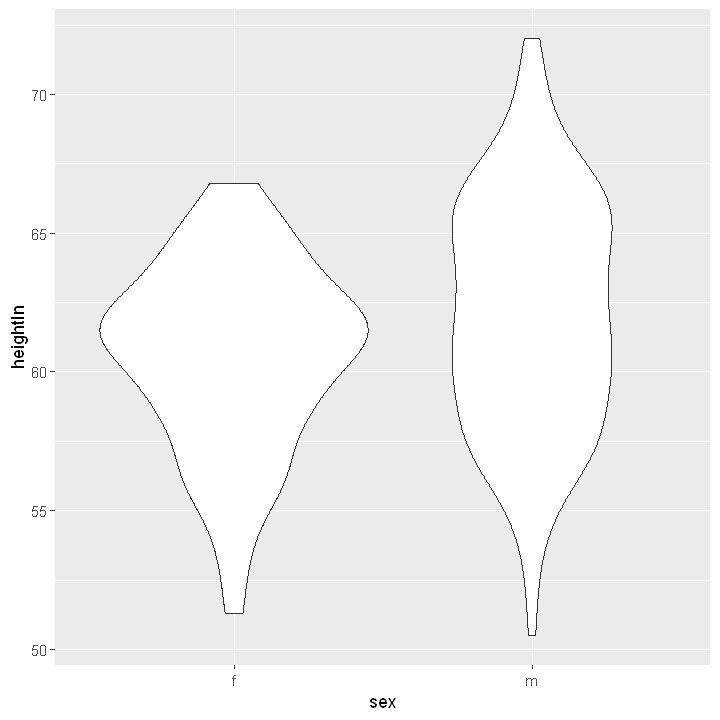

In [23]:
p <- ggplot(heightweight, aes(x=sex, y=heightIn))
p + geom_violin()

小提琴图也是核密度估计，但绘图时对核密度曲线取了镜像以使形状对称。  
设置`outlier.color=NA`可以隐去箱线图中的异常点。  
默认坐标范围是最小值到最大值，扁平的尾部在这两个位置处截断。通过设置`trim=FALSE`可以保留小提琴的尾部。

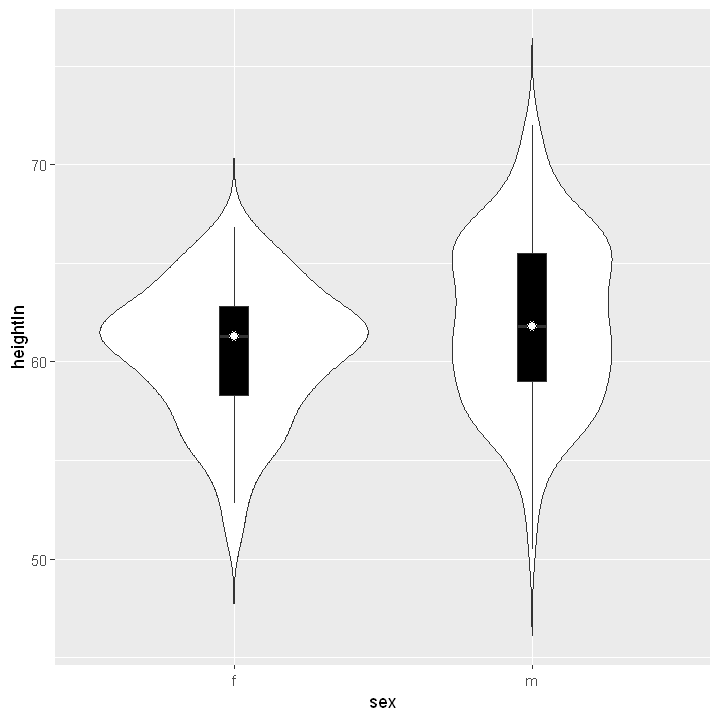

In [25]:
p + geom_violin(trim = FALSE) + 
 geom_boxplot(width=0.1, fill='black', outlier.color = NA) + 
 stat_summary(fun = median, geom = 'point', fill = 'white', shape = 21, size = 2.5)

🧠 **小提琴图的面积**  
默认情况下，系统会对小提琴图进行标准化以使得各组数据对应的图的面积一样（截断尾部时也如此）。如果不想使各组数据对应的图的面积一样，可以通过设置 `scale="count"` 使得图的面积与每组观测值数目成正比。

使用 `adjust` 参数可以调整小提琴图的平滑程度，该参数的默认值是1：更大的值对应于更平滑的曲线。

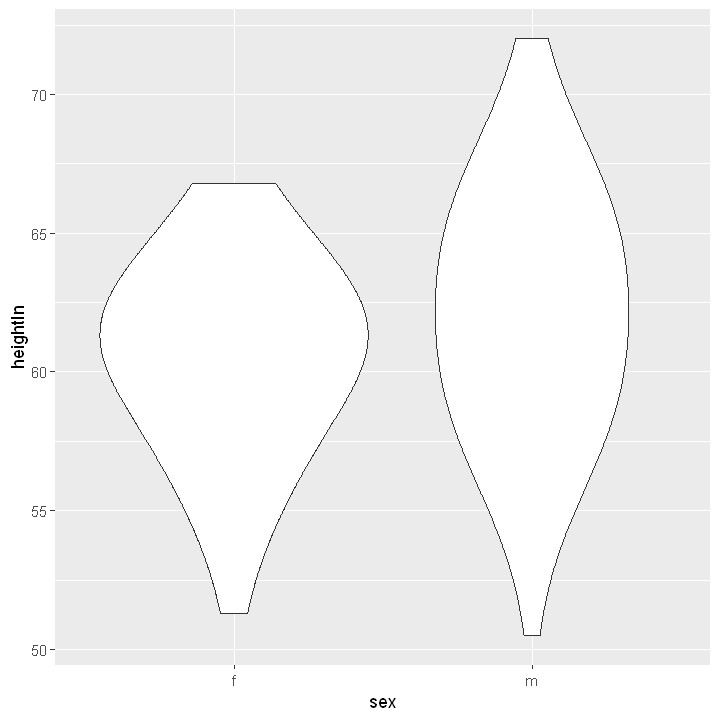

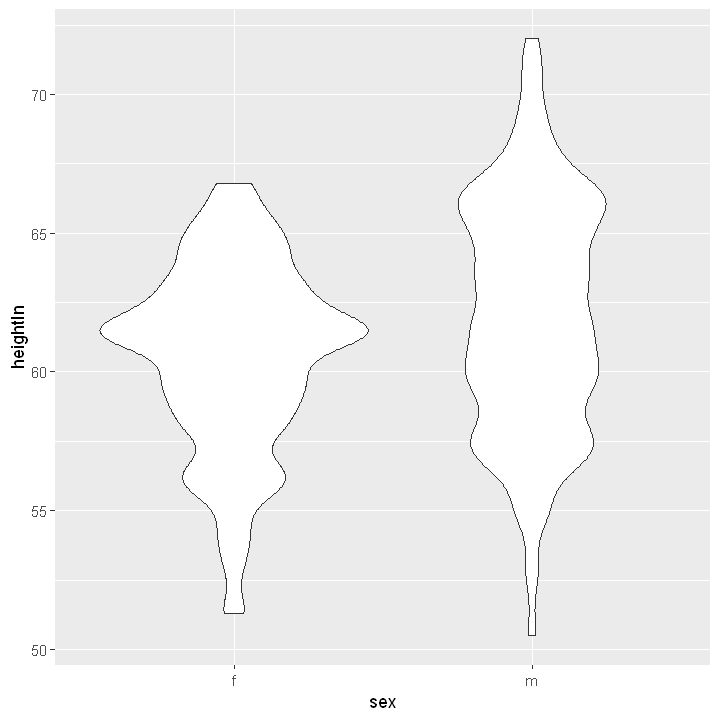

In [27]:
# 更平滑
p + geom_violin(adjust = 2 )

# 欠平滑
p + geom_violin(adjust = 0.5  )

## 绘制 Wilkinson 点图

使用 geom_dotplot() 函数。

In [4]:
countries2009

Name,Code,Year,GDP,laborrate,healthexp,infmortality
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



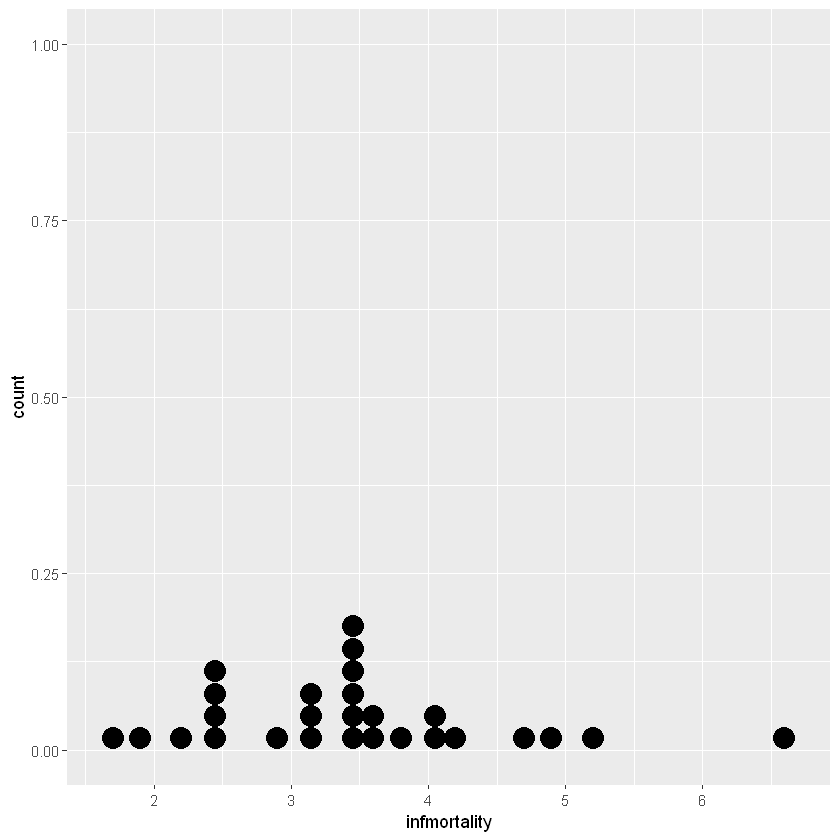

In [8]:
countries2009 <- subset(countries, Year==2009 & healthexp>2000)

p <- ggplot(countries2009 ,aes(x=infmortality))

p + geom_dotplot()

💬**讨论**  
这种点图有时叫 `Wilkinson` 点图。与Cleveland点图不同。这种图中，点的分组和排列取决于数据，每个点的宽度对应了最大的组距。系统默认的最大组距是数据范围的1/30，我们可以通过binwidth参数对其进行调整。  
默认情况下，`geom_dotplot()`函数沿着x轴方向对数据进行分组，并在y轴方向上对点进行堆积。图中各点看起来是堆积的，但受限于ggplot2的技术，图形上y轴的刻度线没有明确的含义。使用`scale_y_continuous()`函数可以移除y轴标签。  
使用`geom_rug()`函数以标示数据点的具体位置。  

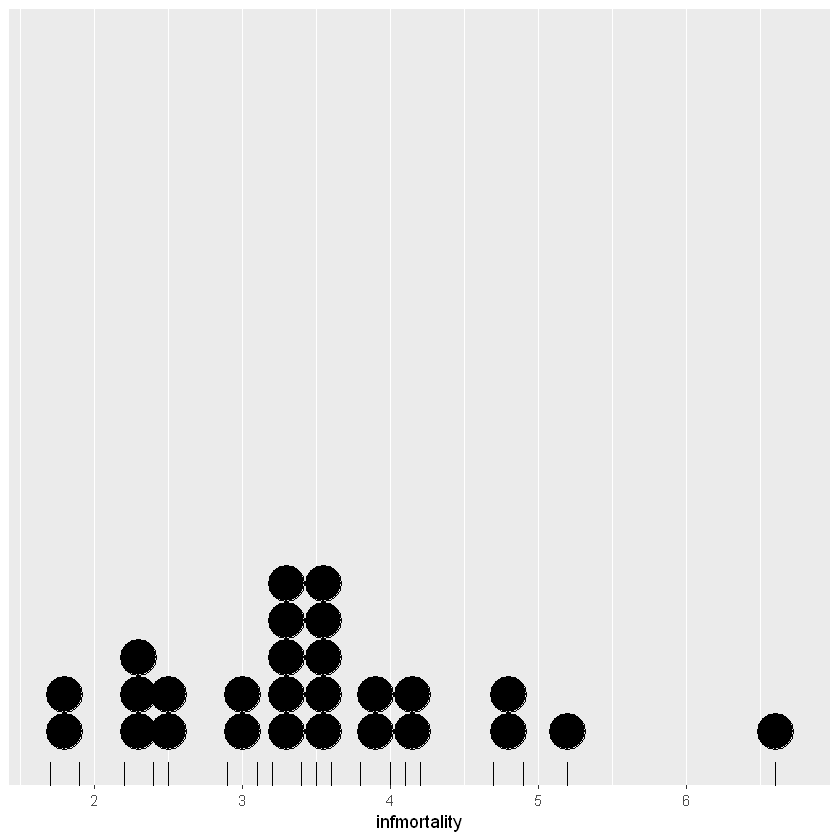

In [9]:
p + geom_dotplot(binwidth=.25) + geom_rug() + 
 scale_y_continuous(breaks = NULL) +   # 移除刻度线
 theme(axis.title.y = element_blank()) # 移除坐标轴标签

你可能会注意到数据堆在水平方向上不是均匀分布的。根据默认的dotdensity分组算法，每个数据堆都放置在它表示的数据点的中心位置。要使用像直方图那样的固定间距的分组算法，可以令`method="histodot"`。你将会发现图中的数据堆并不是居中放置的。

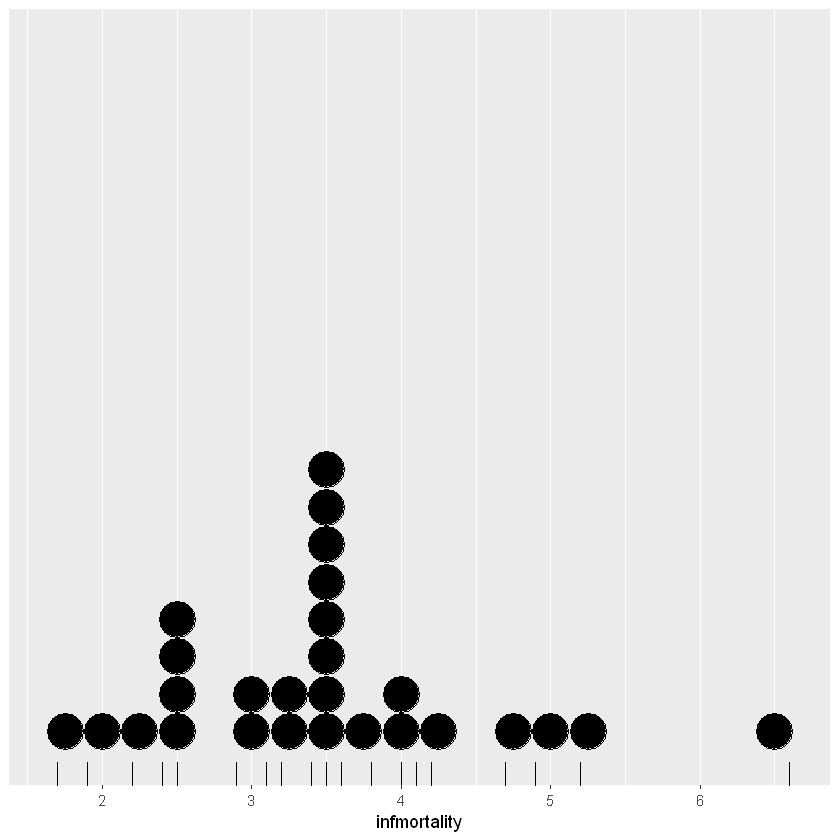

In [10]:
p + geom_dotplot(method = "histodot", binwidth = .25) + 
 geom_rug() + 
 scale_y_continuous(breaks = NULL) + theme(axis.title.y = element_blank())

点图也能进行中心堆叠，或者采用一种奇数与偶数数量保持一致的中心堆叠方式。

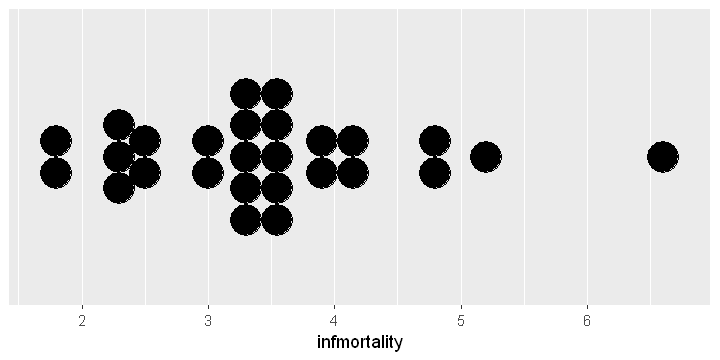

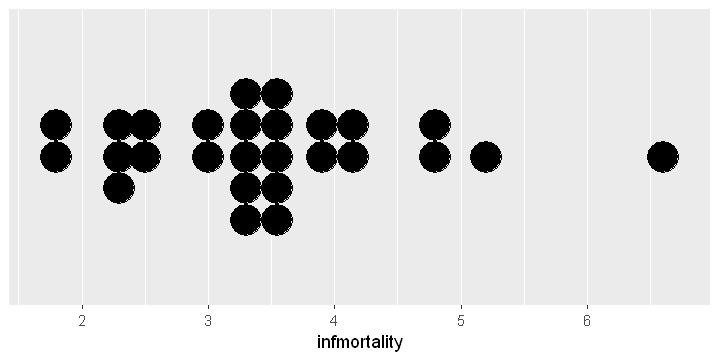

In [17]:
# 设置 stackdir="center" 或者 stackdir="centerwhole"
options(repr.plot.width = 6, repr.plot.height = 3)
p + geom_dotplot(binwidth = .25, stackdir = "center") + 
 scale_y_continuous(breaks = NULL) + theme(axis.title.y = element_blank())

p + geom_dotplot(binwidth = .25, stackdir = "centerwhole") + 
 scale_y_continuous(breaks = NULL) + theme(axis.title.y = element_blank())

## 基于分组数据绘制分组点图

为了比较多组数据，可以通过设定binaxis="y"将数据点沿着y轴进行堆叠，并沿着x轴分组。

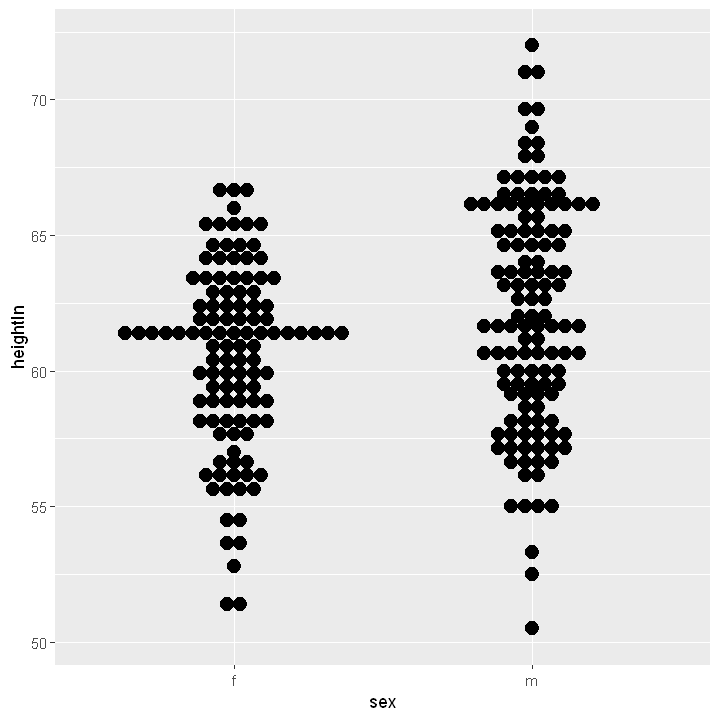

In [22]:
options(repr.plot.width = 6, repr.plot.height = 6)

ggplot(heightweight, aes(x=sex, y=heightIn)) + 
 geom_dotplot(binaxis="y", binwidth = .5, stackdir = "center")

💬**讨论**  
有时，我们会将点图叠加在箱线图上。这种情况应该将数据点变为空心，同时隐去箱线图上的异常点。

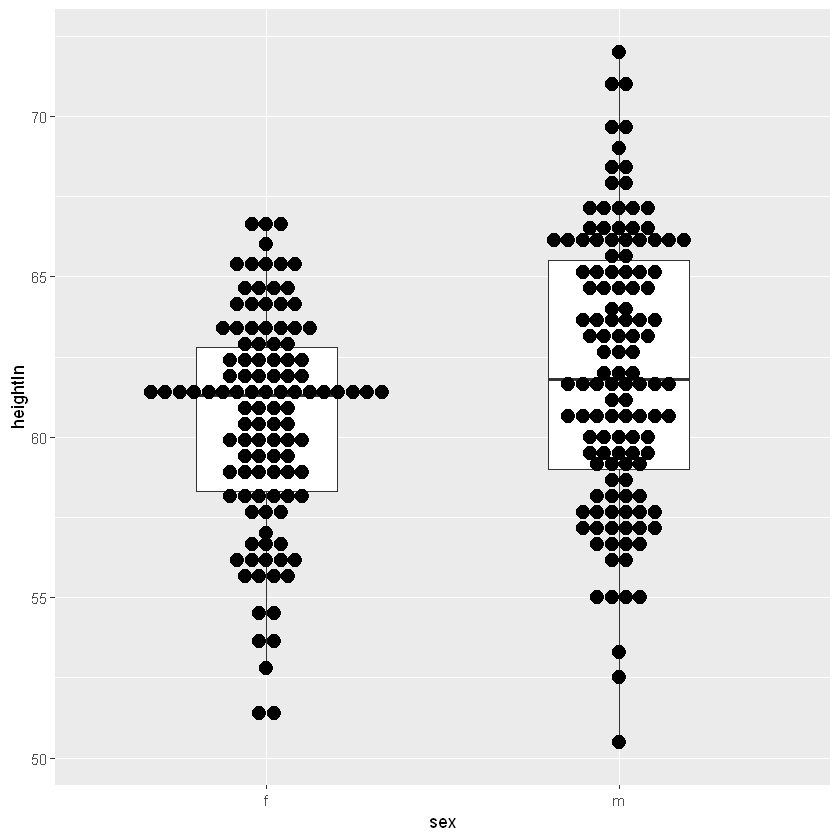

In [2]:
ggplot(heightweight, aes(x=sex, y=heightIn)) + 
 geom_boxplot(outlier.color = NA, width = .4) + 
 geom_dotplot(binaxis="y", binwidth = .5, stackdir = "center", fill= 'black', dotsize = .9)

💡 也可以将点图置于箱线图旁边。  
🧠 通过将x变量视作数值型变量并对其加减一个微小的数值移动箱线图和点图的位置，使点图位于箱线图的左边。  
当x变量被视为数值型变量时，必须同时指定group,否则，数据会被视为单独一组，从而，只绘制一个箱线图和点图。最后，由于x轴被视为数值型，系统会默认x轴刻度标签的数值：必须通过`scale_x_continous()`函数对其进行调整，以使得x轴的刻度标签显示为与因子水平相对应的文本：

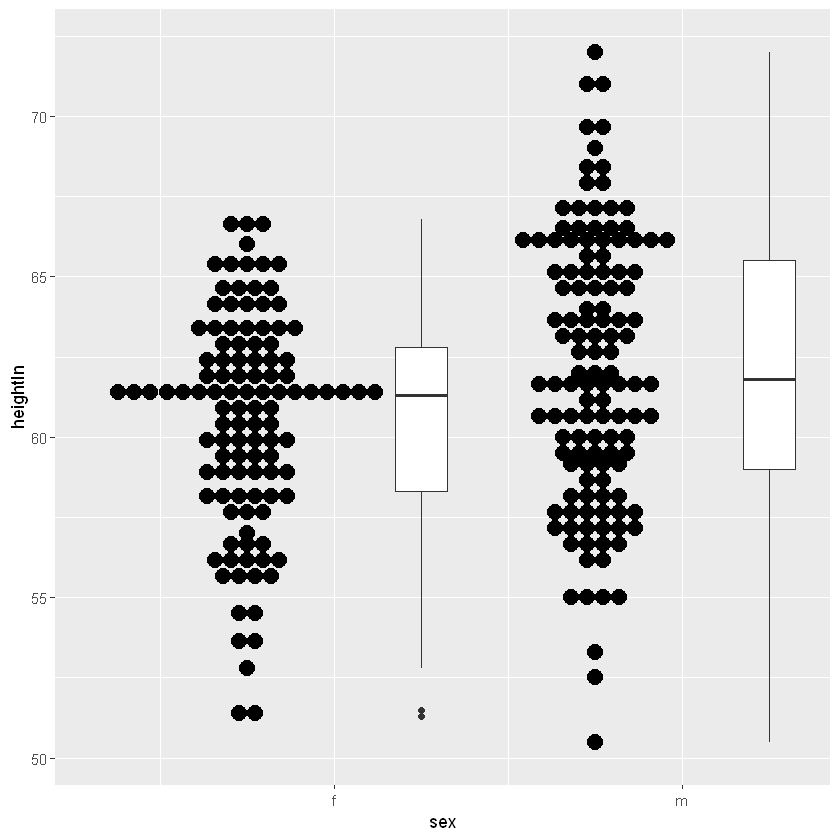

In [6]:
ggplot(heightweight, aes(x=sex, y=heightIn)) + 
 geom_boxplot(aes(x=as.numeric(sex) + .25, group=sex), width=.15) + 
 geom_dotplot(aes(x=as.numeric(sex) - .25, group=sex), binaxis = 'y',
             binwidth=.5, stackdir='center') + 
 scale_x_continuous(breaks = 1:nlevels(heightweight$sex),
                   labels = levels(heightweight$sex))

## 绘制二维数据的密度图

使用`stat_density2d()`函数。该函数会给出一个基于数据的二维核密度估计。

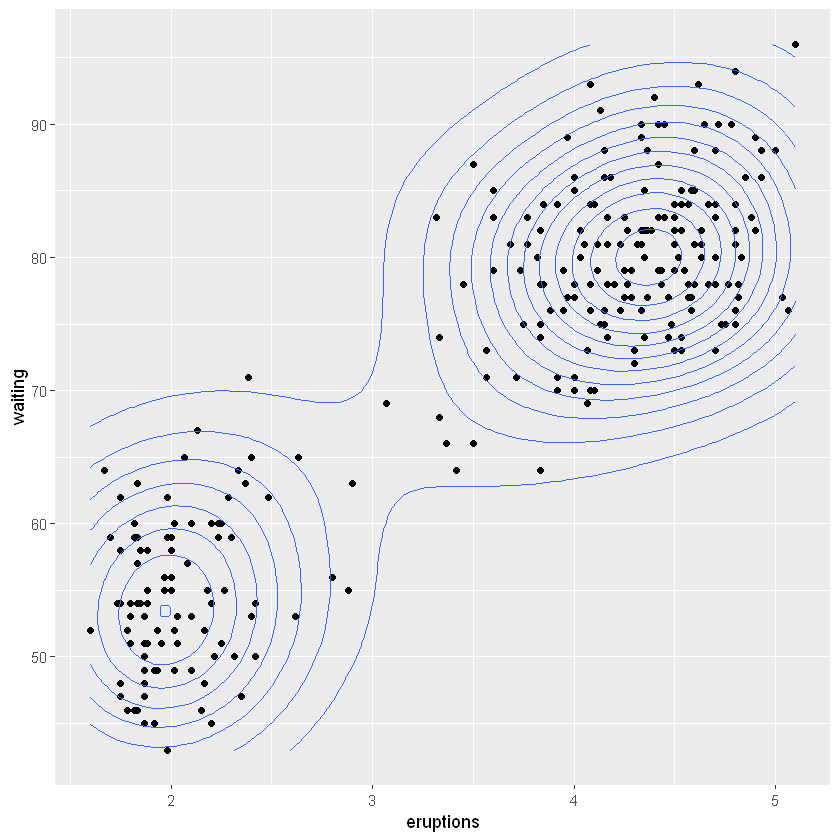

In [7]:
# 基础图：绘制数据点和密度等高线图
p <- ggplot(faithful, aes(x=eruptions, y=waiting)) 

p + geom_point() + geom_density2d()

也可以使用 ..level.. 将密度曲面的高度映射给等高线的颜色

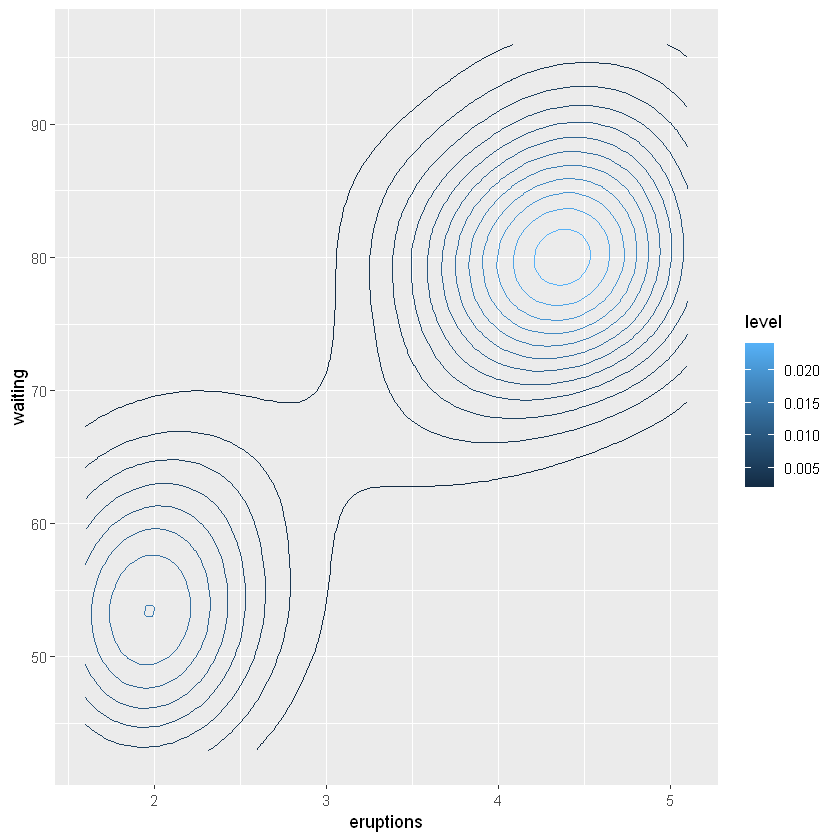

In [8]:
# 将height映射到颜色的等高线
p + stat_density2d(aes(color=..level..))

💬**讨论**  
二维核密度估计类似于stat_density()函数生成的一维核密度估计，不过，前者展示图形的方法有所不同。系统默认使用等高线，也可以使用瓦片图（tile）将密度估计映射给填充色或者瓦片图的透明度。

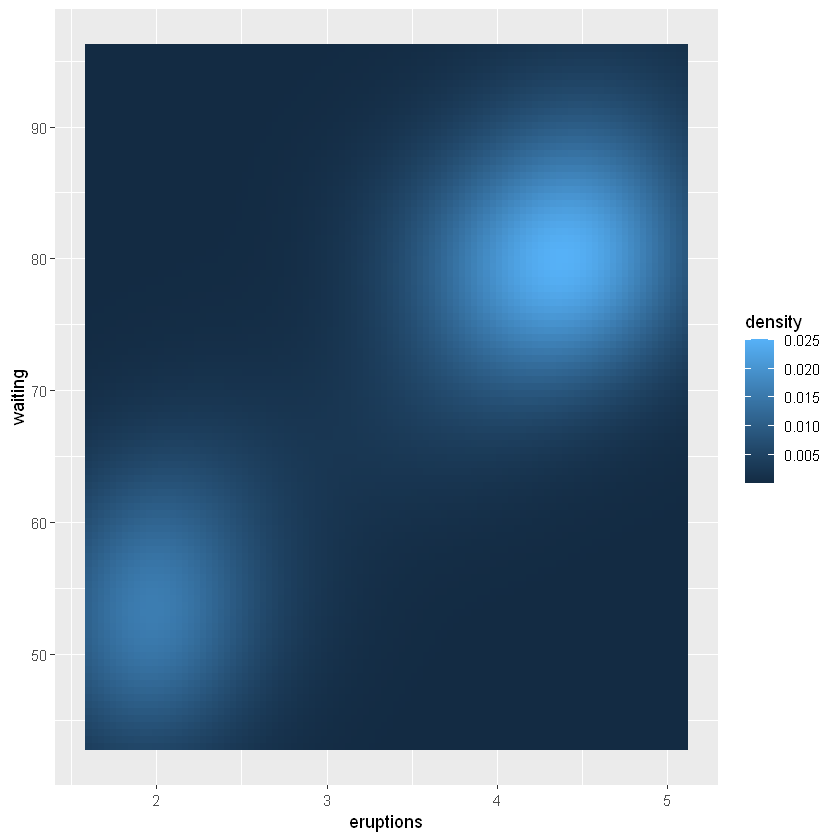

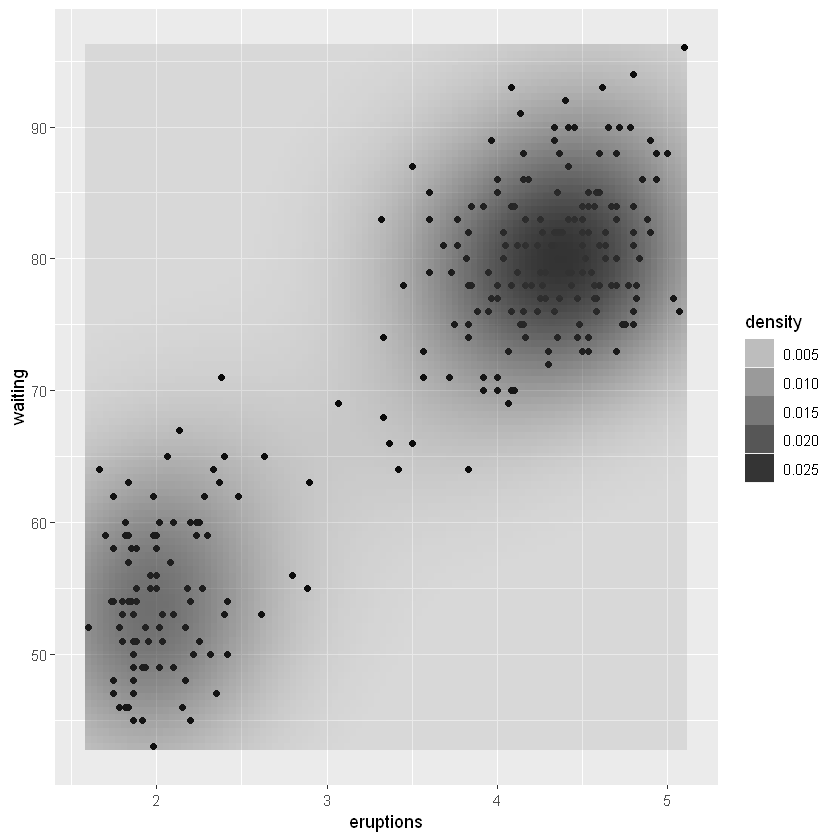

In [11]:
p + stat_density2d(aes(fill=..density..), geom='raster', contour=FALSE)

p + geom_point() + 
 stat_density2d(aes(alpha=..density..), geom='tile', contour=FALSE)

与一维密度估计一样，可以对估计的带宽进行控制。传递一个指定x和y带宽的向量到h，这个参数会被传递给直接生成密度估计的函数`kde2d()`。

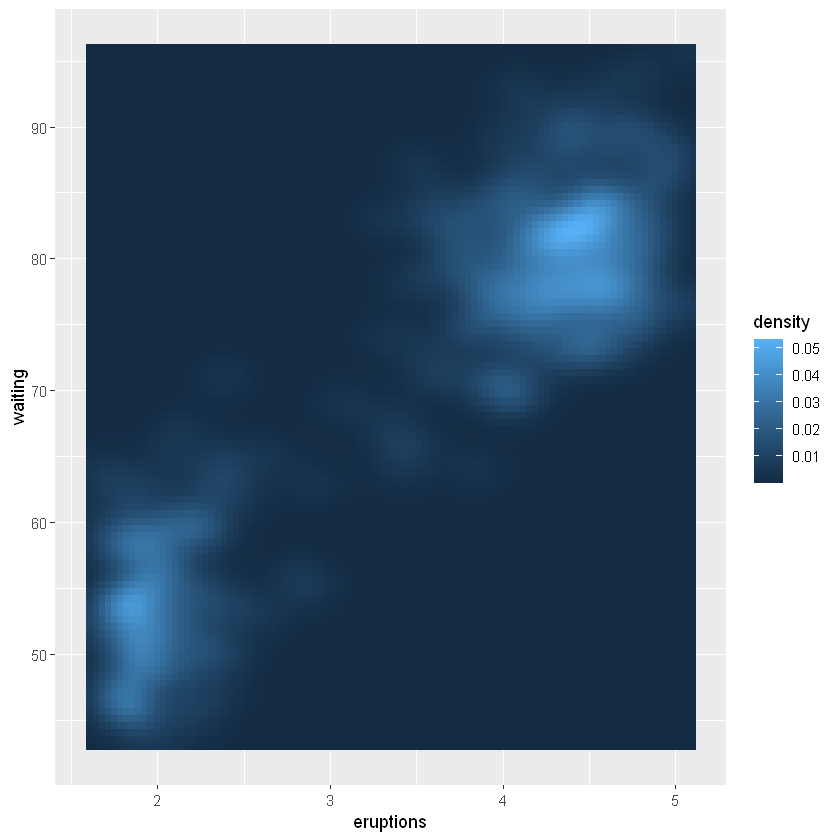

In [12]:
p + stat_density2d(aes(fill=..density..), geom = 'raster',
                  contour=FALSE, h=c(.5,5))

🔗**另见**  
`stat_density2d()`函数和stat_bin2d()函数的关系与它们各自的一维情形，即密度曲线和直方图之间的关系类似。密度曲线是在特定假设下对分布的估计，而分组可视化是直接表示观测值。

如果想使用不同的调色板，参见[对连续型变量使用自定义调色板]()

`stat_density2d()`可将选项传递到`kde2d()`函数；输入?kde2d可以查看函数选项的信息。

# 画图实践经验谈

ggplot对于同一个dataframe，同一张图中，不同的数据展现形式可使用`aes()`函数指定不同的列，不过，分组应该是固定的，如上。

⚠数据处理能力还需要加强